In [48]:
%pylab inline
import numpy as np
from conway99 import *

Populating the interactive namespace from numpy and matplotlib


# A representative seed graph
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [49]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


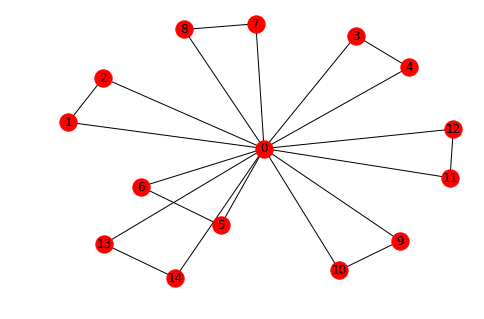

In [50]:
# review
print(seed15)
plot_given_edges(seed15)

In [51]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

# Adding vertex 15
(NB, as we started numbering at 0, this is our 16th vertex)

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]]


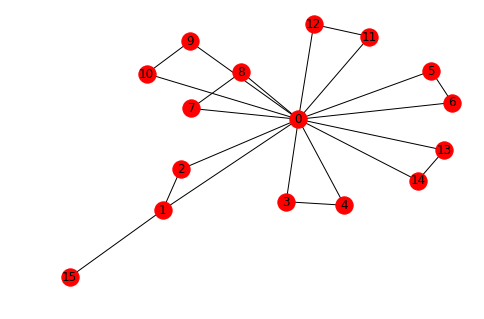

In [52]:
# Generate template with an additional vertex, and review
seed16 = get_supermatrix_template_first_unsat(seed15)
print(seed16)
plot_given_edges(seed16)

In [53]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Adding branch 1 candidate
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Branch 0 yielded compatible graph
Branch 1 inv

In [54]:
# Reduce to eliminate equivalent graphs
rep16 = reduce_mod_equivalence(super16, verbose=True)

	1 reps for 1 candidates


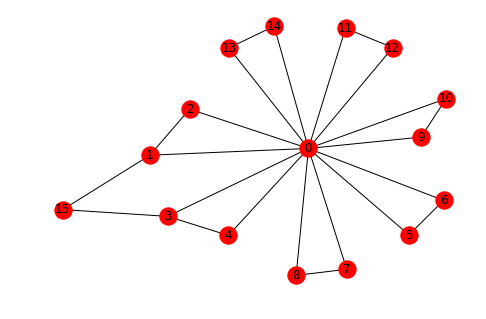

In [55]:
# Turns out, there's only really one way to extend this! Let's take a look
plot_given_edges(rep16[0])

This was expected:

By mu=2 condition, as 15 is not a nhbr of 0, they have 2 mutual nhbrs
 * As the nhbrs of 0 are 1-14, 15 nhbrs two of these.
 * We assumed 1-15 already; this prevents 2-15 (else 1,2 are nhbrs with two mutual nhbrs - 0, 15 - violating lambda=1) 
 * So 15 nhbrs precisely 1 of vertices 3-14, and these 12 choices are equivalent
 * So to fix notation we can force this nhbr to be vertex 14
 
Moreover, we could have applied this at the template stage to reduce the search space.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]]


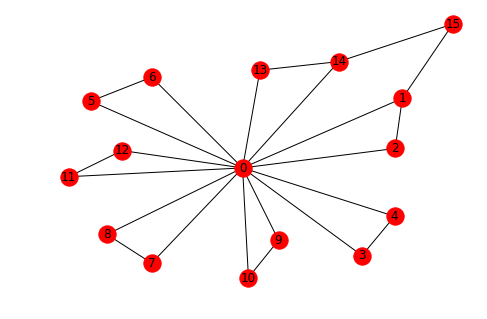

In [56]:
# alternative template 
seed16 = get_supermatrix_template_first_unsat(seed15, forced_edge=(15,14))
print(seed16)
plot_given_edges(seed16)

In [57]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Branch 0 yielded compatible graph
Branch 1 invalid
Reduces to 1 valid graphs
Wall time: 14 ms


In [58]:
# For convenience, can wrap up the templating, search, and reduction steps for a list of seed graphs
%time rep16 = find_valid_supergraphs_first_unsat([seed15], forced_edge=(15,14))

2020-04-29 15:23:19.396633: 1 seed templates generated
2020-04-29 15:23:19.408601: 1 valid graphs from templates
	1 reps for 1 candidates
2020-04-29 15:23:19.408601: Reduced to 1 representatives
Wall time: 12 ms


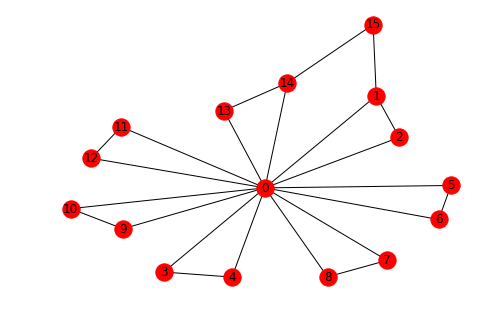

In [59]:
# confirm this is what we expected from the individual steps:
plot_given_edges(rep16[0])

# Saturating vertex 1

We know one of the blades centred at vertex 1; namely 1-0-2-1.

We also have part of another, containing vertex 15.

wlog, let vertex 16 be the other vertex of that blade (_we already force 1-16, so suffices to set 15-16_)

In [60]:
%time rep17 = find_valid_supergraphs_first_unsat(rep16, forced_edge=(15,16))

2020-04-29 15:23:19.498323: 1 seed templates generated
2020-04-29 15:23:19.610058: 11 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 11 candidates
2020-04-29 15:23:19.611021: Reduced to 2 representatives
Wall time: 114 ms


Vertex 17 necessarily starts a new blade, so no forcing

In [61]:
%time rep18 = find_valid_supergraphs_first_unsat(rep17)

2020-04-29 15:23:19.617042: 2 seed templates generated
2020-04-29 15:23:19.885288: 20 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 11 candidates
	3 reps for 12 candidates
2020-04-29 15:23:19.887282: Reduced to 3 representatives
Wall time: 270 ms


However, we can then force vertex 18 to be the other vertex of that blade

In [62]:
%time rep19 = find_valid_supergraphs_first_unsat(rep18, forced_edge=(17,18))

2020-04-29 15:23:19.894263: 3 seed templates generated
2020-04-29 15:23:20.292231: 27 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 18 candidates
	5 reps for 19 candidates
2020-04-29 15:23:20.294194: Reduced to 5 representatives
Wall time: 402 ms


Continue in this fashion until we have all nhbrs of vertex 1, with forced fan pattern 0-2, 15-16, 17-18, 19-20, 21-22, 23-24, 25-26

In [63]:
%time rep20 = find_valid_supergraphs_first_unsat(rep19)

2020-04-29 15:23:20.301175: 5 seed templates generated
2020-04-29 15:23:21.095083: 40 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 9 candidates
	3 reps for 17 candidates
	4 reps for 20 candidates
	5 reps for 25 candidates
	6 reps for 26 candidates
	7 reps for 33 candidates
	8 reps for 34 candidates
2020-04-29 15:23:21.100039: Reduced to 8 representatives
Wall time: 801 ms


In [64]:
%time rep21 = find_valid_supergraphs_first_unsat(rep20, forced_edge=(19,20))

2020-04-29 15:23:21.107055: 8 seed templates generated
2020-04-29 15:23:22.314206: 56 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 14 candidates
	5 reps for 16 candidates
	6 reps for 17 candidates
	7 reps for 28 candidates
	8 reps for 33 candidates
	9 reps for 42 candidates
	10 reps for 50 candidates
2020-04-29 15:23:22.320149: Reduced to 10 representatives
Wall time: 1.21 s


In [65]:
%time rep22 = find_valid_supergraphs_first_unsat(rep21)

2020-04-29 15:23:22.327166: 10 seed templates generated
2020-04-29 15:23:24.034595: 60 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 7 candidates
	3 reps for 9 candidates
	4 reps for 13 candidates
	5 reps for 19 candidates
	6 reps for 25 candidates
	7 reps for 28 candidates
	8 reps for 31 candidates
	9 reps for 32 candidates
	10 reps for 37 candidates
	11 reps for 43 candidates
	12 reps for 44 candidates
	13 reps for 46 candidates
	14 reps for 49 candidates
	15 reps for 50 candidates
	16 reps for 55 candidates
	17 reps for 56 candidates
2020-04-29 15:23:24.044569: Reduced to 17 representatives
Wall time: 1.72 s


In [66]:
%time rep23 = find_valid_supergraphs_first_unsat(rep22, forced_edge=(21,22))

2020-04-29 15:23:24.051581: 17 seed templates generated
2020-04-29 15:23:26.773858: 85 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 10 candidates
	5 reps for 12 candidates
	6 reps for 13 candidates
	7 reps for 20 candidates
	8 reps for 22 candidates
	9 reps for 27 candidates
	10 reps for 35 candidates
	11 reps for 42 candidates
	12 reps for 43 candidates
	13 reps for 50 candidates
	14 reps for 60 candidates
	15 reps for 70 candidates
	16 reps for 76 candidates
	17 reps for 81 candidates
2020-04-29 15:23:26.786828: Reduced to 17 representatives
Wall time: 2.74 s


In [67]:
%time rep24 = find_valid_supergraphs_first_unsat(rep23)

2020-04-29 15:23:26.793806: 17 seed templates generated
2020-04-29 15:23:29.752891: 68 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 5 candidates
	3 reps for 9 candidates
	4 reps for 13 candidates
	5 reps for 15 candidates
	6 reps for 17 candidates
	7 reps for 21 candidates
	8 reps for 25 candidates
	9 reps for 26 candidates
	10 reps for 29 candidates
	11 reps for 31 candidates
	12 reps for 33 candidates
	13 reps for 34 candidates
	14 reps for 37 candidates
	15 reps for 41 candidates
	16 reps for 45 candidates
	17 reps for 46 candidates
	18 reps for 49 candidates
	19 reps for 50 candidates
	20 reps for 53 candidates
	21 reps for 57 candidates
	22 reps for 58 candidates
	23 reps for 61 candidates
	24 reps for 62 candidates
	25 reps for 65 candidates
	26 reps for 66 candidates
2020-04-29 15:23:29.767866: Reduced to 26 representatives
Wall time: 2.98 s


In [68]:
%time rep25 = find_valid_supergraphs_first_unsat(rep24, forced_edge=(23,24))

2020-04-29 15:23:29.775797: 26 seed templates generated
2020-04-29 15:23:33.773138: 78 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 6 candidates
	4 reps for 8 candidates
	5 reps for 12 candidates
	6 reps for 14 candidates
	7 reps for 18 candidates
	8 reps for 23 candidates
	9 reps for 27 candidates
	10 reps for 29 candidates
	11 reps for 33 candidates
	12 reps for 39 candidates
	13 reps for 45 candidates
	14 reps for 53 candidates
	15 reps for 57 candidates
	16 reps for 60 candidates
	17 reps for 67 candidates
	18 reps for 70 candidates
	19 reps for 76 candidates
2020-04-29 15:23:33.787099: Reduced to 19 representatives
Wall time: 4.01 s


In [69]:
%time rep26 = find_valid_supergraphs_first_unsat(rep25)

2020-04-29 15:23:33.795085: 19 seed templates generated
2020-04-29 15:23:36.668401: 38 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 3 candidates
	3 reps for 5 candidates
	4 reps for 7 candidates
	5 reps for 9 candidates
	6 reps for 11 candidates
	7 reps for 13 candidates
	8 reps for 15 candidates
	9 reps for 17 candidates
	10 reps for 19 candidates
	11 reps for 21 candidates
	12 reps for 23 candidates
	13 reps for 25 candidates
	14 reps for 27 candidates
	15 reps for 29 candidates
	16 reps for 31 candidates
	17 reps for 33 candidates
	18 reps for 35 candidates
	19 reps for 37 candidates
2020-04-29 15:23:36.678373: Reduced to 19 representatives
Wall time: 2.89 s


In [70]:
%time rep27 = find_valid_supergraphs_first_unsat(rep26, forced_edge=(25,26))

2020-04-29 15:23:36.687311: 19 seed templates generated
2020-04-29 15:23:38.904415: 19 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 4 candidates
	4 reps for 6 candidates
	5 reps for 8 candidates
	6 reps for 10 candidates
	7 reps for 12 candidates
	8 reps for 14 candidates
	9 reps for 16 candidates
	10 reps for 18 candidates
	11 reps for 19 candidates
2020-04-29 15:23:38.909406: Reduced to 11 representatives
Wall time: 2.23 s


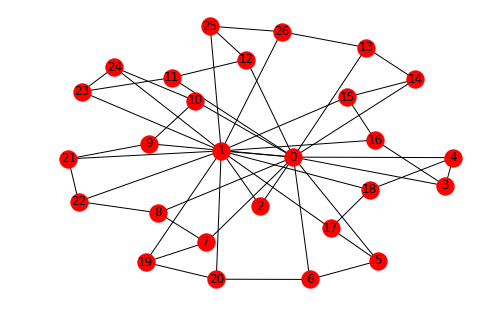

In [71]:
# Review an example

plot_given_edges(rep27[0])

# Saturating vertex 2

Although we have multiple possible 27-vertex graphs, for each of them we know that vertex 2 has degree 2: 
 * As a neighbour of vertex 0, it can only have one mutual neighbour amongst vertices 1,3-14, which is vertex 1
 * As a neighbour of vertex 1, it can only have one mutual neighbour amongst vertices 0,15-26, which is vertex 0
    
Thus we have precisely one blade centered at vertex 2, 2-0-1-2. 

We require 6 more, and may arrange them to ensure blade edges 27-28, 29-30, 31-32, 33-34, 35-36, 37-38.

In [72]:
# Confirm our claim:
[vertex_degrees(a)[2] for a in rep27]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [74]:
# Begin to saturate
%time rep28 = find_valid_supergraphs_first_unsat(rep27)

2020-04-29 15:23:53.125054: 11 seed templates generated
2020-04-29 15:24:48.721349: 1546 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 3 candidates
	3 reps for 133 candidates
	4 reps for 134 candidates
	5 reps for 135 candidates
	6 reps for 140 candidates
	7 reps for 277 candidates
	8 reps for 278 candidates
	9 reps for 279 candidates
	10 reps for 283 candidates
	11 reps for 286 candidates
	12 reps for 303 candidates
	13 reps for 304 candidates
	14 reps for 417 candidates
	15 reps for 418 candidates
	16 reps for 419 candidates
	17 reps for 428 candidates
	18 reps for 443 candidates
	19 reps for 444 candidates
	20 reps for 553 candidates
	21 reps for 554 candidates
	22 reps for 555 candidates
	23 reps for 557 candidates
	24 reps for 561 candidates
	25 reps for 562 candidates
	26 reps for 697 candidates
	27 reps for 698 candidates
	28 reps for 699 candidates
	29 reps for 701 candidates
	30 reps for 703 candidates
	31 reps for 707 candidates
	32 reps for 708 candidates


In [76]:
vertex_degrees(rep28[0])

[14,
 14,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [39]:
%time rep29 = find_valid_supergraphs(rep28, forced_edge=(27,28))

2020-04-28 17:08:49.804767: 83 seed templates generated
2020-04-28 17:15:22.354170: 9627 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 4 candidates
	5 reps for 5 candidates
	6 reps for 6 candidates
	7 reps for 7 candidates
	8 reps for 8 candidates
	9 reps for 9 candidates
	10 reps for 10 candidates
	11 reps for 11 candidates
	12 reps for 12 candidates
	13 reps for 13 candidates
	14 reps for 14 candidates
	15 reps for 15 candidates
	16 reps for 16 candidates
	17 reps for 17 candidates
	18 reps for 18 candidates
	19 reps for 19 candidates
	20 reps for 20 candidates
	21 reps for 22 candidates
	22 reps for 23 candidates
	23 reps for 24 candidates
	24 reps for 25 candidates
	25 reps for 26 candidates
	26 reps for 27 candidates
	27 reps for 28 candidates
	28 reps for 29 candidates
	29 reps for 31 candidates
	30 reps for 33 candidates
	31 reps for 34 candidates
	32 reps for 35 candidates
	33 reps for 36 candidates
	34 reps f

	303 reps for 553 candidates
	304 reps for 558 candidates
	305 reps for 559 candidates
	306 reps for 560 candidates
	307 reps for 561 candidates
	308 reps for 562 candidates
	309 reps for 564 candidates
	310 reps for 568 candidates
	311 reps for 569 candidates
	312 reps for 570 candidates
	313 reps for 571 candidates
	314 reps for 572 candidates
	315 reps for 573 candidates
	316 reps for 574 candidates
	317 reps for 575 candidates
	318 reps for 576 candidates
	319 reps for 583 candidates
	320 reps for 584 candidates
	321 reps for 585 candidates
	322 reps for 586 candidates
	323 reps for 587 candidates
	324 reps for 592 candidates
	325 reps for 593 candidates
	326 reps for 594 candidates
	327 reps for 595 candidates
	328 reps for 596 candidates
	329 reps for 597 candidates
	330 reps for 598 candidates
	331 reps for 604 candidates
	332 reps for 608 candidates
	333 reps for 609 candidates
	334 reps for 611 candidates
	335 reps for 617 candidates
	336 reps for 620 candidates
	337 reps for 

	600 reps for 1467 candidates
	601 reps for 1468 candidates
	602 reps for 1469 candidates
	603 reps for 1470 candidates
	604 reps for 1477 candidates
	605 reps for 1480 candidates
	606 reps for 1488 candidates
	607 reps for 1490 candidates
	608 reps for 1491 candidates
	609 reps for 1521 candidates
	610 reps for 1532 candidates
	611 reps for 1539 candidates
	612 reps for 1540 candidates
	613 reps for 1541 candidates
	614 reps for 1542 candidates
	615 reps for 1544 candidates
	616 reps for 1547 candidates
	617 reps for 1548 candidates
	618 reps for 1549 candidates
	619 reps for 1551 candidates
	620 reps for 1552 candidates
	621 reps for 1553 candidates
	622 reps for 1554 candidates
	623 reps for 1559 candidates
	624 reps for 1560 candidates
	625 reps for 1561 candidates
	626 reps for 1562 candidates
	627 reps for 1563 candidates
	628 reps for 1565 candidates
	629 reps for 1569 candidates
	630 reps for 1572 candidates
	631 reps for 1574 candidates
	632 reps for 1580 candidates
	633 reps 

	887 reps for 2691 candidates
	888 reps for 2692 candidates
	889 reps for 2693 candidates
	890 reps for 2694 candidates
	891 reps for 2695 candidates
	892 reps for 2697 candidates
	893 reps for 2698 candidates
	894 reps for 2699 candidates
	895 reps for 2700 candidates
	896 reps for 2702 candidates
	897 reps for 2703 candidates
	898 reps for 2704 candidates
	899 reps for 2705 candidates
	900 reps for 2706 candidates
	901 reps for 2707 candidates
	902 reps for 2712 candidates
	903 reps for 2713 candidates
	904 reps for 2714 candidates
	905 reps for 2716 candidates
	906 reps for 2717 candidates
	907 reps for 2718 candidates
	908 reps for 2723 candidates
	909 reps for 2724 candidates
	910 reps for 2725 candidates
	911 reps for 2726 candidates
	912 reps for 2727 candidates
	913 reps for 2728 candidates
	914 reps for 2734 candidates
	915 reps for 2735 candidates
	916 reps for 2736 candidates
	917 reps for 2739 candidates
	918 reps for 2744 candidates
	919 reps for 2745 candidates
	920 reps 

	1176 reps for 3912 candidates
	1177 reps for 3957 candidates
	1178 reps for 3958 candidates
	1179 reps for 3959 candidates
	1180 reps for 3966 candidates
	1181 reps for 3967 candidates
	1182 reps for 3968 candidates
	1183 reps for 3969 candidates
	1184 reps for 3970 candidates
	1185 reps for 3972 candidates
	1186 reps for 3977 candidates
	1187 reps for 3978 candidates
	1188 reps for 3979 candidates
	1189 reps for 3980 candidates
	1190 reps for 3981 candidates
	1191 reps for 3987 candidates
	1192 reps for 3991 candidates
	1193 reps for 3992 candidates
	1194 reps for 3999 candidates
	1195 reps for 4000 candidates
	1196 reps for 4003 candidates
	1197 reps for 4012 candidates
	1198 reps for 4019 candidates
	1199 reps for 4020 candidates
	1200 reps for 4030 candidates
	1201 reps for 4031 candidates
	1202 reps for 4085 candidates
	1203 reps for 4086 candidates
	1204 reps for 4096 candidates
	1205 reps for 4098 candidates
	1206 reps for 4099 candidates
	1207 reps for 4110 candidates
	1208 re

	1443 reps for 5785 candidates
	1444 reps for 5789 candidates
	1445 reps for 5790 candidates
	1446 reps for 5818 candidates
	1447 reps for 5819 candidates
	1448 reps for 5820 candidates
	1449 reps for 5822 candidates
	1450 reps for 5823 candidates
	1451 reps for 5827 candidates
	1452 reps for 5828 candidates
	1453 reps for 5866 candidates
	1454 reps for 5939 candidates
	1455 reps for 5940 candidates
	1456 reps for 5941 candidates
	1457 reps for 5942 candidates
	1458 reps for 5944 candidates
	1459 reps for 5948 candidates
	1460 reps for 5949 candidates
	1461 reps for 5950 candidates
	1462 reps for 5951 candidates
	1463 reps for 5952 candidates
	1464 reps for 5953 candidates
	1465 reps for 5955 candidates
	1466 reps for 5960 candidates
	1467 reps for 5961 candidates
	1468 reps for 5963 candidates
	1469 reps for 5964 candidates
	1470 reps for 5966 candidates
	1471 reps for 5971 candidates
	1472 reps for 5972 candidates
	1473 reps for 5991 candidates
	1474 reps for 5992 candidates
	1475 re

	1711 reps for 7214 candidates
	1712 reps for 7215 candidates
	1713 reps for 7225 candidates
	1714 reps for 7230 candidates
	1715 reps for 7231 candidates
	1716 reps for 7241 candidates
	1717 reps for 7242 candidates
	1718 reps for 7247 candidates
	1719 reps for 7252 candidates
	1720 reps for 7258 candidates
	1721 reps for 7265 candidates
	1722 reps for 7266 candidates
	1723 reps for 7350 candidates
	1724 reps for 7361 candidates
	1725 reps for 7366 candidates
	1726 reps for 7370 candidates
	1727 reps for 7377 candidates
	1728 reps for 7383 candidates
	1729 reps for 7385 candidates
	1730 reps for 7457 candidates
	1731 reps for 7460 candidates
	1732 reps for 7461 candidates
	1733 reps for 7462 candidates
	1734 reps for 7463 candidates
	1735 reps for 7464 candidates
	1736 reps for 7465 candidates
	1737 reps for 7470 candidates
	1738 reps for 7484 candidates
	1739 reps for 7485 candidates
	1740 reps for 7486 candidates
	1741 reps for 7494 candidates
	1742 reps for 7495 candidates
	1743 re

In [43]:
%time rep30 = find_valid_supergraphs(rep29)

2020-04-28 17:20:47.337324: 1961 seed templates generated
2020-04-28 20:30:44.488288: 193030 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 13 candidates
	5 reps for 14 candidates
	6 reps for 93 candidates
	7 reps for 94 candidates
	8 reps for 104 candidates
	9 reps for 105 candidates
	10 reps for 183 candidates
	11 reps for 184 candidates
	12 reps for 185 candidates
	13 reps for 193 candidates
	14 reps for 195 candidates
	15 reps for 196 candidates
	16 reps for 274 candidates
	17 reps for 275 candidates
	18 reps for 276 candidates
	19 reps for 277 candidates
	20 reps for 278 candidates
	21 reps for 279 candidates
	22 reps for 293 candidates
	23 reps for 294 candidates
	24 reps for 295 candidates
	25 reps for 296 candidates
	26 reps for 297 candidates
	27 reps for 303 candidates
	28 reps for 305 candidates
	29 reps for 307 candidates
	30 reps for 317 candidates
	31 reps for 318 candidates
	32 reps for 366 candidates
	3

	292 reps for 2078 candidates
	293 reps for 2079 candidates
	294 reps for 2083 candidates
	295 reps for 2088 candidates
	296 reps for 2089 candidates
	297 reps for 2093 candidates
	298 reps for 2098 candidates
	299 reps for 2099 candidates
	300 reps for 2100 candidates
	301 reps for 2101 candidates
	302 reps for 2104 candidates
	303 reps for 2105 candidates
	304 reps for 2178 candidates
	305 reps for 2179 candidates
	306 reps for 2183 candidates
	307 reps for 2198 candidates
	308 reps for 2199 candidates
	309 reps for 2200 candidates
	310 reps for 2201 candidates
	311 reps for 2203 candidates
	312 reps for 2204 candidates
	313 reps for 2205 candidates
	314 reps for 2208 candidates
	315 reps for 2209 candidates
	316 reps for 2211 candidates
	317 reps for 2213 candidates
	318 reps for 2214 candidates
	319 reps for 2231 candidates
	320 reps for 2233 candidates
	321 reps for 2234 candidates
	322 reps for 2251 candidates
	323 reps for 2252 candidates
	324 reps for 2257 candidates
	325 reps 

	601 reps for 2834 candidates
	602 reps for 2835 candidates
	603 reps for 2836 candidates
	604 reps for 2837 candidates
	605 reps for 2841 candidates
	606 reps for 2843 candidates
	607 reps for 2844 candidates
	608 reps for 2845 candidates
	609 reps for 2846 candidates
	610 reps for 2847 candidates
	611 reps for 2851 candidates
	612 reps for 2854 candidates
	613 reps for 2855 candidates
	614 reps for 2856 candidates
	615 reps for 2857 candidates
	616 reps for 2864 candidates
	617 reps for 2865 candidates
	618 reps for 2866 candidates
	619 reps for 2867 candidates
	620 reps for 2874 candidates
	621 reps for 2875 candidates
	622 reps for 2877 candidates
	623 reps for 2884 candidates
	624 reps for 2885 candidates
	625 reps for 2894 candidates
	626 reps for 2898 candidates
	627 reps for 2899 candidates
	628 reps for 2900 candidates
	629 reps for 2901 candidates
	630 reps for 2903 candidates
	631 reps for 2904 candidates
	632 reps for 2905 candidates
	633 reps for 2908 candidates
	634 reps 

	888 reps for 3443 candidates
	889 reps for 3444 candidates
	890 reps for 3445 candidates
	891 reps for 3446 candidates
	892 reps for 3447 candidates
	893 reps for 3478 candidates
	894 reps for 3479 candidates
	895 reps for 3480 candidates
	896 reps for 3481 candidates
	897 reps for 3483 candidates
	898 reps for 3484 candidates
	899 reps for 3485 candidates
	900 reps for 3488 candidates
	901 reps for 3489 candidates
	902 reps for 3490 candidates
	903 reps for 3491 candidates
	904 reps for 3493 candidates
	905 reps for 3494 candidates
	906 reps for 3495 candidates
	907 reps for 3498 candidates
	908 reps for 3499 candidates
	909 reps for 3500 candidates
	910 reps for 3501 candidates
	911 reps for 3503 candidates
	912 reps for 3504 candidates
	913 reps for 3505 candidates
	914 reps for 3508 candidates
	915 reps for 3509 candidates
	916 reps for 3510 candidates
	917 reps for 3511 candidates
	918 reps for 3513 candidates
	919 reps for 3514 candidates
	920 reps for 3515 candidates
	921 reps 

	1160 reps for 3935 candidates
	1161 reps for 3940 candidates
	1162 reps for 3941 candidates
	1163 reps for 3944 candidates
	1164 reps for 3945 candidates
	1165 reps for 3947 candidates
	1166 reps for 3984 candidates
	1167 reps for 3985 candidates
	1168 reps for 3994 candidates
	1169 reps for 3998 candidates
	1170 reps for 3999 candidates
	1171 reps for 4000 candidates
	1172 reps for 4001 candidates
	1173 reps for 4003 candidates
	1174 reps for 4004 candidates
	1175 reps for 4005 candidates
	1176 reps for 4008 candidates
	1177 reps for 4009 candidates
	1178 reps for 4010 candidates
	1179 reps for 4011 candidates
	1180 reps for 4013 candidates
	1181 reps for 4014 candidates
	1182 reps for 4015 candidates
	1183 reps for 4018 candidates
	1184 reps for 4019 candidates
	1185 reps for 4020 candidates
	1186 reps for 4021 candidates
	1187 reps for 4023 candidates
	1188 reps for 4024 candidates
	1189 reps for 4025 candidates
	1190 reps for 4028 candidates
	1191 reps for 4029 candidates
	1192 re

	1425 reps for 4678 candidates
	1426 reps for 4679 candidates
	1427 reps for 4680 candidates
	1428 reps for 4681 candidates
	1429 reps for 4683 candidates
	1430 reps for 4684 candidates
	1431 reps for 4685 candidates
	1432 reps for 4698 candidates
	1433 reps for 4699 candidates
	1434 reps for 4700 candidates
	1435 reps for 4701 candidates
	1436 reps for 4703 candidates
	1437 reps for 4704 candidates
	1438 reps for 4705 candidates
	1439 reps for 4708 candidates
	1440 reps for 4709 candidates
	1441 reps for 4710 candidates
	1442 reps for 4711 candidates
	1443 reps for 4713 candidates
	1444 reps for 4714 candidates
	1445 reps for 4715 candidates
	1446 reps for 4718 candidates
	1447 reps for 4719 candidates
	1448 reps for 4720 candidates
	1449 reps for 4721 candidates
	1450 reps for 4723 candidates
	1451 reps for 4724 candidates
	1452 reps for 4725 candidates
	1453 reps for 4728 candidates
	1454 reps for 4729 candidates
	1455 reps for 4730 candidates
	1456 reps for 4731 candidates
	1457 re

	1693 reps for 5551 candidates
	1694 reps for 5554 candidates
	1695 reps for 5555 candidates
	1696 reps for 5558 candidates
	1697 reps for 5559 candidates
	1698 reps for 5564 candidates
	1699 reps for 5565 candidates
	1700 reps for 5568 candidates
	1701 reps for 5569 candidates
	1702 reps for 5575 candidates
	1703 reps for 5578 candidates
	1704 reps for 5579 candidates
	1705 reps for 5588 candidates
	1706 reps for 5598 candidates
	1707 reps for 5599 candidates
	1708 reps for 5600 candidates
	1709 reps for 5601 candidates
	1710 reps for 5603 candidates
	1711 reps for 5604 candidates
	1712 reps for 5605 candidates
	1713 reps for 5608 candidates
	1714 reps for 5609 candidates
	1715 reps for 5610 candidates
	1716 reps for 5611 candidates
	1717 reps for 5613 candidates
	1718 reps for 5614 candidates
	1719 reps for 5615 candidates
	1720 reps for 5618 candidates
	1721 reps for 5619 candidates
	1722 reps for 5620 candidates
	1723 reps for 5621 candidates
	1724 reps for 5623 candidates
	1725 re

	1958 reps for 6205 candidates
	1959 reps for 6278 candidates
	1960 reps for 6279 candidates
	1961 reps for 6283 candidates
	1962 reps for 6298 candidates
	1963 reps for 6299 candidates
	1964 reps for 6303 candidates
	1965 reps for 6305 candidates
	1966 reps for 6308 candidates
	1967 reps for 6309 candidates
	1968 reps for 6310 candidates
	1969 reps for 6312 candidates
	1970 reps for 6344 candidates
	1971 reps for 6349 candidates
	1972 reps for 6350 candidates
	1973 reps for 6353 candidates
	1974 reps for 6384 candidates
	1975 reps for 6394 candidates
	1976 reps for 6395 candidates
	1977 reps for 6399 candidates
	1978 reps for 6401 candidates
	1979 reps for 6404 candidates
	1980 reps for 6405 candidates
	1981 reps for 6406 candidates
	1982 reps for 6408 candidates
	1983 reps for 6440 candidates
	1984 reps for 6441 candidates
	1985 reps for 6445 candidates
	1986 reps for 6446 candidates
	1987 reps for 6448 candidates
	1988 reps for 6449 candidates
	1989 reps for 6490 candidates
	1990 re

	2237 reps for 7464 candidates
	2238 reps for 7466 candidates
	2239 reps for 7467 candidates
	2240 reps for 7470 candidates
	2241 reps for 7471 candidates
	2242 reps for 7472 candidates
	2243 reps for 7473 candidates
	2244 reps for 7474 candidates
	2245 reps for 7476 candidates
	2246 reps for 7477 candidates
	2247 reps for 7499 candidates
	2248 reps for 7501 candidates
	2249 reps for 7503 candidates
	2250 reps for 7504 candidates
	2251 reps for 7505 candidates
	2252 reps for 7507 candidates
	2253 reps for 7508 candidates
	2254 reps for 7549 candidates
	2255 reps for 7550 candidates
	2256 reps for 7551 candidates
	2257 reps for 7553 candidates
	2258 reps for 7555 candidates
	2259 reps for 7556 candidates
	2260 reps for 7559 candidates
	2261 reps for 7560 candidates
	2262 reps for 7561 candidates
	2263 reps for 7563 candidates
	2264 reps for 7565 candidates
	2265 reps for 7566 candidates
	2266 reps for 7579 candidates
	2267 reps for 7581 candidates
	2268 reps for 7582 candidates
	2269 re

	2502 reps for 8278 candidates
	2503 reps for 8279 candidates
	2504 reps for 8280 candidates
	2505 reps for 8282 candidates
	2506 reps for 8283 candidates
	2507 reps for 8284 candidates
	2508 reps for 8285 candidates
	2509 reps for 8286 candidates
	2510 reps for 8287 candidates
	2511 reps for 8318 candidates
	2512 reps for 8319 candidates
	2513 reps for 8320 candidates
	2514 reps for 8322 candidates
	2515 reps for 8324 candidates
	2516 reps for 8325 candidates
	2517 reps for 8328 candidates
	2518 reps for 8329 candidates
	2519 reps for 8330 candidates
	2520 reps for 8331 candidates
	2521 reps for 8333 candidates
	2522 reps for 8334 candidates
	2523 reps for 8335 candidates
	2524 reps for 8336 candidates
	2525 reps for 8337 candidates
	2526 reps for 8338 candidates
	2527 reps for 8339 candidates
	2528 reps for 8340 candidates
	2529 reps for 8342 candidates
	2530 reps for 8343 candidates
	2531 reps for 8344 candidates
	2532 reps for 8345 candidates
	2533 reps for 8346 candidates
	2534 re

	2767 reps for 8629 candidates
	2768 reps for 8630 candidates
	2769 reps for 8631 candidates
	2770 reps for 8632 candidates
	2771 reps for 8633 candidates
	2772 reps for 8634 candidates
	2773 reps for 8635 candidates
	2774 reps for 8636 candidates
	2775 reps for 8637 candidates
	2776 reps for 8638 candidates
	2777 reps for 8639 candidates
	2778 reps for 8640 candidates
	2779 reps for 8641 candidates
	2780 reps for 8642 candidates
	2781 reps for 8643 candidates
	2782 reps for 8644 candidates
	2783 reps for 8645 candidates
	2784 reps for 8646 candidates
	2785 reps for 8647 candidates
	2786 reps for 8677 candidates
	2787 reps for 8678 candidates
	2788 reps for 8679 candidates
	2789 reps for 8680 candidates
	2790 reps for 8681 candidates
	2791 reps for 8682 candidates
	2792 reps for 8683 candidates
	2793 reps for 8684 candidates
	2794 reps for 8685 candidates
	2795 reps for 8686 candidates
	2796 reps for 8687 candidates
	2797 reps for 8688 candidates
	2798 reps for 8689 candidates
	2799 re

	3046 reps for 9322 candidates
	3047 reps for 9323 candidates
	3048 reps for 9324 candidates
	3049 reps for 9326 candidates
	3050 reps for 9328 candidates
	3051 reps for 9329 candidates
	3052 reps for 9330 candidates
	3053 reps for 9331 candidates
	3054 reps for 9341 candidates
	3055 reps for 9342 candidates
	3056 reps for 9347 candidates
	3057 reps for 9348 candidates
	3058 reps for 9349 candidates
	3059 reps for 9350 candidates
	3060 reps for 9351 candidates
	3061 reps for 9357 candidates
	3062 reps for 9358 candidates
	3063 reps for 9359 candidates
	3064 reps for 9360 candidates
	3065 reps for 9367 candidates
	3066 reps for 9368 candidates
	3067 reps for 9369 candidates
	3068 reps for 9370 candidates
	3069 reps for 9378 candidates
	3070 reps for 9379 candidates
	3071 reps for 9380 candidates
	3072 reps for 9389 candidates
	3073 reps for 9390 candidates
	3074 reps for 9399 candidates
	3075 reps for 9401 candidates
	3076 reps for 9402 candidates
	3077 reps for 9403 candidates
	3078 re

	3314 reps for 10103 candidates
	3315 reps for 10104 candidates
	3316 reps for 10105 candidates
	3317 reps for 10106 candidates
	3318 reps for 10107 candidates
	3319 reps for 10109 candidates
	3320 reps for 10121 candidates
	3321 reps for 10122 candidates
	3322 reps for 10123 candidates
	3323 reps for 10124 candidates
	3324 reps for 10126 candidates
	3325 reps for 10127 candidates
	3326 reps for 10128 candidates
	3327 reps for 10129 candidates
	3328 reps for 10130 candidates
	3329 reps for 10161 candidates
	3330 reps for 10162 candidates
	3331 reps for 10163 candidates
	3332 reps for 10164 candidates
	3333 reps for 10166 candidates
	3334 reps for 10168 candidates
	3335 reps for 10171 candidates
	3336 reps for 10172 candidates
	3337 reps for 10173 candidates
	3338 reps for 10174 candidates
	3339 reps for 10176 candidates
	3340 reps for 10178 candidates
	3341 reps for 10181 candidates
	3342 reps for 10182 candidates
	3343 reps for 10183 candidates
	3344 reps for 10184 candidates
	3345 re

	3580 reps for 10969 candidates
	3581 reps for 10970 candidates
	3582 reps for 10971 candidates
	3583 reps for 10999 candidates
	3584 reps for 11000 candidates
	3585 reps for 11001 candidates
	3586 reps for 11005 candidates
	3587 reps for 11006 candidates
	3588 reps for 11007 candidates
	3589 reps for 11008 candidates
	3590 reps for 11009 candidates
	3591 reps for 11010 candidates
	3592 reps for 11011 candidates
	3593 reps for 11015 candidates
	3594 reps for 11016 candidates
	3595 reps for 11017 candidates
	3596 reps for 11018 candidates
	3597 reps for 11019 candidates
	3598 reps for 11020 candidates
	3599 reps for 11021 candidates
	3600 reps for 11025 candidates
	3601 reps for 11026 candidates
	3602 reps for 11027 candidates
	3603 reps for 11028 candidates
	3604 reps for 11029 candidates
	3605 reps for 11030 candidates
	3606 reps for 11031 candidates
	3607 reps for 11035 candidates
	3608 reps for 11036 candidates
	3609 reps for 11037 candidates
	3610 reps for 11038 candidates
	3611 re

	3838 reps for 11575 candidates
	3839 reps for 11576 candidates
	3840 reps for 11577 candidates
	3841 reps for 11581 candidates
	3842 reps for 11582 candidates
	3843 reps for 11583 candidates
	3844 reps for 11584 candidates
	3845 reps for 11585 candidates
	3846 reps for 11586 candidates
	3847 reps for 11587 candidates
	3848 reps for 11591 candidates
	3849 reps for 11592 candidates
	3850 reps for 11593 candidates
	3851 reps for 11594 candidates
	3852 reps for 11595 candidates
	3853 reps for 11596 candidates
	3854 reps for 11597 candidates
	3855 reps for 11601 candidates
	3856 reps for 11602 candidates
	3857 reps for 11603 candidates
	3858 reps for 11604 candidates
	3859 reps for 11605 candidates
	3860 reps for 11606 candidates
	3861 reps for 11607 candidates
	3862 reps for 11611 candidates
	3863 reps for 11612 candidates
	3864 reps for 11613 candidates
	3865 reps for 11614 candidates
	3866 reps for 11615 candidates
	3867 reps for 11616 candidates
	3868 reps for 11617 candidates
	3869 re

	4102 reps for 12077 candidates
	4103 reps for 12078 candidates
	4104 reps for 12079 candidates
	4105 reps for 12080 candidates
	4106 reps for 12081 candidates
	4107 reps for 12083 candidates
	4108 reps for 12084 candidates
	4109 reps for 12085 candidates
	4110 reps for 12086 candidates
	4111 reps for 12087 candidates
	4112 reps for 12088 candidates
	4113 reps for 12089 candidates
	4114 reps for 12090 candidates
	4115 reps for 12091 candidates
	4116 reps for 12093 candidates
	4117 reps for 12094 candidates
	4118 reps for 12095 candidates
	4119 reps for 12096 candidates
	4120 reps for 12097 candidates
	4121 reps for 12098 candidates
	4122 reps for 12099 candidates
	4123 reps for 12100 candidates
	4124 reps for 12101 candidates
	4125 reps for 12103 candidates
	4126 reps for 12104 candidates
	4127 reps for 12105 candidates
	4128 reps for 12106 candidates
	4129 reps for 12107 candidates
	4130 reps for 12108 candidates
	4131 reps for 12109 candidates
	4132 reps for 12110 candidates
	4133 re

	4363 reps for 12391 candidates
	4364 reps for 12393 candidates
	4365 reps for 12394 candidates
	4366 reps for 12395 candidates
	4367 reps for 12396 candidates
	4368 reps for 12397 candidates
	4369 reps for 12398 candidates
	4370 reps for 12399 candidates
	4371 reps for 12400 candidates
	4372 reps for 12401 candidates
	4373 reps for 12403 candidates
	4374 reps for 12404 candidates
	4375 reps for 12405 candidates
	4376 reps for 12406 candidates
	4377 reps for 12407 candidates
	4378 reps for 12408 candidates
	4379 reps for 12409 candidates
	4380 reps for 12410 candidates
	4381 reps for 12412 candidates
	4382 reps for 12413 candidates
	4383 reps for 12414 candidates
	4384 reps for 12415 candidates
	4385 reps for 12416 candidates
	4386 reps for 12417 candidates
	4387 reps for 12418 candidates
	4388 reps for 12419 candidates
	4389 reps for 12420 candidates
	4390 reps for 12421 candidates
	4391 reps for 12422 candidates
	4392 reps for 12423 candidates
	4393 reps for 12424 candidates
	4394 re

	4630 reps for 12989 candidates
	4631 reps for 12990 candidates
	4632 reps for 12991 candidates
	4633 reps for 12992 candidates
	4634 reps for 12993 candidates
	4635 reps for 12994 candidates
	4636 reps for 12995 candidates
	4637 reps for 12996 candidates
	4638 reps for 12997 candidates
	4639 reps for 12998 candidates
	4640 reps for 12999 candidates
	4641 reps for 13000 candidates
	4642 reps for 13001 candidates
	4643 reps for 13002 candidates
	4644 reps for 13012 candidates
	4645 reps for 13013 candidates
	4646 reps for 13014 candidates
	4647 reps for 13015 candidates
	4648 reps for 13017 candidates
	4649 reps for 13018 candidates
	4650 reps for 13019 candidates
	4651 reps for 13020 candidates
	4652 reps for 13021 candidates
	4653 reps for 13022 candidates
	4654 reps for 13023 candidates
	4655 reps for 13024 candidates
	4656 reps for 13025 candidates
	4657 reps for 13027 candidates
	4658 reps for 13028 candidates
	4659 reps for 13029 candidates
	4660 reps for 13030 candidates
	4661 re

	4895 reps for 13755 candidates
	4896 reps for 13756 candidates
	4897 reps for 13758 candidates
	4898 reps for 13759 candidates
	4899 reps for 13760 candidates
	4900 reps for 13761 candidates
	4901 reps for 13762 candidates
	4902 reps for 13790 candidates
	4903 reps for 13791 candidates
	4904 reps for 13795 candidates
	4905 reps for 13796 candidates
	4906 reps for 13797 candidates
	4907 reps for 13798 candidates
	4908 reps for 13799 candidates
	4909 reps for 13800 candidates
	4910 reps for 13801 candidates
	4911 reps for 13805 candidates
	4912 reps for 13806 candidates
	4913 reps for 13807 candidates
	4914 reps for 13808 candidates
	4915 reps for 13809 candidates
	4916 reps for 13810 candidates
	4917 reps for 13811 candidates
	4918 reps for 13815 candidates
	4919 reps for 13816 candidates
	4920 reps for 13817 candidates
	4921 reps for 13818 candidates
	4922 reps for 13819 candidates
	4923 reps for 13820 candidates
	4924 reps for 13821 candidates
	4925 reps for 13825 candidates
	4926 re

	5154 reps for 14321 candidates
	5155 reps for 14322 candidates
	5156 reps for 14323 candidates
	5157 reps for 14324 candidates
	5158 reps for 14325 candidates
	5159 reps for 14327 candidates
	5160 reps for 14329 candidates
	5161 reps for 14332 candidates
	5162 reps for 14333 candidates
	5163 reps for 14334 candidates
	5164 reps for 14335 candidates
	5165 reps for 14337 candidates
	5166 reps for 14339 candidates
	5167 reps for 14342 candidates
	5168 reps for 14343 candidates
	5169 reps for 14344 candidates
	5170 reps for 14345 candidates
	5171 reps for 14346 candidates
	5172 reps for 14348 candidates
	5173 reps for 14360 candidates
	5174 reps for 14361 candidates
	5175 reps for 14362 candidates
	5176 reps for 14363 candidates
	5177 reps for 14365 candidates
	5178 reps for 14366 candidates
	5179 reps for 14367 candidates
	5180 reps for 14368 candidates
	5181 reps for 14369 candidates
	5182 reps for 14400 candidates
	5183 reps for 14401 candidates
	5184 reps for 14402 candidates
	5185 re

	5416 reps for 15227 candidates
	5417 reps for 15228 candidates
	5418 reps for 15230 candidates
	5419 reps for 15231 candidates
	5420 reps for 15243 candidates
	5421 reps for 15244 candidates
	5422 reps for 15245 candidates
	5423 reps for 15247 candidates
	5424 reps for 15248 candidates
	5425 reps for 15249 candidates
	5426 reps for 15250 candidates
	5427 reps for 15251 candidates
	5428 reps for 15252 candidates
	5429 reps for 15283 candidates
	5430 reps for 15284 candidates
	5431 reps for 15285 candidates
	5432 reps for 15287 candidates
	5433 reps for 15289 candidates
	5434 reps for 15290 candidates
	5435 reps for 15293 candidates
	5436 reps for 15294 candidates
	5437 reps for 15295 candidates
	5438 reps for 15297 candidates
	5439 reps for 15299 candidates
	5440 reps for 15300 candidates
	5441 reps for 15303 candidates
	5442 reps for 15304 candidates
	5443 reps for 15305 candidates
	5444 reps for 15307 candidates
	5445 reps for 15310 candidates
	5446 reps for 15325 candidates
	5447 re

	5673 reps for 16203 candidates
	5674 reps for 16204 candidates
	5675 reps for 16205 candidates
	5676 reps for 16206 candidates
	5677 reps for 16208 candidates
	5678 reps for 16209 candidates
	5679 reps for 16212 candidates
	5680 reps for 16213 candidates
	5681 reps for 16214 candidates
	5682 reps for 16215 candidates
	5683 reps for 16217 candidates
	5684 reps for 16218 candidates
	5685 reps for 16221 candidates
	5686 reps for 16222 candidates
	5687 reps for 16223 candidates
	5688 reps for 16224 candidates
	5689 reps for 16225 candidates
	5690 reps for 16227 candidates
	5691 reps for 16228 candidates
	5692 reps for 16231 candidates
	5693 reps for 16232 candidates
	5694 reps for 16233 candidates
	5695 reps for 16234 candidates
	5696 reps for 16235 candidates
	5697 reps for 16236 candidates
	5698 reps for 16237 candidates
	5699 reps for 16238 candidates
	5700 reps for 16239 candidates
	5701 reps for 16240 candidates
	5702 reps for 16271 candidates
	5703 reps for 16272 candidates
	5704 re

	5934 reps for 17505 candidates
	5935 reps for 17506 candidates
	5936 reps for 17507 candidates
	5937 reps for 17513 candidates
	5938 reps for 17514 candidates
	5939 reps for 17515 candidates
	5940 reps for 17516 candidates
	5941 reps for 17522 candidates
	5942 reps for 17523 candidates
	5943 reps for 17524 candidates
	5944 reps for 17525 candidates
	5945 reps for 17526 candidates
	5946 reps for 17532 candidates
	5947 reps for 17533 candidates
	5948 reps for 17534 candidates
	5949 reps for 17535 candidates
	5950 reps for 17536 candidates
	5951 reps for 17537 candidates
	5952 reps for 17541 candidates
	5953 reps for 17542 candidates
	5954 reps for 17588 candidates
	5955 reps for 17589 candidates
	5956 reps for 17590 candidates
	5957 reps for 17596 candidates
	5958 reps for 17597 candidates
	5959 reps for 17598 candidates
	5960 reps for 17599 candidates
	5961 reps for 17600 candidates
	5962 reps for 17601 candidates
	5963 reps for 17607 candidates
	5964 reps for 17608 candidates
	5965 re

	6191 reps for 18430 candidates
	6192 reps for 18440 candidates
	6193 reps for 18441 candidates
	6194 reps for 18442 candidates
	6195 reps for 18448 candidates
	6196 reps for 18449 candidates
	6197 reps for 18451 candidates
	6198 reps for 18457 candidates
	6199 reps for 18458 candidates
	6200 reps for 18461 candidates
	6201 reps for 18462 candidates
	6202 reps for 18466 candidates
	6203 reps for 18467 candidates
	6204 reps for 18521 candidates
	6205 reps for 18522 candidates
	6206 reps for 18531 candidates
	6207 reps for 18533 candidates
	6208 reps for 18534 candidates
	6209 reps for 18535 candidates
	6210 reps for 18541 candidates
	6211 reps for 18542 candidates
	6212 reps for 18543 candidates
	6213 reps for 18544 candidates
	6214 reps for 18550 candidates
	6215 reps for 18551 candidates
	6216 reps for 18552 candidates
	6217 reps for 18553 candidates
	6218 reps for 18554 candidates
	6219 reps for 18555 candidates
	6220 reps for 18559 candidates
	6221 reps for 18560 candidates
	6222 re

	6450 reps for 19743 candidates
	6451 reps for 19744 candidates
	6452 reps for 19745 candidates
	6453 reps for 19746 candidates
	6454 reps for 19747 candidates
	6455 reps for 19816 candidates
	6456 reps for 19817 candidates
	6457 reps for 19826 candidates
	6458 reps for 19836 candidates
	6459 reps for 19837 candidates
	6460 reps for 19838 candidates
	6461 reps for 19844 candidates
	6462 reps for 19845 candidates
	6463 reps for 19846 candidates
	6464 reps for 19847 candidates
	6465 reps for 19848 candidates
	6466 reps for 19854 candidates
	6467 reps for 19855 candidates
	6468 reps for 19856 candidates
	6469 reps for 19857 candidates
	6470 reps for 19858 candidates
	6471 reps for 19859 candidates
	6472 reps for 19863 candidates
	6473 reps for 19909 candidates
	6474 reps for 19910 candidates
	6475 reps for 19911 candidates
	6476 reps for 19912 candidates
	6477 reps for 19918 candidates
	6478 reps for 19919 candidates
	6479 reps for 19920 candidates
	6480 reps for 19921 candidates
	6481 re

	6707 reps for 21063 candidates
	6708 reps for 21064 candidates
	6709 reps for 21065 candidates
	6710 reps for 21066 candidates
	6711 reps for 21067 candidates
	6712 reps for 21068 candidates
	6713 reps for 21069 candidates
	6714 reps for 21072 candidates
	6715 reps for 21085 candidates
	6716 reps for 21086 candidates
	6717 reps for 21087 candidates
	6718 reps for 21088 candidates
	6719 reps for 21094 candidates
	6720 reps for 21095 candidates
	6721 reps for 21096 candidates
	6722 reps for 21098 candidates
	6723 reps for 21104 candidates
	6724 reps for 21105 candidates
	6725 reps for 21107 candidates
	6726 reps for 21114 candidates
	6727 reps for 21117 candidates
	6728 reps for 21127 candidates
	6729 reps for 21159 candidates
	6730 reps for 21160 candidates
	6731 reps for 21161 candidates
	6732 reps for 21162 candidates
	6733 reps for 21163 candidates
	6734 reps for 21168 candidates
	6735 reps for 21181 candidates
	6736 reps for 21182 candidates
	6737 reps for 21191 candidates
	6738 re

	6968 reps for 21938 candidates
	6969 reps for 21939 candidates
	6970 reps for 21940 candidates
	6971 reps for 21941 candidates
	6972 reps for 21942 candidates
	6973 reps for 21943 candidates
	6974 reps for 21947 candidates
	6975 reps for 21948 candidates
	6976 reps for 21949 candidates
	6977 reps for 21950 candidates
	6978 reps for 21951 candidates
	6979 reps for 21952 candidates
	6980 reps for 21953 candidates
	6981 reps for 21957 candidates
	6982 reps for 21958 candidates
	6983 reps for 21959 candidates
	6984 reps for 21960 candidates
	6985 reps for 21961 candidates
	6986 reps for 21962 candidates
	6987 reps for 21963 candidates
	6988 reps for 21964 candidates
	6989 reps for 21966 candidates
	6990 reps for 21967 candidates
	6991 reps for 21995 candidates
	6992 reps for 21996 candidates
	6993 reps for 21997 candidates
	6994 reps for 21998 candidates
	6995 reps for 21999 candidates
	6996 reps for 22003 candidates
	6997 reps for 22004 candidates
	6998 reps for 22005 candidates
	6999 re

	7233 reps for 22527 candidates
	7234 reps for 22538 candidates
	7235 reps for 22539 candidates
	7236 reps for 22540 candidates
	7237 reps for 22541 candidates
	7238 reps for 22542 candidates
	7239 reps for 22543 candidates
	7240 reps for 22544 candidates
	7241 reps for 22545 candidates
	7242 reps for 22546 candidates
	7243 reps for 22547 candidates
	7244 reps for 22548 candidates
	7245 reps for 22549 candidates
	7246 reps for 22550 candidates
	7247 reps for 22551 candidates
	7248 reps for 22552 candidates
	7249 reps for 22553 candidates
	7250 reps for 22554 candidates
	7251 reps for 22555 candidates
	7252 reps for 22556 candidates
	7253 reps for 22557 candidates
	7254 reps for 22598 candidates
	7255 reps for 22599 candidates
	7256 reps for 22600 candidates
	7257 reps for 22601 candidates
	7258 reps for 22605 candidates
	7259 reps for 22618 candidates
	7260 reps for 22619 candidates
	7261 reps for 22621 candidates
	7262 reps for 22622 candidates
	7263 reps for 22623 candidates
	7264 re

	7493 reps for 23319 candidates
	7494 reps for 23321 candidates
	7495 reps for 23322 candidates
	7496 reps for 23323 candidates
	7497 reps for 23326 candidates
	7498 reps for 23327 candidates
	7499 reps for 23379 candidates
	7500 reps for 23380 candidates
	7501 reps for 23398 candidates
	7502 reps for 23399 candidates
	7503 reps for 23400 candidates
	7504 reps for 23404 candidates
	7505 reps for 23405 candidates
	7506 reps for 23408 candidates
	7507 reps for 23409 candidates
	7508 reps for 23410 candidates
	7509 reps for 23414 candidates
	7510 reps for 23415 candidates
	7511 reps for 23418 candidates
	7512 reps for 23419 candidates
	7513 reps for 23420 candidates
	7514 reps for 23421 candidates
	7515 reps for 23422 candidates
	7516 reps for 23423 candidates
	7517 reps for 23424 candidates
	7518 reps for 23425 candidates
	7519 reps for 23426 candidates
	7520 reps for 23427 candidates
	7521 reps for 23478 candidates
	7522 reps for 23479 candidates
	7523 reps for 23480 candidates
	7524 re

	7750 reps for 24398 candidates
	7751 reps for 24399 candidates
	7752 reps for 24400 candidates
	7753 reps for 24401 candidates
	7754 reps for 24402 candidates
	7755 reps for 24403 candidates
	7756 reps for 24404 candidates
	7757 reps for 24405 candidates
	7758 reps for 24406 candidates
	7759 reps for 24407 candidates
	7760 reps for 24408 candidates
	7761 reps for 24409 candidates
	7762 reps for 24410 candidates
	7763 reps for 24411 candidates
	7764 reps for 24412 candidates
	7765 reps for 24413 candidates
	7766 reps for 24414 candidates
	7767 reps for 24415 candidates
	7768 reps for 24416 candidates
	7769 reps for 24417 candidates
	7770 reps for 24418 candidates
	7771 reps for 24419 candidates
	7772 reps for 24420 candidates
	7773 reps for 24421 candidates
	7774 reps for 24422 candidates
	7775 reps for 24423 candidates
	7776 reps for 24424 candidates
	7777 reps for 24425 candidates
	7778 reps for 24426 candidates
	7779 reps for 24427 candidates
	7780 reps for 24428 candidates
	7781 re

	8008 reps for 24985 candidates
	8009 reps for 24988 candidates
	8010 reps for 24989 candidates
	8011 reps for 24990 candidates
	8012 reps for 24991 candidates
	8013 reps for 24995 candidates
	8014 reps for 24998 candidates
	8015 reps for 24999 candidates
	8016 reps for 25000 candidates
	8017 reps for 25004 candidates
	8018 reps for 25005 candidates
	8019 reps for 25008 candidates
	8020 reps for 25010 candidates
	8021 reps for 25014 candidates
	8022 reps for 25015 candidates
	8023 reps for 25020 candidates
	8024 reps for 25021 candidates
	8025 reps for 25022 candidates
	8026 reps for 25024 candidates
	8027 reps for 25025 candidates
	8028 reps for 25026 candidates
	8029 reps for 25027 candidates
	8030 reps for 25084 candidates
	8031 reps for 25085 candidates
	8032 reps for 25094 candidates
	8033 reps for 25098 candidates
	8034 reps for 25099 candidates
	8035 reps for 25100 candidates
	8036 reps for 25104 candidates
	8037 reps for 25105 candidates
	8038 reps for 25108 candidates
	8039 re

	8268 reps for 25555 candidates
	8269 reps for 25556 candidates
	8270 reps for 25557 candidates
	8271 reps for 25558 candidates
	8272 reps for 25559 candidates
	8273 reps for 25560 candidates
	8274 reps for 25561 candidates
	8275 reps for 25562 candidates
	8276 reps for 25563 candidates
	8277 reps for 25564 candidates
	8278 reps for 25565 candidates
	8279 reps for 25566 candidates
	8280 reps for 25567 candidates
	8281 reps for 25568 candidates
	8282 reps for 25569 candidates
	8283 reps for 25570 candidates
	8284 reps for 25571 candidates
	8285 reps for 25572 candidates
	8286 reps for 25573 candidates
	8287 reps for 25574 candidates
	8288 reps for 25575 candidates
	8289 reps for 25576 candidates
	8290 reps for 25577 candidates
	8291 reps for 25578 candidates
	8292 reps for 25579 candidates
	8293 reps for 25580 candidates
	8294 reps for 25581 candidates
	8295 reps for 25582 candidates
	8296 reps for 25583 candidates
	8297 reps for 25584 candidates
	8298 reps for 25585 candidates
	8299 re

	8528 reps for 25930 candidates
	8529 reps for 25931 candidates
	8530 reps for 25932 candidates
	8531 reps for 25933 candidates
	8532 reps for 25934 candidates
	8533 reps for 25935 candidates
	8534 reps for 25936 candidates
	8535 reps for 25937 candidates
	8536 reps for 25938 candidates
	8537 reps for 25939 candidates
	8538 reps for 25940 candidates
	8539 reps for 25941 candidates
	8540 reps for 25942 candidates
	8541 reps for 25943 candidates
	8542 reps for 25944 candidates
	8543 reps for 25945 candidates
	8544 reps for 25946 candidates
	8545 reps for 25947 candidates
	8546 reps for 25948 candidates
	8547 reps for 25949 candidates
	8548 reps for 25950 candidates
	8549 reps for 25951 candidates
	8550 reps for 25952 candidates
	8551 reps for 25953 candidates
	8552 reps for 25954 candidates
	8553 reps for 25955 candidates
	8554 reps for 25956 candidates
	8555 reps for 25957 candidates
	8556 reps for 25958 candidates
	8557 reps for 25959 candidates
	8558 reps for 25960 candidates
	8559 re

	8785 reps for 26347 candidates
	8786 reps for 26348 candidates
	8787 reps for 26349 candidates
	8788 reps for 26350 candidates
	8789 reps for 26351 candidates
	8790 reps for 26352 candidates
	8791 reps for 26353 candidates
	8792 reps for 26354 candidates
	8793 reps for 26355 candidates
	8794 reps for 26356 candidates
	8795 reps for 26357 candidates
	8796 reps for 26358 candidates
	8797 reps for 26359 candidates
	8798 reps for 26360 candidates
	8799 reps for 26361 candidates
	8800 reps for 26362 candidates
	8801 reps for 26363 candidates
	8802 reps for 26364 candidates
	8803 reps for 26365 candidates
	8804 reps for 26366 candidates
	8805 reps for 26367 candidates
	8806 reps for 26368 candidates
	8807 reps for 26369 candidates
	8808 reps for 26370 candidates
	8809 reps for 26371 candidates
	8810 reps for 26372 candidates
	8811 reps for 26373 candidates
	8812 reps for 26374 candidates
	8813 reps for 26375 candidates
	8814 reps for 26376 candidates
	8815 reps for 26377 candidates
	8816 re

	9046 reps for 26608 candidates
	9047 reps for 26609 candidates
	9048 reps for 26610 candidates
	9049 reps for 26611 candidates
	9050 reps for 26612 candidates
	9051 reps for 26613 candidates
	9052 reps for 26614 candidates
	9053 reps for 26615 candidates
	9054 reps for 26616 candidates
	9055 reps for 26617 candidates
	9056 reps for 26618 candidates
	9057 reps for 26619 candidates
	9058 reps for 26620 candidates
	9059 reps for 26621 candidates
	9060 reps for 26622 candidates
	9061 reps for 26623 candidates
	9062 reps for 26624 candidates
	9063 reps for 26625 candidates
	9064 reps for 26626 candidates
	9065 reps for 26627 candidates
	9066 reps for 26628 candidates
	9067 reps for 26629 candidates
	9068 reps for 26630 candidates
	9069 reps for 26631 candidates
	9070 reps for 26632 candidates
	9071 reps for 26633 candidates
	9072 reps for 26634 candidates
	9073 reps for 26635 candidates
	9074 reps for 26636 candidates
	9075 reps for 26637 candidates
	9076 reps for 26638 candidates
	9077 re

	9303 reps for 26916 candidates
	9304 reps for 26917 candidates
	9305 reps for 26918 candidates
	9306 reps for 26919 candidates
	9307 reps for 26920 candidates
	9308 reps for 26922 candidates
	9309 reps for 26923 candidates
	9310 reps for 26924 candidates
	9311 reps for 26925 candidates
	9312 reps for 26927 candidates
	9313 reps for 26928 candidates
	9314 reps for 26929 candidates
	9315 reps for 26930 candidates
	9316 reps for 26932 candidates
	9317 reps for 26933 candidates
	9318 reps for 26934 candidates
	9319 reps for 26935 candidates
	9320 reps for 26939 candidates
	9321 reps for 26940 candidates
	9322 reps for 26942 candidates
	9323 reps for 26943 candidates
	9324 reps for 26944 candidates
	9325 reps for 26945 candidates
	9326 reps for 26949 candidates
	9327 reps for 26952 candidates
	9328 reps for 26953 candidates
	9329 reps for 26954 candidates
	9330 reps for 26955 candidates
	9331 reps for 26962 candidates
	9332 reps for 26963 candidates
	9333 reps for 26964 candidates
	9334 re

	9565 reps for 27312 candidates
	9566 reps for 27313 candidates
	9567 reps for 27314 candidates
	9568 reps for 27315 candidates
	9569 reps for 27316 candidates
	9570 reps for 27317 candidates
	9571 reps for 27318 candidates
	9572 reps for 27319 candidates
	9573 reps for 27320 candidates
	9574 reps for 27321 candidates
	9575 reps for 27322 candidates
	9576 reps for 27323 candidates
	9577 reps for 27324 candidates
	9578 reps for 27325 candidates
	9579 reps for 27326 candidates
	9580 reps for 27327 candidates
	9581 reps for 27328 candidates
	9582 reps for 27329 candidates
	9583 reps for 27330 candidates
	9584 reps for 27331 candidates
	9585 reps for 27332 candidates
	9586 reps for 27333 candidates
	9587 reps for 27334 candidates
	9588 reps for 27335 candidates
	9589 reps for 27336 candidates
	9590 reps for 27337 candidates
	9591 reps for 27338 candidates
	9592 reps for 27339 candidates
	9593 reps for 27340 candidates
	9594 reps for 27341 candidates
	9595 reps for 27342 candidates
	9596 re

	9826 reps for 27688 candidates
	9827 reps for 27689 candidates
	9828 reps for 27690 candidates
	9829 reps for 27691 candidates
	9830 reps for 27692 candidates
	9831 reps for 27693 candidates
	9832 reps for 27694 candidates
	9833 reps for 27695 candidates
	9834 reps for 27696 candidates
	9835 reps for 27697 candidates
	9836 reps for 27698 candidates
	9837 reps for 27699 candidates
	9838 reps for 27700 candidates
	9839 reps for 27701 candidates
	9840 reps for 27702 candidates
	9841 reps for 27703 candidates
	9842 reps for 27704 candidates
	9843 reps for 27705 candidates
	9844 reps for 27706 candidates
	9845 reps for 27707 candidates
	9846 reps for 27718 candidates
	9847 reps for 27719 candidates
	9848 reps for 27720 candidates
	9849 reps for 27721 candidates
	9850 reps for 27723 candidates
	9851 reps for 27724 candidates
	9852 reps for 27725 candidates
	9853 reps for 27726 candidates
	9854 reps for 27728 candidates
	9855 reps for 27730 candidates
	9856 reps for 27731 candidates
	9857 re

	10082 reps for 28024 candidates
	10083 reps for 28025 candidates
	10084 reps for 28026 candidates
	10085 reps for 28027 candidates
	10086 reps for 28038 candidates
	10087 reps for 28039 candidates
	10088 reps for 28040 candidates
	10089 reps for 28041 candidates
	10090 reps for 28042 candidates
	10091 reps for 28043 candidates
	10092 reps for 28044 candidates
	10093 reps for 28045 candidates
	10094 reps for 28046 candidates
	10095 reps for 28047 candidates
	10096 reps for 28048 candidates
	10097 reps for 28049 candidates
	10098 reps for 28050 candidates
	10099 reps for 28051 candidates
	10100 reps for 28052 candidates
	10101 reps for 28053 candidates
	10102 reps for 28054 candidates
	10103 reps for 28055 candidates
	10104 reps for 28056 candidates
	10105 reps for 28057 candidates
	10106 reps for 28078 candidates
	10107 reps for 28079 candidates
	10108 reps for 28080 candidates
	10109 reps for 28081 candidates
	10110 reps for 28082 candidates
	10111 reps for 28083 candidates
	10112 rep

	10331 reps for 28313 candidates
	10332 reps for 28314 candidates
	10333 reps for 28315 candidates
	10334 reps for 28316 candidates
	10335 reps for 28317 candidates
	10336 reps for 28318 candidates
	10337 reps for 28319 candidates
	10338 reps for 28320 candidates
	10339 reps for 28321 candidates
	10340 reps for 28322 candidates
	10341 reps for 28323 candidates
	10342 reps for 28324 candidates
	10343 reps for 28325 candidates
	10344 reps for 28326 candidates
	10345 reps for 28327 candidates
	10346 reps for 28328 candidates
	10347 reps for 28329 candidates
	10348 reps for 28330 candidates
	10349 reps for 28331 candidates
	10350 reps for 28332 candidates
	10351 reps for 28333 candidates
	10352 reps for 28334 candidates
	10353 reps for 28335 candidates
	10354 reps for 28336 candidates
	10355 reps for 28337 candidates
	10356 reps for 28338 candidates
	10357 reps for 28339 candidates
	10358 reps for 28340 candidates
	10359 reps for 28341 candidates
	10360 reps for 28342 candidates
	10361 rep

	10581 reps for 28608 candidates
	10582 reps for 28609 candidates
	10583 reps for 28610 candidates
	10584 reps for 28611 candidates
	10585 reps for 28612 candidates
	10586 reps for 28613 candidates
	10587 reps for 28614 candidates
	10588 reps for 28615 candidates
	10589 reps for 28616 candidates
	10590 reps for 28617 candidates
	10591 reps for 28618 candidates
	10592 reps for 28619 candidates
	10593 reps for 28620 candidates
	10594 reps for 28621 candidates
	10595 reps for 28622 candidates
	10596 reps for 28623 candidates
	10597 reps for 28624 candidates
	10598 reps for 28625 candidates
	10599 reps for 28626 candidates
	10600 reps for 28627 candidates
	10601 reps for 28628 candidates
	10602 reps for 28629 candidates
	10603 reps for 28630 candidates
	10604 reps for 28631 candidates
	10605 reps for 28632 candidates
	10606 reps for 28633 candidates
	10607 reps for 28634 candidates
	10608 reps for 28635 candidates
	10609 reps for 28636 candidates
	10610 reps for 28637 candidates
	10611 rep

	10831 reps for 28903 candidates
	10832 reps for 28904 candidates
	10833 reps for 28905 candidates
	10834 reps for 28906 candidates
	10835 reps for 28907 candidates
	10836 reps for 28908 candidates
	10837 reps for 28909 candidates
	10838 reps for 28910 candidates
	10839 reps for 28911 candidates
	10840 reps for 28912 candidates
	10841 reps for 28913 candidates
	10842 reps for 28914 candidates
	10843 reps for 28915 candidates
	10844 reps for 28916 candidates
	10845 reps for 28917 candidates
	10846 reps for 28918 candidates
	10847 reps for 28919 candidates
	10848 reps for 28920 candidates
	10849 reps for 28921 candidates
	10850 reps for 28922 candidates
	10851 reps for 28923 candidates
	10852 reps for 28924 candidates
	10853 reps for 28925 candidates
	10854 reps for 28926 candidates
	10855 reps for 28927 candidates
	10856 reps for 28928 candidates
	10857 reps for 28929 candidates
	10858 reps for 28930 candidates
	10859 reps for 28931 candidates
	10860 reps for 28932 candidates
	10861 rep

	11082 reps for 29204 candidates
	11083 reps for 29205 candidates
	11084 reps for 29206 candidates
	11085 reps for 29207 candidates
	11086 reps for 29208 candidates
	11087 reps for 29209 candidates
	11088 reps for 29210 candidates
	11089 reps for 29211 candidates
	11090 reps for 29212 candidates
	11091 reps for 29213 candidates
	11092 reps for 29214 candidates
	11093 reps for 29215 candidates
	11094 reps for 29216 candidates
	11095 reps for 29217 candidates
	11096 reps for 29218 candidates
	11097 reps for 29219 candidates
	11098 reps for 29220 candidates
	11099 reps for 29221 candidates
	11100 reps for 29222 candidates
	11101 reps for 29223 candidates
	11102 reps for 29224 candidates
	11103 reps for 29225 candidates
	11104 reps for 29226 candidates
	11105 reps for 29227 candidates
	11106 reps for 29238 candidates
	11107 reps for 29239 candidates
	11108 reps for 29240 candidates
	11109 reps for 29241 candidates
	11110 reps for 29242 candidates
	11111 reps for 29243 candidates
	11112 rep

	11334 reps for 29576 candidates
	11335 reps for 29577 candidates
	11336 reps for 29578 candidates
	11337 reps for 29579 candidates
	11338 reps for 29580 candidates
	11339 reps for 29581 candidates
	11340 reps for 29582 candidates
	11341 reps for 29583 candidates
	11342 reps for 29584 candidates
	11343 reps for 29585 candidates
	11344 reps for 29586 candidates
	11345 reps for 29587 candidates
	11346 reps for 29588 candidates
	11347 reps for 29589 candidates
	11348 reps for 29590 candidates
	11349 reps for 29591 candidates
	11350 reps for 29592 candidates
	11351 reps for 29593 candidates
	11352 reps for 29594 candidates
	11353 reps for 29595 candidates
	11354 reps for 29596 candidates
	11355 reps for 29597 candidates
	11356 reps for 29598 candidates
	11357 reps for 29599 candidates
	11358 reps for 29600 candidates
	11359 reps for 29601 candidates
	11360 reps for 29602 candidates
	11361 reps for 29603 candidates
	11362 reps for 29604 candidates
	11363 reps for 29605 candidates
	11364 rep

	11586 reps for 29915 candidates
	11587 reps for 29919 candidates
	11588 reps for 29920 candidates
	11589 reps for 29921 candidates
	11590 reps for 29922 candidates
	11591 reps for 29924 candidates
	11592 reps for 29925 candidates
	11593 reps for 29940 candidates
	11594 reps for 29941 candidates
	11595 reps for 29944 candidates
	11596 reps for 29945 candidates
	11597 reps for 29951 candidates
	11598 reps for 29955 candidates
	11599 reps for 29998 candidates
	11600 reps for 29999 candidates
	11601 reps for 30000 candidates
	11602 reps for 30001 candidates
	11603 reps for 30002 candidates
	11604 reps for 30003 candidates
	11605 reps for 30004 candidates
	11606 reps for 30005 candidates
	11607 reps for 30006 candidates
	11608 reps for 30007 candidates
	11609 reps for 30008 candidates
	11610 reps for 30009 candidates
	11611 reps for 30010 candidates
	11612 reps for 30011 candidates
	11613 reps for 30012 candidates
	11614 reps for 30013 candidates
	11615 reps for 30014 candidates
	11616 rep

	11839 reps for 30328 candidates
	11840 reps for 30329 candidates
	11841 reps for 30330 candidates
	11842 reps for 30331 candidates
	11843 reps for 30332 candidates
	11844 reps for 30333 candidates
	11845 reps for 30334 candidates
	11846 reps for 30335 candidates
	11847 reps for 30336 candidates
	11848 reps for 30337 candidates
	11849 reps for 30338 candidates
	11850 reps for 30339 candidates
	11851 reps for 30340 candidates
	11852 reps for 30341 candidates
	11853 reps for 30342 candidates
	11854 reps for 30343 candidates
	11855 reps for 30344 candidates
	11856 reps for 30345 candidates
	11857 reps for 30346 candidates
	11858 reps for 30347 candidates
	11859 reps for 30348 candidates
	11860 reps for 30349 candidates
	11861 reps for 30350 candidates
	11862 reps for 30351 candidates
	11863 reps for 30352 candidates
	11864 reps for 30353 candidates
	11865 reps for 30354 candidates
	11866 reps for 30355 candidates
	11867 reps for 30356 candidates
	11868 reps for 30357 candidates
	11869 rep

	12089 reps for 30578 candidates
	12090 reps for 30579 candidates
	12091 reps for 30580 candidates
	12092 reps for 30581 candidates
	12093 reps for 30582 candidates
	12094 reps for 30583 candidates
	12095 reps for 30584 candidates
	12096 reps for 30585 candidates
	12097 reps for 30586 candidates
	12098 reps for 30587 candidates
	12099 reps for 30588 candidates
	12100 reps for 30589 candidates
	12101 reps for 30590 candidates
	12102 reps for 30591 candidates
	12103 reps for 30592 candidates
	12104 reps for 30593 candidates
	12105 reps for 30594 candidates
	12106 reps for 30595 candidates
	12107 reps for 30596 candidates
	12108 reps for 30597 candidates
	12109 reps for 30598 candidates
	12110 reps for 30599 candidates
	12111 reps for 30600 candidates
	12112 reps for 30601 candidates
	12113 reps for 30605 candidates
	12114 reps for 30608 candidates
	12115 reps for 30609 candidates
	12116 reps for 30610 candidates
	12117 reps for 30611 candidates
	12118 reps for 30615 candidates
	12119 rep

	12339 reps for 31190 candidates
	12340 reps for 31191 candidates
	12341 reps for 31195 candidates
	12342 reps for 31198 candidates
	12343 reps for 31199 candidates
	12344 reps for 31200 candidates
	12345 reps for 31201 candidates
	12346 reps for 31205 candidates
	12347 reps for 31208 candidates
	12348 reps for 31209 candidates
	12349 reps for 31210 candidates
	12350 reps for 31211 candidates
	12351 reps for 31219 candidates
	12352 reps for 31220 candidates
	12353 reps for 31221 candidates
	12354 reps for 31222 candidates
	12355 reps for 31223 candidates
	12356 reps for 31226 candidates
	12357 reps for 31227 candidates
	12358 reps for 31279 candidates
	12359 reps for 31280 candidates
	12360 reps for 31289 candidates
	12361 reps for 31298 candidates
	12362 reps for 31299 candidates
	12363 reps for 31300 candidates
	12364 reps for 31301 candidates
	12365 reps for 31302 candidates
	12366 reps for 31309 candidates
	12367 reps for 31311 candidates
	12368 reps for 31312 candidates
	12369 rep

	12590 reps for 31910 candidates
	12591 reps for 31911 candidates
	12592 reps for 31918 candidates
	12593 reps for 31920 candidates
	12594 reps for 31921 candidates
	12595 reps for 31928 candidates
	12596 reps for 31931 candidates
	12597 reps for 31932 candidates
	12598 reps for 31933 candidates
	12599 reps for 31936 candidates
	12600 reps for 31937 candidates
	12601 reps for 31988 candidates
	12602 reps for 31998 candidates
	12603 reps for 31999 candidates
	12604 reps for 32000 candidates
	12605 reps for 32001 candidates
	12606 reps for 32005 candidates
	12607 reps for 32008 candidates
	12608 reps for 32009 candidates
	12609 reps for 32010 candidates
	12610 reps for 32011 candidates
	12611 reps for 32015 candidates
	12612 reps for 32018 candidates
	12613 reps for 32019 candidates
	12614 reps for 32020 candidates
	12615 reps for 32021 candidates
	12616 reps for 32025 candidates
	12617 reps for 32028 candidates
	12618 reps for 32029 candidates
	12619 reps for 32030 candidates
	12620 rep

	12842 reps for 32468 candidates
	12843 reps for 32469 candidates
	12844 reps for 32470 candidates
	12845 reps for 32471 candidates
	12846 reps for 32472 candidates
	12847 reps for 32473 candidates
	12848 reps for 32474 candidates
	12849 reps for 32475 candidates
	12850 reps for 32476 candidates
	12851 reps for 32477 candidates
	12852 reps for 32478 candidates
	12853 reps for 32479 candidates
	12854 reps for 32480 candidates
	12855 reps for 32481 candidates
	12856 reps for 32482 candidates
	12857 reps for 32483 candidates
	12858 reps for 32484 candidates
	12859 reps for 32485 candidates
	12860 reps for 32486 candidates
	12861 reps for 32487 candidates
	12862 reps for 32488 candidates
	12863 reps for 32489 candidates
	12864 reps for 32490 candidates
	12865 reps for 32491 candidates
	12866 reps for 32492 candidates
	12867 reps for 32493 candidates
	12868 reps for 32494 candidates
	12869 reps for 32495 candidates
	12870 reps for 32496 candidates
	12871 reps for 32497 candidates
	12872 rep

	13091 reps for 32762 candidates
	13092 reps for 32763 candidates
	13093 reps for 32764 candidates
	13094 reps for 32765 candidates
	13095 reps for 32766 candidates
	13096 reps for 32767 candidates
	13097 reps for 32768 candidates
	13098 reps for 32769 candidates
	13099 reps for 32770 candidates
	13100 reps for 32771 candidates
	13101 reps for 32772 candidates
	13102 reps for 32773 candidates
	13103 reps for 32774 candidates
	13104 reps for 32775 candidates
	13105 reps for 32776 candidates
	13106 reps for 32777 candidates
	13107 reps for 32778 candidates
	13108 reps for 32779 candidates
	13109 reps for 32780 candidates
	13110 reps for 32781 candidates
	13111 reps for 32782 candidates
	13112 reps for 32783 candidates
	13113 reps for 32784 candidates
	13114 reps for 32785 candidates
	13115 reps for 32786 candidates
	13116 reps for 32787 candidates
	13117 reps for 32788 candidates
	13118 reps for 32789 candidates
	13119 reps for 32790 candidates
	13120 reps for 32791 candidates
	13121 rep

	13342 reps for 33246 candidates
	13343 reps for 33247 candidates
	13344 reps for 33248 candidates
	13345 reps for 33249 candidates
	13346 reps for 33250 candidates
	13347 reps for 33251 candidates
	13348 reps for 33252 candidates
	13349 reps for 33253 candidates
	13350 reps for 33254 candidates
	13351 reps for 33255 candidates
	13352 reps for 33256 candidates
	13353 reps for 33257 candidates
	13354 reps for 33258 candidates
	13355 reps for 33259 candidates
	13356 reps for 33260 candidates
	13357 reps for 33261 candidates
	13358 reps for 33262 candidates
	13359 reps for 33263 candidates
	13360 reps for 33264 candidates
	13361 reps for 33265 candidates
	13362 reps for 33266 candidates
	13363 reps for 33267 candidates
	13364 reps for 33268 candidates
	13365 reps for 33269 candidates
	13366 reps for 33270 candidates
	13367 reps for 33271 candidates
	13368 reps for 33272 candidates
	13369 reps for 33273 candidates
	13370 reps for 33274 candidates
	13371 reps for 33275 candidates
	13372 rep

	13594 reps for 33887 candidates
	13595 reps for 33888 candidates
	13596 reps for 33889 candidates
	13597 reps for 33890 candidates
	13598 reps for 33891 candidates
	13599 reps for 33892 candidates
	13600 reps for 33893 candidates
	13601 reps for 33894 candidates
	13602 reps for 33895 candidates
	13603 reps for 33896 candidates
	13604 reps for 33897 candidates
	13605 reps for 33898 candidates
	13606 reps for 33899 candidates
	13607 reps for 33900 candidates
	13608 reps for 33901 candidates
	13609 reps for 33905 candidates
	13610 reps for 33908 candidates
	13611 reps for 33909 candidates
	13612 reps for 33910 candidates
	13613 reps for 33911 candidates
	13614 reps for 33915 candidates
	13615 reps for 33918 candidates
	13616 reps for 33919 candidates
	13617 reps for 33920 candidates
	13618 reps for 33921 candidates
	13619 reps for 33922 candidates
	13620 reps for 33923 candidates
	13621 reps for 33924 candidates
	13622 reps for 33925 candidates
	13623 reps for 33926 candidates
	13624 rep

	13845 reps for 34731 candidates
	13846 reps for 34732 candidates
	13847 reps for 34733 candidates
	13848 reps for 34734 candidates
	13849 reps for 34786 candidates
	13850 reps for 34787 candidates
	13851 reps for 34788 candidates
	13852 reps for 34789 candidates
	13853 reps for 34791 candidates
	13854 reps for 34795 candidates
	13855 reps for 34807 candidates
	13856 reps for 34809 candidates
	13857 reps for 34810 candidates
	13858 reps for 34825 candidates
	13859 reps for 34829 candidates
	13860 reps for 34830 candidates
	13861 reps for 34832 candidates
	13862 reps for 34865 candidates
	13863 reps for 34866 candidates
	13864 reps for 34884 candidates
	13865 reps for 34885 candidates
	13866 reps for 34886 candidates
	13867 reps for 34888 candidates
	13868 reps for 34892 candidates
	13869 reps for 34893 candidates
	13870 reps for 34894 candidates
	13871 reps for 34895 candidates
	13872 reps for 34896 candidates
	13873 reps for 34898 candidates
	13874 reps for 34902 candidates
	13875 rep

	14094 reps for 35595 candidates
	14095 reps for 35599 candidates
	14096 reps for 35603 candidates
	14097 reps for 35604 candidates
	14098 reps for 35608 candidates
	14099 reps for 35623 candidates
	14100 reps for 35624 candidates
	14101 reps for 35626 candidates
	14102 reps for 35627 candidates
	14103 reps for 35667 candidates
	14104 reps for 35668 candidates
	14105 reps for 35669 candidates
	14106 reps for 35670 candidates
	14107 reps for 35671 candidates
	14108 reps for 35673 candidates
	14109 reps for 35677 candidates
	14110 reps for 35678 candidates
	14111 reps for 35679 candidates
	14112 reps for 35680 candidates
	14113 reps for 35681 candidates
	14114 reps for 35683 candidates
	14115 reps for 35687 candidates
	14116 reps for 35688 candidates
	14117 reps for 35689 candidates
	14118 reps for 35690 candidates
	14119 reps for 35691 candidates
	14120 reps for 35693 candidates
	14121 reps for 35697 candidates
	14122 reps for 35698 candidates
	14123 reps for 35699 candidates
	14124 rep

	14346 reps for 36377 candidates
	14347 reps for 36378 candidates
	14348 reps for 36379 candidates
	14349 reps for 36383 candidates
	14350 reps for 36384 candidates
	14351 reps for 36385 candidates
	14352 reps for 36386 candidates
	14353 reps for 36387 candidates
	14354 reps for 36388 candidates
	14355 reps for 36392 candidates
	14356 reps for 36393 candidates
	14357 reps for 36394 candidates
	14358 reps for 36395 candidates
	14359 reps for 36396 candidates
	14360 reps for 36397 candidates
	14361 reps for 36398 candidates
	14362 reps for 36402 candidates
	14363 reps for 36403 candidates
	14364 reps for 36404 candidates
	14365 reps for 36405 candidates
	14366 reps for 36406 candidates
	14367 reps for 36407 candidates
	14368 reps for 36408 candidates
	14369 reps for 36409 candidates
	14370 reps for 36410 candidates
	14371 reps for 36411 candidates
	14372 reps for 36412 candidates
	14373 reps for 36443 candidates
	14374 reps for 36444 candidates
	14375 reps for 36445 candidates
	14376 rep

	14598 reps for 36902 candidates
	14599 reps for 36903 candidates
	14600 reps for 36904 candidates
	14601 reps for 36905 candidates
	14602 reps for 36906 candidates
	14603 reps for 36907 candidates
	14604 reps for 36908 candidates
	14605 reps for 36939 candidates
	14606 reps for 36940 candidates
	14607 reps for 36941 candidates
	14608 reps for 36942 candidates
	14609 reps for 36943 candidates
	14610 reps for 36944 candidates
	14611 reps for 36948 candidates
	14612 reps for 36949 candidates
	14613 reps for 36950 candidates
	14614 reps for 36951 candidates
	14615 reps for 36952 candidates
	14616 reps for 36953 candidates
	14617 reps for 36954 candidates
	14618 reps for 36958 candidates
	14619 reps for 36959 candidates
	14620 reps for 36960 candidates
	14621 reps for 36961 candidates
	14622 reps for 36962 candidates
	14623 reps for 36963 candidates
	14624 reps for 36964 candidates
	14625 reps for 36968 candidates
	14626 reps for 36969 candidates
	14627 reps for 36970 candidates
	14628 rep

	14847 reps for 37491 candidates
	14848 reps for 37492 candidates
	14849 reps for 37531 candidates
	14850 reps for 37532 candidates
	14851 reps for 37541 candidates
	14852 reps for 37543 candidates
	14853 reps for 37544 candidates
	14854 reps for 37545 candidates
	14855 reps for 37546 candidates
	14856 reps for 37547 candidates
	14857 reps for 37551 candidates
	14858 reps for 37552 candidates
	14859 reps for 37554 candidates
	14860 reps for 37555 candidates
	14861 reps for 37556 candidates
	14862 reps for 37557 candidates
	14863 reps for 37561 candidates
	14864 reps for 37562 candidates
	14865 reps for 37564 candidates
	14866 reps for 37565 candidates
	14867 reps for 37566 candidates
	14868 reps for 37567 candidates
	14869 reps for 37571 candidates
	14870 reps for 37574 candidates
	14871 reps for 37575 candidates
	14872 reps for 37576 candidates
	14873 reps for 37583 candidates
	14874 reps for 37584 candidates
	14875 reps for 37586 candidates
	14876 reps for 37587 candidates
	14877 rep

	15099 reps for 38233 candidates
	15100 reps for 38234 candidates
	15101 reps for 38235 candidates
	15102 reps for 38239 candidates
	15103 reps for 38240 candidates
	15104 reps for 38241 candidates
	15105 reps for 38242 candidates
	15106 reps for 38243 candidates
	15107 reps for 38244 candidates
	15108 reps for 38245 candidates
	15109 reps for 38246 candidates
	15110 reps for 38250 candidates
	15111 reps for 38251 candidates
	15112 reps for 38252 candidates
	15113 reps for 38253 candidates
	15114 reps for 38254 candidates
	15115 reps for 38255 candidates
	15116 reps for 38256 candidates
	15117 reps for 38260 candidates
	15118 reps for 38261 candidates
	15119 reps for 38262 candidates
	15120 reps for 38263 candidates
	15121 reps for 38264 candidates
	15122 reps for 38265 candidates
	15123 reps for 38269 candidates
	15124 reps for 38270 candidates
	15125 reps for 38271 candidates
	15126 reps for 38272 candidates
	15127 reps for 38273 candidates
	15128 reps for 38274 candidates
	15129 rep

	15349 reps for 38756 candidates
	15350 reps for 38757 candidates
	15351 reps for 38758 candidates
	15352 reps for 38759 candidates
	15353 reps for 38760 candidates
	15354 reps for 38761 candidates
	15355 reps for 38765 candidates
	15356 reps for 38766 candidates
	15357 reps for 38767 candidates
	15358 reps for 38768 candidates
	15359 reps for 38769 candidates
	15360 reps for 38770 candidates
	15361 reps for 38771 candidates
	15362 reps for 38775 candidates
	15363 reps for 38776 candidates
	15364 reps for 38777 candidates
	15365 reps for 38778 candidates
	15366 reps for 38779 candidates
	15367 reps for 38780 candidates
	15368 reps for 38781 candidates
	15369 reps for 38782 candidates
	15370 reps for 38783 candidates
	15371 reps for 38784 candidates
	15372 reps for 38785 candidates
	15373 reps for 38816 candidates
	15374 reps for 38817 candidates
	15375 reps for 38818 candidates
	15376 reps for 38819 candidates
	15377 reps for 38820 candidates
	15378 reps for 38821 candidates
	15379 rep

	15601 reps for 39245 candidates
	15602 reps for 39246 candidates
	15603 reps for 39247 candidates
	15604 reps for 39251 candidates
	15605 reps for 39252 candidates
	15606 reps for 39253 candidates
	15607 reps for 39254 candidates
	15608 reps for 39255 candidates
	15609 reps for 39256 candidates
	15610 reps for 39257 candidates
	15611 reps for 39261 candidates
	15612 reps for 39262 candidates
	15613 reps for 39273 candidates
	15614 reps for 39274 candidates
	15615 reps for 39277 candidates
	15616 reps for 39278 candidates
	15617 reps for 39279 candidates
	15618 reps for 39280 candidates
	15619 reps for 39281 candidates
	15620 reps for 39333 candidates
	15621 reps for 39334 candidates
	15622 reps for 39335 candidates
	15623 reps for 39336 candidates
	15624 reps for 39337 candidates
	15625 reps for 39341 candidates
	15626 reps for 39342 candidates
	15627 reps for 39343 candidates
	15628 reps for 39344 candidates
	15629 reps for 39345 candidates
	15630 reps for 39346 candidates
	15631 rep

	15852 reps for 39726 candidates
	15853 reps for 39727 candidates
	15854 reps for 39728 candidates
	15855 reps for 39729 candidates
	15856 reps for 39730 candidates
	15857 reps for 39731 candidates
	15858 reps for 39732 candidates
	15859 reps for 39734 candidates
	15860 reps for 39735 candidates
	15861 reps for 39736 candidates
	15862 reps for 39737 candidates
	15863 reps for 39738 candidates
	15864 reps for 39739 candidates
	15865 reps for 39740 candidates
	15866 reps for 39741 candidates
	15867 reps for 39742 candidates
	15868 reps for 39744 candidates
	15869 reps for 39745 candidates
	15870 reps for 39746 candidates
	15871 reps for 39747 candidates
	15872 reps for 39748 candidates
	15873 reps for 39749 candidates
	15874 reps for 39750 candidates
	15875 reps for 39751 candidates
	15876 reps for 39752 candidates
	15877 reps for 39754 candidates
	15878 reps for 39755 candidates
	15879 reps for 39756 candidates
	15880 reps for 39757 candidates
	15881 reps for 39758 candidates
	15882 rep

	16102 reps for 40164 candidates
	16103 reps for 40165 candidates
	16104 reps for 40166 candidates
	16105 reps for 40167 candidates
	16106 reps for 40168 candidates
	16107 reps for 40169 candidates
	16108 reps for 40170 candidates
	16109 reps for 40171 candidates
	16110 reps for 40172 candidates
	16111 reps for 40173 candidates
	16112 reps for 40174 candidates
	16113 reps for 40175 candidates
	16114 reps for 40176 candidates
	16115 reps for 40177 candidates
	16116 reps for 40178 candidates
	16117 reps for 40179 candidates
	16118 reps for 40180 candidates
	16119 reps for 40181 candidates
	16120 reps for 40182 candidates
	16121 reps for 40183 candidates
	16122 reps for 40184 candidates
	16123 reps for 40185 candidates
	16124 reps for 40186 candidates
	16125 reps for 40187 candidates
	16126 reps for 40188 candidates
	16127 reps for 40189 candidates
	16128 reps for 40190 candidates
	16129 reps for 40191 candidates
	16130 reps for 40192 candidates
	16131 reps for 40193 candidates
	16132 rep

	16352 reps for 40451 candidates
	16353 reps for 40452 candidates
	16354 reps for 40453 candidates
	16355 reps for 40463 candidates
	16356 reps for 40464 candidates
	16357 reps for 40465 candidates
	16358 reps for 40466 candidates
	16359 reps for 40467 candidates
	16360 reps for 40469 candidates
	16361 reps for 40470 candidates
	16362 reps for 40471 candidates
	16363 reps for 40472 candidates
	16364 reps for 40473 candidates
	16365 reps for 40474 candidates
	16366 reps for 40475 candidates
	16367 reps for 40476 candidates
	16368 reps for 40477 candidates
	16369 reps for 40479 candidates
	16370 reps for 40480 candidates
	16371 reps for 40481 candidates
	16372 reps for 40482 candidates
	16373 reps for 40483 candidates
	16374 reps for 40484 candidates
	16375 reps for 40485 candidates
	16376 reps for 40486 candidates
	16377 reps for 40487 candidates
	16378 reps for 40489 candidates
	16379 reps for 40490 candidates
	16380 reps for 40491 candidates
	16381 reps for 40492 candidates
	16382 rep

	16601 reps for 40733 candidates
	16602 reps for 40735 candidates
	16603 reps for 40736 candidates
	16604 reps for 40737 candidates
	16605 reps for 40738 candidates
	16606 reps for 40739 candidates
	16607 reps for 40740 candidates
	16608 reps for 40741 candidates
	16609 reps for 40742 candidates
	16610 reps for 40743 candidates
	16611 reps for 40744 candidates
	16612 reps for 40745 candidates
	16613 reps for 40746 candidates
	16614 reps for 40747 candidates
	16615 reps for 40748 candidates
	16616 reps for 40758 candidates
	16617 reps for 40759 candidates
	16618 reps for 40760 candidates
	16619 reps for 40761 candidates
	16620 reps for 40763 candidates
	16621 reps for 40764 candidates
	16622 reps for 40765 candidates
	16623 reps for 40766 candidates
	16624 reps for 40767 candidates
	16625 reps for 40768 candidates
	16626 reps for 40769 candidates
	16627 reps for 40770 candidates
	16628 reps for 40771 candidates
	16629 reps for 40773 candidates
	16630 reps for 40774 candidates
	16631 rep

	16850 reps for 41125 candidates
	16851 reps for 41127 candidates
	16852 reps for 41128 candidates
	16853 reps for 41129 candidates
	16854 reps for 41130 candidates
	16855 reps for 41131 candidates
	16856 reps for 41135 candidates
	16857 reps for 41136 candidates
	16858 reps for 41137 candidates
	16859 reps for 41138 candidates
	16860 reps for 41139 candidates
	16861 reps for 41140 candidates
	16862 reps for 41155 candidates
	16863 reps for 41156 candidates
	16864 reps for 41157 candidates
	16865 reps for 41158 candidates
	16866 reps for 41159 candidates
	16867 reps for 41165 candidates
	16868 reps for 41166 candidates
	16869 reps for 41168 candidates
	16870 reps for 41169 candidates
	16871 reps for 41175 candidates
	16872 reps for 41178 candidates
	16873 reps for 41179 candidates
	16874 reps for 41188 candidates
	16875 reps for 41189 candidates
	16876 reps for 41198 candidates
	16877 reps for 41200 candidates
	16878 reps for 41201 candidates
	16879 reps for 41202 candidates
	16880 rep

	17100 reps for 41512 candidates
	17101 reps for 41513 candidates
	17102 reps for 41514 candidates
	17103 reps for 41515 candidates
	17104 reps for 41516 candidates
	17105 reps for 41517 candidates
	17106 reps for 41518 candidates
	17107 reps for 41520 candidates
	17108 reps for 41521 candidates
	17109 reps for 41522 candidates
	17110 reps for 41523 candidates
	17111 reps for 41524 candidates
	17112 reps for 41525 candidates
	17113 reps for 41526 candidates
	17114 reps for 41527 candidates
	17115 reps for 41528 candidates
	17116 reps for 41529 candidates
	17117 reps for 41530 candidates
	17118 reps for 41531 candidates
	17119 reps for 41532 candidates
	17120 reps for 41542 candidates
	17121 reps for 41543 candidates
	17122 reps for 41544 candidates
	17123 reps for 41545 candidates
	17124 reps for 41546 candidates
	17125 reps for 41548 candidates
	17126 reps for 41549 candidates
	17127 reps for 41550 candidates
	17128 reps for 41551 candidates
	17129 reps for 41552 candidates
	17130 rep

	17351 reps for 41815 candidates
	17352 reps for 41816 candidates
	17353 reps for 41817 candidates
	17354 reps for 41818 candidates
	17355 reps for 41819 candidates
	17356 reps for 41820 candidates
	17357 reps for 41821 candidates
	17358 reps for 41822 candidates
	17359 reps for 41823 candidates
	17360 reps for 41824 candidates
	17361 reps for 41825 candidates
	17362 reps for 41826 candidates
	17363 reps for 41836 candidates
	17364 reps for 41837 candidates
	17365 reps for 41838 candidates
	17366 reps for 41839 candidates
	17367 reps for 41841 candidates
	17368 reps for 41842 candidates
	17369 reps for 41843 candidates
	17370 reps for 41844 candidates
	17371 reps for 41845 candidates
	17372 reps for 41846 candidates
	17373 reps for 41847 candidates
	17374 reps for 41848 candidates
	17375 reps for 41849 candidates
	17376 reps for 41851 candidates
	17377 reps for 41852 candidates
	17378 reps for 41853 candidates
	17379 reps for 41854 candidates
	17380 reps for 41855 candidates
	17381 rep

	17600 reps for 42207 candidates
	17601 reps for 42208 candidates
	17602 reps for 42209 candidates
	17603 reps for 42213 candidates
	17604 reps for 42214 candidates
	17605 reps for 42215 candidates
	17606 reps for 42216 candidates
	17607 reps for 42217 candidates
	17608 reps for 42218 candidates
	17609 reps for 42233 candidates
	17610 reps for 42234 candidates
	17611 reps for 42235 candidates
	17612 reps for 42236 candidates
	17613 reps for 42237 candidates
	17614 reps for 42244 candidates
	17615 reps for 42245 candidates
	17616 reps for 42246 candidates
	17617 reps for 42247 candidates
	17618 reps for 42255 candidates
	17619 reps for 42256 candidates
	17620 reps for 42257 candidates
	17621 reps for 42266 candidates
	17622 reps for 42267 candidates
	17623 reps for 42276 candidates
	17624 reps for 42278 candidates
	17625 reps for 42279 candidates
	17626 reps for 42280 candidates
	17627 reps for 42281 candidates
	17628 reps for 42283 candidates
	17629 reps for 42284 candidates
	17630 rep

	17849 reps for 42573 candidates
	17850 reps for 42574 candidates
	17851 reps for 42575 candidates
	17852 reps for 42576 candidates
	17853 reps for 42577 candidates
	17854 reps for 42578 candidates
	17855 reps for 42579 candidates
	17856 reps for 42580 candidates
	17857 reps for 42581 candidates
	17858 reps for 42582 candidates
	17859 reps for 42583 candidates
	17860 reps for 42584 candidates
	17861 reps for 42585 candidates
	17862 reps for 42586 candidates
	17863 reps for 42587 candidates
	17864 reps for 42588 candidates
	17865 reps for 42589 candidates
	17866 reps for 42590 candidates
	17867 reps for 42591 candidates
	17868 reps for 42592 candidates
	17869 reps for 42593 candidates
	17870 reps for 42594 candidates
	17871 reps for 42595 candidates
	17872 reps for 42596 candidates
	17873 reps for 42597 candidates
	17874 reps for 42598 candidates
	17875 reps for 42599 candidates
	17876 reps for 42600 candidates
	17877 reps for 42601 candidates
	17878 reps for 42602 candidates
	17879 rep

	18101 reps for 42825 candidates
	18102 reps for 42826 candidates
	18103 reps for 42827 candidates
	18104 reps for 42828 candidates
	18105 reps for 42829 candidates
	18106 reps for 42830 candidates
	18107 reps for 42831 candidates
	18108 reps for 42832 candidates
	18109 reps for 42833 candidates
	18110 reps for 42834 candidates
	18111 reps for 42835 candidates
	18112 reps for 42836 candidates
	18113 reps for 42837 candidates
	18114 reps for 42838 candidates
	18115 reps for 42839 candidates
	18116 reps for 42840 candidates
	18117 reps for 42841 candidates
	18118 reps for 42842 candidates
	18119 reps for 42843 candidates
	18120 reps for 42844 candidates
	18121 reps for 42845 candidates
	18122 reps for 42846 candidates
	18123 reps for 42847 candidates
	18124 reps for 42848 candidates
	18125 reps for 42849 candidates
	18126 reps for 42850 candidates
	18127 reps for 42851 candidates
	18128 reps for 42852 candidates
	18129 reps for 42853 candidates
	18130 reps for 42854 candidates
	18131 rep

	18351 reps for 43076 candidates
	18352 reps for 43077 candidates
	18353 reps for 43078 candidates
	18354 reps for 43079 candidates
	18355 reps for 43080 candidates
	18356 reps for 43081 candidates
	18357 reps for 43082 candidates
	18358 reps for 43084 candidates
	18359 reps for 43085 candidates
	18360 reps for 43086 candidates
	18361 reps for 43087 candidates
	18362 reps for 43088 candidates
	18363 reps for 43089 candidates
	18364 reps for 43090 candidates
	18365 reps for 43091 candidates
	18366 reps for 43092 candidates
	18367 reps for 43093 candidates
	18368 reps for 43094 candidates
	18369 reps for 43095 candidates
	18370 reps for 43096 candidates
	18371 reps for 43106 candidates
	18372 reps for 43107 candidates
	18373 reps for 43108 candidates
	18374 reps for 43109 candidates
	18375 reps for 43110 candidates
	18376 reps for 43112 candidates
	18377 reps for 43113 candidates
	18378 reps for 43114 candidates
	18379 reps for 43115 candidates
	18380 reps for 43116 candidates
	18381 rep

	18600 reps for 43484 candidates
	18601 reps for 43485 candidates
	18602 reps for 43498 candidates
	18603 reps for 43499 candidates
	18604 reps for 43500 candidates
	18605 reps for 43501 candidates
	18606 reps for 43502 candidates
	18607 reps for 43504 candidates
	18608 reps for 43505 candidates
	18609 reps for 43506 candidates
	18610 reps for 43507 candidates
	18611 reps for 43508 candidates
	18612 reps for 43509 candidates
	18613 reps for 43510 candidates
	18614 reps for 43511 candidates
	18615 reps for 43512 candidates
	18616 reps for 43514 candidates
	18617 reps for 43515 candidates
	18618 reps for 43516 candidates
	18619 reps for 43517 candidates
	18620 reps for 43538 candidates
	18621 reps for 43539 candidates
	18622 reps for 43540 candidates
	18623 reps for 43541 candidates
	18624 reps for 43542 candidates
	18625 reps for 43544 candidates
	18626 reps for 43545 candidates
	18627 reps for 43546 candidates
	18628 reps for 43547 candidates
	18629 reps for 43558 candidates
	18630 rep

	18851 reps for 43810 candidates
	18852 reps for 43811 candidates
	18853 reps for 43812 candidates
	18854 reps for 43813 candidates
	18855 reps for 43814 candidates
	18856 reps for 43815 candidates
	18857 reps for 43816 candidates
	18858 reps for 43818 candidates
	18859 reps for 43819 candidates
	18860 reps for 43820 candidates
	18861 reps for 43821 candidates
	18862 reps for 43822 candidates
	18863 reps for 43823 candidates
	18864 reps for 43824 candidates
	18865 reps for 43825 candidates
	18866 reps for 43826 candidates
	18867 reps for 43828 candidates
	18868 reps for 43829 candidates
	18869 reps for 43830 candidates
	18870 reps for 43831 candidates
	18871 reps for 43832 candidates
	18872 reps for 43833 candidates
	18873 reps for 43834 candidates
	18874 reps for 43835 candidates
	18875 reps for 43836 candidates
	18876 reps for 43838 candidates
	18877 reps for 43839 candidates
	18878 reps for 43840 candidates
	18879 reps for 43841 candidates
	18880 reps for 43842 candidates
	18881 rep

	19102 reps for 44113 candidates
	19103 reps for 44114 candidates
	19104 reps for 44115 candidates
	19105 reps for 44116 candidates
	19106 reps for 44117 candidates
	19107 reps for 44118 candidates
	19108 reps for 44119 candidates
	19109 reps for 44120 candidates
	19110 reps for 44121 candidates
	19111 reps for 44123 candidates
	19112 reps for 44124 candidates
	19113 reps for 44125 candidates
	19114 reps for 44126 candidates
	19115 reps for 44127 candidates
	19116 reps for 44128 candidates
	19117 reps for 44129 candidates
	19118 reps for 44130 candidates
	19119 reps for 44131 candidates
	19120 reps for 44133 candidates
	19121 reps for 44134 candidates
	19122 reps for 44135 candidates
	19123 reps for 44136 candidates
	19124 reps for 44137 candidates
	19125 reps for 44138 candidates
	19126 reps for 44139 candidates
	19127 reps for 44140 candidates
	19128 reps for 44141 candidates
	19129 reps for 44143 candidates
	19130 reps for 44144 candidates
	19131 reps for 44145 candidates
	19132 rep

	19354 reps for 44402 candidates
	19355 reps for 44403 candidates
	19356 reps for 44404 candidates
	19357 reps for 44405 candidates
	19358 reps for 44406 candidates
	19359 reps for 44407 candidates
	19360 reps for 44408 candidates
	19361 reps for 44409 candidates
	19362 reps for 44410 candidates
	19363 reps for 44411 candidates
	19364 reps for 44412 candidates
	19365 reps for 44413 candidates
	19366 reps for 44414 candidates
	19367 reps for 44415 candidates
	19368 reps for 44416 candidates
	19369 reps for 44417 candidates
	19370 reps for 44418 candidates
	19371 reps for 44419 candidates
	19372 reps for 44420 candidates
	19373 reps for 44421 candidates
	19374 reps for 44422 candidates
	19375 reps for 44423 candidates
	19376 reps for 44424 candidates
	19377 reps for 44425 candidates
	19378 reps for 44426 candidates
	19379 reps for 44427 candidates
	19380 reps for 44428 candidates
	19381 reps for 44429 candidates
	19382 reps for 44430 candidates
	19383 reps for 44431 candidates
	19384 rep

	19603 reps for 44743 candidates
	19604 reps for 44744 candidates
	19605 reps for 44745 candidates
	19606 reps for 44746 candidates
	19607 reps for 44747 candidates
	19608 reps for 44748 candidates
	19609 reps for 44749 candidates
	19610 reps for 44750 candidates
	19611 reps for 44752 candidates
	19612 reps for 44753 candidates
	19613 reps for 44754 candidates
	19614 reps for 44755 candidates
	19615 reps for 44756 candidates
	19616 reps for 44757 candidates
	19617 reps for 44760 candidates
	19618 reps for 44761 candidates
	19619 reps for 44763 candidates
	19620 reps for 44774 candidates
	19621 reps for 44775 candidates
	19622 reps for 44776 candidates
	19623 reps for 44777 candidates
	19624 reps for 44778 candidates
	19625 reps for 44780 candidates
	19626 reps for 44781 candidates
	19627 reps for 44782 candidates
	19628 reps for 44783 candidates
	19629 reps for 44794 candidates
	19630 reps for 44795 candidates
	19631 reps for 44796 candidates
	19632 reps for 44797 candidates
	19633 rep

	19852 reps for 45121 candidates
	19853 reps for 45122 candidates
	19854 reps for 45124 candidates
	19855 reps for 45125 candidates
	19856 reps for 45126 candidates
	19857 reps for 45127 candidates
	19858 reps for 45128 candidates
	19859 reps for 45129 candidates
	19860 reps for 45130 candidates
	19861 reps for 45131 candidates
	19862 reps for 45132 candidates
	19863 reps for 45134 candidates
	19864 reps for 45135 candidates
	19865 reps for 45136 candidates
	19866 reps for 45137 candidates
	19867 reps for 45138 candidates
	19868 reps for 45139 candidates
	19869 reps for 45140 candidates
	19870 reps for 45141 candidates
	19871 reps for 45142 candidates
	19872 reps for 45144 candidates
	19873 reps for 45145 candidates
	19874 reps for 45146 candidates
	19875 reps for 45147 candidates
	19876 reps for 45148 candidates
	19877 reps for 45149 candidates
	19878 reps for 45150 candidates
	19879 reps for 45151 candidates
	19880 reps for 45152 candidates
	19881 reps for 45153 candidates
	19882 rep

	20103 reps for 45506 candidates
	20104 reps for 45507 candidates
	20105 reps for 45508 candidates
	20106 reps for 45509 candidates
	20107 reps for 45510 candidates
	20108 reps for 45511 candidates
	20109 reps for 45512 candidates
	20110 reps for 45513 candidates
	20111 reps for 45514 candidates
	20112 reps for 45516 candidates
	20113 reps for 45517 candidates
	20114 reps for 45518 candidates
	20115 reps for 45519 candidates
	20116 reps for 45520 candidates
	20117 reps for 45521 candidates
	20118 reps for 45522 candidates
	20119 reps for 45523 candidates
	20120 reps for 45524 candidates
	20121 reps for 45526 candidates
	20122 reps for 45527 candidates
	20123 reps for 45528 candidates
	20124 reps for 45529 candidates
	20125 reps for 45530 candidates
	20126 reps for 45531 candidates
	20127 reps for 45532 candidates
	20128 reps for 45533 candidates
	20129 reps for 45534 candidates
	20130 reps for 45536 candidates
	20131 reps for 45537 candidates
	20132 reps for 45538 candidates
	20133 rep

	20353 reps for 45884 candidates
	20354 reps for 45885 candidates
	20355 reps for 45886 candidates
	20356 reps for 45887 candidates
	20357 reps for 45888 candidates
	20358 reps for 45889 candidates
	20359 reps for 45891 candidates
	20360 reps for 45892 candidates
	20361 reps for 45893 candidates
	20362 reps for 45894 candidates
	20363 reps for 45895 candidates
	20364 reps for 45896 candidates
	20365 reps for 45897 candidates
	20366 reps for 45898 candidates
	20367 reps for 45899 candidates
	20368 reps for 45901 candidates
	20369 reps for 45902 candidates
	20370 reps for 45903 candidates
	20371 reps for 45904 candidates
	20372 reps for 45905 candidates
	20373 reps for 45906 candidates
	20374 reps for 45907 candidates
	20375 reps for 45908 candidates
	20376 reps for 45909 candidates
	20377 reps for 45911 candidates
	20378 reps for 45912 candidates
	20379 reps for 45913 candidates
	20380 reps for 45914 candidates
	20381 reps for 45915 candidates
	20382 reps for 45916 candidates
	20383 rep

	20602 reps for 46402 candidates
	20603 reps for 46403 candidates
	20604 reps for 46404 candidates
	20605 reps for 46405 candidates
	20606 reps for 46406 candidates
	20607 reps for 46407 candidates
	20608 reps for 46408 candidates
	20609 reps for 46409 candidates
	20610 reps for 46410 candidates
	20611 reps for 46411 candidates
	20612 reps for 46415 candidates
	20613 reps for 46416 candidates
	20614 reps for 46417 candidates
	20615 reps for 46418 candidates
	20616 reps for 46419 candidates
	20617 reps for 46420 candidates
	20618 reps for 46421 candidates
	20619 reps for 46425 candidates
	20620 reps for 46426 candidates
	20621 reps for 46427 candidates
	20622 reps for 46428 candidates
	20623 reps for 46429 candidates
	20624 reps for 46430 candidates
	20625 reps for 46434 candidates
	20626 reps for 46435 candidates
	20627 reps for 46436 candidates
	20628 reps for 46437 candidates
	20629 reps for 46438 candidates
	20630 reps for 46439 candidates
	20631 reps for 46440 candidates
	20632 rep

	20853 reps for 46994 candidates
	20854 reps for 46995 candidates
	20855 reps for 46996 candidates
	20856 reps for 46997 candidates
	20857 reps for 46998 candidates
	20858 reps for 46999 candidates
	20859 reps for 47000 candidates
	20860 reps for 47004 candidates
	20861 reps for 47005 candidates
	20862 reps for 47006 candidates
	20863 reps for 47007 candidates
	20864 reps for 47008 candidates
	20865 reps for 47009 candidates
	20866 reps for 47010 candidates
	20867 reps for 47014 candidates
	20868 reps for 47015 candidates
	20869 reps for 47016 candidates
	20870 reps for 47017 candidates
	20871 reps for 47018 candidates
	20872 reps for 47019 candidates
	20873 reps for 47023 candidates
	20874 reps for 47024 candidates
	20875 reps for 47025 candidates
	20876 reps for 47026 candidates
	20877 reps for 47027 candidates
	20878 reps for 47028 candidates
	20879 reps for 47029 candidates
	20880 reps for 47033 candidates
	20881 reps for 47034 candidates
	20882 reps for 47035 candidates
	20883 rep

	21104 reps for 47675 candidates
	21105 reps for 47677 candidates
	21106 reps for 47681 candidates
	21107 reps for 47682 candidates
	21108 reps for 47683 candidates
	21109 reps for 47684 candidates
	21110 reps for 47685 candidates
	21111 reps for 47687 candidates
	21112 reps for 47688 candidates
	21113 reps for 47689 candidates
	21114 reps for 47690 candidates
	21115 reps for 47691 candidates
	21116 reps for 47692 candidates
	21117 reps for 47693 candidates
	21118 reps for 47694 candidates
	21119 reps for 47695 candidates
	21120 reps for 47697 candidates
	21121 reps for 47698 candidates
	21122 reps for 47699 candidates
	21123 reps for 47700 candidates
	21124 reps for 47701 candidates
	21125 reps for 47702 candidates
	21126 reps for 47703 candidates
	21127 reps for 47704 candidates
	21128 reps for 47705 candidates
	21129 reps for 47707 candidates
	21130 reps for 47708 candidates
	21131 reps for 47709 candidates
	21132 reps for 47710 candidates
	21133 reps for 47711 candidates
	21134 rep

	21355 reps for 48024 candidates
	21356 reps for 48025 candidates
	21357 reps for 48056 candidates
	21358 reps for 48057 candidates
	21359 reps for 48058 candidates
	21360 reps for 48059 candidates
	21361 reps for 48060 candidates
	21362 reps for 48061 candidates
	21363 reps for 48065 candidates
	21364 reps for 48066 candidates
	21365 reps for 48067 candidates
	21366 reps for 48068 candidates
	21367 reps for 48069 candidates
	21368 reps for 48070 candidates
	21369 reps for 48071 candidates
	21370 reps for 48075 candidates
	21371 reps for 48076 candidates
	21372 reps for 48077 candidates
	21373 reps for 48078 candidates
	21374 reps for 48079 candidates
	21375 reps for 48080 candidates
	21376 reps for 48082 candidates
	21377 reps for 48083 candidates
	21378 reps for 48084 candidates
	21379 reps for 48085 candidates
	21380 reps for 48086 candidates
	21381 reps for 48087 candidates
	21382 reps for 48088 candidates
	21383 reps for 48089 candidates
	21384 reps for 48090 candidates
	21385 rep

	21605 reps for 48586 candidates
	21606 reps for 48587 candidates
	21607 reps for 48588 candidates
	21608 reps for 48589 candidates
	21609 reps for 48590 candidates
	21610 reps for 48591 candidates
	21611 reps for 48592 candidates
	21612 reps for 48593 candidates
	21613 reps for 48594 candidates
	21614 reps for 48595 candidates
	21615 reps for 48605 candidates
	21616 reps for 48606 candidates
	21617 reps for 48607 candidates
	21618 reps for 48608 candidates
	21619 reps for 48609 candidates
	21620 reps for 48611 candidates
	21621 reps for 48612 candidates
	21622 reps for 48613 candidates
	21623 reps for 48614 candidates
	21624 reps for 48615 candidates
	21625 reps for 48616 candidates
	21626 reps for 48617 candidates
	21627 reps for 48618 candidates
	21628 reps for 48619 candidates
	21629 reps for 48621 candidates
	21630 reps for 48622 candidates
	21631 reps for 48623 candidates
	21632 reps for 48624 candidates
	21633 reps for 48625 candidates
	21634 reps for 48626 candidates
	21635 rep

	21854 reps for 49180 candidates
	21855 reps for 49181 candidates
	21856 reps for 49200 candidates
	21857 reps for 49201 candidates
	21858 reps for 49203 candidates
	21859 reps for 49254 candidates
	21860 reps for 49255 candidates
	21861 reps for 49256 candidates
	21862 reps for 49257 candidates
	21863 reps for 49258 candidates
	21864 reps for 49260 candidates
	21865 reps for 49261 candidates
	21866 reps for 49262 candidates
	21867 reps for 49263 candidates
	21868 reps for 49264 candidates
	21869 reps for 49265 candidates
	21870 reps for 49266 candidates
	21871 reps for 49267 candidates
	21872 reps for 49268 candidates
	21873 reps for 49270 candidates
	21874 reps for 49271 candidates
	21875 reps for 49272 candidates
	21876 reps for 49273 candidates
	21877 reps for 49274 candidates
	21878 reps for 49275 candidates
	21879 reps for 49276 candidates
	21880 reps for 49277 candidates
	21881 reps for 49278 candidates
	21882 reps for 49279 candidates
	21883 reps for 49280 candidates
	21884 rep

	22104 reps for 49737 candidates
	22105 reps for 49738 candidates
	22106 reps for 49740 candidates
	22107 reps for 49744 candidates
	22108 reps for 49745 candidates
	22109 reps for 49746 candidates
	22110 reps for 49747 candidates
	22111 reps for 49749 candidates
	22112 reps for 49753 candidates
	22113 reps for 49754 candidates
	22114 reps for 49789 candidates
	22115 reps for 49790 candidates
	22116 reps for 49792 candidates
	22117 reps for 49845 candidates
	22118 reps for 49846 candidates
	22119 reps for 49847 candidates
	22120 reps for 49848 candidates
	22121 reps for 49849 candidates
	22122 reps for 49850 candidates
	22123 reps for 49854 candidates
	22124 reps for 49855 candidates
	22125 reps for 49856 candidates
	22126 reps for 49857 candidates
	22127 reps for 49858 candidates
	22128 reps for 49859 candidates
	22129 reps for 49860 candidates
	22130 reps for 49865 candidates
	22131 reps for 49866 candidates
	22132 reps for 49868 candidates
	22133 reps for 49869 candidates
	22134 rep

	22353 reps for 50292 candidates
	22354 reps for 50293 candidates
	22355 reps for 50294 candidates
	22356 reps for 50333 candidates
	22357 reps for 50334 candidates
	22358 reps for 50343 candidates
	22359 reps for 50345 candidates
	22360 reps for 50346 candidates
	22361 reps for 50347 candidates
	22362 reps for 50348 candidates
	22363 reps for 50349 candidates
	22364 reps for 50353 candidates
	22365 reps for 50354 candidates
	22366 reps for 50356 candidates
	22367 reps for 50357 candidates
	22368 reps for 50358 candidates
	22369 reps for 50359 candidates
	22370 reps for 50363 candidates
	22371 reps for 50364 candidates
	22372 reps for 50366 candidates
	22373 reps for 50367 candidates
	22374 reps for 50368 candidates
	22375 reps for 50369 candidates
	22376 reps for 50373 candidates
	22377 reps for 50376 candidates
	22378 reps for 50377 candidates
	22379 reps for 50378 candidates
	22380 reps for 50379 candidates
	22381 reps for 50386 candidates
	22382 reps for 50387 candidates
	22383 rep

	22604 reps for 50870 candidates
	22605 reps for 50871 candidates
	22606 reps for 50872 candidates
	22607 reps for 50873 candidates
	22608 reps for 50874 candidates
	22609 reps for 50875 candidates
	22610 reps for 50876 candidates
	22611 reps for 50877 candidates
	22612 reps for 50878 candidates
	22613 reps for 50879 candidates
	22614 reps for 50880 candidates
	22615 reps for 50881 candidates
	22616 reps for 50882 candidates
	22617 reps for 50883 candidates
	22618 reps for 50884 candidates
	22619 reps for 50885 candidates
	22620 reps for 50886 candidates
	22621 reps for 50887 candidates
	22622 reps for 50888 candidates
	22623 reps for 50889 candidates
	22624 reps for 50890 candidates
	22625 reps for 50891 candidates
	22626 reps for 50892 candidates
	22627 reps for 50893 candidates
	22628 reps for 50894 candidates
	22629 reps for 50895 candidates
	22630 reps for 50896 candidates
	22631 reps for 50897 candidates
	22632 reps for 50898 candidates
	22633 reps for 50899 candidates
	22634 rep

	22855 reps for 51343 candidates
	22856 reps for 51344 candidates
	22857 reps for 51345 candidates
	22858 reps for 51346 candidates
	22859 reps for 51347 candidates
	22860 reps for 51348 candidates
	22861 reps for 51383 candidates
	22862 reps for 51384 candidates
	22863 reps for 51385 candidates
	22864 reps for 51386 candidates
	22865 reps for 51394 candidates
	22866 reps for 51395 candidates
	22867 reps for 51396 candidates
	22868 reps for 51405 candidates
	22869 reps for 51406 candidates
	22870 reps for 51416 candidates
	22871 reps for 51439 candidates
	22872 reps for 51440 candidates
	22873 reps for 51441 candidates
	22874 reps for 51442 candidates
	22875 reps for 51443 candidates
	22876 reps for 51444 candidates
	22877 reps for 51445 candidates
	22878 reps for 51446 candidates
	22879 reps for 51447 candidates
	22880 reps for 51448 candidates
	22881 reps for 51449 candidates
	22882 reps for 51450 candidates
	22883 reps for 51451 candidates
	22884 reps for 51452 candidates
	22885 rep

	23105 reps for 51989 candidates
	23106 reps for 51990 candidates
	23107 reps for 51991 candidates
	23108 reps for 51992 candidates
	23109 reps for 51993 candidates
	23110 reps for 51994 candidates
	23111 reps for 51995 candidates
	23112 reps for 51996 candidates
	23113 reps for 51997 candidates
	23114 reps for 51998 candidates
	23115 reps for 51999 candidates
	23116 reps for 52000 candidates
	23117 reps for 52001 candidates
	23118 reps for 52002 candidates
	23119 reps for 52003 candidates
	23120 reps for 52004 candidates
	23121 reps for 52005 candidates
	23122 reps for 52006 candidates
	23123 reps for 52007 candidates
	23124 reps for 52008 candidates
	23125 reps for 52009 candidates
	23126 reps for 52010 candidates
	23127 reps for 52011 candidates
	23128 reps for 52012 candidates
	23129 reps for 52013 candidates
	23130 reps for 52014 candidates
	23131 reps for 52015 candidates
	23132 reps for 52016 candidates
	23133 reps for 52017 candidates
	23134 reps for 52018 candidates
	23135 rep

	23354 reps for 52238 candidates
	23355 reps for 52239 candidates
	23356 reps for 52240 candidates
	23357 reps for 52241 candidates
	23358 reps for 52242 candidates
	23359 reps for 52243 candidates
	23360 reps for 52244 candidates
	23361 reps for 52245 candidates
	23362 reps for 52246 candidates
	23363 reps for 52247 candidates
	23364 reps for 52248 candidates
	23365 reps for 52249 candidates
	23366 reps for 52250 candidates
	23367 reps for 52251 candidates
	23368 reps for 52252 candidates
	23369 reps for 52253 candidates
	23370 reps for 52254 candidates
	23371 reps for 52255 candidates
	23372 reps for 52256 candidates
	23373 reps for 52257 candidates
	23374 reps for 52258 candidates
	23375 reps for 52259 candidates
	23376 reps for 52260 candidates
	23377 reps for 52261 candidates
	23378 reps for 52262 candidates
	23379 reps for 52263 candidates
	23380 reps for 52264 candidates
	23381 reps for 52265 candidates
	23382 reps for 52266 candidates
	23383 reps for 52267 candidates
	23384 rep

	23603 reps for 52487 candidates
	23604 reps for 52488 candidates
	23605 reps for 52489 candidates
	23606 reps for 52490 candidates
	23607 reps for 52491 candidates
	23608 reps for 52492 candidates
	23609 reps for 52493 candidates
	23610 reps for 52494 candidates
	23611 reps for 52495 candidates
	23612 reps for 52496 candidates
	23613 reps for 52497 candidates
	23614 reps for 52498 candidates
	23615 reps for 52499 candidates
	23616 reps for 52500 candidates
	23617 reps for 52501 candidates
	23618 reps for 52502 candidates
	23619 reps for 52503 candidates
	23620 reps for 52504 candidates
	23621 reps for 52505 candidates
	23622 reps for 52506 candidates
	23623 reps for 52507 candidates
	23624 reps for 52508 candidates
	23625 reps for 52509 candidates
	23626 reps for 52510 candidates
	23627 reps for 52511 candidates
	23628 reps for 52512 candidates
	23629 reps for 52513 candidates
	23630 reps for 52514 candidates
	23631 reps for 52515 candidates
	23632 reps for 52516 candidates
	23633 rep

	23852 reps for 52736 candidates
	23853 reps for 52737 candidates
	23854 reps for 52738 candidates
	23855 reps for 52739 candidates
	23856 reps for 52740 candidates
	23857 reps for 52741 candidates
	23858 reps for 52742 candidates
	23859 reps for 52743 candidates
	23860 reps for 52744 candidates
	23861 reps for 52745 candidates
	23862 reps for 52746 candidates
	23863 reps for 52747 candidates
	23864 reps for 52748 candidates
	23865 reps for 52749 candidates
	23866 reps for 52750 candidates
	23867 reps for 52751 candidates
	23868 reps for 52752 candidates
	23869 reps for 52753 candidates
	23870 reps for 52754 candidates
	23871 reps for 52755 candidates
	23872 reps for 52756 candidates
	23873 reps for 52757 candidates
	23874 reps for 52758 candidates
	23875 reps for 52759 candidates
	23876 reps for 52760 candidates
	23877 reps for 52761 candidates
	23878 reps for 52762 candidates
	23879 reps for 52763 candidates
	23880 reps for 52764 candidates
	23881 reps for 52765 candidates
	23882 rep

	24101 reps for 52985 candidates
	24102 reps for 52986 candidates
	24103 reps for 52987 candidates
	24104 reps for 52988 candidates
	24105 reps for 52989 candidates
	24106 reps for 52990 candidates
	24107 reps for 52991 candidates
	24108 reps for 52992 candidates
	24109 reps for 52993 candidates
	24110 reps for 52994 candidates
	24111 reps for 52995 candidates
	24112 reps for 52996 candidates
	24113 reps for 52997 candidates
	24114 reps for 52998 candidates
	24115 reps for 52999 candidates
	24116 reps for 53000 candidates
	24117 reps for 53001 candidates
	24118 reps for 53002 candidates
	24119 reps for 53003 candidates
	24120 reps for 53004 candidates
	24121 reps for 53005 candidates
	24122 reps for 53006 candidates
	24123 reps for 53007 candidates
	24124 reps for 53008 candidates
	24125 reps for 53009 candidates
	24126 reps for 53010 candidates
	24127 reps for 53011 candidates
	24128 reps for 53012 candidates
	24129 reps for 53013 candidates
	24130 reps for 53014 candidates
	24131 rep

	24351 reps for 53588 candidates
	24352 reps for 53591 candidates
	24353 reps for 53595 candidates
	24354 reps for 53596 candidates
	24355 reps for 53597 candidates
	24356 reps for 53598 candidates
	24357 reps for 53621 candidates
	24358 reps for 53622 candidates
	24359 reps for 53623 candidates
	24360 reps for 53625 candidates
	24361 reps for 53626 candidates
	24362 reps for 53627 candidates
	24363 reps for 53628 candidates
	24364 reps for 53629 candidates
	24365 reps for 53630 candidates
	24366 reps for 53665 candidates
	24367 reps for 53666 candidates
	24368 reps for 53667 candidates
	24369 reps for 53668 candidates
	24370 reps for 53676 candidates
	24371 reps for 53677 candidates
	24372 reps for 53678 candidates
	24373 reps for 53687 candidates
	24374 reps for 53688 candidates
	24375 reps for 53698 candidates
	24376 reps for 53721 candidates
	24377 reps for 53722 candidates
	24378 reps for 53723 candidates
	24379 reps for 53724 candidates
	24380 reps for 53725 candidates
	24381 rep

	24600 reps for 54082 candidates
	24601 reps for 54083 candidates
	24602 reps for 54084 candidates
	24603 reps for 54085 candidates
	24604 reps for 54086 candidates
	24605 reps for 54087 candidates
	24606 reps for 54089 candidates
	24607 reps for 54090 candidates
	24608 reps for 54091 candidates
	24609 reps for 54092 candidates
	24610 reps for 54093 candidates
	24611 reps for 54094 candidates
	24612 reps for 54095 candidates
	24613 reps for 54096 candidates
	24614 reps for 54097 candidates
	24615 reps for 54099 candidates
	24616 reps for 54100 candidates
	24617 reps for 54101 candidates
	24618 reps for 54102 candidates
	24619 reps for 54103 candidates
	24620 reps for 54104 candidates
	24621 reps for 54105 candidates
	24622 reps for 54106 candidates
	24623 reps for 54107 candidates
	24624 reps for 54109 candidates
	24625 reps for 54110 candidates
	24626 reps for 54111 candidates
	24627 reps for 54112 candidates
	24628 reps for 54113 candidates
	24629 reps for 54114 candidates
	24630 rep

	24850 reps for 54396 candidates
	24851 reps for 54397 candidates
	24852 reps for 54406 candidates
	24853 reps for 54408 candidates
	24854 reps for 54409 candidates
	24855 reps for 54410 candidates
	24856 reps for 54411 candidates
	24857 reps for 54413 candidates
	24858 reps for 54414 candidates
	24859 reps for 54415 candidates
	24860 reps for 54416 candidates
	24861 reps for 54417 candidates
	24862 reps for 54419 candidates
	24863 reps for 54420 candidates
	24864 reps for 54421 candidates
	24865 reps for 54423 candidates
	24866 reps for 54424 candidates
	24867 reps for 54425 candidates
	24868 reps for 54426 candidates
	24869 reps for 54427 candidates
	24870 reps for 54429 candidates
	24871 reps for 54430 candidates
	24872 reps for 54431 candidates
	24873 reps for 54433 candidates
	24874 reps for 54434 candidates
	24875 reps for 54435 candidates
	24876 reps for 54436 candidates
	24877 reps for 54439 candidates
	24878 reps for 54440 candidates
	24879 reps for 54441 candidates
	24880 rep

	25100 reps for 54969 candidates
	25101 reps for 54970 candidates
	25102 reps for 54972 candidates
	25103 reps for 54973 candidates
	25104 reps for 54974 candidates
	25105 reps for 54975 candidates
	25106 reps for 54976 candidates
	25107 reps for 54977 candidates
	25108 reps for 54978 candidates
	25109 reps for 54979 candidates
	25110 reps for 54980 candidates
	25111 reps for 54982 candidates
	25112 reps for 54983 candidates
	25113 reps for 54984 candidates
	25114 reps for 54985 candidates
	25115 reps for 54986 candidates
	25116 reps for 54987 candidates
	25117 reps for 54988 candidates
	25118 reps for 54989 candidates
	25119 reps for 54990 candidates
	25120 reps for 54992 candidates
	25121 reps for 54993 candidates
	25122 reps for 54994 candidates
	25123 reps for 54995 candidates
	25124 reps for 54996 candidates
	25125 reps for 54997 candidates
	25126 reps for 54998 candidates
	25127 reps for 54999 candidates
	25128 reps for 55001 candidates
	25129 reps for 55003 candidates
	25130 rep

	25351 reps for 55628 candidates
	25352 reps for 55629 candidates
	25353 reps for 55630 candidates
	25354 reps for 55631 candidates
	25355 reps for 55632 candidates
	25356 reps for 55633 candidates
	25357 reps for 55634 candidates
	25358 reps for 55635 candidates
	25359 reps for 55645 candidates
	25360 reps for 55646 candidates
	25361 reps for 55647 candidates
	25362 reps for 55648 candidates
	25363 reps for 55650 candidates
	25364 reps for 55651 candidates
	25365 reps for 55652 candidates
	25366 reps for 55653 candidates
	25367 reps for 55654 candidates
	25368 reps for 55655 candidates
	25369 reps for 55656 candidates
	25370 reps for 55657 candidates
	25371 reps for 55658 candidates
	25372 reps for 55660 candidates
	25373 reps for 55661 candidates
	25374 reps for 55662 candidates
	25375 reps for 55663 candidates
	25376 reps for 55664 candidates
	25377 reps for 55665 candidates
	25378 reps for 55666 candidates
	25379 reps for 55667 candidates
	25380 reps for 55668 candidates
	25381 rep

	25600 reps for 56102 candidates
	25601 reps for 56103 candidates
	25602 reps for 56104 candidates
	25603 reps for 56105 candidates
	25604 reps for 56106 candidates
	25605 reps for 56108 candidates
	25606 reps for 56109 candidates
	25607 reps for 56110 candidates
	25608 reps for 56111 candidates
	25609 reps for 56112 candidates
	25610 reps for 56113 candidates
	25611 reps for 56114 candidates
	25612 reps for 56115 candidates
	25613 reps for 56116 candidates
	25614 reps for 56117 candidates
	25615 reps for 56118 candidates
	25616 reps for 56119 candidates
	25617 reps for 56120 candidates
	25618 reps for 56130 candidates
	25619 reps for 56131 candidates
	25620 reps for 56132 candidates
	25621 reps for 56133 candidates
	25622 reps for 56134 candidates
	25623 reps for 56136 candidates
	25624 reps for 56137 candidates
	25625 reps for 56138 candidates
	25626 reps for 56139 candidates
	25627 reps for 56140 candidates
	25628 reps for 56141 candidates
	25629 reps for 56142 candidates
	25630 rep

	25851 reps for 56405 candidates
	25852 reps for 56406 candidates
	25853 reps for 56407 candidates
	25854 reps for 56408 candidates
	25855 reps for 56409 candidates
	25856 reps for 56410 candidates
	25857 reps for 56411 candidates
	25858 reps for 56412 candidates
	25859 reps for 56413 candidates
	25860 reps for 56414 candidates
	25861 reps for 56424 candidates
	25862 reps for 56425 candidates
	25863 reps for 56426 candidates
	25864 reps for 56427 candidates
	25865 reps for 56428 candidates
	25866 reps for 56430 candidates
	25867 reps for 56431 candidates
	25868 reps for 56432 candidates
	25869 reps for 56433 candidates
	25870 reps for 56434 candidates
	25871 reps for 56435 candidates
	25872 reps for 56436 candidates
	25873 reps for 56437 candidates
	25874 reps for 56438 candidates
	25875 reps for 56440 candidates
	25876 reps for 56441 candidates
	25877 reps for 56442 candidates
	25878 reps for 56443 candidates
	25879 reps for 56444 candidates
	25880 reps for 56445 candidates
	25881 rep

	26102 reps for 56689 candidates
	26103 reps for 56690 candidates
	26104 reps for 56691 candidates
	26105 reps for 56692 candidates
	26106 reps for 56693 candidates
	26107 reps for 56694 candidates
	26108 reps for 56696 candidates
	26109 reps for 56697 candidates
	26110 reps for 56698 candidates
	26111 reps for 56699 candidates
	26112 reps for 56700 candidates
	26113 reps for 56701 candidates
	26114 reps for 56702 candidates
	26115 reps for 56703 candidates
	26116 reps for 56704 candidates
	26117 reps for 56705 candidates
	26118 reps for 56706 candidates
	26119 reps for 56707 candidates
	26120 reps for 56708 candidates
	26121 reps for 56709 candidates
	26122 reps for 56719 candidates
	26123 reps for 56720 candidates
	26124 reps for 56721 candidates
	26125 reps for 56722 candidates
	26126 reps for 56724 candidates
	26127 reps for 56725 candidates
	26128 reps for 56726 candidates
	26129 reps for 56727 candidates
	26130 reps for 56728 candidates
	26131 reps for 56729 candidates
	26132 rep

	26351 reps for 57127 candidates
	26352 reps for 57128 candidates
	26353 reps for 57137 candidates
	26354 reps for 57161 candidates
	26355 reps for 57162 candidates
	26356 reps for 57163 candidates
	26357 reps for 57164 candidates
	26358 reps for 57165 candidates
	26359 reps for 57167 candidates
	26360 reps for 57168 candidates
	26361 reps for 57169 candidates
	26362 reps for 57170 candidates
	26363 reps for 57201 candidates
	26364 reps for 57205 candidates
	26365 reps for 57206 candidates
	26366 reps for 57207 candidates
	26367 reps for 57219 candidates
	26368 reps for 57223 candidates
	26369 reps for 57225 candidates
	26370 reps for 57226 candidates
	26371 reps for 57229 candidates
	26372 reps for 57233 candidates
	26373 reps for 57235 candidates
	26374 reps for 57236 candidates
	26375 reps for 57259 candidates
	26376 reps for 57260 candidates
	26377 reps for 57261 candidates
	26378 reps for 57263 candidates
	26379 reps for 57265 candidates
	26380 reps for 57266 candidates
	26381 rep

	26600 reps for 58048 candidates
	26601 reps for 58049 candidates
	26602 reps for 58050 candidates
	26603 reps for 58051 candidates
	26604 reps for 58052 candidates
	26605 reps for 58054 candidates
	26606 reps for 58055 candidates
	26607 reps for 58056 candidates
	26608 reps for 58057 candidates
	26609 reps for 58058 candidates
	26610 reps for 58059 candidates
	26611 reps for 58060 candidates
	26612 reps for 58061 candidates
	26613 reps for 58062 candidates
	26614 reps for 58064 candidates
	26615 reps for 58065 candidates
	26616 reps for 58066 candidates
	26617 reps for 58067 candidates
	26618 reps for 58068 candidates
	26619 reps for 58069 candidates
	26620 reps for 58070 candidates
	26621 reps for 58071 candidates
	26622 reps for 58072 candidates
	26623 reps for 58074 candidates
	26624 reps for 58075 candidates
	26625 reps for 58076 candidates
	26626 reps for 58077 candidates
	26627 reps for 58078 candidates
	26628 reps for 58079 candidates
	26629 reps for 58080 candidates
	26630 rep

	26851 reps for 58350 candidates
	26852 reps for 58351 candidates
	26853 reps for 58352 candidates
	26854 reps for 58353 candidates
	26855 reps for 58354 candidates
	26856 reps for 58355 candidates
	26857 reps for 58356 candidates
	26858 reps for 58357 candidates
	26859 reps for 58358 candidates
	26860 reps for 58359 candidates
	26861 reps for 58360 candidates
	26862 reps for 58361 candidates
	26863 reps for 58362 candidates
	26864 reps for 58363 candidates
	26865 reps for 58364 candidates
	26866 reps for 58365 candidates
	26867 reps for 58366 candidates
	26868 reps for 58367 candidates
	26869 reps for 58368 candidates
	26870 reps for 58369 candidates
	26871 reps for 58370 candidates
	26872 reps for 58371 candidates
	26873 reps for 58372 candidates
	26874 reps for 58373 candidates
	26875 reps for 58374 candidates
	26876 reps for 58375 candidates
	26877 reps for 58376 candidates
	26878 reps for 58377 candidates
	26879 reps for 58378 candidates
	26880 reps for 58379 candidates
	26881 rep

	27102 reps for 58723 candidates
	27103 reps for 58724 candidates
	27104 reps for 58725 candidates
	27105 reps for 58726 candidates
	27106 reps for 58727 candidates
	27107 reps for 58728 candidates
	27108 reps for 58730 candidates
	27109 reps for 58731 candidates
	27110 reps for 58732 candidates
	27111 reps for 58733 candidates
	27112 reps for 58734 candidates
	27113 reps for 58735 candidates
	27114 reps for 58736 candidates
	27115 reps for 58737 candidates
	27116 reps for 58738 candidates
	27117 reps for 58744 candidates
	27118 reps for 58745 candidates
	27119 reps for 58746 candidates
	27120 reps for 58747 candidates
	27121 reps for 58748 candidates
	27122 reps for 58755 candidates
	27123 reps for 58757 candidates
	27124 reps for 58758 candidates
	27125 reps for 58765 candidates
	27126 reps for 58768 candidates
	27127 reps for 58769 candidates
	27128 reps for 58819 candidates
	27129 reps for 58829 candidates
	27130 reps for 58830 candidates
	27131 reps for 58831 candidates
	27132 rep

	27351 reps for 59939 candidates
	27352 reps for 59945 candidates
	27353 reps for 59946 candidates
	27354 reps for 59947 candidates
	27355 reps for 59948 candidates
	27356 reps for 59949 candidates
	27357 reps for 59955 candidates
	27358 reps for 59956 candidates
	27359 reps for 59957 candidates
	27360 reps for 59958 candidates
	27361 reps for 59959 candidates
	27362 reps for 59960 candidates
	27363 reps for 59966 candidates
	27364 reps for 59967 candidates
	27365 reps for 59968 candidates
	27366 reps for 59970 candidates
	27367 reps for 59990 candidates
	27368 reps for 59991 candidates
	27369 reps for 60051 candidates
	27370 reps for 60052 candidates
	27371 reps for 60053 candidates
	27372 reps for 60054 candidates
	27373 reps for 60060 candidates
	27374 reps for 60061 candidates
	27375 reps for 60062 candidates
	27376 reps for 60064 candidates
	27377 reps for 60070 candidates
	27378 reps for 60071 candidates
	27379 reps for 60074 candidates
	27380 reps for 60080 candidates
	27381 rep

	27600 reps for 60920 candidates
	27601 reps for 60921 candidates
	27602 reps for 60922 candidates
	27603 reps for 60923 candidates
	27604 reps for 60927 candidates
	27605 reps for 60928 candidates
	27606 reps for 60929 candidates
	27607 reps for 60930 candidates
	27608 reps for 60931 candidates
	27609 reps for 60932 candidates
	27610 reps for 60936 candidates
	27611 reps for 60937 candidates
	27612 reps for 60938 candidates
	27613 reps for 60939 candidates
	27614 reps for 60940 candidates
	27615 reps for 60941 candidates
	27616 reps for 60942 candidates
	27617 reps for 60946 candidates
	27618 reps for 60947 candidates
	27619 reps for 60948 candidates
	27620 reps for 60949 candidates
	27621 reps for 60950 candidates
	27622 reps for 60951 candidates
	27623 reps for 60952 candidates
	27624 reps for 60953 candidates
	27625 reps for 60955 candidates
	27626 reps for 60983 candidates
	27627 reps for 60984 candidates
	27628 reps for 60985 candidates
	27629 reps for 60986 candidates
	27630 rep

	27850 reps for 61474 candidates
	27851 reps for 61475 candidates
	27852 reps for 61479 candidates
	27853 reps for 61480 candidates
	27854 reps for 61481 candidates
	27855 reps for 61482 candidates
	27856 reps for 61483 candidates
	27857 reps for 61484 candidates
	27858 reps for 61485 candidates
	27859 reps for 61489 candidates
	27860 reps for 61490 candidates
	27861 reps for 61491 candidates
	27862 reps for 61492 candidates
	27863 reps for 61493 candidates
	27864 reps for 61494 candidates
	27865 reps for 61495 candidates
	27866 reps for 61499 candidates
	27867 reps for 61500 candidates
	27868 reps for 61501 candidates
	27869 reps for 61502 candidates
	27870 reps for 61503 candidates
	27871 reps for 61504 candidates
	27872 reps for 61508 candidates
	27873 reps for 61509 candidates
	27874 reps for 61510 candidates
	27875 reps for 61511 candidates
	27876 reps for 61512 candidates
	27877 reps for 61513 candidates
	27878 reps for 61514 candidates
	27879 reps for 61518 candidates
	27880 rep

	28099 reps for 61970 candidates
	28100 reps for 61971 candidates
	28101 reps for 61972 candidates
	28102 reps for 61973 candidates
	28103 reps for 61975 candidates
	28104 reps for 61976 candidates
	28105 reps for 61980 candidates
	28106 reps for 61981 candidates
	28107 reps for 61982 candidates
	28108 reps for 61984 candidates
	28109 reps for 61985 candidates
	28110 reps for 61989 candidates
	28111 reps for 61991 candidates
	28112 reps for 61992 candidates
	28113 reps for 61994 candidates
	28114 reps for 61995 candidates
	28115 reps for 61999 candidates
	28116 reps for 62001 candidates
	28117 reps for 62003 candidates
	28118 reps for 62004 candidates
	28119 reps for 62011 candidates
	28120 reps for 62012 candidates
	28121 reps for 62013 candidates
	28122 reps for 62031 candidates
	28123 reps for 62032 candidates
	28124 reps for 62041 candidates
	28125 reps for 62043 candidates
	28126 reps for 62044 candidates
	28127 reps for 62045 candidates
	28128 reps for 62046 candidates
	28129 rep

	28348 reps for 62544 candidates
	28349 reps for 62548 candidates
	28350 reps for 62551 candidates
	28351 reps for 62552 candidates
	28352 reps for 62553 candidates
	28353 reps for 62560 candidates
	28354 reps for 62561 candidates
	28355 reps for 62563 candidates
	28356 reps for 62564 candidates
	28357 reps for 62596 candidates
	28358 reps for 62597 candidates
	28359 reps for 62607 candidates
	28360 reps for 62615 candidates
	28361 reps for 62616 candidates
	28362 reps for 62617 candidates
	28363 reps for 62618 candidates
	28364 reps for 62619 candidates
	28365 reps for 62623 candidates
	28366 reps for 62624 candidates
	28367 reps for 62625 candidates
	28368 reps for 62626 candidates
	28369 reps for 62627 candidates
	28370 reps for 62628 candidates
	28371 reps for 62629 candidates
	28372 reps for 62633 candidates
	28373 reps for 62634 candidates
	28374 reps for 62635 candidates
	28375 reps for 62636 candidates
	28376 reps for 62637 candidates
	28377 reps for 62638 candidates
	28378 rep

	28598 reps for 63222 candidates
	28599 reps for 63223 candidates
	28600 reps for 63224 candidates
	28601 reps for 63228 candidates
	28602 reps for 63229 candidates
	28603 reps for 63230 candidates
	28604 reps for 63231 candidates
	28605 reps for 63232 candidates
	28606 reps for 63233 candidates
	28607 reps for 63234 candidates
	28608 reps for 63235 candidates
	28609 reps for 63237 candidates
	28610 reps for 63265 candidates
	28611 reps for 63266 candidates
	28612 reps for 63267 candidates
	28613 reps for 63268 candidates
	28614 reps for 63269 candidates
	28615 reps for 63270 candidates
	28616 reps for 63274 candidates
	28617 reps for 63275 candidates
	28618 reps for 63276 candidates
	28619 reps for 63277 candidates
	28620 reps for 63278 candidates
	28621 reps for 63279 candidates
	28622 reps for 63280 candidates
	28623 reps for 63284 candidates
	28624 reps for 63285 candidates
	28625 reps for 63286 candidates
	28626 reps for 63287 candidates
	28627 reps for 63288 candidates
	28628 rep

	28849 reps for 63777 candidates
	28850 reps for 63781 candidates
	28851 reps for 63782 candidates
	28852 reps for 63783 candidates
	28853 reps for 63784 candidates
	28854 reps for 63785 candidates
	28855 reps for 63786 candidates
	28856 reps for 63790 candidates
	28857 reps for 63791 candidates
	28858 reps for 63792 candidates
	28859 reps for 63793 candidates
	28860 reps for 63794 candidates
	28861 reps for 63795 candidates
	28862 reps for 63796 candidates
	28863 reps for 63800 candidates
	28864 reps for 63801 candidates
	28865 reps for 63802 candidates
	28866 reps for 63803 candidates
	28867 reps for 63804 candidates
	28868 reps for 63805 candidates
	28869 reps for 63806 candidates
	28870 reps for 63807 candidates
	28871 reps for 63809 candidates
	28872 reps for 63837 candidates
	28873 reps for 63838 candidates
	28874 reps for 63839 candidates
	28875 reps for 63840 candidates
	28876 reps for 63841 candidates
	28877 reps for 63842 candidates
	28878 reps for 63846 candidates
	28879 rep

	29099 reps for 64219 candidates
	29100 reps for 64220 candidates
	29101 reps for 64221 candidates
	29102 reps for 64222 candidates
	29103 reps for 64223 candidates
	29104 reps for 64227 candidates
	29105 reps for 64228 candidates
	29106 reps for 64229 candidates
	29107 reps for 64230 candidates
	29108 reps for 64231 candidates
	29109 reps for 64232 candidates
	29110 reps for 64233 candidates
	29111 reps for 64237 candidates
	29112 reps for 64238 candidates
	29113 reps for 64239 candidates
	29114 reps for 64240 candidates
	29115 reps for 64241 candidates
	29116 reps for 64242 candidates
	29117 reps for 64243 candidates
	29118 reps for 64247 candidates
	29119 reps for 64248 candidates
	29120 reps for 64249 candidates
	29121 reps for 64250 candidates
	29122 reps for 64251 candidates
	29123 reps for 64252 candidates
	29124 reps for 64253 candidates
	29125 reps for 64257 candidates
	29126 reps for 64258 candidates
	29127 reps for 64259 candidates
	29128 reps for 64260 candidates
	29129 rep

	29349 reps for 64748 candidates
	29350 reps for 64749 candidates
	29351 reps for 64753 candidates
	29352 reps for 64754 candidates
	29353 reps for 64755 candidates
	29354 reps for 64756 candidates
	29355 reps for 64757 candidates
	29356 reps for 64758 candidates
	29357 reps for 64759 candidates
	29358 reps for 64760 candidates
	29359 reps for 64762 candidates
	29360 reps for 64763 candidates
	29361 reps for 64791 candidates
	29362 reps for 64792 candidates
	29363 reps for 64793 candidates
	29364 reps for 64794 candidates
	29365 reps for 64795 candidates
	29366 reps for 64799 candidates
	29367 reps for 64800 candidates
	29368 reps for 64801 candidates
	29369 reps for 64802 candidates
	29370 reps for 64803 candidates
	29371 reps for 64804 candidates
	29372 reps for 64805 candidates
	29373 reps for 64809 candidates
	29374 reps for 64810 candidates
	29375 reps for 64811 candidates
	29376 reps for 64812 candidates
	29377 reps for 64813 candidates
	29378 reps for 64814 candidates
	29379 rep

	29598 reps for 65476 candidates
	29599 reps for 65477 candidates
	29600 reps for 65481 candidates
	29601 reps for 65482 candidates
	29602 reps for 65483 candidates
	29603 reps for 65484 candidates
	29604 reps for 65485 candidates
	29605 reps for 65486 candidates
	29606 reps for 65487 candidates
	29607 reps for 65491 candidates
	29608 reps for 65492 candidates
	29609 reps for 65493 candidates
	29610 reps for 65494 candidates
	29611 reps for 65495 candidates
	29612 reps for 65496 candidates
	29613 reps for 65500 candidates
	29614 reps for 65501 candidates
	29615 reps for 65502 candidates
	29616 reps for 65503 candidates
	29617 reps for 65504 candidates
	29618 reps for 65505 candidates
	29619 reps for 65506 candidates
	29620 reps for 65510 candidates
	29621 reps for 65511 candidates
	29622 reps for 65512 candidates
	29623 reps for 65513 candidates
	29624 reps for 65514 candidates
	29625 reps for 65515 candidates
	29626 reps for 65516 candidates
	29627 reps for 65517 candidates
	29628 rep

	29847 reps for 66319 candidates
	29848 reps for 66320 candidates
	29849 reps for 66321 candidates
	29850 reps for 66322 candidates
	29851 reps for 66323 candidates
	29852 reps for 66329 candidates
	29853 reps for 66330 candidates
	29854 reps for 66331 candidates
	29855 reps for 66332 candidates
	29856 reps for 66333 candidates
	29857 reps for 66340 candidates
	29858 reps for 66342 candidates
	29859 reps for 66343 candidates
	29860 reps for 66350 candidates
	29861 reps for 66353 candidates
	29862 reps for 66354 candidates
	29863 reps for 66404 candidates
	29864 reps for 66414 candidates
	29865 reps for 66415 candidates
	29866 reps for 66416 candidates
	29867 reps for 66417 candidates
	29868 reps for 66423 candidates
	29869 reps for 66424 candidates
	29870 reps for 66425 candidates
	29871 reps for 66426 candidates
	29872 reps for 66427 candidates
	29873 reps for 66434 candidates
	29874 reps for 66436 candidates
	29875 reps for 66437 candidates
	29876 reps for 66444 candidates
	29877 rep

	30096 reps for 67076 candidates
	30097 reps for 67077 candidates
	30098 reps for 67078 candidates
	30099 reps for 67084 candidates
	30100 reps for 67095 candidates
	30101 reps for 67096 candidates
	30102 reps for 67098 candidates
	30103 reps for 67099 candidates
	30104 reps for 67149 candidates
	30105 reps for 67150 candidates
	30106 reps for 67151 candidates
	30107 reps for 67152 candidates
	30108 reps for 67158 candidates
	30109 reps for 67169 candidates
	30110 reps for 67170 candidates
	30111 reps for 67171 candidates
	30112 reps for 67172 candidates
	30113 reps for 67173 candidates
	30114 reps for 67174 candidates
	30115 reps for 67178 candidates
	30116 reps for 67179 candidates
	30117 reps for 67180 candidates
	30118 reps for 67181 candidates
	30119 reps for 67182 candidates
	30120 reps for 67183 candidates
	30121 reps for 67184 candidates
	30122 reps for 67188 candidates
	30123 reps for 67189 candidates
	30124 reps for 67190 candidates
	30125 reps for 67191 candidates
	30126 rep

	30345 reps for 67999 candidates
	30346 reps for 68000 candidates
	30347 reps for 68006 candidates
	30348 reps for 68007 candidates
	30349 reps for 68008 candidates
	30350 reps for 68009 candidates
	30351 reps for 68010 candidates
	30352 reps for 68016 candidates
	30353 reps for 68017 candidates
	30354 reps for 68018 candidates
	30355 reps for 68019 candidates
	30356 reps for 68020 candidates
	30357 reps for 68026 candidates
	30358 reps for 68027 candidates
	30359 reps for 68028 candidates
	30360 reps for 68029 candidates
	30361 reps for 68030 candidates
	30362 reps for 68036 candidates
	30363 reps for 68037 candidates
	30364 reps for 68038 candidates
	30365 reps for 68039 candidates
	30366 reps for 68040 candidates
	30367 reps for 68041 candidates
	30368 reps for 68045 candidates
	30369 reps for 68091 candidates
	30370 reps for 68092 candidates
	30371 reps for 68093 candidates
	30372 reps for 68094 candidates
	30373 reps for 68100 candidates
	30374 reps for 68101 candidates
	30375 rep

	30595 reps for 68703 candidates
	30596 reps for 68704 candidates
	30597 reps for 68708 candidates
	30598 reps for 68709 candidates
	30599 reps for 68710 candidates
	30600 reps for 68713 candidates
	30601 reps for 68714 candidates
	30602 reps for 68718 candidates
	30603 reps for 68719 candidates
	30604 reps for 68723 candidates
	30605 reps for 68724 candidates
	30606 reps for 68728 candidates
	30607 reps for 68729 candidates
	30608 reps for 68734 candidates
	30609 reps for 68735 candidates
	30610 reps for 68737 candidates
	30611 reps for 68738 candidates
	30612 reps for 68774 candidates
	30613 reps for 68775 candidates
	30614 reps for 68784 candidates
	30615 reps for 68786 candidates
	30616 reps for 68787 candidates
	30617 reps for 68788 candidates
	30618 reps for 68789 candidates
	30619 reps for 68790 candidates
	30620 reps for 68794 candidates
	30621 reps for 68795 candidates
	30622 reps for 68797 candidates
	30623 reps for 68798 candidates
	30624 reps for 68799 candidates
	30625 rep

	30845 reps for 69872 candidates
	30846 reps for 69875 candidates
	30847 reps for 69876 candidates
	30848 reps for 69878 candidates
	30849 reps for 69879 candidates
	30850 reps for 69880 candidates
	30851 reps for 69881 candidates
	30852 reps for 69882 candidates
	30853 reps for 69885 candidates
	30854 reps for 69886 candidates
	30855 reps for 69889 candidates
	30856 reps for 69890 candidates
	30857 reps for 69891 candidates
	30858 reps for 69894 candidates
	30859 reps for 69895 candidates
	30860 reps for 69898 candidates
	30861 reps for 69899 candidates
	30862 reps for 69900 candidates
	30863 reps for 69903 candidates
	30864 reps for 69904 candidates
	30865 reps for 69908 candidates
	30866 reps for 69910 candidates
	30867 reps for 69913 candidates
	30868 reps for 69914 candidates
	30869 reps for 69920 candidates
	30870 reps for 69931 candidates
	30871 reps for 69932 candidates
	30872 reps for 69941 candidates
	30873 reps for 69951 candidates
	30874 reps for 69952 candidates
	30875 rep

	31094 reps for 70241 candidates
	31095 reps for 70242 candidates
	31096 reps for 70243 candidates
	31097 reps for 70244 candidates
	31098 reps for 70245 candidates
	31099 reps for 70246 candidates
	31100 reps for 70247 candidates
	31101 reps for 70249 candidates
	31102 reps for 70250 candidates
	31103 reps for 70251 candidates
	31104 reps for 70252 candidates
	31105 reps for 70253 candidates
	31106 reps for 70254 candidates
	31107 reps for 70255 candidates
	31108 reps for 70256 candidates
	31109 reps for 70257 candidates
	31110 reps for 70259 candidates
	31111 reps for 70260 candidates
	31112 reps for 70261 candidates
	31113 reps for 70262 candidates
	31114 reps for 70263 candidates
	31115 reps for 70264 candidates
	31116 reps for 70265 candidates
	31117 reps for 70266 candidates
	31118 reps for 70267 candidates
	31119 reps for 70269 candidates
	31120 reps for 70270 candidates
	31121 reps for 70271 candidates
	31122 reps for 70272 candidates
	31123 reps for 70273 candidates
	31124 rep

	31343 reps for 70628 candidates
	31344 reps for 70629 candidates
	31345 reps for 70630 candidates
	31346 reps for 70631 candidates
	31347 reps for 70632 candidates
	31348 reps for 70634 candidates
	31349 reps for 70635 candidates
	31350 reps for 70636 candidates
	31351 reps for 70637 candidates
	31352 reps for 70638 candidates
	31353 reps for 70639 candidates
	31354 reps for 70640 candidates
	31355 reps for 70641 candidates
	31356 reps for 70642 candidates
	31357 reps for 70644 candidates
	31358 reps for 70645 candidates
	31359 reps for 70646 candidates
	31360 reps for 70647 candidates
	31361 reps for 70648 candidates
	31362 reps for 70649 candidates
	31363 reps for 70650 candidates
	31364 reps for 70651 candidates
	31365 reps for 70652 candidates
	31366 reps for 70654 candidates
	31367 reps for 70655 candidates
	31368 reps for 70656 candidates
	31369 reps for 70657 candidates
	31370 reps for 70658 candidates
	31371 reps for 70659 candidates
	31372 reps for 70660 candidates
	31373 rep

	31593 reps for 71315 candidates
	31594 reps for 71322 candidates
	31595 reps for 71323 candidates
	31596 reps for 71324 candidates
	31597 reps for 71325 candidates
	31598 reps for 71326 candidates
	31599 reps for 71330 candidates
	31600 reps for 71331 candidates
	31601 reps for 71332 candidates
	31602 reps for 71333 candidates
	31603 reps for 71334 candidates
	31604 reps for 71335 candidates
	31605 reps for 71336 candidates
	31606 reps for 71340 candidates
	31607 reps for 71341 candidates
	31608 reps for 71342 candidates
	31609 reps for 71343 candidates
	31610 reps for 71344 candidates
	31611 reps for 71345 candidates
	31612 reps for 71346 candidates
	31613 reps for 71350 candidates
	31614 reps for 71351 candidates
	31615 reps for 71352 candidates
	31616 reps for 71353 candidates
	31617 reps for 71354 candidates
	31618 reps for 71355 candidates
	31619 reps for 71356 candidates
	31620 reps for 71360 candidates
	31621 reps for 71361 candidates
	31622 reps for 71362 candidates
	31623 rep

	31842 reps for 71946 candidates
	31843 reps for 71950 candidates
	31844 reps for 71951 candidates
	31845 reps for 71952 candidates
	31846 reps for 71953 candidates
	31847 reps for 71954 candidates
	31848 reps for 71955 candidates
	31849 reps for 71956 candidates
	31850 reps for 71960 candidates
	31851 reps for 71961 candidates
	31852 reps for 71962 candidates
	31853 reps for 71963 candidates
	31854 reps for 71964 candidates
	31855 reps for 71965 candidates
	31856 reps for 71966 candidates
	31857 reps for 71967 candidates
	31858 reps for 71968 candidates
	31859 reps for 71969 candidates
	31860 reps for 71970 candidates
	31861 reps for 71971 candidates
	31862 reps for 72002 candidates
	31863 reps for 72003 candidates
	31864 reps for 72004 candidates
	31865 reps for 72005 candidates
	31866 reps for 72006 candidates
	31867 reps for 72010 candidates
	31868 reps for 72011 candidates
	31869 reps for 72012 candidates
	31870 reps for 72013 candidates
	31871 reps for 72014 candidates
	31872 rep

	32092 reps for 72524 candidates
	32093 reps for 72525 candidates
	32094 reps for 72526 candidates
	32095 reps for 72530 candidates
	32096 reps for 72531 candidates
	32097 reps for 72532 candidates
	32098 reps for 72533 candidates
	32099 reps for 72534 candidates
	32100 reps for 72535 candidates
	32101 reps for 72536 candidates
	32102 reps for 72540 candidates
	32103 reps for 72541 candidates
	32104 reps for 72542 candidates
	32105 reps for 72543 candidates
	32106 reps for 72544 candidates
	32107 reps for 72545 candidates
	32108 reps for 72546 candidates
	32109 reps for 72550 candidates
	32110 reps for 72551 candidates
	32111 reps for 72552 candidates
	32112 reps for 72553 candidates
	32113 reps for 72554 candidates
	32114 reps for 72555 candidates
	32115 reps for 72556 candidates
	32116 reps for 72560 candidates
	32117 reps for 72561 candidates
	32118 reps for 72562 candidates
	32119 reps for 72563 candidates
	32120 reps for 72564 candidates
	32121 reps for 72565 candidates
	32122 rep

	32341 reps for 73150 candidates
	32342 reps for 73151 candidates
	32343 reps for 73152 candidates
	32344 reps for 73153 candidates
	32345 reps for 73154 candidates
	32346 reps for 73155 candidates
	32347 reps for 73156 candidates
	32348 reps for 73160 candidates
	32349 reps for 73161 candidates
	32350 reps for 73162 candidates
	32351 reps for 73163 candidates
	32352 reps for 73164 candidates
	32353 reps for 73165 candidates
	32354 reps for 73166 candidates
	32355 reps for 73167 candidates
	32356 reps for 73168 candidates
	32357 reps for 73169 candidates
	32358 reps for 73170 candidates
	32359 reps for 73171 candidates
	32360 reps for 73202 candidates
	32361 reps for 73203 candidates
	32362 reps for 73204 candidates
	32363 reps for 73205 candidates
	32364 reps for 73206 candidates
	32365 reps for 73210 candidates
	32366 reps for 73211 candidates
	32367 reps for 73212 candidates
	32368 reps for 73213 candidates
	32369 reps for 73214 candidates
	32370 reps for 73215 candidates
	32371 rep

	32591 reps for 73634 candidates
	32592 reps for 73636 candidates
	32593 reps for 73640 candidates
	32594 reps for 73641 candidates
	32595 reps for 73642 candidates
	32596 reps for 73643 candidates
	32597 reps for 73646 candidates
	32598 reps for 73650 candidates
	32599 reps for 73651 candidates
	32600 reps for 73652 candidates
	32601 reps for 73656 candidates
	32602 reps for 73660 candidates
	32603 reps for 73661 candidates
	32604 reps for 73666 candidates
	32605 reps for 73667 candidates
	32606 reps for 73669 candidates
	32607 reps for 73670 candidates
	32608 reps for 73671 candidates
	32609 reps for 73710 candidates
	32610 reps for 73711 candidates
	32611 reps for 73720 candidates
	32612 reps for 73722 candidates
	32613 reps for 73723 candidates
	32614 reps for 73724 candidates
	32615 reps for 73725 candidates
	32616 reps for 73726 candidates
	32617 reps for 73730 candidates
	32618 reps for 73731 candidates
	32619 reps for 73732 candidates
	32620 reps for 73734 candidates
	32621 rep

	32840 reps for 74331 candidates
	32841 reps for 74332 candidates
	32842 reps for 74333 candidates
	32843 reps for 74334 candidates
	32844 reps for 74335 candidates
	32845 reps for 74336 candidates
	32846 reps for 74337 candidates
	32847 reps for 74341 candidates
	32848 reps for 74342 candidates
	32849 reps for 74343 candidates
	32850 reps for 74344 candidates
	32851 reps for 74345 candidates
	32852 reps for 74346 candidates
	32853 reps for 74347 candidates
	32854 reps for 74351 candidates
	32855 reps for 74352 candidates
	32856 reps for 74353 candidates
	32857 reps for 74354 candidates
	32858 reps for 74355 candidates
	32859 reps for 74356 candidates
	32860 reps for 74357 candidates
	32861 reps for 74361 candidates
	32862 reps for 74362 candidates
	32863 reps for 74363 candidates
	32864 reps for 74364 candidates
	32865 reps for 74365 candidates
	32866 reps for 74366 candidates
	32867 reps for 74367 candidates
	32868 reps for 74368 candidates
	32869 reps for 74369 candidates
	32870 rep

	33090 reps for 74967 candidates
	33091 reps for 74968 candidates
	33092 reps for 74970 candidates
	33093 reps for 75002 candidates
	33094 reps for 75003 candidates
	33095 reps for 75012 candidates
	33096 reps for 75022 candidates
	33097 reps for 75023 candidates
	33098 reps for 75024 candidates
	33099 reps for 75025 candidates
	33100 reps for 75026 candidates
	33101 reps for 75030 candidates
	33102 reps for 75031 candidates
	33103 reps for 75032 candidates
	33104 reps for 75033 candidates
	33105 reps for 75034 candidates
	33106 reps for 75035 candidates
	33107 reps for 75036 candidates
	33108 reps for 75040 candidates
	33109 reps for 75041 candidates
	33110 reps for 75042 candidates
	33111 reps for 75043 candidates
	33112 reps for 75044 candidates
	33113 reps for 75045 candidates
	33114 reps for 75046 candidates
	33115 reps for 75050 candidates
	33116 reps for 75051 candidates
	33117 reps for 75052 candidates
	33118 reps for 75053 candidates
	33119 reps for 75054 candidates
	33120 rep

	33340 reps for 75564 candidates
	33341 reps for 75565 candidates
	33342 reps for 75566 candidates
	33343 reps for 75567 candidates
	33344 reps for 75568 candidates
	33345 reps for 75569 candidates
	33346 reps for 75570 candidates
	33347 reps for 75571 candidates
	33348 reps for 75602 candidates
	33349 reps for 75603 candidates
	33350 reps for 75604 candidates
	33351 reps for 75605 candidates
	33352 reps for 75606 candidates
	33353 reps for 75610 candidates
	33354 reps for 75611 candidates
	33355 reps for 75612 candidates
	33356 reps for 75613 candidates
	33357 reps for 75614 candidates
	33358 reps for 75615 candidates
	33359 reps for 75616 candidates
	33360 reps for 75620 candidates
	33361 reps for 75621 candidates
	33362 reps for 75622 candidates
	33363 reps for 75623 candidates
	33364 reps for 75624 candidates
	33365 reps for 75625 candidates
	33366 reps for 75626 candidates
	33367 reps for 75627 candidates
	33368 reps for 75631 candidates
	33369 reps for 75632 candidates
	33370 rep

	33590 reps for 76142 candidates
	33591 reps for 76143 candidates
	33592 reps for 76144 candidates
	33593 reps for 76145 candidates
	33594 reps for 76146 candidates
	33595 reps for 76150 candidates
	33596 reps for 76151 candidates
	33597 reps for 76152 candidates
	33598 reps for 76153 candidates
	33599 reps for 76154 candidates
	33600 reps for 76155 candidates
	33601 reps for 76156 candidates
	33602 reps for 76160 candidates
	33603 reps for 76161 candidates
	33604 reps for 76162 candidates
	33605 reps for 76163 candidates
	33606 reps for 76164 candidates
	33607 reps for 76165 candidates
	33608 reps for 76166 candidates
	33609 reps for 76170 candidates
	33610 reps for 76171 candidates
	33611 reps for 76172 candidates
	33612 reps for 76173 candidates
	33613 reps for 76174 candidates
	33614 reps for 76175 candidates
	33615 reps for 76176 candidates
	33616 reps for 76177 candidates
	33617 reps for 76178 candidates
	33618 reps for 76179 candidates
	33619 reps for 76180 candidates
	33620 rep

	33840 reps for 76626 candidates
	33841 reps for 76630 candidates
	33842 reps for 76631 candidates
	33843 reps for 76632 candidates
	33844 reps for 76633 candidates
	33845 reps for 76634 candidates
	33846 reps for 76635 candidates
	33847 reps for 76636 candidates
	33848 reps for 76640 candidates
	33849 reps for 76641 candidates
	33850 reps for 76642 candidates
	33851 reps for 76643 candidates
	33852 reps for 76644 candidates
	33853 reps for 76645 candidates
	33854 reps for 76646 candidates
	33855 reps for 76650 candidates
	33856 reps for 76651 candidates
	33857 reps for 76652 candidates
	33858 reps for 76653 candidates
	33859 reps for 76654 candidates
	33860 reps for 76655 candidates
	33861 reps for 76656 candidates
	33862 reps for 76660 candidates
	33863 reps for 76661 candidates
	33864 reps for 76662 candidates
	33865 reps for 76663 candidates
	33866 reps for 76664 candidates
	33867 reps for 76665 candidates
	33868 reps for 76666 candidates
	33869 reps for 76670 candidates
	33870 rep

	34089 reps for 77112 candidates
	34090 reps for 77113 candidates
	34091 reps for 77114 candidates
	34092 reps for 77115 candidates
	34093 reps for 77116 candidates
	34094 reps for 77120 candidates
	34095 reps for 77121 candidates
	34096 reps for 77122 candidates
	34097 reps for 77123 candidates
	34098 reps for 77124 candidates
	34099 reps for 77125 candidates
	34100 reps for 77126 candidates
	34101 reps for 77130 candidates
	34102 reps for 77131 candidates
	34103 reps for 77132 candidates
	34104 reps for 77133 candidates
	34105 reps for 77134 candidates
	34106 reps for 77135 candidates
	34107 reps for 77136 candidates
	34108 reps for 77140 candidates
	34109 reps for 77141 candidates
	34110 reps for 77162 candidates
	34111 reps for 77163 candidates
	34112 reps for 77164 candidates
	34113 reps for 77166 candidates
	34114 reps for 77167 candidates
	34115 reps for 77168 candidates
	34116 reps for 77169 candidates
	34117 reps for 77202 candidates
	34118 reps for 77203 candidates
	34119 rep

	34338 reps for 77662 candidates
	34339 reps for 77663 candidates
	34340 reps for 77664 candidates
	34341 reps for 77665 candidates
	34342 reps for 77666 candidates
	34343 reps for 77667 candidates
	34344 reps for 77668 candidates
	34345 reps for 77669 candidates
	34346 reps for 77670 candidates
	34347 reps for 77671 candidates
	34348 reps for 77702 candidates
	34349 reps for 77703 candidates
	34350 reps for 77704 candidates
	34351 reps for 77705 candidates
	34352 reps for 77706 candidates
	34353 reps for 77710 candidates
	34354 reps for 77711 candidates
	34355 reps for 77712 candidates
	34356 reps for 77713 candidates
	34357 reps for 77714 candidates
	34358 reps for 77715 candidates
	34359 reps for 77716 candidates
	34360 reps for 77720 candidates
	34361 reps for 77721 candidates
	34362 reps for 77722 candidates
	34363 reps for 77723 candidates
	34364 reps for 77724 candidates
	34365 reps for 77725 candidates
	34366 reps for 77726 candidates
	34367 reps for 77730 candidates
	34368 rep

	34588 reps for 78270 candidates
	34589 reps for 78271 candidates
	34590 reps for 78302 candidates
	34591 reps for 78303 candidates
	34592 reps for 78304 candidates
	34593 reps for 78305 candidates
	34594 reps for 78306 candidates
	34595 reps for 78310 candidates
	34596 reps for 78311 candidates
	34597 reps for 78312 candidates
	34598 reps for 78313 candidates
	34599 reps for 78314 candidates
	34600 reps for 78315 candidates
	34601 reps for 78316 candidates
	34602 reps for 78320 candidates
	34603 reps for 78321 candidates
	34604 reps for 78322 candidates
	34605 reps for 78323 candidates
	34606 reps for 78324 candidates
	34607 reps for 78325 candidates
	34608 reps for 78326 candidates
	34609 reps for 78327 candidates
	34610 reps for 78331 candidates
	34611 reps for 78332 candidates
	34612 reps for 78333 candidates
	34613 reps for 78334 candidates
	34614 reps for 78335 candidates
	34615 reps for 78336 candidates
	34616 reps for 78337 candidates
	34617 reps for 78341 candidates
	34618 rep

	34837 reps for 78756 candidates
	34838 reps for 78760 candidates
	34839 reps for 78761 candidates
	34840 reps for 78762 candidates
	34841 reps for 78763 candidates
	34842 reps for 78764 candidates
	34843 reps for 78765 candidates
	34844 reps for 78766 candidates
	34845 reps for 78767 candidates
	34846 reps for 78768 candidates
	34847 reps for 78769 candidates
	34848 reps for 78770 candidates
	34849 reps for 78771 candidates
	34850 reps for 78802 candidates
	34851 reps for 78803 candidates
	34852 reps for 78804 candidates
	34853 reps for 78805 candidates
	34854 reps for 78806 candidates
	34855 reps for 78810 candidates
	34856 reps for 78811 candidates
	34857 reps for 78812 candidates
	34858 reps for 78813 candidates
	34859 reps for 78814 candidates
	34860 reps for 78815 candidates
	34861 reps for 78816 candidates
	34862 reps for 78820 candidates
	34863 reps for 78821 candidates
	34864 reps for 78822 candidates
	34865 reps for 78823 candidates
	34866 reps for 78824 candidates
	34867 rep

	35087 reps for 79334 candidates
	35088 reps for 79335 candidates
	35089 reps for 79336 candidates
	35090 reps for 79340 candidates
	35091 reps for 79341 candidates
	35092 reps for 79342 candidates
	35093 reps for 79343 candidates
	35094 reps for 79344 candidates
	35095 reps for 79345 candidates
	35096 reps for 79346 candidates
	35097 reps for 79350 candidates
	35098 reps for 79351 candidates
	35099 reps for 79352 candidates
	35100 reps for 79353 candidates
	35101 reps for 79354 candidates
	35102 reps for 79355 candidates
	35103 reps for 79356 candidates
	35104 reps for 79360 candidates
	35105 reps for 79361 candidates
	35106 reps for 79362 candidates
	35107 reps for 79363 candidates
	35108 reps for 79364 candidates
	35109 reps for 79365 candidates
	35110 reps for 79366 candidates
	35111 reps for 79367 candidates
	35112 reps for 79368 candidates
	35113 reps for 79369 candidates
	35114 reps for 79370 candidates
	35115 reps for 79371 candidates
	35116 reps for 79402 candidates
	35117 rep

	35336 reps for 79676 candidates
	35337 reps for 79677 candidates
	35338 reps for 79678 candidates
	35339 reps for 79679 candidates
	35340 reps for 79680 candidates
	35341 reps for 79681 candidates
	35342 reps for 79682 candidates
	35343 reps for 79683 candidates
	35344 reps for 79684 candidates
	35345 reps for 79685 candidates
	35346 reps for 79686 candidates
	35347 reps for 79687 candidates
	35348 reps for 79688 candidates
	35349 reps for 79689 candidates
	35350 reps for 79690 candidates
	35351 reps for 79691 candidates
	35352 reps for 79692 candidates
	35353 reps for 79693 candidates
	35354 reps for 79694 candidates
	35355 reps for 79695 candidates
	35356 reps for 79696 candidates
	35357 reps for 79697 candidates
	35358 reps for 79698 candidates
	35359 reps for 79699 candidates
	35360 reps for 79700 candidates
	35361 reps for 79701 candidates
	35362 reps for 79702 candidates
	35363 reps for 79703 candidates
	35364 reps for 79704 candidates
	35365 reps for 79705 candidates
	35366 rep

	35586 reps for 80076 candidates
	35587 reps for 80077 candidates
	35588 reps for 80078 candidates
	35589 reps for 80079 candidates
	35590 reps for 80080 candidates
	35591 reps for 80081 candidates
	35592 reps for 80082 candidates
	35593 reps for 80083 candidates
	35594 reps for 80084 candidates
	35595 reps for 80085 candidates
	35596 reps for 80086 candidates
	35597 reps for 80087 candidates
	35598 reps for 80088 candidates
	35599 reps for 80089 candidates
	35600 reps for 80090 candidates
	35601 reps for 80091 candidates
	35602 reps for 80092 candidates
	35603 reps for 80093 candidates
	35604 reps for 80094 candidates
	35605 reps for 80095 candidates
	35606 reps for 80096 candidates
	35607 reps for 80097 candidates
	35608 reps for 80098 candidates
	35609 reps for 80099 candidates
	35610 reps for 80100 candidates
	35611 reps for 80101 candidates
	35612 reps for 80102 candidates
	35613 reps for 80103 candidates
	35614 reps for 80104 candidates
	35615 reps for 80105 candidates
	35616 rep

	35836 reps for 80326 candidates
	35837 reps for 80327 candidates
	35838 reps for 80328 candidates
	35839 reps for 80329 candidates
	35840 reps for 80330 candidates
	35841 reps for 80331 candidates
	35842 reps for 80332 candidates
	35843 reps for 80333 candidates
	35844 reps for 80334 candidates
	35845 reps for 80335 candidates
	35846 reps for 80336 candidates
	35847 reps for 80337 candidates
	35848 reps for 80338 candidates
	35849 reps for 80339 candidates
	35850 reps for 80340 candidates
	35851 reps for 80341 candidates
	35852 reps for 80342 candidates
	35853 reps for 80343 candidates
	35854 reps for 80344 candidates
	35855 reps for 80345 candidates
	35856 reps for 80346 candidates
	35857 reps for 80347 candidates
	35858 reps for 80348 candidates
	35859 reps for 80349 candidates
	35860 reps for 80350 candidates
	35861 reps for 80351 candidates
	35862 reps for 80352 candidates
	35863 reps for 80353 candidates
	35864 reps for 80354 candidates
	35865 reps for 80355 candidates
	35866 rep

	36086 reps for 80576 candidates
	36087 reps for 80577 candidates
	36088 reps for 80578 candidates
	36089 reps for 80579 candidates
	36090 reps for 80580 candidates
	36091 reps for 80581 candidates
	36092 reps for 80582 candidates
	36093 reps for 80583 candidates
	36094 reps for 80584 candidates
	36095 reps for 80585 candidates
	36096 reps for 80586 candidates
	36097 reps for 80587 candidates
	36098 reps for 80588 candidates
	36099 reps for 80589 candidates
	36100 reps for 80590 candidates
	36101 reps for 80591 candidates
	36102 reps for 80592 candidates
	36103 reps for 80593 candidates
	36104 reps for 80594 candidates
	36105 reps for 80595 candidates
	36106 reps for 80596 candidates
	36107 reps for 80597 candidates
	36108 reps for 80598 candidates
	36109 reps for 80599 candidates
	36110 reps for 80600 candidates
	36111 reps for 80601 candidates
	36112 reps for 80602 candidates
	36113 reps for 80603 candidates
	36114 reps for 80604 candidates
	36115 reps for 80605 candidates
	36116 rep

	36336 reps for 80826 candidates
	36337 reps for 80827 candidates
	36338 reps for 80828 candidates
	36339 reps for 80829 candidates
	36340 reps for 80830 candidates
	36341 reps for 80831 candidates
	36342 reps for 80832 candidates
	36343 reps for 80833 candidates
	36344 reps for 80834 candidates
	36345 reps for 80835 candidates
	36346 reps for 80836 candidates
	36347 reps for 80837 candidates
	36348 reps for 80838 candidates
	36349 reps for 80839 candidates
	36350 reps for 80840 candidates
	36351 reps for 80841 candidates
	36352 reps for 80842 candidates
	36353 reps for 80843 candidates
	36354 reps for 80844 candidates
	36355 reps for 80845 candidates
	36356 reps for 80846 candidates
	36357 reps for 80847 candidates
	36358 reps for 80848 candidates
	36359 reps for 80849 candidates
	36360 reps for 80850 candidates
	36361 reps for 80851 candidates
	36362 reps for 80852 candidates
	36363 reps for 80853 candidates
	36364 reps for 80854 candidates
	36365 reps for 80855 candidates
	36366 rep

	36586 reps for 81076 candidates
	36587 reps for 81077 candidates
	36588 reps for 81078 candidates
	36589 reps for 81079 candidates
	36590 reps for 81080 candidates
	36591 reps for 81081 candidates
	36592 reps for 81082 candidates
	36593 reps for 81083 candidates
	36594 reps for 81084 candidates
	36595 reps for 81085 candidates
	36596 reps for 81086 candidates
	36597 reps for 81087 candidates
	36598 reps for 81088 candidates
	36599 reps for 81089 candidates
	36600 reps for 81090 candidates
	36601 reps for 81091 candidates
	36602 reps for 81092 candidates
	36603 reps for 81093 candidates
	36604 reps for 81094 candidates
	36605 reps for 81095 candidates
	36606 reps for 81096 candidates
	36607 reps for 81097 candidates
	36608 reps for 81098 candidates
	36609 reps for 81099 candidates
	36610 reps for 81100 candidates
	36611 reps for 81101 candidates
	36612 reps for 81102 candidates
	36613 reps for 81103 candidates
	36614 reps for 81104 candidates
	36615 reps for 81105 candidates
	36616 rep

	36835 reps for 81370 candidates
	36836 reps for 81371 candidates
	36837 reps for 81372 candidates
	36838 reps for 81373 candidates
	36839 reps for 81374 candidates
	36840 reps for 81375 candidates
	36841 reps for 81376 candidates
	36842 reps for 81377 candidates
	36843 reps for 81378 candidates
	36844 reps for 81379 candidates
	36845 reps for 81380 candidates
	36846 reps for 81381 candidates
	36847 reps for 81382 candidates
	36848 reps for 81383 candidates
	36849 reps for 81384 candidates
	36850 reps for 81385 candidates
	36851 reps for 81386 candidates
	36852 reps for 81387 candidates
	36853 reps for 81388 candidates
	36854 reps for 81389 candidates
	36855 reps for 81390 candidates
	36856 reps for 81391 candidates
	36857 reps for 81392 candidates
	36858 reps for 81393 candidates
	36859 reps for 81394 candidates
	36860 reps for 81395 candidates
	36861 reps for 81396 candidates
	36862 reps for 81397 candidates
	36863 reps for 81398 candidates
	36864 reps for 81399 candidates
	36865 rep

	37084 reps for 81754 candidates
	37085 reps for 81755 candidates
	37086 reps for 81756 candidates
	37087 reps for 81757 candidates
	37088 reps for 81758 candidates
	37089 reps for 81759 candidates
	37090 reps for 81760 candidates
	37091 reps for 81761 candidates
	37092 reps for 81762 candidates
	37093 reps for 81763 candidates
	37094 reps for 81764 candidates
	37095 reps for 81765 candidates
	37096 reps for 81766 candidates
	37097 reps for 81767 candidates
	37098 reps for 81768 candidates
	37099 reps for 81769 candidates
	37100 reps for 81770 candidates
	37101 reps for 81771 candidates
	37102 reps for 81772 candidates
	37103 reps for 81773 candidates
	37104 reps for 81774 candidates
	37105 reps for 81775 candidates
	37106 reps for 81776 candidates
	37107 reps for 81777 candidates
	37108 reps for 81778 candidates
	37109 reps for 81779 candidates
	37110 reps for 81780 candidates
	37111 reps for 81781 candidates
	37112 reps for 81782 candidates
	37113 reps for 81783 candidates
	37114 rep

	37334 reps for 82004 candidates
	37335 reps for 82005 candidates
	37336 reps for 82006 candidates
	37337 reps for 82007 candidates
	37338 reps for 82008 candidates
	37339 reps for 82009 candidates
	37340 reps for 82010 candidates
	37341 reps for 82011 candidates
	37342 reps for 82012 candidates
	37343 reps for 82013 candidates
	37344 reps for 82014 candidates
	37345 reps for 82015 candidates
	37346 reps for 82016 candidates
	37347 reps for 82017 candidates
	37348 reps for 82018 candidates
	37349 reps for 82019 candidates
	37350 reps for 82020 candidates
	37351 reps for 82021 candidates
	37352 reps for 82022 candidates
	37353 reps for 82023 candidates
	37354 reps for 82024 candidates
	37355 reps for 82025 candidates
	37356 reps for 82026 candidates
	37357 reps for 82027 candidates
	37358 reps for 82028 candidates
	37359 reps for 82029 candidates
	37360 reps for 82030 candidates
	37361 reps for 82031 candidates
	37362 reps for 82032 candidates
	37363 reps for 82033 candidates
	37364 rep

	37584 reps for 82254 candidates
	37585 reps for 82255 candidates
	37586 reps for 82256 candidates
	37587 reps for 82257 candidates
	37588 reps for 82258 candidates
	37589 reps for 82259 candidates
	37590 reps for 82260 candidates
	37591 reps for 82261 candidates
	37592 reps for 82262 candidates
	37593 reps for 82263 candidates
	37594 reps for 82264 candidates
	37595 reps for 82265 candidates
	37596 reps for 82266 candidates
	37597 reps for 82267 candidates
	37598 reps for 82268 candidates
	37599 reps for 82269 candidates
	37600 reps for 82270 candidates
	37601 reps for 82271 candidates
	37602 reps for 82272 candidates
	37603 reps for 82273 candidates
	37604 reps for 82274 candidates
	37605 reps for 82275 candidates
	37606 reps for 82276 candidates
	37607 reps for 82277 candidates
	37608 reps for 82278 candidates
	37609 reps for 82279 candidates
	37610 reps for 82280 candidates
	37611 reps for 82281 candidates
	37612 reps for 82282 candidates
	37613 reps for 82283 candidates
	37614 rep

	37834 reps for 82504 candidates
	37835 reps for 82505 candidates
	37836 reps for 82506 candidates
	37837 reps for 82507 candidates
	37838 reps for 82508 candidates
	37839 reps for 82509 candidates
	37840 reps for 82510 candidates
	37841 reps for 82511 candidates
	37842 reps for 82512 candidates
	37843 reps for 82513 candidates
	37844 reps for 82514 candidates
	37845 reps for 82515 candidates
	37846 reps for 82516 candidates
	37847 reps for 82517 candidates
	37848 reps for 82518 candidates
	37849 reps for 82519 candidates
	37850 reps for 82520 candidates
	37851 reps for 82521 candidates
	37852 reps for 82522 candidates
	37853 reps for 82523 candidates
	37854 reps for 82524 candidates
	37855 reps for 82525 candidates
	37856 reps for 82526 candidates
	37857 reps for 82527 candidates
	37858 reps for 82528 candidates
	37859 reps for 82529 candidates
	37860 reps for 82530 candidates
	37861 reps for 82531 candidates
	37862 reps for 82532 candidates
	37863 reps for 82533 candidates
	37864 rep

	38083 reps for 82798 candidates
	38084 reps for 82799 candidates
	38085 reps for 82800 candidates
	38086 reps for 82801 candidates
	38087 reps for 82802 candidates
	38088 reps for 82803 candidates
	38089 reps for 82804 candidates
	38090 reps for 82805 candidates
	38091 reps for 82806 candidates
	38092 reps for 82807 candidates
	38093 reps for 82808 candidates
	38094 reps for 82809 candidates
	38095 reps for 82810 candidates
	38096 reps for 82811 candidates
	38097 reps for 82812 candidates
	38098 reps for 82813 candidates
	38099 reps for 82814 candidates
	38100 reps for 82815 candidates
	38101 reps for 82816 candidates
	38102 reps for 82817 candidates
	38103 reps for 82818 candidates
	38104 reps for 82819 candidates
	38105 reps for 82820 candidates
	38106 reps for 82821 candidates
	38107 reps for 82822 candidates
	38108 reps for 82823 candidates
	38109 reps for 82824 candidates
	38110 reps for 82825 candidates
	38111 reps for 82826 candidates
	38112 reps for 82827 candidates
	38113 rep

	38332 reps for 83182 candidates
	38333 reps for 83183 candidates
	38334 reps for 83184 candidates
	38335 reps for 83185 candidates
	38336 reps for 83186 candidates
	38337 reps for 83187 candidates
	38338 reps for 83188 candidates
	38339 reps for 83189 candidates
	38340 reps for 83190 candidates
	38341 reps for 83191 candidates
	38342 reps for 83192 candidates
	38343 reps for 83193 candidates
	38344 reps for 83194 candidates
	38345 reps for 83195 candidates
	38346 reps for 83196 candidates
	38347 reps for 83197 candidates
	38348 reps for 83198 candidates
	38349 reps for 83199 candidates
	38350 reps for 83200 candidates
	38351 reps for 83201 candidates
	38352 reps for 83202 candidates
	38353 reps for 83203 candidates
	38354 reps for 83204 candidates
	38355 reps for 83205 candidates
	38356 reps for 83206 candidates
	38357 reps for 83207 candidates
	38358 reps for 83208 candidates
	38359 reps for 83209 candidates
	38360 reps for 83210 candidates
	38361 reps for 83211 candidates
	38362 rep

	38582 reps for 83432 candidates
	38583 reps for 83433 candidates
	38584 reps for 83434 candidates
	38585 reps for 83435 candidates
	38586 reps for 83436 candidates
	38587 reps for 83437 candidates
	38588 reps for 83438 candidates
	38589 reps for 83439 candidates
	38590 reps for 83440 candidates
	38591 reps for 83441 candidates
	38592 reps for 83462 candidates
	38593 reps for 83463 candidates
	38594 reps for 83464 candidates
	38595 reps for 83465 candidates
	38596 reps for 83466 candidates
	38597 reps for 83467 candidates
	38598 reps for 83468 candidates
	38599 reps for 83469 candidates
	38600 reps for 83470 candidates
	38601 reps for 83471 candidates
	38602 reps for 83472 candidates
	38603 reps for 83473 candidates
	38604 reps for 83474 candidates
	38605 reps for 83475 candidates
	38606 reps for 83476 candidates
	38607 reps for 83477 candidates
	38608 reps for 83478 candidates
	38609 reps for 83479 candidates
	38610 reps for 83480 candidates
	38611 reps for 83481 candidates
	38612 rep

	38832 reps for 83832 candidates
	38833 reps for 83833 candidates
	38834 reps for 83834 candidates
	38835 reps for 83835 candidates
	38836 reps for 83836 candidates
	38837 reps for 83837 candidates
	38838 reps for 83838 candidates
	38839 reps for 83839 candidates
	38840 reps for 83840 candidates
	38841 reps for 83841 candidates
	38842 reps for 83842 candidates
	38843 reps for 83843 candidates
	38844 reps for 83844 candidates
	38845 reps for 83845 candidates
	38846 reps for 83846 candidates
	38847 reps for 83847 candidates
	38848 reps for 83848 candidates
	38849 reps for 83849 candidates
	38850 reps for 83850 candidates
	38851 reps for 83851 candidates
	38852 reps for 83852 candidates
	38853 reps for 83853 candidates
	38854 reps for 83854 candidates
	38855 reps for 83855 candidates
	38856 reps for 83856 candidates
	38857 reps for 83857 candidates
	38858 reps for 83858 candidates
	38859 reps for 83859 candidates
	38860 reps for 83860 candidates
	38861 reps for 83861 candidates
	38862 rep

	39082 reps for 84082 candidates
	39083 reps for 84083 candidates
	39084 reps for 84084 candidates
	39085 reps for 84085 candidates
	39086 reps for 84086 candidates
	39087 reps for 84087 candidates
	39088 reps for 84088 candidates
	39089 reps for 84089 candidates
	39090 reps for 84090 candidates
	39091 reps for 84091 candidates
	39092 reps for 84092 candidates
	39093 reps for 84093 candidates
	39094 reps for 84094 candidates
	39095 reps for 84095 candidates
	39096 reps for 84096 candidates
	39097 reps for 84097 candidates
	39098 reps for 84098 candidates
	39099 reps for 84099 candidates
	39100 reps for 84100 candidates
	39101 reps for 84101 candidates
	39102 reps for 84102 candidates
	39103 reps for 84103 candidates
	39104 reps for 84104 candidates
	39105 reps for 84105 candidates
	39106 reps for 84106 candidates
	39107 reps for 84107 candidates
	39108 reps for 84108 candidates
	39109 reps for 84109 candidates
	39110 reps for 84110 candidates
	39111 reps for 84111 candidates
	39112 rep

	39332 reps for 84332 candidates
	39333 reps for 84333 candidates
	39334 reps for 84334 candidates
	39335 reps for 84335 candidates
	39336 reps for 84336 candidates
	39337 reps for 84337 candidates
	39338 reps for 84338 candidates
	39339 reps for 84339 candidates
	39340 reps for 84340 candidates
	39341 reps for 84341 candidates
	39342 reps for 84342 candidates
	39343 reps for 84343 candidates
	39344 reps for 84344 candidates
	39345 reps for 84345 candidates
	39346 reps for 84346 candidates
	39347 reps for 84347 candidates
	39348 reps for 84348 candidates
	39349 reps for 84349 candidates
	39350 reps for 84350 candidates
	39351 reps for 84351 candidates
	39352 reps for 84352 candidates
	39353 reps for 84353 candidates
	39354 reps for 84354 candidates
	39355 reps for 84355 candidates
	39356 reps for 84356 candidates
	39357 reps for 84357 candidates
	39358 reps for 84358 candidates
	39359 reps for 84359 candidates
	39360 reps for 84360 candidates
	39361 reps for 84361 candidates
	39362 rep

	39582 reps for 84732 candidates
	39583 reps for 84733 candidates
	39584 reps for 84734 candidates
	39585 reps for 84735 candidates
	39586 reps for 84736 candidates
	39587 reps for 84737 candidates
	39588 reps for 84738 candidates
	39589 reps for 84739 candidates
	39590 reps for 84740 candidates
	39591 reps for 84741 candidates
	39592 reps for 84742 candidates
	39593 reps for 84743 candidates
	39594 reps for 84744 candidates
	39595 reps for 84745 candidates
	39596 reps for 84746 candidates
	39597 reps for 84747 candidates
	39598 reps for 84748 candidates
	39599 reps for 84749 candidates
	39600 reps for 84750 candidates
	39601 reps for 84751 candidates
	39602 reps for 84752 candidates
	39603 reps for 84753 candidates
	39604 reps for 84754 candidates
	39605 reps for 84755 candidates
	39606 reps for 84756 candidates
	39607 reps for 84757 candidates
	39608 reps for 84758 candidates
	39609 reps for 84759 candidates
	39610 reps for 84760 candidates
	39611 reps for 84761 candidates
	39612 rep

	39832 reps for 84982 candidates
	39833 reps for 84983 candidates
	39834 reps for 84984 candidates
	39835 reps for 84985 candidates
	39836 reps for 84986 candidates
	39837 reps for 84987 candidates
	39838 reps for 84988 candidates
	39839 reps for 84989 candidates
	39840 reps for 84990 candidates
	39841 reps for 84991 candidates
	39842 reps for 84992 candidates
	39843 reps for 84993 candidates
	39844 reps for 84994 candidates
	39845 reps for 84995 candidates
	39846 reps for 84996 candidates
	39847 reps for 84997 candidates
	39848 reps for 84998 candidates
	39849 reps for 84999 candidates
	39850 reps for 85000 candidates
	39851 reps for 85001 candidates
	39852 reps for 85002 candidates
	39853 reps for 85003 candidates
	39854 reps for 85004 candidates
	39855 reps for 85005 candidates
	39856 reps for 85006 candidates
	39857 reps for 85007 candidates
	39858 reps for 85008 candidates
	39859 reps for 85009 candidates
	39860 reps for 85010 candidates
	39861 reps for 85011 candidates
	39862 rep

	40082 reps for 85232 candidates
	40083 reps for 85233 candidates
	40084 reps for 85234 candidates
	40085 reps for 85235 candidates
	40086 reps for 85236 candidates
	40087 reps for 85237 candidates
	40088 reps for 85238 candidates
	40089 reps for 85239 candidates
	40090 reps for 85240 candidates
	40091 reps for 85241 candidates
	40092 reps for 85242 candidates
	40093 reps for 85243 candidates
	40094 reps for 85244 candidates
	40095 reps for 85245 candidates
	40096 reps for 85246 candidates
	40097 reps for 85247 candidates
	40098 reps for 85248 candidates
	40099 reps for 85249 candidates
	40100 reps for 85250 candidates
	40101 reps for 85251 candidates
	40102 reps for 85252 candidates
	40103 reps for 85253 candidates
	40104 reps for 85254 candidates
	40105 reps for 85255 candidates
	40106 reps for 85256 candidates
	40107 reps for 85257 candidates
	40108 reps for 85258 candidates
	40109 reps for 85259 candidates
	40110 reps for 85260 candidates
	40111 reps for 85261 candidates
	40112 rep

	40332 reps for 85632 candidates
	40333 reps for 85633 candidates
	40334 reps for 85634 candidates
	40335 reps for 85635 candidates
	40336 reps for 85636 candidates
	40337 reps for 85637 candidates
	40338 reps for 85638 candidates
	40339 reps for 85639 candidates
	40340 reps for 85640 candidates
	40341 reps for 85641 candidates
	40342 reps for 85642 candidates
	40343 reps for 85643 candidates
	40344 reps for 85644 candidates
	40345 reps for 85645 candidates
	40346 reps for 85646 candidates
	40347 reps for 85647 candidates
	40348 reps for 85648 candidates
	40349 reps for 85649 candidates
	40350 reps for 85650 candidates
	40351 reps for 85651 candidates
	40352 reps for 85652 candidates
	40353 reps for 85653 candidates
	40354 reps for 85654 candidates
	40355 reps for 85655 candidates
	40356 reps for 85656 candidates
	40357 reps for 85657 candidates
	40358 reps for 85658 candidates
	40359 reps for 85659 candidates
	40360 reps for 85660 candidates
	40361 reps for 85661 candidates
	40362 rep

	40582 reps for 85882 candidates
	40583 reps for 85883 candidates
	40584 reps for 85884 candidates
	40585 reps for 85885 candidates
	40586 reps for 85886 candidates
	40587 reps for 85887 candidates
	40588 reps for 85888 candidates
	40589 reps for 85889 candidates
	40590 reps for 85890 candidates
	40591 reps for 85891 candidates
	40592 reps for 85892 candidates
	40593 reps for 85893 candidates
	40594 reps for 85894 candidates
	40595 reps for 85895 candidates
	40596 reps for 85896 candidates
	40597 reps for 85897 candidates
	40598 reps for 85898 candidates
	40599 reps for 85899 candidates
	40600 reps for 85900 candidates
	40601 reps for 85901 candidates
	40602 reps for 85902 candidates
	40603 reps for 85903 candidates
	40604 reps for 85904 candidates
	40605 reps for 85905 candidates
	40606 reps for 85906 candidates
	40607 reps for 85907 candidates
	40608 reps for 85908 candidates
	40609 reps for 85909 candidates
	40610 reps for 85910 candidates
	40611 reps for 85911 candidates
	40612 rep

	40832 reps for 86132 candidates
	40833 reps for 86133 candidates
	40834 reps for 86134 candidates
	40835 reps for 86135 candidates
	40836 reps for 86136 candidates
	40837 reps for 86137 candidates
	40838 reps for 86138 candidates
	40839 reps for 86139 candidates
	40840 reps for 86140 candidates
	40841 reps for 86141 candidates
	40842 reps for 86142 candidates
	40843 reps for 86143 candidates
	40844 reps for 86144 candidates
	40845 reps for 86145 candidates
	40846 reps for 86146 candidates
	40847 reps for 86147 candidates
	40848 reps for 86148 candidates
	40849 reps for 86149 candidates
	40850 reps for 86150 candidates
	40851 reps for 86151 candidates
	40852 reps for 86152 candidates
	40853 reps for 86153 candidates
	40854 reps for 86154 candidates
	40855 reps for 86155 candidates
	40856 reps for 86156 candidates
	40857 reps for 86157 candidates
	40858 reps for 86158 candidates
	40859 reps for 86159 candidates
	40860 reps for 86160 candidates
	40861 reps for 86161 candidates
	40862 rep

	41082 reps for 86382 candidates
	41083 reps for 86383 candidates
	41084 reps for 86384 candidates
	41085 reps for 86385 candidates
	41086 reps for 86386 candidates
	41087 reps for 86387 candidates
	41088 reps for 86388 candidates
	41089 reps for 86389 candidates
	41090 reps for 86390 candidates
	41091 reps for 86391 candidates
	41092 reps for 86392 candidates
	41093 reps for 86393 candidates
	41094 reps for 86394 candidates
	41095 reps for 86395 candidates
	41096 reps for 86396 candidates
	41097 reps for 86397 candidates
	41098 reps for 86398 candidates
	41099 reps for 86399 candidates
	41100 reps for 86400 candidates
	41101 reps for 86401 candidates
	41102 reps for 86402 candidates
	41103 reps for 86403 candidates
	41104 reps for 86404 candidates
	41105 reps for 86405 candidates
	41106 reps for 86406 candidates
	41107 reps for 86407 candidates
	41108 reps for 86408 candidates
	41109 reps for 86409 candidates
	41110 reps for 86410 candidates
	41111 reps for 86411 candidates
	41112 rep

	41332 reps for 86632 candidates
	41333 reps for 86633 candidates
	41334 reps for 86634 candidates
	41335 reps for 86635 candidates
	41336 reps for 86636 candidates
	41337 reps for 86637 candidates
	41338 reps for 86638 candidates
	41339 reps for 86639 candidates
	41340 reps for 86640 candidates
	41341 reps for 86641 candidates
	41342 reps for 86642 candidates
	41343 reps for 86643 candidates
	41344 reps for 86644 candidates
	41345 reps for 86645 candidates
	41346 reps for 86646 candidates
	41347 reps for 86647 candidates
	41348 reps for 86648 candidates
	41349 reps for 86649 candidates
	41350 reps for 86650 candidates
	41351 reps for 86651 candidates
	41352 reps for 86652 candidates
	41353 reps for 86653 candidates
	41354 reps for 86654 candidates
	41355 reps for 86655 candidates
	41356 reps for 86656 candidates
	41357 reps for 86657 candidates
	41358 reps for 86658 candidates
	41359 reps for 86659 candidates
	41360 reps for 86660 candidates
	41361 reps for 86661 candidates
	41362 rep

	41582 reps for 86882 candidates
	41583 reps for 86883 candidates
	41584 reps for 86884 candidates
	41585 reps for 86885 candidates
	41586 reps for 86886 candidates
	41587 reps for 86887 candidates
	41588 reps for 86888 candidates
	41589 reps for 86889 candidates
	41590 reps for 86890 candidates
	41591 reps for 86891 candidates
	41592 reps for 86892 candidates
	41593 reps for 86893 candidates
	41594 reps for 86894 candidates
	41595 reps for 86895 candidates
	41596 reps for 86896 candidates
	41597 reps for 86897 candidates
	41598 reps for 86898 candidates
	41599 reps for 86899 candidates
	41600 reps for 86900 candidates
	41601 reps for 86901 candidates
	41602 reps for 86902 candidates
	41603 reps for 86903 candidates
	41604 reps for 86904 candidates
	41605 reps for 86905 candidates
	41606 reps for 86906 candidates
	41607 reps for 86907 candidates
	41608 reps for 86908 candidates
	41609 reps for 86909 candidates
	41610 reps for 86910 candidates
	41611 reps for 86911 candidates
	41612 rep

	41831 reps for 87131 candidates
	41832 reps for 87132 candidates
	41833 reps for 87133 candidates
	41834 reps for 87134 candidates
	41835 reps for 87135 candidates
	41836 reps for 87136 candidates
	41837 reps for 87137 candidates
	41838 reps for 87138 candidates
	41839 reps for 87139 candidates
	41840 reps for 87140 candidates
	41841 reps for 87141 candidates
	41842 reps for 87142 candidates
	41843 reps for 87143 candidates
	41844 reps for 87144 candidates
	41845 reps for 87145 candidates
	41846 reps for 87146 candidates
	41847 reps for 87147 candidates
	41848 reps for 87148 candidates
	41849 reps for 87149 candidates
	41850 reps for 87150 candidates
	41851 reps for 87151 candidates
	41852 reps for 87152 candidates
	41853 reps for 87153 candidates
	41854 reps for 87154 candidates
	41855 reps for 87155 candidates
	41856 reps for 87156 candidates
	41857 reps for 87157 candidates
	41858 reps for 87158 candidates
	41859 reps for 87159 candidates
	41860 reps for 87160 candidates
	41861 rep

	42081 reps for 87381 candidates
	42082 reps for 87382 candidates
	42083 reps for 87383 candidates
	42084 reps for 87384 candidates
	42085 reps for 87385 candidates
	42086 reps for 87386 candidates
	42087 reps for 87387 candidates
	42088 reps for 87388 candidates
	42089 reps for 87389 candidates
	42090 reps for 87390 candidates
	42091 reps for 87391 candidates
	42092 reps for 87392 candidates
	42093 reps for 87393 candidates
	42094 reps for 87394 candidates
	42095 reps for 87395 candidates
	42096 reps for 87396 candidates
	42097 reps for 87397 candidates
	42098 reps for 87398 candidates
	42099 reps for 87399 candidates
	42100 reps for 87400 candidates
	42101 reps for 87401 candidates
	42102 reps for 87402 candidates
	42103 reps for 87403 candidates
	42104 reps for 87404 candidates
	42105 reps for 87405 candidates
	42106 reps for 87406 candidates
	42107 reps for 87407 candidates
	42108 reps for 87408 candidates
	42109 reps for 87409 candidates
	42110 reps for 87410 candidates
	42111 rep

	42330 reps for 87780 candidates
	42331 reps for 87781 candidates
	42332 reps for 87782 candidates
	42333 reps for 87783 candidates
	42334 reps for 87784 candidates
	42335 reps for 87785 candidates
	42336 reps for 87786 candidates
	42337 reps for 87787 candidates
	42338 reps for 87788 candidates
	42339 reps for 87789 candidates
	42340 reps for 87790 candidates
	42341 reps for 87791 candidates
	42342 reps for 87792 candidates
	42343 reps for 87793 candidates
	42344 reps for 87794 candidates
	42345 reps for 87795 candidates
	42346 reps for 87796 candidates
	42347 reps for 87797 candidates
	42348 reps for 87798 candidates
	42349 reps for 87799 candidates
	42350 reps for 87800 candidates
	42351 reps for 87801 candidates
	42352 reps for 87802 candidates
	42353 reps for 87803 candidates
	42354 reps for 87804 candidates
	42355 reps for 87805 candidates
	42356 reps for 87806 candidates
	42357 reps for 87807 candidates
	42358 reps for 87808 candidates
	42359 reps for 87809 candidates
	42360 rep

	42580 reps for 88030 candidates
	42581 reps for 88031 candidates
	42582 reps for 88032 candidates
	42583 reps for 88033 candidates
	42584 reps for 88034 candidates
	42585 reps for 88035 candidates
	42586 reps for 88036 candidates
	42587 reps for 88037 candidates
	42588 reps for 88038 candidates
	42589 reps for 88039 candidates
	42590 reps for 88040 candidates
	42591 reps for 88041 candidates
	42592 reps for 88042 candidates
	42593 reps for 88043 candidates
	42594 reps for 88044 candidates
	42595 reps for 88045 candidates
	42596 reps for 88046 candidates
	42597 reps for 88047 candidates
	42598 reps for 88048 candidates
	42599 reps for 88049 candidates
	42600 reps for 88050 candidates
	42601 reps for 88051 candidates
	42602 reps for 88052 candidates
	42603 reps for 88053 candidates
	42604 reps for 88054 candidates
	42605 reps for 88055 candidates
	42606 reps for 88056 candidates
	42607 reps for 88057 candidates
	42608 reps for 88058 candidates
	42609 reps for 88059 candidates
	42610 rep

	42829 reps for 88467 candidates
	42830 reps for 88468 candidates
	42831 reps for 88469 candidates
	42832 reps for 88470 candidates
	42833 reps for 88471 candidates
	42834 reps for 88472 candidates
	42835 reps for 88473 candidates
	42836 reps for 88474 candidates
	42837 reps for 88475 candidates
	42838 reps for 88476 candidates
	42839 reps for 88477 candidates
	42840 reps for 88478 candidates
	42841 reps for 88479 candidates
	42842 reps for 88480 candidates
	42843 reps for 88481 candidates
	42844 reps for 88482 candidates
	42845 reps for 88483 candidates
	42846 reps for 88484 candidates
	42847 reps for 88485 candidates
	42848 reps for 88486 candidates
	42849 reps for 88487 candidates
	42850 reps for 88488 candidates
	42851 reps for 88489 candidates
	42852 reps for 88490 candidates
	42853 reps for 88491 candidates
	42854 reps for 88492 candidates
	42855 reps for 88493 candidates
	42856 reps for 88494 candidates
	42857 reps for 88495 candidates
	42858 reps for 88496 candidates
	42859 rep

	43079 reps for 88717 candidates
	43080 reps for 88718 candidates
	43081 reps for 88719 candidates
	43082 reps for 88720 candidates
	43083 reps for 88721 candidates
	43084 reps for 88722 candidates
	43085 reps for 88723 candidates
	43086 reps for 88724 candidates
	43087 reps for 88725 candidates
	43088 reps for 88726 candidates
	43089 reps for 88727 candidates
	43090 reps for 88731 candidates
	43091 reps for 88732 candidates
	43092 reps for 88733 candidates
	43093 reps for 88734 candidates
	43094 reps for 88735 candidates
	43095 reps for 88736 candidates
	43096 reps for 88737 candidates
	43097 reps for 88742 candidates
	43098 reps for 88743 candidates
	43099 reps for 88744 candidates
	43100 reps for 88746 candidates
	43101 reps for 88747 candidates
	43102 reps for 88752 candidates
	43103 reps for 88753 candidates
	43104 reps for 88754 candidates
	43105 reps for 88757 candidates
	43106 reps for 88762 candidates
	43107 reps for 88763 candidates
	43108 reps for 88767 candidates
	43109 rep

	43329 reps for 89169 candidates
	43330 reps for 89170 candidates
	43331 reps for 89171 candidates
	43332 reps for 89202 candidates
	43333 reps for 89203 candidates
	43334 reps for 89204 candidates
	43335 reps for 89205 candidates
	43336 reps for 89206 candidates
	43337 reps for 89207 candidates
	43338 reps for 89211 candidates
	43339 reps for 89212 candidates
	43340 reps for 89213 candidates
	43341 reps for 89214 candidates
	43342 reps for 89215 candidates
	43343 reps for 89216 candidates
	43344 reps for 89217 candidates
	43345 reps for 89221 candidates
	43346 reps for 89222 candidates
	43347 reps for 89223 candidates
	43348 reps for 89224 candidates
	43349 reps for 89225 candidates
	43350 reps for 89226 candidates
	43351 reps for 89227 candidates
	43352 reps for 89231 candidates
	43353 reps for 89232 candidates
	43354 reps for 89233 candidates
	43355 reps for 89235 candidates
	43356 reps for 89236 candidates
	43357 reps for 89237 candidates
	43358 reps for 89242 candidates
	43359 rep

	43578 reps for 89635 candidates
	43579 reps for 89636 candidates
	43580 reps for 89637 candidates
	43581 reps for 89642 candidates
	43582 reps for 89643 candidates
	43583 reps for 89644 candidates
	43584 reps for 89645 candidates
	43585 reps for 89647 candidates
	43586 reps for 89652 candidates
	43587 reps for 89653 candidates
	43588 reps for 89655 candidates
	43589 reps for 89657 candidates
	43590 reps for 89662 candidates
	43591 reps for 89663 candidates
	43592 reps for 89667 candidates
	43593 reps for 89668 candidates
	43594 reps for 89670 candidates
	43595 reps for 89702 candidates
	43596 reps for 89703 candidates
	43597 reps for 89712 candidates
	43598 reps for 89722 candidates
	43599 reps for 89723 candidates
	43600 reps for 89724 candidates
	43601 reps for 89725 candidates
	43602 reps for 89726 candidates
	43603 reps for 89727 candidates
	43604 reps for 89731 candidates
	43605 reps for 89732 candidates
	43606 reps for 89733 candidates
	43607 reps for 89734 candidates
	43608 rep

	43827 reps for 90143 candidates
	43828 reps for 90144 candidates
	43829 reps for 90145 candidates
	43830 reps for 90146 candidates
	43831 reps for 90147 candidates
	43832 reps for 90148 candidates
	43833 reps for 90149 candidates
	43834 reps for 90150 candidates
	43835 reps for 90151 candidates
	43836 reps for 90152 candidates
	43837 reps for 90153 candidates
	43838 reps for 90154 candidates
	43839 reps for 90155 candidates
	43840 reps for 90156 candidates
	43841 reps for 90157 candidates
	43842 reps for 90158 candidates
	43843 reps for 90159 candidates
	43844 reps for 90160 candidates
	43845 reps for 90161 candidates
	43846 reps for 90162 candidates
	43847 reps for 90163 candidates
	43848 reps for 90164 candidates
	43849 reps for 90165 candidates
	43850 reps for 90166 candidates
	43851 reps for 90167 candidates
	43852 reps for 90168 candidates
	43853 reps for 90169 candidates
	43854 reps for 90170 candidates
	43855 reps for 90171 candidates
	43856 reps for 90172 candidates
	43857 rep

	44077 reps for 90571 candidates
	44078 reps for 90602 candidates
	44079 reps for 90603 candidates
	44080 reps for 90604 candidates
	44081 reps for 90605 candidates
	44082 reps for 90606 candidates
	44083 reps for 90607 candidates
	44084 reps for 90611 candidates
	44085 reps for 90612 candidates
	44086 reps for 90613 candidates
	44087 reps for 90614 candidates
	44088 reps for 90615 candidates
	44089 reps for 90616 candidates
	44090 reps for 90617 candidates
	44091 reps for 90621 candidates
	44092 reps for 90622 candidates
	44093 reps for 90623 candidates
	44094 reps for 90624 candidates
	44095 reps for 90625 candidates
	44096 reps for 90626 candidates
	44097 reps for 90627 candidates
	44098 reps for 90631 candidates
	44099 reps for 90633 candidates
	44100 reps for 90634 candidates
	44101 reps for 90635 candidates
	44102 reps for 90636 candidates
	44103 reps for 90637 candidates
	44104 reps for 90641 candidates
	44105 reps for 90643 candidates
	44106 reps for 90644 candidates
	44107 rep

	44327 reps for 91066 candidates
	44328 reps for 91067 candidates
	44329 reps for 91068 candidates
	44330 reps for 91069 candidates
	44331 reps for 91070 candidates
	44332 reps for 91122 candidates
	44333 reps for 91123 candidates
	44334 reps for 91124 candidates
	44335 reps for 91125 candidates
	44336 reps for 91126 candidates
	44337 reps for 91127 candidates
	44338 reps for 91131 candidates
	44339 reps for 91132 candidates
	44340 reps for 91133 candidates
	44341 reps for 91134 candidates
	44342 reps for 91135 candidates
	44343 reps for 91136 candidates
	44344 reps for 91137 candidates
	44345 reps for 91141 candidates
	44346 reps for 91142 candidates
	44347 reps for 91143 candidates
	44348 reps for 91144 candidates
	44349 reps for 91145 candidates
	44350 reps for 91146 candidates
	44351 reps for 91147 candidates
	44352 reps for 91151 candidates
	44353 reps for 91152 candidates
	44354 reps for 91153 candidates
	44355 reps for 91154 candidates
	44356 reps for 91155 candidates
	44357 rep

	44577 reps for 91738 candidates
	44578 reps for 91739 candidates
	44579 reps for 91740 candidates
	44580 reps for 91742 candidates
	44581 reps for 91743 candidates
	44582 reps for 91744 candidates
	44583 reps for 91745 candidates
	44584 reps for 91747 candidates
	44585 reps for 91748 candidates
	44586 reps for 91749 candidates
	44587 reps for 91750 candidates
	44588 reps for 91752 candidates
	44589 reps for 91753 candidates
	44590 reps for 91754 candidates
	44591 reps for 91755 candidates
	44592 reps for 91758 candidates
	44593 reps for 91759 candidates
	44594 reps for 91760 candidates
	44595 reps for 91762 candidates
	44596 reps for 91763 candidates
	44597 reps for 91765 candidates
	44598 reps for 91768 candidates
	44599 reps for 91769 candidates
	44600 reps for 91770 candidates
	44601 reps for 91772 candidates
	44602 reps for 91773 candidates
	44603 reps for 91778 candidates
	44604 reps for 91779 candidates
	44605 reps for 91780 candidates
	44606 reps for 91782 candidates
	44607 rep

	44826 reps for 92032 candidates
	44827 reps for 92033 candidates
	44828 reps for 92034 candidates
	44829 reps for 92035 candidates
	44830 reps for 92036 candidates
	44831 reps for 92037 candidates
	44832 reps for 92038 candidates
	44833 reps for 92039 candidates
	44834 reps for 92040 candidates
	44835 reps for 92041 candidates
	44836 reps for 92042 candidates
	44837 reps for 92043 candidates
	44838 reps for 92044 candidates
	44839 reps for 92045 candidates
	44840 reps for 92046 candidates
	44841 reps for 92047 candidates
	44842 reps for 92048 candidates
	44843 reps for 92049 candidates
	44844 reps for 92050 candidates
	44845 reps for 92051 candidates
	44846 reps for 92052 candidates
	44847 reps for 92053 candidates
	44848 reps for 92054 candidates
	44849 reps for 92055 candidates
	44850 reps for 92056 candidates
	44851 reps for 92057 candidates
	44852 reps for 92058 candidates
	44853 reps for 92059 candidates
	44854 reps for 92060 candidates
	44855 reps for 92061 candidates
	44856 rep

	45075 reps for 92326 candidates
	45076 reps for 92327 candidates
	45077 reps for 92328 candidates
	45078 reps for 92329 candidates
	45079 reps for 92330 candidates
	45080 reps for 92331 candidates
	45081 reps for 92332 candidates
	45082 reps for 92333 candidates
	45083 reps for 92335 candidates
	45084 reps for 92336 candidates
	45085 reps for 92337 candidates
	45086 reps for 92338 candidates
	45087 reps for 92339 candidates
	45088 reps for 92340 candidates
	45089 reps for 92341 candidates
	45090 reps for 92342 candidates
	45091 reps for 92345 candidates
	45092 reps for 92346 candidates
	45093 reps for 92347 candidates
	45094 reps for 92348 candidates
	45095 reps for 92349 candidates
	45096 reps for 92350 candidates
	45097 reps for 92351 candidates
	45098 reps for 92355 candidates
	45099 reps for 92356 candidates
	45100 reps for 92357 candidates
	45101 reps for 92358 candidates
	45102 reps for 92359 candidates
	45103 reps for 92360 candidates
	45104 reps for 92361 candidates
	45105 rep

	45325 reps for 92838 candidates
	45326 reps for 92839 candidates
	45327 reps for 92840 candidates
	45328 reps for 92841 candidates
	45329 reps for 92842 candidates
	45330 reps for 92843 candidates
	45331 reps for 92844 candidates
	45332 reps for 92845 candidates
	45333 reps for 92846 candidates
	45334 reps for 92847 candidates
	45335 reps for 92848 candidates
	45336 reps for 92849 candidates
	45337 reps for 92850 candidates
	45338 reps for 92851 candidates
	45339 reps for 92852 candidates
	45340 reps for 92853 candidates
	45341 reps for 92854 candidates
	45342 reps for 92855 candidates
	45343 reps for 92856 candidates
	45344 reps for 92857 candidates
	45345 reps for 92858 candidates
	45346 reps for 92859 candidates
	45347 reps for 92860 candidates
	45348 reps for 92861 candidates
	45349 reps for 92862 candidates
	45350 reps for 92863 candidates
	45351 reps for 92864 candidates
	45352 reps for 92865 candidates
	45353 reps for 92866 candidates
	45354 reps for 92867 candidates
	45355 rep

	45574 reps for 93348 candidates
	45575 reps for 93349 candidates
	45576 reps for 93350 candidates
	45577 reps for 93351 candidates
	45578 reps for 93352 candidates
	45579 reps for 93353 candidates
	45580 reps for 93354 candidates
	45581 reps for 93355 candidates
	45582 reps for 93356 candidates
	45583 reps for 93357 candidates
	45584 reps for 93358 candidates
	45585 reps for 93359 candidates
	45586 reps for 93360 candidates
	45587 reps for 93361 candidates
	45588 reps for 93362 candidates
	45589 reps for 93363 candidates
	45590 reps for 93364 candidates
	45591 reps for 93365 candidates
	45592 reps for 93366 candidates
	45593 reps for 93367 candidates
	45594 reps for 93368 candidates
	45595 reps for 93369 candidates
	45596 reps for 93370 candidates
	45597 reps for 93371 candidates
	45598 reps for 93372 candidates
	45599 reps for 93373 candidates
	45600 reps for 93374 candidates
	45601 reps for 93375 candidates
	45602 reps for 93376 candidates
	45603 reps for 93377 candidates
	45604 rep

	45824 reps for 93598 candidates
	45825 reps for 93599 candidates
	45826 reps for 93600 candidates
	45827 reps for 93601 candidates
	45828 reps for 93602 candidates
	45829 reps for 93603 candidates
	45830 reps for 93604 candidates
	45831 reps for 93605 candidates
	45832 reps for 93606 candidates
	45833 reps for 93607 candidates
	45834 reps for 93608 candidates
	45835 reps for 93609 candidates
	45836 reps for 93610 candidates
	45837 reps for 93611 candidates
	45838 reps for 93612 candidates
	45839 reps for 93613 candidates
	45840 reps for 93614 candidates
	45841 reps for 93615 candidates
	45842 reps for 93616 candidates
	45843 reps for 93617 candidates
	45844 reps for 93618 candidates
	45845 reps for 93619 candidates
	45846 reps for 93620 candidates
	45847 reps for 93621 candidates
	45848 reps for 93622 candidates
	45849 reps for 93623 candidates
	45850 reps for 93624 candidates
	45851 reps for 93625 candidates
	45852 reps for 93626 candidates
	45853 reps for 93627 candidates
	45854 rep

	46074 reps for 93848 candidates
	46075 reps for 93849 candidates
	46076 reps for 93850 candidates
	46077 reps for 93851 candidates
	46078 reps for 93852 candidates
	46079 reps for 93853 candidates
	46080 reps for 93854 candidates
	46081 reps for 93855 candidates
	46082 reps for 93856 candidates
	46083 reps for 93857 candidates
	46084 reps for 93858 candidates
	46085 reps for 93859 candidates
	46086 reps for 93860 candidates
	46087 reps for 93861 candidates
	46088 reps for 93862 candidates
	46089 reps for 93863 candidates
	46090 reps for 93864 candidates
	46091 reps for 93865 candidates
	46092 reps for 93866 candidates
	46093 reps for 93867 candidates
	46094 reps for 93868 candidates
	46095 reps for 93869 candidates
	46096 reps for 93870 candidates
	46097 reps for 93871 candidates
	46098 reps for 93872 candidates
	46099 reps for 93873 candidates
	46100 reps for 93874 candidates
	46101 reps for 93875 candidates
	46102 reps for 93876 candidates
	46103 reps for 93877 candidates
	46104 rep

	46324 reps for 94098 candidates
	46325 reps for 94099 candidates
	46326 reps for 94100 candidates
	46327 reps for 94101 candidates
	46328 reps for 94102 candidates
	46329 reps for 94103 candidates
	46330 reps for 94104 candidates
	46331 reps for 94105 candidates
	46332 reps for 94106 candidates
	46333 reps for 94107 candidates
	46334 reps for 94108 candidates
	46335 reps for 94109 candidates
	46336 reps for 94110 candidates
	46337 reps for 94111 candidates
	46338 reps for 94112 candidates
	46339 reps for 94113 candidates
	46340 reps for 94114 candidates
	46341 reps for 94115 candidates
	46342 reps for 94116 candidates
	46343 reps for 94117 candidates
	46344 reps for 94118 candidates
	46345 reps for 94119 candidates
	46346 reps for 94120 candidates
	46347 reps for 94121 candidates
	46348 reps for 94122 candidates
	46349 reps for 94123 candidates
	46350 reps for 94124 candidates
	46351 reps for 94125 candidates
	46352 reps for 94126 candidates
	46353 reps for 94127 candidates
	46354 rep

	46574 reps for 94348 candidates
	46575 reps for 94349 candidates
	46576 reps for 94350 candidates
	46577 reps for 94351 candidates
	46578 reps for 94352 candidates
	46579 reps for 94353 candidates
	46580 reps for 94354 candidates
	46581 reps for 94355 candidates
	46582 reps for 94356 candidates
	46583 reps for 94357 candidates
	46584 reps for 94358 candidates
	46585 reps for 94359 candidates
	46586 reps for 94360 candidates
	46587 reps for 94361 candidates
	46588 reps for 94362 candidates
	46589 reps for 94363 candidates
	46590 reps for 94364 candidates
	46591 reps for 94365 candidates
	46592 reps for 94366 candidates
	46593 reps for 94367 candidates
	46594 reps for 94368 candidates
	46595 reps for 94369 candidates
	46596 reps for 94370 candidates
	46597 reps for 94371 candidates
	46598 reps for 94372 candidates
	46599 reps for 94373 candidates
	46600 reps for 94374 candidates
	46601 reps for 94375 candidates
	46602 reps for 94376 candidates
	46603 reps for 94377 candidates
	46604 rep

	46823 reps for 95083 candidates
	46824 reps for 95084 candidates
	46825 reps for 95085 candidates
	46826 reps for 95086 candidates
	46827 reps for 95087 candidates
	46828 reps for 95088 candidates
	46829 reps for 95089 candidates
	46830 reps for 95090 candidates
	46831 reps for 95091 candidates
	46832 reps for 95092 candidates
	46833 reps for 95093 candidates
	46834 reps for 95094 candidates
	46835 reps for 95095 candidates
	46836 reps for 95096 candidates
	46837 reps for 95097 candidates
	46838 reps for 95098 candidates
	46839 reps for 95099 candidates
	46840 reps for 95100 candidates
	46841 reps for 95101 candidates
	46842 reps for 95102 candidates
	46843 reps for 95103 candidates
	46844 reps for 95104 candidates
	46845 reps for 95105 candidates
	46846 reps for 95106 candidates
	46847 reps for 95107 candidates
	46848 reps for 95108 candidates
	46849 reps for 95109 candidates
	46850 reps for 95110 candidates
	46851 reps for 95111 candidates
	46852 reps for 95112 candidates
	46853 rep

	47073 reps for 95333 candidates
	47074 reps for 95334 candidates
	47075 reps for 95335 candidates
	47076 reps for 95336 candidates
	47077 reps for 95337 candidates
	47078 reps for 95338 candidates
	47079 reps for 95339 candidates
	47080 reps for 95340 candidates
	47081 reps for 95341 candidates
	47082 reps for 95342 candidates
	47083 reps for 95343 candidates
	47084 reps for 95344 candidates
	47085 reps for 95345 candidates
	47086 reps for 95346 candidates
	47087 reps for 95347 candidates
	47088 reps for 95348 candidates
	47089 reps for 95349 candidates
	47090 reps for 95350 candidates
	47091 reps for 95351 candidates
	47092 reps for 95352 candidates
	47093 reps for 95353 candidates
	47094 reps for 95354 candidates
	47095 reps for 95355 candidates
	47096 reps for 95356 candidates
	47097 reps for 95357 candidates
	47098 reps for 95358 candidates
	47099 reps for 95359 candidates
	47100 reps for 95360 candidates
	47101 reps for 95361 candidates
	47102 reps for 95362 candidates
	47103 rep

	47323 reps for 95697 candidates
	47324 reps for 95703 candidates
	47325 reps for 95704 candidates
	47326 reps for 95714 candidates
	47327 reps for 95722 candidates
	47328 reps for 95723 candidates
	47329 reps for 95724 candidates
	47330 reps for 95725 candidates
	47331 reps for 95726 candidates
	47332 reps for 95727 candidates
	47333 reps for 95728 candidates
	47334 reps for 95729 candidates
	47335 reps for 95730 candidates
	47336 reps for 95731 candidates
	47337 reps for 95732 candidates
	47338 reps for 95733 candidates
	47339 reps for 95734 candidates
	47340 reps for 95735 candidates
	47341 reps for 95736 candidates
	47342 reps for 95737 candidates
	47343 reps for 95738 candidates
	47344 reps for 95739 candidates
	47345 reps for 95740 candidates
	47346 reps for 95741 candidates
	47347 reps for 95742 candidates
	47348 reps for 95743 candidates
	47349 reps for 95744 candidates
	47350 reps for 95745 candidates
	47351 reps for 95746 candidates
	47352 reps for 95747 candidates
	47353 rep

	47573 reps for 96316 candidates
	47574 reps for 96320 candidates
	47575 reps for 96321 candidates
	47576 reps for 96324 candidates
	47577 reps for 96325 candidates
	47578 reps for 96326 candidates
	47579 reps for 96330 candidates
	47580 reps for 96331 candidates
	47581 reps for 96334 candidates
	47582 reps for 96335 candidates
	47583 reps for 96336 candidates
	47584 reps for 96340 candidates
	47585 reps for 96344 candidates
	47586 reps for 96345 candidates
	47587 reps for 96346 candidates
	47588 reps for 96347 candidates
	47589 reps for 96380 candidates
	47590 reps for 96381 candidates
	47591 reps for 96391 candidates
	47592 reps for 96398 candidates
	47593 reps for 96399 candidates
	47594 reps for 96400 candidates
	47595 reps for 96401 candidates
	47596 reps for 96402 candidates
	47597 reps for 96406 candidates
	47598 reps for 96407 candidates
	47599 reps for 96408 candidates
	47600 reps for 96409 candidates
	47601 reps for 96410 candidates
	47602 reps for 96411 candidates
	47603 rep

	47822 reps for 96988 candidates
	47823 reps for 96992 candidates
	47824 reps for 96993 candidates
	47825 reps for 96994 candidates
	47826 reps for 96995 candidates
	47827 reps for 96996 candidates
	47828 reps for 96997 candidates
	47829 reps for 96998 candidates
	47830 reps for 97002 candidates
	47831 reps for 97003 candidates
	47832 reps for 97004 candidates
	47833 reps for 97005 candidates
	47834 reps for 97006 candidates
	47835 reps for 97007 candidates
	47836 reps for 97008 candidates
	47837 reps for 97012 candidates
	47838 reps for 97013 candidates
	47839 reps for 97014 candidates
	47840 reps for 97015 candidates
	47841 reps for 97016 candidates
	47842 reps for 97017 candidates
	47843 reps for 97018 candidates
	47844 reps for 97019 candidates
	47845 reps for 97021 candidates
	47846 reps for 97022 candidates
	47847 reps for 97050 candidates
	47848 reps for 97051 candidates
	47849 reps for 97052 candidates
	47850 reps for 97053 candidates
	47851 reps for 97054 candidates
	47852 rep

	48071 reps for 97558 candidates
	48072 reps for 97559 candidates
	48073 reps for 97560 candidates
	48074 reps for 97561 candidates
	48075 reps for 97562 candidates
	48076 reps for 97563 candidates
	48077 reps for 97564 candidates
	48078 reps for 97568 candidates
	48079 reps for 97569 candidates
	48080 reps for 97570 candidates
	48081 reps for 97571 candidates
	48082 reps for 97572 candidates
	48083 reps for 97573 candidates
	48084 reps for 97574 candidates
	48085 reps for 97578 candidates
	48086 reps for 97579 candidates
	48087 reps for 97580 candidates
	48088 reps for 97581 candidates
	48089 reps for 97582 candidates
	48090 reps for 97583 candidates
	48091 reps for 97584 candidates
	48092 reps for 97588 candidates
	48093 reps for 97589 candidates
	48094 reps for 97590 candidates
	48095 reps for 97591 candidates
	48096 reps for 97592 candidates
	48097 reps for 97593 candidates
	48098 reps for 97594 candidates
	48099 reps for 97595 candidates
	48100 reps for 97597 candidates
	48101 rep

	48320 reps for 98170 candidates
	48321 reps for 98171 candidates
	48322 reps for 98173 candidates
	48323 reps for 98174 candidates
	48324 reps for 98202 candidates
	48325 reps for 98203 candidates
	48326 reps for 98204 candidates
	48327 reps for 98205 candidates
	48328 reps for 98206 candidates
	48329 reps for 98210 candidates
	48330 reps for 98211 candidates
	48331 reps for 98212 candidates
	48332 reps for 98213 candidates
	48333 reps for 98214 candidates
	48334 reps for 98215 candidates
	48335 reps for 98216 candidates
	48336 reps for 98220 candidates
	48337 reps for 98221 candidates
	48338 reps for 98222 candidates
	48339 reps for 98223 candidates
	48340 reps for 98224 candidates
	48341 reps for 98225 candidates
	48342 reps for 98226 candidates
	48343 reps for 98230 candidates
	48344 reps for 98231 candidates
	48345 reps for 98232 candidates
	48346 reps for 98233 candidates
	48347 reps for 98234 candidates
	48348 reps for 98235 candidates
	48349 reps for 98236 candidates
	48350 rep

	48569 reps for 98704 candidates
	48570 reps for 98705 candidates
	48571 reps for 98706 candidates
	48572 reps for 98710 candidates
	48573 reps for 98711 candidates
	48574 reps for 98712 candidates
	48575 reps for 98714 candidates
	48576 reps for 98715 candidates
	48577 reps for 98716 candidates
	48578 reps for 98720 candidates
	48579 reps for 98721 candidates
	48580 reps for 98724 candidates
	48581 reps for 98725 candidates
	48582 reps for 98726 candidates
	48583 reps for 98730 candidates
	48584 reps for 98731 candidates
	48585 reps for 98734 candidates
	48586 reps for 98735 candidates
	48587 reps for 98736 candidates
	48588 reps for 98740 candidates
	48589 reps for 98744 candidates
	48590 reps for 98745 candidates
	48591 reps for 98746 candidates
	48592 reps for 98747 candidates
	48593 reps for 98780 candidates
	48594 reps for 98781 candidates
	48595 reps for 98791 candidates
	48596 reps for 98798 candidates
	48597 reps for 98799 candidates
	48598 reps for 98800 candidates
	48599 rep

	48818 reps for 99356 candidates
	48819 reps for 99357 candidates
	48820 reps for 99358 candidates
	48821 reps for 99359 candidates
	48822 reps for 99363 candidates
	48823 reps for 99364 candidates
	48824 reps for 99365 candidates
	48825 reps for 99366 candidates
	48826 reps for 99367 candidates
	48827 reps for 99368 candidates
	48828 reps for 99369 candidates
	48829 reps for 99373 candidates
	48830 reps for 99374 candidates
	48831 reps for 99375 candidates
	48832 reps for 99376 candidates
	48833 reps for 99377 candidates
	48834 reps for 99378 candidates
	48835 reps for 99379 candidates
	48836 reps for 99383 candidates
	48837 reps for 99384 candidates
	48838 reps for 99385 candidates
	48839 reps for 99386 candidates
	48840 reps for 99387 candidates
	48841 reps for 99388 candidates
	48842 reps for 99389 candidates
	48843 reps for 99393 candidates
	48844 reps for 99394 candidates
	48845 reps for 99395 candidates
	48846 reps for 99396 candidates
	48847 reps for 99397 candidates
	48848 rep

	49067 reps for 100026 candidates
	49068 reps for 100027 candidates
	49069 reps for 100028 candidates
	49070 reps for 100029 candidates
	49071 reps for 100030 candidates
	49072 reps for 100034 candidates
	49073 reps for 100035 candidates
	49074 reps for 100036 candidates
	49075 reps for 100037 candidates
	49076 reps for 100038 candidates
	49077 reps for 100039 candidates
	49078 reps for 100040 candidates
	49079 reps for 100044 candidates
	49080 reps for 100045 candidates
	49081 reps for 100046 candidates
	49082 reps for 100047 candidates
	49083 reps for 100048 candidates
	49084 reps for 100049 candidates
	49085 reps for 100050 candidates
	49086 reps for 100054 candidates
	49087 reps for 100055 candidates
	49088 reps for 100056 candidates
	49089 reps for 100057 candidates
	49090 reps for 100058 candidates
	49091 reps for 100060 candidates
	49092 reps for 100064 candidates
	49093 reps for 100065 candidates
	49094 reps for 100066 candidates
	49095 reps for 100067 candidates
	49096 reps fo

	49308 reps for 100557 candidates
	49309 reps for 100558 candidates
	49310 reps for 100559 candidates
	49311 reps for 100560 candidates
	49312 reps for 100561 candidates
	49313 reps for 100565 candidates
	49314 reps for 100566 candidates
	49315 reps for 100567 candidates
	49316 reps for 100568 candidates
	49317 reps for 100569 candidates
	49318 reps for 100570 candidates
	49319 reps for 100571 candidates
	49320 reps for 100575 candidates
	49321 reps for 100576 candidates
	49322 reps for 100577 candidates
	49323 reps for 100578 candidates
	49324 reps for 100579 candidates
	49325 reps for 100580 candidates
	49326 reps for 100581 candidates
	49327 reps for 100582 candidates
	49328 reps for 100584 candidates
	49329 reps for 100612 candidates
	49330 reps for 100613 candidates
	49331 reps for 100614 candidates
	49332 reps for 100615 candidates
	49333 reps for 100616 candidates
	49334 reps for 100617 candidates
	49335 reps for 100621 candidates
	49336 reps for 100622 candidates
	49337 reps fo

	49549 reps for 101113 candidates
	49550 reps for 101114 candidates
	49551 reps for 101115 candidates
	49552 reps for 101116 candidates
	49553 reps for 101117 candidates
	49554 reps for 101121 candidates
	49555 reps for 101122 candidates
	49556 reps for 101123 candidates
	49557 reps for 101124 candidates
	49558 reps for 101125 candidates
	49559 reps for 101126 candidates
	49560 reps for 101127 candidates
	49561 reps for 101131 candidates
	49562 reps for 101132 candidates
	49563 reps for 101133 candidates
	49564 reps for 101134 candidates
	49565 reps for 101135 candidates
	49566 reps for 101136 candidates
	49567 reps for 101137 candidates
	49568 reps for 101141 candidates
	49569 reps for 101142 candidates
	49570 reps for 101143 candidates
	49571 reps for 101144 candidates
	49572 reps for 101145 candidates
	49573 reps for 101146 candidates
	49574 reps for 101147 candidates
	49575 reps for 101151 candidates
	49576 reps for 101152 candidates
	49577 reps for 101153 candidates
	49578 reps fo

	49791 reps for 101582 candidates
	49792 reps for 101583 candidates
	49793 reps for 101584 candidates
	49794 reps for 101585 candidates
	49795 reps for 101586 candidates
	49796 reps for 101587 candidates
	49797 reps for 101591 candidates
	49798 reps for 101592 candidates
	49799 reps for 101593 candidates
	49800 reps for 101594 candidates
	49801 reps for 101595 candidates
	49802 reps for 101596 candidates
	49803 reps for 101597 candidates
	49804 reps for 101601 candidates
	49805 reps for 101602 candidates
	49806 reps for 101603 candidates
	49807 reps for 101604 candidates
	49808 reps for 101605 candidates
	49809 reps for 101606 candidates
	49810 reps for 101607 candidates
	49811 reps for 101611 candidates
	49812 reps for 101612 candidates
	49813 reps for 101613 candidates
	49814 reps for 101614 candidates
	49815 reps for 101615 candidates
	49816 reps for 101616 candidates
	49817 reps for 101617 candidates
	49818 reps for 101621 candidates
	49819 reps for 101622 candidates
	49820 reps fo

	50032 reps for 102085 candidates
	50033 reps for 102086 candidates
	50034 reps for 102090 candidates
	50035 reps for 102093 candidates
	50036 reps for 102094 candidates
	50037 reps for 102095 candidates
	50038 reps for 102096 candidates
	50039 reps for 102103 candidates
	50040 reps for 102104 candidates
	50041 reps for 102106 candidates
	50042 reps for 102107 candidates
	50043 reps for 102139 candidates
	50044 reps for 102140 candidates
	50045 reps for 102150 candidates
	50046 reps for 102158 candidates
	50047 reps for 102159 candidates
	50048 reps for 102160 candidates
	50049 reps for 102161 candidates
	50050 reps for 102162 candidates
	50051 reps for 102163 candidates
	50052 reps for 102167 candidates
	50053 reps for 102168 candidates
	50054 reps for 102169 candidates
	50055 reps for 102170 candidates
	50056 reps for 102171 candidates
	50057 reps for 102172 candidates
	50058 reps for 102173 candidates
	50059 reps for 102177 candidates
	50060 reps for 102178 candidates
	50061 reps fo

	50274 reps for 102640 candidates
	50275 reps for 102641 candidates
	50276 reps for 102642 candidates
	50277 reps for 102643 candidates
	50278 reps for 102647 candidates
	50279 reps for 102648 candidates
	50280 reps for 102649 candidates
	50281 reps for 102650 candidates
	50282 reps for 102651 candidates
	50283 reps for 102652 candidates
	50284 reps for 102653 candidates
	50285 reps for 102658 candidates
	50286 reps for 102659 candidates
	50287 reps for 102660 candidates
	50288 reps for 102661 candidates
	50289 reps for 102663 candidates
	50290 reps for 102668 candidates
	50291 reps for 102669 candidates
	50292 reps for 102671 candidates
	50293 reps for 102673 candidates
	50294 reps for 102678 candidates
	50295 reps for 102679 candidates
	50296 reps for 102683 candidates
	50297 reps for 102684 candidates
	50298 reps for 102714 candidates
	50299 reps for 102715 candidates
	50300 reps for 102724 candidates
	50301 reps for 102734 candidates
	50302 reps for 102735 candidates
	50303 reps fo

	50515 reps for 103196 candidates
	50516 reps for 103197 candidates
	50517 reps for 103198 candidates
	50518 reps for 103199 candidates
	50519 reps for 103203 candidates
	50520 reps for 103204 candidates
	50521 reps for 103205 candidates
	50522 reps for 103206 candidates
	50523 reps for 103207 candidates
	50524 reps for 103208 candidates
	50525 reps for 103209 candidates
	50526 reps for 103213 candidates
	50527 reps for 103214 candidates
	50528 reps for 103215 candidates
	50529 reps for 103216 candidates
	50530 reps for 103217 candidates
	50531 reps for 103218 candidates
	50532 reps for 103219 candidates
	50533 reps for 103223 candidates
	50534 reps for 103224 candidates
	50535 reps for 103225 candidates
	50536 reps for 103226 candidates
	50537 reps for 103227 candidates
	50538 reps for 103228 candidates
	50539 reps for 103229 candidates
	50540 reps for 103233 candidates
	50541 reps for 103234 candidates
	50542 reps for 103235 candidates
	50543 reps for 103236 candidates
	50544 reps fo

	50757 reps for 103640 candidates
	50758 reps for 103641 candidates
	50759 reps for 103642 candidates
	50760 reps for 103643 candidates
	50761 reps for 103645 candidates
	50762 reps for 103646 candidates
	50763 reps for 103674 candidates
	50764 reps for 103675 candidates
	50765 reps for 103676 candidates
	50766 reps for 103677 candidates
	50767 reps for 103678 candidates
	50768 reps for 103682 candidates
	50769 reps for 103683 candidates
	50770 reps for 103684 candidates
	50771 reps for 103685 candidates
	50772 reps for 103686 candidates
	50773 reps for 103687 candidates
	50774 reps for 103688 candidates
	50775 reps for 103692 candidates
	50776 reps for 103693 candidates
	50777 reps for 103694 candidates
	50778 reps for 103695 candidates
	50779 reps for 103696 candidates
	50780 reps for 103697 candidates
	50781 reps for 103698 candidates
	50782 reps for 103699 candidates
	50783 reps for 103703 candidates
	50784 reps for 103704 candidates
	50785 reps for 103705 candidates
	50786 reps fo

	50998 reps for 104196 candidates
	50999 reps for 104197 candidates
	51000 reps for 104198 candidates
	51001 reps for 104202 candidates
	51002 reps for 104203 candidates
	51003 reps for 104204 candidates
	51004 reps for 104205 candidates
	51005 reps for 104206 candidates
	51006 reps for 104207 candidates
	51007 reps for 104208 candidates
	51008 reps for 104212 candidates
	51009 reps for 104213 candidates
	51010 reps for 104214 candidates
	51011 reps for 104215 candidates
	51012 reps for 104216 candidates
	51013 reps for 104217 candidates
	51014 reps for 104218 candidates
	51015 reps for 104219 candidates
	51016 reps for 104221 candidates
	51017 reps for 104222 candidates
	51018 reps for 104250 candidates
	51019 reps for 104251 candidates
	51020 reps for 104252 candidates
	51021 reps for 104253 candidates
	51022 reps for 104254 candidates
	51023 reps for 104258 candidates
	51024 reps for 104259 candidates
	51025 reps for 104260 candidates
	51026 reps for 104261 candidates
	51027 reps fo

	51239 reps for 104531 candidates
	51240 reps for 104532 candidates
	51241 reps for 104562 candidates
	51242 reps for 104563 candidates
	51243 reps for 104564 candidates
	51244 reps for 104565 candidates
	51245 reps for 104566 candidates
	51246 reps for 104567 candidates
	51247 reps for 104568 candidates
	51248 reps for 104570 candidates
	51249 reps for 104571 candidates
	51250 reps for 104572 candidates
	51251 reps for 104573 candidates
	51252 reps for 104574 candidates
	51253 reps for 104575 candidates
	51254 reps for 104576 candidates
	51255 reps for 104577 candidates
	51256 reps for 104578 candidates
	51257 reps for 104580 candidates
	51258 reps for 104581 candidates
	51259 reps for 104582 candidates
	51260 reps for 104583 candidates
	51261 reps for 104584 candidates
	51262 reps for 104585 candidates
	51263 reps for 104586 candidates
	51264 reps for 104587 candidates
	51265 reps for 104588 candidates
	51266 reps for 104590 candidates
	51267 reps for 104591 candidates
	51268 reps fo

	51480 reps for 104896 candidates
	51481 reps for 104897 candidates
	51482 reps for 104898 candidates
	51483 reps for 104899 candidates
	51484 reps for 104900 candidates
	51485 reps for 104902 candidates
	51486 reps for 104903 candidates
	51487 reps for 104904 candidates
	51488 reps for 104905 candidates
	51489 reps for 104906 candidates
	51490 reps for 104907 candidates
	51491 reps for 104908 candidates
	51492 reps for 104909 candidates
	51493 reps for 104911 candidates
	51494 reps for 104912 candidates
	51495 reps for 104913 candidates
	51496 reps for 104914 candidates
	51497 reps for 104915 candidates
	51498 reps for 104916 candidates
	51499 reps for 104917 candidates
	51500 reps for 104918 candidates
	51501 reps for 104919 candidates
	51502 reps for 104921 candidates
	51503 reps for 104922 candidates
	51504 reps for 104923 candidates
	51505 reps for 104924 candidates
	51506 reps for 104925 candidates
	51507 reps for 104926 candidates
	51508 reps for 104927 candidates
	51509 reps fo

	51721 reps for 105188 candidates
	51722 reps for 105189 candidates
	51723 reps for 105190 candidates
	51724 reps for 105191 candidates
	51725 reps for 105192 candidates
	51726 reps for 105194 candidates
	51727 reps for 105195 candidates
	51728 reps for 105196 candidates
	51729 reps for 105197 candidates
	51730 reps for 105198 candidates
	51731 reps for 105199 candidates
	51732 reps for 105200 candidates
	51733 reps for 105201 candidates
	51734 reps for 105203 candidates
	51735 reps for 105204 candidates
	51736 reps for 105205 candidates
	51737 reps for 105206 candidates
	51738 reps for 105207 candidates
	51739 reps for 105208 candidates
	51740 reps for 105209 candidates
	51741 reps for 105210 candidates
	51742 reps for 105211 candidates
	51743 reps for 105213 candidates
	51744 reps for 105214 candidates
	51745 reps for 105215 candidates
	51746 reps for 105216 candidates
	51747 reps for 105217 candidates
	51748 reps for 105218 candidates
	51749 reps for 105219 candidates
	51750 reps fo

	51962 reps for 105480 candidates
	51963 reps for 105481 candidates
	51964 reps for 105482 candidates
	51965 reps for 105484 candidates
	51966 reps for 105485 candidates
	51967 reps for 105486 candidates
	51968 reps for 105487 candidates
	51969 reps for 105488 candidates
	51970 reps for 105489 candidates
	51971 reps for 105490 candidates
	51972 reps for 105491 candidates
	51973 reps for 105493 candidates
	51974 reps for 105494 candidates
	51975 reps for 105495 candidates
	51976 reps for 105496 candidates
	51977 reps for 105497 candidates
	51978 reps for 105498 candidates
	51979 reps for 105499 candidates
	51980 reps for 105500 candidates
	51981 reps for 105501 candidates
	51982 reps for 105503 candidates
	51983 reps for 105504 candidates
	51984 reps for 105505 candidates
	51985 reps for 105506 candidates
	51986 reps for 105507 candidates
	51987 reps for 105508 candidates
	51988 reps for 105509 candidates
	51989 reps for 105510 candidates
	51990 reps for 105511 candidates
	51991 reps fo

	52203 reps for 105772 candidates
	52204 reps for 105773 candidates
	52205 reps for 105775 candidates
	52206 reps for 105776 candidates
	52207 reps for 105777 candidates
	52208 reps for 105778 candidates
	52209 reps for 105779 candidates
	52210 reps for 105780 candidates
	52211 reps for 105781 candidates
	52212 reps for 105782 candidates
	52213 reps for 105784 candidates
	52214 reps for 105785 candidates
	52215 reps for 105786 candidates
	52216 reps for 105787 candidates
	52217 reps for 105788 candidates
	52218 reps for 105789 candidates
	52219 reps for 105790 candidates
	52220 reps for 105791 candidates
	52221 reps for 105792 candidates
	52222 reps for 105794 candidates
	52223 reps for 105795 candidates
	52224 reps for 105796 candidates
	52225 reps for 105797 candidates
	52226 reps for 105798 candidates
	52227 reps for 105799 candidates
	52228 reps for 105800 candidates
	52229 reps for 105801 candidates
	52230 reps for 105802 candidates
	52231 reps for 105803 candidates
	52232 reps fo

	52445 reps for 106106 candidates
	52446 reps for 106107 candidates
	52447 reps for 106116 candidates
	52448 reps for 106118 candidates
	52449 reps for 106119 candidates
	52450 reps for 106120 candidates
	52451 reps for 106121 candidates
	52452 reps for 106122 candidates
	52453 reps for 106123 candidates
	52454 reps for 106124 candidates
	52455 reps for 106125 candidates
	52456 reps for 106126 candidates
	52457 reps for 106127 candidates
	52458 reps for 106128 candidates
	52459 reps for 106129 candidates
	52460 reps for 106131 candidates
	52461 reps for 106132 candidates
	52462 reps for 106133 candidates
	52463 reps for 106134 candidates
	52464 reps for 106135 candidates
	52465 reps for 106136 candidates
	52466 reps for 106137 candidates
	52467 reps for 106138 candidates
	52468 reps for 106141 candidates
	52469 reps for 106142 candidates
	52470 reps for 106143 candidates
	52471 reps for 106144 candidates
	52472 reps for 106145 candidates
	52473 reps for 106146 candidates
	52474 reps fo

	52926 reps for 106915 candidates
	52927 reps for 106916 candidates
	52928 reps for 106917 candidates
	52929 reps for 106918 candidates
	52930 reps for 106919 candidates
	52931 reps for 106920 candidates
	52932 reps for 106921 candidates
	52933 reps for 106922 candidates
	52934 reps for 106923 candidates
	52935 reps for 106925 candidates
	52936 reps for 106926 candidates
	52937 reps for 106927 candidates
	52938 reps for 106928 candidates
	52939 reps for 106929 candidates
	52940 reps for 106930 candidates
	52941 reps for 106931 candidates
	52942 reps for 106932 candidates
	52943 reps for 106933 candidates
	52944 reps for 106935 candidates
	52945 reps for 106936 candidates
	52946 reps for 106937 candidates
	52947 reps for 106938 candidates
	52948 reps for 106939 candidates
	52949 reps for 106940 candidates
	52950 reps for 106941 candidates
	52951 reps for 106942 candidates
	52952 reps for 106943 candidates
	52953 reps for 106945 candidates
	52954 reps for 106946 candidates
	52955 reps fo

	53167 reps for 107294 candidates
	53168 reps for 107296 candidates
	53169 reps for 107297 candidates
	53170 reps for 107298 candidates
	53171 reps for 107299 candidates
	53172 reps for 107301 candidates
	53173 reps for 107302 candidates
	53174 reps for 107303 candidates
	53175 reps for 107304 candidates
	53176 reps for 107306 candidates
	53177 reps for 107307 candidates
	53178 reps for 107308 candidates
	53179 reps for 107311 candidates
	53180 reps for 107312 candidates
	53181 reps for 107313 candidates
	53182 reps for 107314 candidates
	53183 reps for 107316 candidates
	53184 reps for 107317 candidates
	53185 reps for 107321 candidates
	53186 reps for 107322 candidates
	53187 reps for 107323 candidates
	53188 reps for 107324 candidates
	53189 reps for 107326 candidates
	53190 reps for 107327 candidates
	53191 reps for 107331 candidates
	53192 reps for 107332 candidates
	53193 reps for 107333 candidates
	53194 reps for 107334 candidates
	53195 reps for 107336 candidates
	53196 reps fo

	53648 reps for 108053 candidates
	53649 reps for 108054 candidates
	53650 reps for 108055 candidates
	53651 reps for 108057 candidates
	53652 reps for 108058 candidates
	53653 reps for 108059 candidates
	53654 reps for 108060 candidates
	53655 reps for 108061 candidates
	53656 reps for 108062 candidates
	53657 reps for 108063 candidates
	53658 reps for 108064 candidates
	53659 reps for 108065 candidates
	53660 reps for 108067 candidates
	53661 reps for 108068 candidates
	53662 reps for 108069 candidates
	53663 reps for 108070 candidates
	53664 reps for 108071 candidates
	53665 reps for 108072 candidates
	53666 reps for 108073 candidates
	53667 reps for 108074 candidates
	53668 reps for 108075 candidates
	53669 reps for 108077 candidates
	53670 reps for 108078 candidates
	53671 reps for 108079 candidates
	53672 reps for 108080 candidates
	53673 reps for 108081 candidates
	53674 reps for 108082 candidates
	53675 reps for 108083 candidates
	53676 reps for 108084 candidates
	53677 reps fo

	53890 reps for 108346 candidates
	53891 reps for 108348 candidates
	53892 reps for 108349 candidates
	53893 reps for 108350 candidates
	53894 reps for 108351 candidates
	53895 reps for 108352 candidates
	53896 reps for 108353 candidates
	53897 reps for 108354 candidates
	53898 reps for 108355 candidates
	53899 reps for 108356 candidates
	53900 reps for 108358 candidates
	53901 reps for 108359 candidates
	53902 reps for 108360 candidates
	53903 reps for 108361 candidates
	53904 reps for 108362 candidates
	53905 reps for 108363 candidates
	53906 reps for 108364 candidates
	53907 reps for 108365 candidates
	53908 reps for 108366 candidates
	53909 reps for 108368 candidates
	53910 reps for 108369 candidates
	53911 reps for 108370 candidates
	53912 reps for 108371 candidates
	53913 reps for 108372 candidates
	53914 reps for 108373 candidates
	53915 reps for 108374 candidates
	53916 reps for 108375 candidates
	53917 reps for 108376 candidates
	53918 reps for 108378 candidates
	53919 reps fo

	54132 reps for 108640 candidates
	54133 reps for 108641 candidates
	54134 reps for 108642 candidates
	54135 reps for 108643 candidates
	54136 reps for 108644 candidates
	54137 reps for 108645 candidates
	54138 reps for 108646 candidates
	54139 reps for 108647 candidates
	54140 reps for 108648 candidates
	54141 reps for 108650 candidates
	54142 reps for 108651 candidates
	54143 reps for 108652 candidates
	54144 reps for 108653 candidates
	54145 reps for 108654 candidates
	54146 reps for 108655 candidates
	54147 reps for 108656 candidates
	54148 reps for 108657 candidates
	54149 reps for 108658 candidates
	54150 reps for 108659 candidates
	54151 reps for 108660 candidates
	54152 reps for 108661 candidates
	54153 reps for 108662 candidates
	54154 reps for 108663 candidates
	54155 reps for 108664 candidates
	54156 reps for 108665 candidates
	54157 reps for 108666 candidates
	54158 reps for 108667 candidates
	54159 reps for 108668 candidates
	54160 reps for 108669 candidates
	54161 reps fo

	54614 reps for 109312 candidates
	54615 reps for 109313 candidates
	54616 reps for 109314 candidates
	54617 reps for 109315 candidates
	54618 reps for 109316 candidates
	54619 reps for 109317 candidates
	54620 reps for 109318 candidates
	54621 reps for 109320 candidates
	54622 reps for 109321 candidates
	54623 reps for 109322 candidates
	54624 reps for 109323 candidates
	54625 reps for 109324 candidates
	54626 reps for 109325 candidates
	54627 reps for 109326 candidates
	54628 reps for 109327 candidates
	54629 reps for 109328 candidates
	54630 reps for 109330 candidates
	54631 reps for 109331 candidates
	54632 reps for 109332 candidates
	54633 reps for 109333 candidates
	54634 reps for 109334 candidates
	54635 reps for 109335 candidates
	54636 reps for 109336 candidates
	54637 reps for 109337 candidates
	54638 reps for 109338 candidates
	54639 reps for 109339 candidates
	54640 reps for 109341 candidates
	54641 reps for 109342 candidates
	54642 reps for 109343 candidates
	54643 reps fo

	54855 reps for 109684 candidates
	54856 reps for 109685 candidates
	54857 reps for 109686 candidates
	54858 reps for 109687 candidates
	54859 reps for 109688 candidates
	54860 reps for 109689 candidates
	54861 reps for 109690 candidates
	54862 reps for 109691 candidates
	54863 reps for 109692 candidates
	54864 reps for 109702 candidates
	54865 reps for 109703 candidates
	54866 reps for 109704 candidates
	54867 reps for 109705 candidates
	54868 reps for 109706 candidates
	54869 reps for 109707 candidates
	54870 reps for 109708 candidates
	54871 reps for 109710 candidates
	54872 reps for 109711 candidates
	54873 reps for 109712 candidates
	54874 reps for 109713 candidates
	54875 reps for 109714 candidates
	54876 reps for 109715 candidates
	54877 reps for 109716 candidates
	54878 reps for 109717 candidates
	54879 reps for 109718 candidates
	54880 reps for 109720 candidates
	54881 reps for 109721 candidates
	54882 reps for 109722 candidates
	54883 reps for 109723 candidates
	54884 reps fo

	55097 reps for 109977 candidates
	55098 reps for 109978 candidates
	55099 reps for 109979 candidates
	55100 reps for 109980 candidates
	55101 reps for 109981 candidates
	55102 reps for 109982 candidates
	55103 reps for 109983 candidates
	55104 reps for 109993 candidates
	55105 reps for 109994 candidates
	55106 reps for 109995 candidates
	55107 reps for 109996 candidates
	55108 reps for 109997 candidates
	55109 reps for 109998 candidates
	55110 reps for 109999 candidates
	55111 reps for 110001 candidates
	55112 reps for 110002 candidates
	55113 reps for 110003 candidates
	55114 reps for 110004 candidates
	55115 reps for 110005 candidates
	55116 reps for 110006 candidates
	55117 reps for 110007 candidates
	55118 reps for 110008 candidates
	55119 reps for 110009 candidates
	55120 reps for 110011 candidates
	55121 reps for 110012 candidates
	55122 reps for 110013 candidates
	55123 reps for 110014 candidates
	55124 reps for 110015 candidates
	55125 reps for 110016 candidates
	55126 reps fo

	55338 reps for 110269 candidates
	55339 reps for 110270 candidates
	55340 reps for 110271 candidates
	55341 reps for 110272 candidates
	55342 reps for 110273 candidates
	55343 reps for 110274 candidates
	55344 reps for 110284 candidates
	55345 reps for 110285 candidates
	55346 reps for 110286 candidates
	55347 reps for 110287 candidates
	55348 reps for 110288 candidates
	55349 reps for 110289 candidates
	55350 reps for 110290 candidates
	55351 reps for 110291 candidates
	55352 reps for 110293 candidates
	55353 reps for 110294 candidates
	55354 reps for 110295 candidates
	55355 reps for 110296 candidates
	55356 reps for 110297 candidates
	55357 reps for 110298 candidates
	55358 reps for 110299 candidates
	55359 reps for 110300 candidates
	55360 reps for 110301 candidates
	55361 reps for 110303 candidates
	55362 reps for 110304 candidates
	55363 reps for 110305 candidates
	55364 reps for 110306 candidates
	55365 reps for 110307 candidates
	55366 reps for 110308 candidates
	55367 reps fo

	55580 reps for 110543 candidates
	55581 reps for 110544 candidates
	55582 reps for 110545 candidates
	55583 reps for 110547 candidates
	55584 reps for 110548 candidates
	55585 reps for 110549 candidates
	55586 reps for 110550 candidates
	55587 reps for 110551 candidates
	55588 reps for 110552 candidates
	55589 reps for 110553 candidates
	55590 reps for 110554 candidates
	55591 reps for 110555 candidates
	55592 reps for 110557 candidates
	55593 reps for 110558 candidates
	55594 reps for 110559 candidates
	55595 reps for 110560 candidates
	55596 reps for 110561 candidates
	55597 reps for 110562 candidates
	55598 reps for 110563 candidates
	55599 reps for 110564 candidates
	55600 reps for 110565 candidates
	55601 reps for 110566 candidates
	55602 reps for 110567 candidates
	55603 reps for 110577 candidates
	55604 reps for 110578 candidates
	55605 reps for 110579 candidates
	55606 reps for 110580 candidates
	55607 reps for 110581 candidates
	55608 reps for 110582 candidates
	55609 reps fo

	55822 reps for 110836 candidates
	55823 reps for 110838 candidates
	55824 reps for 110839 candidates
	55825 reps for 110840 candidates
	55826 reps for 110841 candidates
	55827 reps for 110842 candidates
	55828 reps for 110843 candidates
	55829 reps for 110844 candidates
	55830 reps for 110845 candidates
	55831 reps for 110846 candidates
	55832 reps for 110848 candidates
	55833 reps for 110849 candidates
	55834 reps for 110850 candidates
	55835 reps for 110851 candidates
	55836 reps for 110852 candidates
	55837 reps for 110853 candidates
	55838 reps for 110854 candidates
	55839 reps for 110855 candidates
	55840 reps for 110856 candidates
	55841 reps for 110857 candidates
	55842 reps for 110858 candidates
	55843 reps for 110868 candidates
	55844 reps for 110869 candidates
	55845 reps for 110870 candidates
	55846 reps for 110871 candidates
	55847 reps for 110872 candidates
	55848 reps for 110873 candidates
	55849 reps for 110874 candidates
	55850 reps for 110876 candidates
	55851 reps fo

	56064 reps for 111130 candidates
	56065 reps for 111131 candidates
	56066 reps for 111132 candidates
	56067 reps for 111133 candidates
	56068 reps for 111134 candidates
	56069 reps for 111135 candidates
	56070 reps for 111136 candidates
	56071 reps for 111137 candidates
	56072 reps for 111138 candidates
	56073 reps for 111140 candidates
	56074 reps for 111141 candidates
	56075 reps for 111142 candidates
	56076 reps for 111143 candidates
	56077 reps for 111144 candidates
	56078 reps for 111145 candidates
	56079 reps for 111146 candidates
	56080 reps for 111147 candidates
	56081 reps for 111148 candidates
	56082 reps for 111149 candidates
	56083 reps for 111159 candidates
	56084 reps for 111160 candidates
	56085 reps for 111161 candidates
	56086 reps for 111162 candidates
	56087 reps for 111163 candidates
	56088 reps for 111164 candidates
	56089 reps for 111165 candidates
	56090 reps for 111166 candidates
	56091 reps for 111168 candidates
	56092 reps for 111169 candidates
	56093 reps fo

	56305 reps for 111510 candidates
	56306 reps for 111511 candidates
	56307 reps for 111512 candidates
	56308 reps for 111513 candidates
	56309 reps for 111514 candidates
	56310 reps for 111515 candidates
	56311 reps for 111516 candidates
	56312 reps for 111517 candidates
	56313 reps for 111519 candidates
	56314 reps for 111520 candidates
	56315 reps for 111521 candidates
	56316 reps for 111522 candidates
	56317 reps for 111523 candidates
	56318 reps for 111524 candidates
	56319 reps for 111525 candidates
	56320 reps for 111526 candidates
	56321 reps for 111527 candidates
	56322 reps for 111529 candidates
	56323 reps for 111530 candidates
	56324 reps for 111531 candidates
	56325 reps for 111532 candidates
	56326 reps for 111533 candidates
	56327 reps for 111534 candidates
	56328 reps for 111535 candidates
	56329 reps for 111536 candidates
	56330 reps for 111537 candidates
	56331 reps for 111538 candidates
	56332 reps for 111539 candidates
	56333 reps for 111549 candidates
	56334 reps fo

	56547 reps for 111803 candidates
	56548 reps for 111804 candidates
	56549 reps for 111805 candidates
	56550 reps for 111806 candidates
	56551 reps for 111807 candidates
	56552 reps for 111808 candidates
	56553 reps for 111810 candidates
	56554 reps for 111811 candidates
	56555 reps for 111812 candidates
	56556 reps for 111813 candidates
	56557 reps for 111814 candidates
	56558 reps for 111815 candidates
	56559 reps for 111816 candidates
	56560 reps for 111817 candidates
	56561 reps for 111818 candidates
	56562 reps for 111820 candidates
	56563 reps for 111821 candidates
	56564 reps for 111822 candidates
	56565 reps for 111823 candidates
	56566 reps for 111824 candidates
	56567 reps for 111825 candidates
	56568 reps for 111826 candidates
	56569 reps for 111827 candidates
	56570 reps for 111828 candidates
	56571 reps for 111829 candidates
	56572 reps for 111830 candidates
	56573 reps for 111840 candidates
	56574 reps for 111841 candidates
	56575 reps for 111842 candidates
	56576 reps fo

	56788 reps for 112255 candidates
	56789 reps for 112256 candidates
	56790 reps for 112257 candidates
	56791 reps for 112258 candidates
	56792 reps for 112259 candidates
	56793 reps for 112260 candidates
	56794 reps for 112261 candidates
	56795 reps for 112262 candidates
	56796 reps for 112264 candidates
	56797 reps for 112265 candidates
	56798 reps for 112266 candidates
	56799 reps for 112267 candidates
	56800 reps for 112268 candidates
	56801 reps for 112269 candidates
	56802 reps for 112270 candidates
	56803 reps for 112271 candidates
	56804 reps for 112272 candidates
	56805 reps for 112274 candidates
	56806 reps for 112275 candidates
	56807 reps for 112276 candidates
	56808 reps for 112277 candidates
	56809 reps for 112278 candidates
	56810 reps for 112279 candidates
	56811 reps for 112280 candidates
	56812 reps for 112281 candidates
	56813 reps for 112282 candidates
	56814 reps for 112284 candidates
	56815 reps for 112285 candidates
	56816 reps for 112286 candidates
	56817 reps fo

	57030 reps for 112646 candidates
	57031 reps for 112650 candidates
	57032 reps for 112671 candidates
	57033 reps for 112672 candidates
	57034 reps for 112673 candidates
	57035 reps for 112676 candidates
	57036 reps for 112677 candidates
	57037 reps for 112707 candidates
	57038 reps for 112708 candidates
	57039 reps for 112709 candidates
	57040 reps for 112710 candidates
	57041 reps for 112711 candidates
	57042 reps for 112712 candidates
	57043 reps for 112716 candidates
	57044 reps for 112727 candidates
	57045 reps for 112728 candidates
	57046 reps for 112729 candidates
	57047 reps for 112730 candidates
	57048 reps for 112731 candidates
	57049 reps for 112732 candidates
	57050 reps for 112733 candidates
	57051 reps for 112734 candidates
	57052 reps for 112736 candidates
	57053 reps for 112737 candidates
	57054 reps for 112738 candidates
	57055 reps for 112739 candidates
	57056 reps for 112740 candidates
	57057 reps for 112741 candidates
	57058 reps for 112742 candidates
	57059 reps fo

	57272 reps for 113155 candidates
	57273 reps for 113156 candidates
	57274 reps for 113157 candidates
	57275 reps for 113158 candidates
	57276 reps for 113160 candidates
	57277 reps for 113188 candidates
	57278 reps for 113189 candidates
	57279 reps for 113190 candidates
	57280 reps for 113191 candidates
	57281 reps for 113192 candidates
	57282 reps for 113193 candidates
	57283 reps for 113197 candidates
	57284 reps for 113198 candidates
	57285 reps for 113199 candidates
	57286 reps for 113200 candidates
	57287 reps for 113201 candidates
	57288 reps for 113202 candidates
	57289 reps for 113203 candidates
	57290 reps for 113207 candidates
	57291 reps for 113208 candidates
	57292 reps for 113209 candidates
	57293 reps for 113210 candidates
	57294 reps for 113211 candidates
	57295 reps for 113212 candidates
	57296 reps for 113213 candidates
	57297 reps for 113214 candidates
	57298 reps for 113215 candidates
	57299 reps for 113217 candidates
	57300 reps for 113218 candidates
	57301 reps fo

	57513 reps for 113612 candidates
	57514 reps for 113613 candidates
	57515 reps for 113614 candidates
	57516 reps for 113615 candidates
	57517 reps for 113616 candidates
	57518 reps for 113617 candidates
	57519 reps for 113618 candidates
	57520 reps for 113622 candidates
	57521 reps for 113623 candidates
	57522 reps for 113624 candidates
	57523 reps for 113625 candidates
	57524 reps for 113626 candidates
	57525 reps for 113627 candidates
	57526 reps for 113628 candidates
	57527 reps for 113632 candidates
	57528 reps for 113633 candidates
	57529 reps for 113634 candidates
	57530 reps for 113635 candidates
	57531 reps for 113636 candidates
	57532 reps for 113637 candidates
	57533 reps for 113638 candidates
	57534 reps for 113639 candidates
	57535 reps for 113641 candidates
	57536 reps for 113669 candidates
	57537 reps for 113670 candidates
	57538 reps for 113671 candidates
	57539 reps for 113672 candidates
	57540 reps for 113673 candidates
	57541 reps for 113674 candidates
	57542 reps fo

	57754 reps for 114023 candidates
	57755 reps for 114024 candidates
	57756 reps for 114054 candidates
	57757 reps for 114055 candidates
	57758 reps for 114064 candidates
	57759 reps for 114074 candidates
	57760 reps for 114075 candidates
	57761 reps for 114076 candidates
	57762 reps for 114077 candidates
	57763 reps for 114078 candidates
	57764 reps for 114079 candidates
	57765 reps for 114083 candidates
	57766 reps for 114084 candidates
	57767 reps for 114085 candidates
	57768 reps for 114086 candidates
	57769 reps for 114087 candidates
	57770 reps for 114088 candidates
	57771 reps for 114089 candidates
	57772 reps for 114093 candidates
	57773 reps for 114094 candidates
	57774 reps for 114095 candidates
	57775 reps for 114096 candidates
	57776 reps for 114097 candidates
	57777 reps for 114098 candidates
	57778 reps for 114099 candidates
	57779 reps for 114103 candidates
	57780 reps for 114104 candidates
	57781 reps for 114105 candidates
	57782 reps for 114106 candidates
	57783 reps fo

	57995 reps for 114585 candidates
	57996 reps for 114586 candidates
	57997 reps for 114587 candidates
	57998 reps for 114588 candidates
	57999 reps for 114589 candidates
	58000 reps for 114590 candidates
	58001 reps for 114591 candidates
	58002 reps for 114593 candidates
	58003 reps for 114594 candidates
	58004 reps for 114595 candidates
	58005 reps for 114596 candidates
	58006 reps for 114597 candidates
	58007 reps for 114598 candidates
	58008 reps for 114599 candidates
	58009 reps for 114600 candidates
	58010 reps for 114602 candidates
	58011 reps for 114603 candidates
	58012 reps for 114604 candidates
	58013 reps for 114605 candidates
	58014 reps for 114606 candidates
	58015 reps for 114607 candidates
	58016 reps for 114608 candidates
	58017 reps for 114609 candidates
	58018 reps for 114610 candidates
	58019 reps for 114612 candidates
	58020 reps for 114613 candidates
	58021 reps for 114614 candidates
	58022 reps for 114615 candidates
	58023 reps for 114616 candidates
	58024 reps fo

	58236 reps for 115054 candidates
	58237 reps for 115055 candidates
	58238 reps for 115056 candidates
	58239 reps for 115057 candidates
	58240 reps for 115058 candidates
	58241 reps for 115059 candidates
	58242 reps for 115060 candidates
	58243 reps for 115064 candidates
	58244 reps for 115065 candidates
	58245 reps for 115066 candidates
	58246 reps for 115067 candidates
	58247 reps for 115068 candidates
	58248 reps for 115069 candidates
	58249 reps for 115070 candidates
	58250 reps for 115074 candidates
	58251 reps for 115075 candidates
	58252 reps for 115076 candidates
	58253 reps for 115077 candidates
	58254 reps for 115078 candidates
	58255 reps for 115079 candidates
	58256 reps for 115080 candidates
	58257 reps for 115081 candidates
	58258 reps for 115083 candidates
	58259 reps for 115111 candidates
	58260 reps for 115112 candidates
	58261 reps for 115113 candidates
	58262 reps for 115114 candidates
	58263 reps for 115115 candidates
	58264 reps for 115116 candidates
	58265 reps fo

	58477 reps for 115574 candidates
	58478 reps for 115575 candidates
	58479 reps for 115576 candidates
	58480 reps for 115577 candidates
	58481 reps for 115578 candidates
	58482 reps for 115579 candidates
	58483 reps for 115580 candidates
	58484 reps for 115581 candidates
	58485 reps for 115582 candidates
	58486 reps for 115584 candidates
	58487 reps for 115585 candidates
	58488 reps for 115586 candidates
	58489 reps for 115587 candidates
	58490 reps for 115588 candidates
	58491 reps for 115589 candidates
	58492 reps for 115590 candidates
	58493 reps for 115591 candidates
	58494 reps for 115592 candidates
	58495 reps for 115593 candidates
	58496 reps for 115594 candidates
	58497 reps for 115604 candidates
	58498 reps for 115605 candidates
	58499 reps for 115606 candidates
	58500 reps for 115607 candidates
	58501 reps for 115608 candidates
	58502 reps for 115609 candidates
	58503 reps for 115610 candidates
	58504 reps for 115612 candidates
	58505 reps for 115613 candidates
	58506 reps fo

	58718 reps for 115962 candidates
	58719 reps for 115963 candidates
	58720 reps for 115964 candidates
	58721 reps for 115969 candidates
	58722 reps for 115970 candidates
	58723 reps for 115973 candidates
	58724 reps for 115974 candidates
	58725 reps for 115979 candidates
	58726 reps for 115980 candidates
	58727 reps for 115984 candidates
	58728 reps for 115997 candidates
	58729 reps for 115998 candidates
	58730 reps for 116008 candidates
	58731 reps for 116016 candidates
	58732 reps for 116017 candidates
	58733 reps for 116018 candidates
	58734 reps for 116019 candidates
	58735 reps for 116020 candidates
	58736 reps for 116021 candidates
	58737 reps for 116022 candidates
	58738 reps for 116024 candidates
	58739 reps for 116025 candidates
	58740 reps for 116026 candidates
	58741 reps for 116027 candidates
	58742 reps for 116028 candidates
	58743 reps for 116029 candidates
	58744 reps for 116030 candidates
	58745 reps for 116031 candidates
	58746 reps for 116032 candidates
	58747 reps fo

	58959 reps for 116750 candidates
	58960 reps for 116751 candidates
	58961 reps for 116752 candidates
	58962 reps for 116753 candidates
	58963 reps for 116754 candidates
	58964 reps for 116755 candidates
	58965 reps for 116756 candidates
	58966 reps for 116757 candidates
	58967 reps for 116758 candidates
	58968 reps for 116759 candidates
	58969 reps for 116760 candidates
	58970 reps for 116761 candidates
	58971 reps for 116762 candidates
	58972 reps for 116763 candidates
	58973 reps for 116764 candidates
	58974 reps for 116765 candidates
	58975 reps for 116766 candidates
	58976 reps for 116767 candidates
	58977 reps for 116768 candidates
	58978 reps for 116769 candidates
	58979 reps for 116770 candidates
	58980 reps for 116771 candidates
	58981 reps for 116772 candidates
	58982 reps for 116773 candidates
	58983 reps for 116774 candidates
	58984 reps for 116775 candidates
	58985 reps for 116776 candidates
	58986 reps for 116777 candidates
	58987 reps for 116778 candidates
	58988 reps fo

	59200 reps for 116991 candidates
	59201 reps for 116992 candidates
	59202 reps for 116993 candidates
	59203 reps for 116994 candidates
	59204 reps for 116995 candidates
	59205 reps for 116996 candidates
	59206 reps for 116997 candidates
	59207 reps for 116998 candidates
	59208 reps for 116999 candidates
	59209 reps for 117000 candidates
	59210 reps for 117001 candidates
	59211 reps for 117002 candidates
	59212 reps for 117003 candidates
	59213 reps for 117004 candidates
	59214 reps for 117005 candidates
	59215 reps for 117006 candidates
	59216 reps for 117007 candidates
	59217 reps for 117008 candidates
	59218 reps for 117009 candidates
	59219 reps for 117010 candidates
	59220 reps for 117011 candidates
	59221 reps for 117012 candidates
	59222 reps for 117013 candidates
	59223 reps for 117014 candidates
	59224 reps for 117015 candidates
	59225 reps for 117016 candidates
	59226 reps for 117017 candidates
	59227 reps for 117018 candidates
	59228 reps for 117019 candidates
	59229 reps fo

	59441 reps for 117322 candidates
	59442 reps for 117323 candidates
	59443 reps for 117324 candidates
	59444 reps for 117325 candidates
	59445 reps for 117326 candidates
	59446 reps for 117329 candidates
	59447 reps for 117330 candidates
	59448 reps for 117331 candidates
	59449 reps for 117332 candidates
	59450 reps for 117333 candidates
	59451 reps for 117334 candidates
	59452 reps for 117335 candidates
	59453 reps for 117339 candidates
	59454 reps for 117340 candidates
	59455 reps for 117342 candidates
	59456 reps for 117343 candidates
	59457 reps for 117344 candidates
	59458 reps for 117345 candidates
	59459 reps for 117349 candidates
	59460 reps for 117350 candidates
	59461 reps for 117353 candidates
	59462 reps for 117354 candidates
	59463 reps for 117358 candidates
	59464 reps for 117359 candidates
	59465 reps for 117362 candidates
	59466 reps for 117363 candidates
	59467 reps for 117367 candidates
	59468 reps for 117368 candidates
	59469 reps for 117372 candidates
	59470 reps fo

	59682 reps for 117721 candidates
	59683 reps for 117722 candidates
	59684 reps for 117726 candidates
	59685 reps for 117728 candidates
	59686 reps for 117729 candidates
	59687 reps for 117730 candidates
	59688 reps for 117732 candidates
	59689 reps for 117736 candidates
	59690 reps for 117738 candidates
	59691 reps for 117739 candidates
	59692 reps for 117740 candidates
	59693 reps for 117746 candidates
	59694 reps for 117748 candidates
	59695 reps for 117749 candidates
	59696 reps for 117756 candidates
	59697 reps for 117757 candidates
	59698 reps for 117758 candidates
	59699 reps for 117776 candidates
	59700 reps for 117777 candidates
	59701 reps for 117786 candidates
	59702 reps for 117788 candidates
	59703 reps for 117789 candidates
	59704 reps for 117790 candidates
	59705 reps for 117791 candidates
	59706 reps for 117792 candidates
	59707 reps for 117793 candidates
	59708 reps for 117794 candidates
	59709 reps for 117796 candidates
	59710 reps for 117797 candidates
	59711 reps fo

	59923 reps for 118200 candidates
	59924 reps for 118201 candidates
	59925 reps for 118202 candidates
	59926 reps for 118203 candidates
	59927 reps for 118204 candidates
	59928 reps for 118205 candidates
	59929 reps for 118206 candidates
	59930 reps for 118208 candidates
	59931 reps for 118209 candidates
	59932 reps for 118210 candidates
	59933 reps for 118211 candidates
	59934 reps for 118212 candidates
	59935 reps for 118213 candidates
	59936 reps for 118214 candidates
	59937 reps for 118215 candidates
	59938 reps for 118216 candidates
	59939 reps for 118218 candidates
	59940 reps for 118219 candidates
	59941 reps for 118220 candidates
	59942 reps for 118221 candidates
	59943 reps for 118222 candidates
	59944 reps for 118223 candidates
	59945 reps for 118224 candidates
	59946 reps for 118225 candidates
	59947 reps for 118226 candidates
	59948 reps for 118228 candidates
	59949 reps for 118229 candidates
	59950 reps for 118240 candidates
	59951 reps for 118241 candidates
	59952 reps fo

	60164 reps for 118574 candidates
	60165 reps for 118575 candidates
	60166 reps for 118576 candidates
	60167 reps for 118577 candidates
	60168 reps for 118578 candidates
	60169 reps for 118580 candidates
	60170 reps for 118581 candidates
	60171 reps for 118582 candidates
	60172 reps for 118583 candidates
	60173 reps for 118584 candidates
	60174 reps for 118585 candidates
	60175 reps for 118586 candidates
	60176 reps for 118587 candidates
	60177 reps for 118588 candidates
	60178 reps for 118590 candidates
	60179 reps for 118591 candidates
	60180 reps for 118592 candidates
	60181 reps for 118593 candidates
	60182 reps for 118594 candidates
	60183 reps for 118595 candidates
	60184 reps for 118596 candidates
	60185 reps for 118597 candidates
	60186 reps for 118598 candidates
	60187 reps for 118600 candidates
	60188 reps for 118601 candidates
	60189 reps for 118602 candidates
	60190 reps for 118603 candidates
	60191 reps for 118604 candidates
	60192 reps for 118605 candidates
	60193 reps fo

	60405 reps for 118980 candidates
	60406 reps for 118982 candidates
	60407 reps for 118983 candidates
	60408 reps for 118984 candidates
	60409 reps for 118985 candidates
	60410 reps for 118986 candidates
	60411 reps for 118987 candidates
	60412 reps for 118988 candidates
	60413 reps for 118989 candidates
	60414 reps for 118990 candidates
	60415 reps for 118992 candidates
	60416 reps for 118993 candidates
	60417 reps for 118994 candidates
	60418 reps for 118995 candidates
	60419 reps for 118996 candidates
	60420 reps for 118997 candidates
	60421 reps for 118998 candidates
	60422 reps for 118999 candidates
	60423 reps for 119000 candidates
	60424 reps for 119002 candidates
	60425 reps for 119003 candidates
	60426 reps for 119004 candidates
	60427 reps for 119005 candidates
	60428 reps for 119006 candidates
	60429 reps for 119007 candidates
	60430 reps for 119008 candidates
	60431 reps for 119009 candidates
	60432 reps for 119010 candidates
	60433 reps for 119012 candidates
	60434 reps fo

	60646 reps for 119365 candidates
	60647 reps for 119366 candidates
	60648 reps for 119367 candidates
	60649 reps for 119368 candidates
	60650 reps for 119369 candidates
	60651 reps for 119370 candidates
	60652 reps for 119371 candidates
	60653 reps for 119372 candidates
	60654 reps for 119374 candidates
	60655 reps for 119375 candidates
	60656 reps for 119376 candidates
	60657 reps for 119377 candidates
	60658 reps for 119378 candidates
	60659 reps for 119379 candidates
	60660 reps for 119380 candidates
	60661 reps for 119381 candidates
	60662 reps for 119382 candidates
	60663 reps for 119384 candidates
	60664 reps for 119385 candidates
	60665 reps for 119386 candidates
	60666 reps for 119387 candidates
	60667 reps for 119388 candidates
	60668 reps for 119389 candidates
	60669 reps for 119390 candidates
	60670 reps for 119391 candidates
	60671 reps for 119392 candidates
	60672 reps for 119394 candidates
	60673 reps for 119395 candidates
	60674 reps for 119396 candidates
	60675 reps fo

	60887 reps for 119656 candidates
	60888 reps for 119658 candidates
	60889 reps for 119659 candidates
	60890 reps for 119660 candidates
	60891 reps for 119662 candidates
	60892 reps for 119663 candidates
	60893 reps for 119664 candidates
	60894 reps for 119665 candidates
	60895 reps for 119666 candidates
	60896 reps for 119668 candidates
	60897 reps for 119669 candidates
	60898 reps for 119672 candidates
	60899 reps for 119673 candidates
	60900 reps for 119674 candidates
	60901 reps for 119675 candidates
	60902 reps for 119676 candidates
	60903 reps for 119678 candidates
	60904 reps for 119679 candidates
	60905 reps for 119682 candidates
	60906 reps for 119683 candidates
	60907 reps for 119684 candidates
	60908 reps for 119685 candidates
	60909 reps for 119686 candidates
	60910 reps for 119688 candidates
	60911 reps for 119692 candidates
	60912 reps for 119693 candidates
	60913 reps for 119694 candidates
	60914 reps for 119695 candidates
	60915 reps for 119696 candidates
	60916 reps fo

	61128 reps for 120103 candidates
	61129 reps for 120104 candidates
	61130 reps for 120105 candidates
	61131 reps for 120106 candidates
	61132 reps for 120107 candidates
	61133 reps for 120108 candidates
	61134 reps for 120109 candidates
	61135 reps for 120110 candidates
	61136 reps for 120120 candidates
	61137 reps for 120121 candidates
	61138 reps for 120122 candidates
	61139 reps for 120123 candidates
	61140 reps for 120124 candidates
	61141 reps for 120125 candidates
	61142 reps for 120126 candidates
	61143 reps for 120128 candidates
	61144 reps for 120129 candidates
	61145 reps for 120130 candidates
	61146 reps for 120131 candidates
	61147 reps for 120132 candidates
	61148 reps for 120133 candidates
	61149 reps for 120134 candidates
	61150 reps for 120135 candidates
	61151 reps for 120136 candidates
	61152 reps for 120138 candidates
	61153 reps for 120139 candidates
	61154 reps for 120140 candidates
	61155 reps for 120141 candidates
	61156 reps for 120142 candidates
	61157 reps fo

	61369 reps for 120443 candidates
	61370 reps for 120444 candidates
	61371 reps for 120445 candidates
	61372 reps for 120446 candidates
	61373 reps for 120447 candidates
	61374 reps for 120448 candidates
	61375 reps for 120449 candidates
	61376 reps for 120450 candidates
	61377 reps for 120452 candidates
	61378 reps for 120453 candidates
	61379 reps for 120474 candidates
	61380 reps for 120475 candidates
	61381 reps for 120476 candidates
	61382 reps for 120477 candidates
	61383 reps for 120478 candidates
	61384 reps for 120479 candidates
	61385 reps for 120480 candidates
	61386 reps for 120482 candidates
	61387 reps for 120483 candidates
	61388 reps for 120484 candidates
	61389 reps for 120485 candidates
	61390 reps for 120486 candidates
	61391 reps for 120487 candidates
	61392 reps for 120488 candidates
	61393 reps for 120489 candidates
	61394 reps for 120490 candidates
	61395 reps for 120492 candidates
	61396 reps for 120493 candidates
	61397 reps for 120494 candidates
	61398 reps fo

	61610 reps for 120827 candidates
	61611 reps for 120828 candidates
	61612 reps for 120829 candidates
	61613 reps for 120830 candidates
	61614 reps for 120831 candidates
	61615 reps for 120832 candidates
	61616 reps for 120834 candidates
	61617 reps for 120835 candidates
	61618 reps for 120836 candidates
	61619 reps for 120837 candidates
	61620 reps for 120838 candidates
	61621 reps for 120839 candidates
	61622 reps for 120840 candidates
	61623 reps for 120841 candidates
	61624 reps for 120842 candidates
	61625 reps for 120844 candidates
	61626 reps for 120845 candidates
	61627 reps for 120846 candidates
	61628 reps for 120847 candidates
	61629 reps for 120848 candidates
	61630 reps for 120849 candidates
	61631 reps for 120850 candidates
	61632 reps for 120851 candidates
	61633 reps for 120852 candidates
	61634 reps for 120854 candidates
	61635 reps for 120855 candidates
	61636 reps for 120856 candidates
	61637 reps for 120857 candidates
	61638 reps for 120858 candidates
	61639 reps fo

	61851 reps for 121119 candidates
	61852 reps for 121120 candidates
	61853 reps for 121121 candidates
	61854 reps for 121122 candidates
	61855 reps for 121123 candidates
	61856 reps for 121124 candidates
	61857 reps for 121125 candidates
	61858 reps for 121126 candidates
	61859 reps for 121128 candidates
	61860 reps for 121129 candidates
	61861 reps for 121130 candidates
	61862 reps for 121131 candidates
	61863 reps for 121132 candidates
	61864 reps for 121133 candidates
	61865 reps for 121134 candidates
	61866 reps for 121135 candidates
	61867 reps for 121136 candidates
	61868 reps for 121138 candidates
	61869 reps for 121139 candidates
	61870 reps for 121140 candidates
	61871 reps for 121141 candidates
	61872 reps for 121142 candidates
	61873 reps for 121143 candidates
	61874 reps for 121144 candidates
	61875 reps for 121145 candidates
	61876 reps for 121146 candidates
	61877 reps for 121148 candidates
	61878 reps for 121149 candidates
	61879 reps for 121150 candidates
	61880 reps fo

	62092 reps for 121459 candidates
	62093 reps for 121460 candidates
	62094 reps for 121466 candidates
	62095 reps for 121467 candidates
	62096 reps for 121469 candidates
	62097 reps for 121470 candidates
	62098 reps for 121476 candidates
	62099 reps for 121477 candidates
	62100 reps for 121480 candidates
	62101 reps for 121494 candidates
	62102 reps for 121495 candidates
	62103 reps for 121505 candidates
	62104 reps for 121512 candidates
	62105 reps for 121513 candidates
	62106 reps for 121514 candidates
	62107 reps for 121515 candidates
	62108 reps for 121516 candidates
	62109 reps for 121517 candidates
	62110 reps for 121518 candidates
	62111 reps for 121520 candidates
	62112 reps for 121521 candidates
	62113 reps for 121522 candidates
	62114 reps for 121523 candidates
	62115 reps for 121524 candidates
	62116 reps for 121525 candidates
	62117 reps for 121526 candidates
	62118 reps for 121527 candidates
	62119 reps for 121528 candidates
	62120 reps for 121530 candidates
	62121 reps fo

	62333 reps for 121945 candidates
	62334 reps for 121946 candidates
	62335 reps for 121947 candidates
	62336 reps for 121948 candidates
	62337 reps for 121949 candidates
	62338 reps for 121950 candidates
	62339 reps for 121952 candidates
	62340 reps for 121953 candidates
	62341 reps for 121954 candidates
	62342 reps for 121955 candidates
	62343 reps for 121956 candidates
	62344 reps for 121957 candidates
	62345 reps for 121958 candidates
	62346 reps for 121959 candidates
	62347 reps for 121960 candidates
	62348 reps for 121962 candidates
	62349 reps for 121963 candidates
	62350 reps for 121964 candidates
	62351 reps for 121965 candidates
	62352 reps for 121966 candidates
	62353 reps for 121967 candidates
	62354 reps for 121968 candidates
	62355 reps for 121969 candidates
	62356 reps for 121970 candidates
	62357 reps for 121971 candidates
	62358 reps for 121972 candidates
	62359 reps for 121982 candidates
	62360 reps for 121983 candidates
	62361 reps for 121984 candidates
	62362 reps fo

	62574 reps for 122285 candidates
	62575 reps for 122286 candidates
	62576 reps for 122287 candidates
	62577 reps for 122288 candidates
	62578 reps for 122289 candidates
	62579 reps for 122290 candidates
	62580 reps for 122291 candidates
	62581 reps for 122292 candidates
	62582 reps for 122294 candidates
	62583 reps for 122295 candidates
	62584 reps for 122296 candidates
	62585 reps for 122297 candidates
	62586 reps for 122298 candidates
	62587 reps for 122299 candidates
	62588 reps for 122300 candidates
	62589 reps for 122301 candidates
	62590 reps for 122302 candidates
	62591 reps for 122304 candidates
	62592 reps for 122305 candidates
	62593 reps for 122306 candidates
	62594 reps for 122307 candidates
	62595 reps for 122308 candidates
	62596 reps for 122309 candidates
	62597 reps for 122310 candidates
	62598 reps for 122311 candidates
	62599 reps for 122312 candidates
	62600 reps for 122314 candidates
	62601 reps for 122315 candidates
	62602 reps for 122316 candidates
	62603 reps fo

	62815 reps for 122576 candidates
	62816 reps for 122578 candidates
	62817 reps for 122579 candidates
	62818 reps for 122580 candidates
	62819 reps for 122581 candidates
	62820 reps for 122582 candidates
	62821 reps for 122583 candidates
	62822 reps for 122584 candidates
	62823 reps for 122585 candidates
	62824 reps for 122586 candidates
	62825 reps for 122588 candidates
	62826 reps for 122589 candidates
	62827 reps for 122590 candidates
	62828 reps for 122591 candidates
	62829 reps for 122592 candidates
	62830 reps for 122593 candidates
	62831 reps for 122594 candidates
	62832 reps for 122595 candidates
	62833 reps for 122596 candidates
	62834 reps for 122597 candidates
	62835 reps for 122599 candidates
	62836 reps for 122600 candidates
	62837 reps for 122601 candidates
	62838 reps for 122602 candidates
	62839 reps for 122603 candidates
	62840 reps for 122604 candidates
	62841 reps for 122605 candidates
	62842 reps for 122606 candidates
	62843 reps for 122607 candidates
	62844 reps fo

	63056 reps for 122912 candidates
	63057 reps for 122913 candidates
	63058 reps for 122914 candidates
	63059 reps for 122918 candidates
	63060 reps for 122919 candidates
	63061 reps for 122920 candidates
	63062 reps for 122922 candidates
	63063 reps for 122923 candidates
	63064 reps for 122928 candidates
	63065 reps for 122929 candidates
	63066 reps for 122930 candidates
	63067 reps for 122932 candidates
	63068 reps for 122933 candidates
	63069 reps for 122938 candidates
	63070 reps for 122939 candidates
	63071 reps for 122940 candidates
	63072 reps for 122942 candidates
	63073 reps for 122948 candidates
	63074 reps for 122949 candidates
	63075 reps for 122950 candidates
	63076 reps for 122966 candidates
	63077 reps for 122967 candidates
	63078 reps for 122977 candidates
	63079 reps for 122982 candidates
	63080 reps for 122983 candidates
	63081 reps for 122984 candidates
	63082 reps for 122985 candidates
	63083 reps for 122986 candidates
	63084 reps for 122987 candidates
	63085 reps fo

	63297 reps for 123380 candidates
	63298 reps for 123381 candidates
	63299 reps for 123383 candidates
	63300 reps for 123384 candidates
	63301 reps for 123385 candidates
	63302 reps for 123386 candidates
	63303 reps for 123387 candidates
	63304 reps for 123388 candidates
	63305 reps for 123389 candidates
	63306 reps for 123390 candidates
	63307 reps for 123391 candidates
	63308 reps for 123393 candidates
	63309 reps for 123394 candidates
	63310 reps for 123395 candidates
	63311 reps for 123396 candidates
	63312 reps for 123397 candidates
	63313 reps for 123398 candidates
	63314 reps for 123399 candidates
	63315 reps for 123400 candidates
	63316 reps for 123401 candidates
	63317 reps for 123403 candidates
	63318 reps for 123404 candidates
	63319 reps for 123405 candidates
	63320 reps for 123406 candidates
	63321 reps for 123407 candidates
	63322 reps for 123408 candidates
	63323 reps for 123409 candidates
	63324 reps for 123410 candidates
	63325 reps for 123411 candidates
	63326 reps fo

	63538 reps for 123717 candidates
	63539 reps for 123718 candidates
	63540 reps for 123719 candidates
	63541 reps for 123720 candidates
	63542 reps for 123721 candidates
	63543 reps for 123722 candidates
	63544 reps for 123723 candidates
	63545 reps for 123724 candidates
	63546 reps for 123726 candidates
	63547 reps for 123727 candidates
	63548 reps for 123728 candidates
	63549 reps for 123729 candidates
	63550 reps for 123730 candidates
	63551 reps for 123731 candidates
	63552 reps for 123732 candidates
	63553 reps for 123733 candidates
	63554 reps for 123734 candidates
	63555 reps for 123735 candidates
	63556 reps for 123736 candidates
	63557 reps for 123746 candidates
	63558 reps for 123747 candidates
	63559 reps for 123748 candidates
	63560 reps for 123749 candidates
	63561 reps for 123750 candidates
	63562 reps for 123751 candidates
	63563 reps for 123752 candidates
	63564 reps for 123754 candidates
	63565 reps for 123755 candidates
	63566 reps for 123756 candidates
	63567 reps fo

	63779 reps for 124008 candidates
	63780 reps for 124010 candidates
	63781 reps for 124011 candidates
	63782 reps for 124012 candidates
	63783 reps for 124013 candidates
	63784 reps for 124014 candidates
	63785 reps for 124015 candidates
	63786 reps for 124016 candidates
	63787 reps for 124017 candidates
	63788 reps for 124018 candidates
	63789 reps for 124020 candidates
	63790 reps for 124021 candidates
	63791 reps for 124022 candidates
	63792 reps for 124023 candidates
	63793 reps for 124024 candidates
	63794 reps for 124025 candidates
	63795 reps for 124026 candidates
	63796 reps for 124027 candidates
	63797 reps for 124028 candidates
	63798 reps for 124030 candidates
	63799 reps for 124031 candidates
	63800 reps for 124032 candidates
	63801 reps for 124033 candidates
	63802 reps for 124034 candidates
	63803 reps for 124035 candidates
	63804 reps for 124036 candidates
	63805 reps for 124037 candidates
	63806 reps for 124038 candidates
	63807 reps for 124039 candidates
	63808 reps fo

	64020 reps for 124393 candidates
	64021 reps for 124394 candidates
	64022 reps for 124395 candidates
	64023 reps for 124396 candidates
	64024 reps for 124397 candidates
	64025 reps for 124398 candidates
	64026 reps for 124399 candidates
	64027 reps for 124400 candidates
	64028 reps for 124402 candidates
	64029 reps for 124403 candidates
	64030 reps for 124404 candidates
	64031 reps for 124405 candidates
	64032 reps for 124406 candidates
	64033 reps for 124407 candidates
	64034 reps for 124408 candidates
	64035 reps for 124409 candidates
	64036 reps for 124410 candidates
	64037 reps for 124412 candidates
	64038 reps for 124413 candidates
	64039 reps for 124414 candidates
	64040 reps for 124415 candidates
	64041 reps for 124416 candidates
	64042 reps for 124417 candidates
	64043 reps for 124418 candidates
	64044 reps for 124419 candidates
	64045 reps for 124420 candidates
	64046 reps for 124422 candidates
	64047 reps for 124423 candidates
	64048 reps for 124424 candidates
	64049 reps fo

	64261 reps for 124692 candidates
	64262 reps for 124694 candidates
	64263 reps for 124700 candidates
	64264 reps for 124701 candidates
	64265 reps for 124702 candidates
	64266 reps for 124704 candidates
	64267 reps for 124710 candidates
	64268 reps for 124712 candidates
	64269 reps for 124714 candidates
	64270 reps for 124722 candidates
	64271 reps for 124724 candidates
	64272 reps for 124740 candidates
	64273 reps for 124746 candidates
	64274 reps for 124747 candidates
	64275 reps for 124748 candidates
	64276 reps for 124749 candidates
	64277 reps for 124750 candidates
	64278 reps for 124751 candidates
	64279 reps for 124752 candidates
	64280 reps for 124754 candidates
	64281 reps for 124755 candidates
	64282 reps for 124756 candidates
	64283 reps for 124757 candidates
	64284 reps for 124758 candidates
	64285 reps for 124759 candidates
	64286 reps for 124760 candidates
	64287 reps for 124761 candidates
	64288 reps for 124762 candidates
	64289 reps for 124764 candidates
	64290 reps fo

	64502 reps for 125016 candidates
	64503 reps for 125017 candidates
	64504 reps for 125018 candidates
	64505 reps for 125019 candidates
	64506 reps for 125020 candidates
	64507 reps for 125030 candidates
	64508 reps for 125031 candidates
	64509 reps for 125032 candidates
	64510 reps for 125033 candidates
	64511 reps for 125034 candidates
	64512 reps for 125035 candidates
	64513 reps for 125036 candidates
	64514 reps for 125038 candidates
	64515 reps for 125039 candidates
	64516 reps for 125040 candidates
	64517 reps for 125041 candidates
	64518 reps for 125042 candidates
	64519 reps for 125043 candidates
	64520 reps for 125044 candidates
	64521 reps for 125045 candidates
	64522 reps for 125046 candidates
	64523 reps for 125047 candidates
	64524 reps for 125049 candidates
	64525 reps for 125050 candidates
	64526 reps for 125051 candidates
	64527 reps for 125052 candidates
	64528 reps for 125053 candidates
	64529 reps for 125054 candidates
	64530 reps for 125055 candidates
	64531 reps fo

	64743 reps for 125316 candidates
	64744 reps for 125317 candidates
	64745 reps for 125318 candidates
	64746 reps for 125319 candidates
	64747 reps for 125320 candidates
	64748 reps for 125322 candidates
	64749 reps for 125323 candidates
	64750 reps for 125324 candidates
	64751 reps for 125325 candidates
	64752 reps for 125326 candidates
	64753 reps for 125327 candidates
	64754 reps for 125328 candidates
	64755 reps for 125329 candidates
	64756 reps for 125330 candidates
	64757 reps for 125332 candidates
	64758 reps for 125333 candidates
	64759 reps for 125334 candidates
	64760 reps for 125335 candidates
	64761 reps for 125336 candidates
	64762 reps for 125337 candidates
	64763 reps for 125338 candidates
	64764 reps for 125339 candidates
	64765 reps for 125340 candidates
	64766 reps for 125342 candidates
	64767 reps for 125343 candidates
	64768 reps for 125344 candidates
	64769 reps for 125345 candidates
	64770 reps for 125346 candidates
	64771 reps for 125347 candidates
	64772 reps fo

	64984 reps for 125692 candidates
	64985 reps for 125693 candidates
	64986 reps for 125694 candidates
	64987 reps for 125695 candidates
	64988 reps for 125696 candidates
	64989 reps for 125706 candidates
	64990 reps for 125707 candidates
	64991 reps for 125708 candidates
	64992 reps for 125709 candidates
	64993 reps for 125710 candidates
	64994 reps for 125711 candidates
	64995 reps for 125712 candidates
	64996 reps for 125713 candidates
	64997 reps for 125715 candidates
	64998 reps for 125716 candidates
	64999 reps for 125717 candidates
	65000 reps for 125718 candidates
	65001 reps for 125719 candidates
	65002 reps for 125720 candidates
	65003 reps for 125721 candidates
	65004 reps for 125722 candidates
	65005 reps for 125723 candidates
	65006 reps for 125725 candidates
	65007 reps for 125726 candidates
	65008 reps for 125727 candidates
	65009 reps for 125728 candidates
	65010 reps for 125729 candidates
	65011 reps for 125730 candidates
	65012 reps for 125731 candidates
	65013 reps fo

	65225 reps for 125984 candidates
	65226 reps for 125985 candidates
	65227 reps for 125986 candidates
	65228 reps for 125987 candidates
	65229 reps for 125988 candidates
	65230 reps for 125989 candidates
	65231 reps for 125990 candidates
	65232 reps for 126000 candidates
	65233 reps for 126001 candidates
	65234 reps for 126002 candidates
	65235 reps for 126003 candidates
	65236 reps for 126004 candidates
	65237 reps for 126005 candidates
	65238 reps for 126006 candidates
	65239 reps for 126008 candidates
	65240 reps for 126009 candidates
	65241 reps for 126010 candidates
	65242 reps for 126011 candidates
	65243 reps for 126012 candidates
	65244 reps for 126013 candidates
	65245 reps for 126014 candidates
	65246 reps for 126015 candidates
	65247 reps for 126016 candidates
	65248 reps for 126018 candidates
	65249 reps for 126019 candidates
	65250 reps for 126020 candidates
	65251 reps for 126021 candidates
	65252 reps for 126022 candidates
	65253 reps for 126023 candidates
	65254 reps fo

	65466 reps for 126324 candidates
	65467 reps for 126325 candidates
	65468 reps for 126326 candidates
	65469 reps for 126327 candidates
	65470 reps for 126328 candidates
	65471 reps for 126329 candidates
	65472 reps for 126330 candidates
	65473 reps for 126332 candidates
	65474 reps for 126333 candidates
	65475 reps for 126334 candidates
	65476 reps for 126335 candidates
	65477 reps for 126336 candidates
	65478 reps for 126337 candidates
	65479 reps for 126338 candidates
	65480 reps for 126339 candidates
	65481 reps for 126340 candidates
	65482 reps for 126342 candidates
	65483 reps for 126343 candidates
	65484 reps for 126344 candidates
	65485 reps for 126345 candidates
	65486 reps for 126346 candidates
	65487 reps for 126347 candidates
	65488 reps for 126348 candidates
	65489 reps for 126349 candidates
	65490 reps for 126350 candidates
	65491 reps for 126352 candidates
	65492 reps for 126353 candidates
	65493 reps for 126354 candidates
	65494 reps for 126355 candidates
	65495 reps fo

	65707 reps for 126616 candidates
	65708 reps for 126617 candidates
	65709 reps for 126618 candidates
	65710 reps for 126619 candidates
	65711 reps for 126620 candidates
	65712 reps for 126621 candidates
	65713 reps for 126622 candidates
	65714 reps for 126623 candidates
	65715 reps for 126624 candidates
	65716 reps for 126626 candidates
	65717 reps for 126627 candidates
	65718 reps for 126648 candidates
	65719 reps for 126649 candidates
	65720 reps for 126650 candidates
	65721 reps for 126651 candidates
	65722 reps for 126652 candidates
	65723 reps for 126653 candidates
	65724 reps for 126654 candidates
	65725 reps for 126656 candidates
	65726 reps for 126657 candidates
	65727 reps for 126658 candidates
	65728 reps for 126659 candidates
	65729 reps for 126660 candidates
	65730 reps for 126661 candidates
	65731 reps for 126662 candidates
	65732 reps for 126663 candidates
	65733 reps for 126664 candidates
	65734 reps for 126666 candidates
	65735 reps for 126667 candidates
	65736 reps fo

	65948 reps for 126952 candidates
	65949 reps for 126953 candidates
	65950 reps for 126954 candidates
	65951 reps for 126955 candidates
	65952 reps for 126956 candidates
	65953 reps for 126957 candidates
	65954 reps for 126958 candidates
	65955 reps for 126960 candidates
	65956 reps for 126961 candidates
	65957 reps for 126962 candidates
	65958 reps for 126963 candidates
	65959 reps for 126964 candidates
	65960 reps for 126965 candidates
	65961 reps for 126966 candidates
	65962 reps for 126967 candidates
	65963 reps for 126968 candidates
	65964 reps for 126969 candidates
	65965 reps for 126970 candidates
	65966 reps for 126980 candidates
	65967 reps for 126981 candidates
	65968 reps for 126982 candidates
	65969 reps for 126983 candidates
	65970 reps for 126984 candidates
	65971 reps for 126985 candidates
	65972 reps for 126986 candidates
	65973 reps for 126988 candidates
	65974 reps for 126989 candidates
	65975 reps for 126990 candidates
	65976 reps for 126991 candidates
	65977 reps fo

	66189 reps for 127283 candidates
	66190 reps for 127292 candidates
	66191 reps for 127294 candidates
	66192 reps for 127295 candidates
	66193 reps for 127296 candidates
	66194 reps for 127297 candidates
	66195 reps for 127298 candidates
	66196 reps for 127299 candidates
	66197 reps for 127300 candidates
	66198 reps for 127302 candidates
	66199 reps for 127303 candidates
	66200 reps for 127304 candidates
	66201 reps for 127305 candidates
	66202 reps for 127306 candidates
	66203 reps for 127307 candidates
	66204 reps for 127308 candidates
	66205 reps for 127309 candidates
	66206 reps for 127310 candidates
	66207 reps for 127312 candidates
	66208 reps for 127313 candidates
	66209 reps for 127314 candidates
	66210 reps for 127315 candidates
	66211 reps for 127316 candidates
	66212 reps for 127317 candidates
	66213 reps for 127318 candidates
	66214 reps for 127319 candidates
	66215 reps for 127320 candidates
	66216 reps for 127322 candidates
	66217 reps for 127323 candidates
	66218 reps fo

	66430 reps for 127628 candidates
	66431 reps for 127629 candidates
	66432 reps for 127630 candidates
	66433 reps for 127631 candidates
	66434 reps for 127632 candidates
	66435 reps for 127633 candidates
	66436 reps for 127634 candidates
	66437 reps for 127636 candidates
	66438 reps for 127637 candidates
	66439 reps for 127638 candidates
	66440 reps for 127639 candidates
	66441 reps for 127640 candidates
	66442 reps for 127641 candidates
	66443 reps for 127642 candidates
	66444 reps for 127643 candidates
	66445 reps for 127644 candidates
	66446 reps for 127646 candidates
	66447 reps for 127647 candidates
	66448 reps for 127648 candidates
	66449 reps for 127649 candidates
	66450 reps for 127650 candidates
	66451 reps for 127651 candidates
	66452 reps for 127652 candidates
	66453 reps for 127653 candidates
	66454 reps for 127654 candidates
	66455 reps for 127655 candidates
	66456 reps for 127656 candidates
	66457 reps for 127666 candidates
	66458 reps for 127667 candidates
	66459 reps fo

	66671 reps for 127920 candidates
	66672 reps for 127921 candidates
	66673 reps for 127922 candidates
	66674 reps for 127923 candidates
	66675 reps for 127924 candidates
	66676 reps for 127925 candidates
	66677 reps for 127926 candidates
	66678 reps for 127927 candidates
	66679 reps for 127928 candidates
	66680 reps for 127930 candidates
	66681 reps for 127931 candidates
	66682 reps for 127932 candidates
	66683 reps for 127933 candidates
	66684 reps for 127934 candidates
	66685 reps for 127935 candidates
	66686 reps for 127936 candidates
	66687 reps for 127937 candidates
	66688 reps for 127938 candidates
	66689 reps for 127940 candidates
	66690 reps for 127941 candidates
	66691 reps for 127942 candidates
	66692 reps for 127943 candidates
	66693 reps for 127944 candidates
	66694 reps for 127945 candidates
	66695 reps for 127946 candidates
	66696 reps for 127947 candidates
	66697 reps for 127948 candidates
	66698 reps for 127949 candidates
	66699 reps for 127950 candidates
	66700 reps fo

	66912 reps for 128211 candidates
	66913 reps for 128212 candidates
	66914 reps for 128214 candidates
	66915 reps for 128215 candidates
	66916 reps for 128216 candidates
	66917 reps for 128217 candidates
	66918 reps for 128218 candidates
	66919 reps for 128219 candidates
	66920 reps for 128220 candidates
	66921 reps for 128221 candidates
	66922 reps for 128222 candidates
	66923 reps for 128224 candidates
	66924 reps for 128225 candidates
	66925 reps for 128226 candidates
	66926 reps for 128227 candidates
	66927 reps for 128228 candidates
	66928 reps for 128229 candidates
	66929 reps for 128230 candidates
	66930 reps for 128231 candidates
	66931 reps for 128232 candidates
	66932 reps for 128234 candidates
	66933 reps for 128235 candidates
	66934 reps for 128236 candidates
	66935 reps for 128237 candidates
	66936 reps for 128238 candidates
	66937 reps for 128239 candidates
	66938 reps for 128240 candidates
	66939 reps for 128241 candidates
	66940 reps for 128242 candidates
	66941 reps fo

	67153 reps for 128596 candidates
	67154 reps for 128597 candidates
	67155 reps for 128598 candidates
	67156 reps for 128599 candidates
	67157 reps for 128600 candidates
	67158 reps for 128601 candidates
	67159 reps for 128602 candidates
	67160 reps for 128603 candidates
	67161 reps for 128604 candidates
	67162 reps for 128606 candidates
	67163 reps for 128607 candidates
	67164 reps for 128608 candidates
	67165 reps for 128609 candidates
	67166 reps for 128610 candidates
	67167 reps for 128611 candidates
	67168 reps for 128612 candidates
	67169 reps for 128613 candidates
	67170 reps for 128614 candidates
	67171 reps for 128616 candidates
	67172 reps for 128617 candidates
	67173 reps for 128618 candidates
	67174 reps for 128619 candidates
	67175 reps for 128620 candidates
	67176 reps for 128621 candidates
	67177 reps for 128622 candidates
	67178 reps for 128623 candidates
	67179 reps for 128624 candidates
	67180 reps for 128626 candidates
	67181 reps for 128627 candidates
	67182 reps fo

	67394 reps for 128891 candidates
	67395 reps for 128892 candidates
	67396 reps for 128893 candidates
	67397 reps for 128894 candidates
	67398 reps for 128895 candidates
	67399 reps for 128899 candidates
	67400 reps for 128901 candidates
	67401 reps for 128902 candidates
	67402 reps for 128903 candidates
	67403 reps for 128905 candidates
	67404 reps for 128909 candidates
	67405 reps for 128911 candidates
	67406 reps for 128912 candidates
	67407 reps for 128913 candidates
	67408 reps for 128919 candidates
	67409 reps for 128921 candidates
	67410 reps for 128922 candidates
	67411 reps for 128929 candidates
	67412 reps for 128931 candidates
	67413 reps for 128939 candidates
	67414 reps for 128940 candidates
	67415 reps for 128959 candidates
	67416 reps for 128960 candidates
	67417 reps for 128961 candidates
	67418 reps for 128962 candidates
	67419 reps for 128963 candidates
	67420 reps for 128964 candidates
	67421 reps for 128965 candidates
	67422 reps for 128966 candidates
	67423 reps fo

	67635 reps for 129267 candidates
	67636 reps for 129268 candidates
	67637 reps for 129269 candidates
	67638 reps for 129270 candidates
	67639 reps for 129271 candidates
	67640 reps for 129273 candidates
	67641 reps for 129274 candidates
	67642 reps for 129275 candidates
	67643 reps for 129276 candidates
	67644 reps for 129277 candidates
	67645 reps for 129278 candidates
	67646 reps for 129279 candidates
	67647 reps for 129280 candidates
	67648 reps for 129281 candidates
	67649 reps for 129283 candidates
	67650 reps for 129284 candidates
	67651 reps for 129285 candidates
	67652 reps for 129286 candidates
	67653 reps for 129287 candidates
	67654 reps for 129288 candidates
	67655 reps for 129289 candidates
	67656 reps for 129290 candidates
	67657 reps for 129291 candidates
	67658 reps for 129293 candidates
	67659 reps for 129294 candidates
	67660 reps for 129295 candidates
	67661 reps for 129296 candidates
	67662 reps for 129297 candidates
	67663 reps for 129298 candidates
	67664 reps fo

	67876 reps for 129559 candidates
	67877 reps for 129560 candidates
	67878 reps for 129561 candidates
	67879 reps for 129562 candidates
	67880 reps for 129564 candidates
	67881 reps for 129566 candidates
	67882 reps for 129567 candidates
	67883 reps for 129568 candidates
	67884 reps for 129569 candidates
	67885 reps for 129570 candidates
	67886 reps for 129572 candidates
	67887 reps for 129574 candidates
	67888 reps for 129576 candidates
	67889 reps for 129577 candidates
	67890 reps for 129578 candidates
	67891 reps for 129579 candidates
	67892 reps for 129580 candidates
	67893 reps for 129584 candidates
	67894 reps for 129586 candidates
	67895 reps for 129587 candidates
	67896 reps for 129588 candidates
	67897 reps for 129590 candidates
	67898 reps for 129594 candidates
	67899 reps for 129596 candidates
	67900 reps for 129597 candidates
	67901 reps for 129598 candidates
	67902 reps for 129604 candidates
	67903 reps for 129606 candidates
	67904 reps for 129607 candidates
	67905 reps fo

	68117 reps for 129938 candidates
	68118 reps for 129940 candidates
	68119 reps for 129941 candidates
	68120 reps for 129942 candidates
	68121 reps for 129943 candidates
	68122 reps for 129944 candidates
	68123 reps for 129945 candidates
	68124 reps for 129946 candidates
	68125 reps for 129948 candidates
	68126 reps for 129949 candidates
	68127 reps for 129950 candidates
	68128 reps for 129951 candidates
	68129 reps for 129952 candidates
	68130 reps for 129953 candidates
	68131 reps for 129954 candidates
	68132 reps for 129955 candidates
	68133 reps for 129956 candidates
	68134 reps for 129958 candidates
	68135 reps for 129959 candidates
	68136 reps for 129980 candidates
	68137 reps for 129981 candidates
	68138 reps for 129982 candidates
	68139 reps for 129983 candidates
	68140 reps for 129984 candidates
	68141 reps for 129985 candidates
	68142 reps for 129986 candidates
	68143 reps for 129988 candidates
	68144 reps for 129989 candidates
	68145 reps for 129990 candidates
	68146 reps fo

	68358 reps for 130275 candidates
	68359 reps for 130276 candidates
	68360 reps for 130277 candidates
	68361 reps for 130278 candidates
	68362 reps for 130279 candidates
	68363 reps for 130280 candidates
	68364 reps for 130282 candidates
	68365 reps for 130283 candidates
	68366 reps for 130284 candidates
	68367 reps for 130285 candidates
	68368 reps for 130286 candidates
	68369 reps for 130287 candidates
	68370 reps for 130288 candidates
	68371 reps for 130289 candidates
	68372 reps for 130290 candidates
	68373 reps for 130292 candidates
	68374 reps for 130293 candidates
	68375 reps for 130294 candidates
	68376 reps for 130295 candidates
	68377 reps for 130296 candidates
	68378 reps for 130297 candidates
	68379 reps for 130298 candidates
	68380 reps for 130299 candidates
	68381 reps for 130300 candidates
	68382 reps for 130301 candidates
	68383 reps for 130302 candidates
	68384 reps for 130312 candidates
	68385 reps for 130313 candidates
	68386 reps for 130314 candidates
	68387 reps fo

	68599 reps for 130707 candidates
	68600 reps for 130708 candidates
	68601 reps for 130709 candidates
	68602 reps for 130710 candidates
	68603 reps for 130712 candidates
	68604 reps for 130713 candidates
	68605 reps for 130714 candidates
	68606 reps for 130715 candidates
	68607 reps for 130716 candidates
	68608 reps for 130717 candidates
	68609 reps for 130718 candidates
	68610 reps for 130719 candidates
	68611 reps for 130720 candidates
	68612 reps for 130722 candidates
	68613 reps for 130723 candidates
	68614 reps for 130724 candidates
	68615 reps for 130725 candidates
	68616 reps for 130726 candidates
	68617 reps for 130727 candidates
	68618 reps for 130728 candidates
	68619 reps for 130729 candidates
	68620 reps for 130730 candidates
	68621 reps for 130732 candidates
	68622 reps for 130733 candidates
	68623 reps for 130734 candidates
	68624 reps for 130735 candidates
	68625 reps for 130736 candidates
	68626 reps for 130737 candidates
	68627 reps for 130738 candidates
	68628 reps fo

	68840 reps for 130999 candidates
	68841 reps for 131000 candidates
	68842 reps for 131001 candidates
	68843 reps for 131002 candidates
	68844 reps for 131003 candidates
	68845 reps for 131004 candidates
	68846 reps for 131006 candidates
	68847 reps for 131007 candidates
	68848 reps for 131008 candidates
	68849 reps for 131009 candidates
	68850 reps for 131010 candidates
	68851 reps for 131011 candidates
	68852 reps for 131012 candidates
	68853 reps for 131013 candidates
	68854 reps for 131014 candidates
	68855 reps for 131016 candidates
	68856 reps for 131017 candidates
	68857 reps for 131018 candidates
	68858 reps for 131019 candidates
	68859 reps for 131020 candidates
	68860 reps for 131021 candidates
	68861 reps for 131022 candidates
	68862 reps for 131023 candidates
	68863 reps for 131024 candidates
	68864 reps for 131025 candidates
	68865 reps for 131027 candidates
	68866 reps for 131028 candidates
	68867 reps for 131029 candidates
	68868 reps for 131030 candidates
	68869 reps fo

	69081 reps for 131371 candidates
	69082 reps for 131372 candidates
	69083 reps for 131373 candidates
	69084 reps for 131374 candidates
	69085 reps for 131375 candidates
	69086 reps for 131376 candidates
	69087 reps for 131377 candidates
	69088 reps for 131378 candidates
	69089 reps for 131379 candidates
	69090 reps for 131380 candidates
	69091 reps for 131390 candidates
	69092 reps for 131391 candidates
	69093 reps for 131392 candidates
	69094 reps for 131393 candidates
	69095 reps for 131394 candidates
	69096 reps for 131395 candidates
	69097 reps for 131396 candidates
	69098 reps for 131398 candidates
	69099 reps for 131399 candidates
	69100 reps for 131400 candidates
	69101 reps for 131401 candidates
	69102 reps for 131402 candidates
	69103 reps for 131403 candidates
	69104 reps for 131404 candidates
	69105 reps for 131405 candidates
	69106 reps for 131406 candidates
	69107 reps for 131408 candidates
	69108 reps for 131409 candidates
	69109 reps for 131410 candidates
	69110 reps fo

	69322 reps for 131662 candidates
	69323 reps for 131663 candidates
	69324 reps for 131665 candidates
	69325 reps for 131666 candidates
	69326 reps for 131667 candidates
	69327 reps for 131668 candidates
	69328 reps for 131669 candidates
	69329 reps for 131670 candidates
	69330 reps for 131671 candidates
	69331 reps for 131672 candidates
	69332 reps for 131673 candidates
	69333 reps for 131674 candidates
	69334 reps for 131684 candidates
	69335 reps for 131685 candidates
	69336 reps for 131686 candidates
	69337 reps for 131687 candidates
	69338 reps for 131688 candidates
	69339 reps for 131689 candidates
	69340 reps for 131690 candidates
	69341 reps for 131691 candidates
	69342 reps for 131693 candidates
	69343 reps for 131694 candidates
	69344 reps for 131695 candidates
	69345 reps for 131696 candidates
	69346 reps for 131697 candidates
	69347 reps for 131698 candidates
	69348 reps for 131699 candidates
	69349 reps for 131700 candidates
	69350 reps for 131701 candidates
	69351 reps fo

	69563 reps for 132024 candidates
	69564 reps for 132026 candidates
	69565 reps for 132027 candidates
	69566 reps for 132028 candidates
	69567 reps for 132029 candidates
	69568 reps for 132030 candidates
	69569 reps for 132031 candidates
	69570 reps for 132032 candidates
	69571 reps for 132033 candidates
	69572 reps for 132034 candidates
	69573 reps for 132036 candidates
	69574 reps for 132037 candidates
	69575 reps for 132038 candidates
	69576 reps for 132039 candidates
	69577 reps for 132040 candidates
	69578 reps for 132041 candidates
	69579 reps for 132042 candidates
	69580 reps for 132043 candidates
	69581 reps for 132044 candidates
	69582 reps for 132046 candidates
	69583 reps for 132047 candidates
	69584 reps for 132048 candidates
	69585 reps for 132049 candidates
	69586 reps for 132050 candidates
	69587 reps for 132051 candidates
	69588 reps for 132052 candidates
	69589 reps for 132053 candidates
	69590 reps for 132054 candidates
	69591 reps for 132056 candidates
	69592 reps fo

	69804 reps for 132323 candidates
	69805 reps for 132328 candidates
	69806 reps for 132368 candidates
	69807 reps for 132390 candidates
	69808 reps for 132391 candidates
	69809 reps for 132392 candidates
	69810 reps for 132393 candidates
	69811 reps for 132394 candidates
	69812 reps for 132395 candidates
	69813 reps for 132396 candidates
	69814 reps for 132398 candidates
	69815 reps for 132399 candidates
	69816 reps for 132400 candidates
	69817 reps for 132401 candidates
	69818 reps for 132402 candidates
	69819 reps for 132403 candidates
	69820 reps for 132404 candidates
	69821 reps for 132405 candidates
	69822 reps for 132406 candidates
	69823 reps for 132408 candidates
	69824 reps for 132409 candidates
	69825 reps for 132410 candidates
	69826 reps for 132411 candidates
	69827 reps for 132412 candidates
	69828 reps for 132413 candidates
	69829 reps for 132414 candidates
	69830 reps for 132415 candidates
	69831 reps for 132416 candidates
	69832 reps for 132418 candidates
	69833 reps fo

	70045 reps for 132678 candidates
	70046 reps for 132679 candidates
	70047 reps for 132680 candidates
	70048 reps for 132682 candidates
	70049 reps for 132683 candidates
	70050 reps for 132684 candidates
	70051 reps for 132685 candidates
	70052 reps for 132686 candidates
	70053 reps for 132687 candidates
	70054 reps for 132688 candidates
	70055 reps for 132689 candidates
	70056 reps for 132690 candidates
	70057 reps for 132692 candidates
	70058 reps for 132693 candidates
	70059 reps for 132694 candidates
	70060 reps for 132695 candidates
	70061 reps for 132697 candidates
	70062 reps for 132698 candidates
	70063 reps for 132700 candidates
	70064 reps for 132702 candidates
	70065 reps for 132703 candidates
	70066 reps for 132704 candidates
	70067 reps for 132707 candidates
	70068 reps for 132708 candidates
	70069 reps for 132710 candidates
	70070 reps for 132713 candidates
	70071 reps for 132747 candidates
	70072 reps for 132750 candidates
	70073 reps for 132765 candidates
	70074 reps fo

	70286 reps for 133032 candidates
	70287 reps for 133033 candidates
	70288 reps for 133034 candidates
	70289 reps for 133036 candidates
	70290 reps for 133037 candidates
	70291 reps for 133038 candidates
	70292 reps for 133039 candidates
	70293 reps for 133040 candidates
	70294 reps for 133041 candidates
	70295 reps for 133042 candidates
	70296 reps for 133043 candidates
	70297 reps for 133044 candidates
	70298 reps for 133045 candidates
	70299 reps for 133046 candidates
	70300 reps for 133056 candidates
	70301 reps for 133057 candidates
	70302 reps for 133058 candidates
	70303 reps for 133059 candidates
	70304 reps for 133060 candidates
	70305 reps for 133061 candidates
	70306 reps for 133062 candidates
	70307 reps for 133064 candidates
	70308 reps for 133065 candidates
	70309 reps for 133066 candidates
	70310 reps for 133067 candidates
	70311 reps for 133068 candidates
	70312 reps for 133069 candidates
	70313 reps for 133070 candidates
	70314 reps for 133071 candidates
	70315 reps fo

	70527 reps for 133324 candidates
	70528 reps for 133325 candidates
	70529 reps for 133326 candidates
	70530 reps for 133327 candidates
	70531 reps for 133328 candidates
	70532 reps for 133330 candidates
	70533 reps for 133331 candidates
	70534 reps for 133332 candidates
	70535 reps for 133333 candidates
	70536 reps for 133334 candidates
	70537 reps for 133335 candidates
	70538 reps for 133336 candidates
	70539 reps for 133337 candidates
	70540 reps for 133338 candidates
	70541 reps for 133339 candidates
	70542 reps for 133340 candidates
	70543 reps for 133350 candidates
	70544 reps for 133351 candidates
	70545 reps for 133352 candidates
	70546 reps for 133353 candidates
	70547 reps for 133354 candidates
	70548 reps for 133355 candidates
	70549 reps for 133356 candidates
	70550 reps for 133358 candidates
	70551 reps for 133359 candidates
	70552 reps for 133360 candidates
	70553 reps for 133361 candidates
	70554 reps for 133362 candidates
	70555 reps for 133363 candidates
	70556 reps fo

	70768 reps for 133686 candidates
	70769 reps for 133687 candidates
	70770 reps for 133688 candidates
	70771 reps for 133689 candidates
	70772 reps for 133690 candidates
	70773 reps for 133692 candidates
	70774 reps for 133693 candidates
	70775 reps for 133694 candidates
	70776 reps for 133695 candidates
	70777 reps for 133696 candidates
	70778 reps for 133697 candidates
	70779 reps for 133698 candidates
	70780 reps for 133699 candidates
	70781 reps for 133700 candidates
	70782 reps for 133702 candidates
	70783 reps for 133703 candidates
	70784 reps for 133704 candidates
	70785 reps for 133705 candidates
	70786 reps for 133706 candidates
	70787 reps for 133707 candidates
	70788 reps for 133708 candidates
	70789 reps for 133709 candidates
	70790 reps for 133710 candidates
	70791 reps for 133712 candidates
	70792 reps for 133713 candidates
	70793 reps for 133714 candidates
	70794 reps for 133715 candidates
	70795 reps for 133716 candidates
	70796 reps for 133717 candidates
	70797 reps fo

	71009 reps for 134088 candidates
	71010 reps for 134089 candidates
	71011 reps for 134090 candidates
	71012 reps for 134091 candidates
	71013 reps for 134092 candidates
	71014 reps for 134094 candidates
	71015 reps for 134095 candidates
	71016 reps for 134096 candidates
	71017 reps for 134097 candidates
	71018 reps for 134098 candidates
	71019 reps for 134099 candidates
	71020 reps for 134100 candidates
	71021 reps for 134101 candidates
	71022 reps for 134102 candidates
	71023 reps for 134104 candidates
	71024 reps for 134105 candidates
	71025 reps for 134106 candidates
	71026 reps for 134107 candidates
	71027 reps for 134108 candidates
	71028 reps for 134109 candidates
	71029 reps for 134110 candidates
	71030 reps for 134111 candidates
	71031 reps for 134112 candidates
	71032 reps for 134114 candidates
	71033 reps for 134115 candidates
	71034 reps for 134116 candidates
	71035 reps for 134117 candidates
	71036 reps for 134118 candidates
	71037 reps for 134119 candidates
	71038 reps fo

	71250 reps for 134380 candidates
	71251 reps for 134381 candidates
	71252 reps for 134382 candidates
	71253 reps for 134383 candidates
	71254 reps for 134384 candidates
	71255 reps for 134385 candidates
	71256 reps for 134386 candidates
	71257 reps for 134388 candidates
	71258 reps for 134389 candidates
	71259 reps for 134390 candidates
	71260 reps for 134391 candidates
	71261 reps for 134392 candidates
	71262 reps for 134393 candidates
	71263 reps for 134394 candidates
	71264 reps for 134395 candidates
	71265 reps for 134396 candidates
	71266 reps for 134398 candidates
	71267 reps for 134399 candidates
	71268 reps for 134400 candidates
	71269 reps for 134401 candidates
	71270 reps for 134402 candidates
	71271 reps for 134403 candidates
	71272 reps for 134404 candidates
	71273 reps for 134405 candidates
	71274 reps for 134406 candidates
	71275 reps for 134408 candidates
	71276 reps for 134409 candidates
	71277 reps for 134410 candidates
	71278 reps for 134411 candidates
	71279 reps fo

	71491 reps for 134671 candidates
	71492 reps for 134673 candidates
	71493 reps for 134674 candidates
	71494 reps for 134675 candidates
	71495 reps for 134676 candidates
	71496 reps for 134677 candidates
	71497 reps for 134678 candidates
	71498 reps for 134679 candidates
	71499 reps for 134680 candidates
	71500 reps for 134681 candidates
	71501 reps for 134683 candidates
	71502 reps for 134684 candidates
	71503 reps for 134685 candidates
	71504 reps for 134686 candidates
	71505 reps for 134687 candidates
	71506 reps for 134688 candidates
	71507 reps for 134689 candidates
	71508 reps for 134690 candidates
	71509 reps for 134691 candidates
	71510 reps for 134693 candidates
	71511 reps for 134694 candidates
	71512 reps for 134695 candidates
	71513 reps for 134696 candidates
	71514 reps for 134697 candidates
	71515 reps for 134698 candidates
	71516 reps for 134699 candidates
	71517 reps for 134700 candidates
	71518 reps for 134701 candidates
	71519 reps for 134703 candidates
	71520 reps fo

	71732 reps for 135003 candidates
	71733 reps for 135004 candidates
	71734 reps for 135005 candidates
	71735 reps for 135006 candidates
	71736 reps for 135016 candidates
	71737 reps for 135017 candidates
	71738 reps for 135018 candidates
	71739 reps for 135019 candidates
	71740 reps for 135020 candidates
	71741 reps for 135021 candidates
	71742 reps for 135022 candidates
	71743 reps for 135024 candidates
	71744 reps for 135025 candidates
	71745 reps for 135026 candidates
	71746 reps for 135027 candidates
	71747 reps for 135028 candidates
	71748 reps for 135029 candidates
	71749 reps for 135030 candidates
	71750 reps for 135031 candidates
	71751 reps for 135032 candidates
	71752 reps for 135034 candidates
	71753 reps for 135035 candidates
	71754 reps for 135036 candidates
	71755 reps for 135037 candidates
	71756 reps for 135038 candidates
	71757 reps for 135039 candidates
	71758 reps for 135040 candidates
	71759 reps for 135041 candidates
	71760 reps for 135042 candidates
	71761 reps fo

	71973 reps for 135295 candidates
	71974 reps for 135296 candidates
	71975 reps for 135297 candidates
	71976 reps for 135298 candidates
	71977 reps for 135299 candidates
	71978 reps for 135300 candidates
	71979 reps for 135310 candidates
	71980 reps for 135311 candidates
	71981 reps for 135312 candidates
	71982 reps for 135313 candidates
	71983 reps for 135314 candidates
	71984 reps for 135315 candidates
	71985 reps for 135316 candidates
	71986 reps for 135318 candidates
	71987 reps for 135319 candidates
	71988 reps for 135320 candidates
	71989 reps for 135321 candidates
	71990 reps for 135322 candidates
	71991 reps for 135323 candidates
	71992 reps for 135324 candidates
	71993 reps for 135325 candidates
	71994 reps for 135326 candidates
	71995 reps for 135328 candidates
	71996 reps for 135329 candidates
	71997 reps for 135330 candidates
	71998 reps for 135331 candidates
	71999 reps for 135332 candidates
	72000 reps for 135333 candidates
	72001 reps for 135334 candidates
	72002 reps fo

	72214 reps for 135657 candidates
	72215 reps for 135658 candidates
	72216 reps for 135659 candidates
	72217 reps for 135660 candidates
	72218 reps for 135662 candidates
	72219 reps for 135663 candidates
	72220 reps for 135664 candidates
	72221 reps for 135665 candidates
	72222 reps for 135666 candidates
	72223 reps for 135667 candidates
	72224 reps for 135668 candidates
	72225 reps for 135669 candidates
	72226 reps for 135670 candidates
	72227 reps for 135672 candidates
	72228 reps for 135673 candidates
	72229 reps for 135674 candidates
	72230 reps for 135675 candidates
	72231 reps for 135676 candidates
	72232 reps for 135677 candidates
	72233 reps for 135678 candidates
	72234 reps for 135679 candidates
	72235 reps for 135680 candidates
	72236 reps for 135682 candidates
	72237 reps for 135683 candidates
	72238 reps for 135684 candidates
	72239 reps for 135685 candidates
	72240 reps for 135686 candidates
	72241 reps for 135687 candidates
	72242 reps for 135688 candidates
	72243 reps fo

	72455 reps for 135949 candidates
	72456 reps for 135950 candidates
	72457 reps for 135951 candidates
	72458 reps for 135952 candidates
	72459 reps for 135953 candidates
	72460 reps for 135954 candidates
	72461 reps for 135956 candidates
	72462 reps for 135957 candidates
	72463 reps for 135958 candidates
	72464 reps for 135959 candidates
	72465 reps for 135960 candidates
	72466 reps for 135961 candidates
	72467 reps for 135962 candidates
	72468 reps for 135963 candidates
	72469 reps for 135964 candidates
	72470 reps for 135966 candidates
	72471 reps for 135967 candidates
	72472 reps for 135968 candidates
	72473 reps for 135969 candidates
	72474 reps for 135970 candidates
	72475 reps for 135971 candidates
	72476 reps for 135972 candidates
	72477 reps for 135973 candidates
	72478 reps for 135974 candidates
	72479 reps for 135976 candidates
	72480 reps for 135977 candidates
	72481 reps for 135978 candidates
	72482 reps for 135979 candidates
	72483 reps for 135980 candidates
	72484 reps fo

	72696 reps for 136204 candidates
	72697 reps for 136205 candidates
	72698 reps for 136206 candidates
	72699 reps for 136207 candidates
	72700 reps for 136208 candidates
	72701 reps for 136209 candidates
	72702 reps for 136210 candidates
	72703 reps for 136211 candidates
	72704 reps for 136212 candidates
	72705 reps for 136213 candidates
	72706 reps for 136214 candidates
	72707 reps for 136215 candidates
	72708 reps for 136216 candidates
	72709 reps for 136217 candidates
	72710 reps for 136218 candidates
	72711 reps for 136219 candidates
	72712 reps for 136220 candidates
	72713 reps for 136221 candidates
	72714 reps for 136222 candidates
	72715 reps for 136223 candidates
	72716 reps for 136224 candidates
	72717 reps for 136225 candidates
	72718 reps for 136226 candidates
	72719 reps for 136227 candidates
	72720 reps for 136228 candidates
	72721 reps for 136229 candidates
	72722 reps for 136230 candidates
	72723 reps for 136231 candidates
	72724 reps for 136232 candidates
	72725 reps fo

	72937 reps for 136495 candidates
	72938 reps for 136496 candidates
	72939 reps for 136497 candidates
	72940 reps for 136498 candidates
	72941 reps for 136499 candidates
	72942 reps for 136500 candidates
	72943 reps for 136501 candidates
	72944 reps for 136502 candidates
	72945 reps for 136503 candidates
	72946 reps for 136504 candidates
	72947 reps for 136505 candidates
	72948 reps for 136506 candidates
	72949 reps for 136507 candidates
	72950 reps for 136508 candidates
	72951 reps for 136509 candidates
	72952 reps for 136510 candidates
	72953 reps for 136511 candidates
	72954 reps for 136512 candidates
	72955 reps for 136513 candidates
	72956 reps for 136514 candidates
	72957 reps for 136515 candidates
	72958 reps for 136516 candidates
	72959 reps for 136517 candidates
	72960 reps for 136518 candidates
	72961 reps for 136519 candidates
	72962 reps for 136520 candidates
	72963 reps for 136521 candidates
	72964 reps for 136522 candidates
	72965 reps for 136523 candidates
	72966 reps fo

	73178 reps for 136736 candidates
	73179 reps for 136737 candidates
	73180 reps for 136738 candidates
	73181 reps for 136739 candidates
	73182 reps for 136740 candidates
	73183 reps for 136741 candidates
	73184 reps for 136742 candidates
	73185 reps for 136743 candidates
	73186 reps for 136744 candidates
	73187 reps for 136745 candidates
	73188 reps for 136746 candidates
	73189 reps for 136747 candidates
	73190 reps for 136748 candidates
	73191 reps for 136749 candidates
	73192 reps for 136750 candidates
	73193 reps for 136751 candidates
	73194 reps for 136752 candidates
	73195 reps for 136753 candidates
	73196 reps for 136754 candidates
	73197 reps for 136755 candidates
	73198 reps for 136756 candidates
	73199 reps for 136757 candidates
	73200 reps for 136758 candidates
	73201 reps for 136759 candidates
	73202 reps for 136760 candidates
	73203 reps for 136761 candidates
	73204 reps for 136762 candidates
	73205 reps for 136763 candidates
	73206 reps for 136764 candidates
	73207 reps fo

	73419 reps for 136977 candidates
	73420 reps for 136978 candidates
	73421 reps for 136979 candidates
	73422 reps for 136980 candidates
	73423 reps for 136981 candidates
	73424 reps for 136982 candidates
	73425 reps for 136983 candidates
	73426 reps for 136984 candidates
	73427 reps for 136985 candidates
	73428 reps for 136986 candidates
	73429 reps for 136987 candidates
	73430 reps for 136988 candidates
	73431 reps for 136989 candidates
	73432 reps for 136990 candidates
	73433 reps for 136991 candidates
	73434 reps for 136992 candidates
	73435 reps for 136993 candidates
	73436 reps for 136994 candidates
	73437 reps for 136995 candidates
	73438 reps for 136996 candidates
	73439 reps for 136997 candidates
	73440 reps for 136998 candidates
	73441 reps for 136999 candidates
	73442 reps for 137000 candidates
	73443 reps for 137001 candidates
	73444 reps for 137002 candidates
	73445 reps for 137003 candidates
	73446 reps for 137004 candidates
	73447 reps for 137005 candidates
	73448 reps fo

	73660 reps for 137218 candidates
	73661 reps for 137219 candidates
	73662 reps for 137220 candidates
	73663 reps for 137221 candidates
	73664 reps for 137222 candidates
	73665 reps for 137223 candidates
	73666 reps for 137224 candidates
	73667 reps for 137225 candidates
	73668 reps for 137226 candidates
	73669 reps for 137227 candidates
	73670 reps for 137228 candidates
	73671 reps for 137229 candidates
	73672 reps for 137230 candidates
	73673 reps for 137231 candidates
	73674 reps for 137232 candidates
	73675 reps for 137233 candidates
	73676 reps for 137234 candidates
	73677 reps for 137235 candidates
	73678 reps for 137236 candidates
	73679 reps for 137237 candidates
	73680 reps for 137238 candidates
	73681 reps for 137239 candidates
	73682 reps for 137240 candidates
	73683 reps for 137241 candidates
	73684 reps for 137242 candidates
	73685 reps for 137243 candidates
	73686 reps for 137244 candidates
	73687 reps for 137245 candidates
	73688 reps for 137246 candidates
	73689 reps fo

	73901 reps for 137459 candidates
	73902 reps for 137460 candidates
	73903 reps for 137461 candidates
	73904 reps for 137462 candidates
	73905 reps for 137463 candidates
	73906 reps for 137464 candidates
	73907 reps for 137465 candidates
	73908 reps for 137466 candidates
	73909 reps for 137467 candidates
	73910 reps for 137468 candidates
	73911 reps for 137469 candidates
	73912 reps for 137470 candidates
	73913 reps for 137471 candidates
	73914 reps for 137472 candidates
	73915 reps for 137473 candidates
	73916 reps for 137474 candidates
	73917 reps for 137475 candidates
	73918 reps for 137476 candidates
	73919 reps for 137477 candidates
	73920 reps for 137478 candidates
	73921 reps for 137479 candidates
	73922 reps for 137480 candidates
	73923 reps for 137481 candidates
	73924 reps for 137482 candidates
	73925 reps for 137483 candidates
	73926 reps for 137484 candidates
	73927 reps for 137485 candidates
	73928 reps for 137486 candidates
	73929 reps for 137487 candidates
	73930 reps fo

	74142 reps for 137700 candidates
	74143 reps for 137701 candidates
	74144 reps for 137702 candidates
	74145 reps for 137703 candidates
	74146 reps for 137704 candidates
	74147 reps for 137705 candidates
	74148 reps for 137706 candidates
	74149 reps for 137707 candidates
	74150 reps for 137708 candidates
	74151 reps for 137709 candidates
	74152 reps for 137710 candidates
	74153 reps for 137711 candidates
	74154 reps for 137712 candidates
	74155 reps for 137713 candidates
	74156 reps for 137714 candidates
	74157 reps for 137715 candidates
	74158 reps for 137716 candidates
	74159 reps for 137717 candidates
	74160 reps for 137718 candidates
	74161 reps for 137719 candidates
	74162 reps for 137720 candidates
	74163 reps for 137721 candidates
	74164 reps for 137722 candidates
	74165 reps for 137723 candidates
	74166 reps for 137724 candidates
	74167 reps for 137725 candidates
	74168 reps for 137726 candidates
	74169 reps for 137727 candidates
	74170 reps for 137728 candidates
	74171 reps fo

	74383 reps for 137951 candidates
	74384 reps for 137956 candidates
	74385 reps for 137958 candidates
	74386 reps for 137959 candidates
	74387 reps for 137961 candidates
	74388 reps for 137966 candidates
	74389 reps for 137968 candidates
	74390 reps for 137969 candidates
	74391 reps for 137977 candidates
	74392 reps for 137978 candidates
	74393 reps for 137987 candidates
	74394 reps for 137997 candidates
	74395 reps for 137998 candidates
	74396 reps for 137999 candidates
	74397 reps for 138000 candidates
	74398 reps for 138001 candidates
	74399 reps for 138002 candidates
	74400 reps for 138003 candidates
	74401 reps for 138004 candidates
	74402 reps for 138005 candidates
	74403 reps for 138006 candidates
	74404 reps for 138007 candidates
	74405 reps for 138008 candidates
	74406 reps for 138009 candidates
	74407 reps for 138010 candidates
	74408 reps for 138011 candidates
	74409 reps for 138012 candidates
	74410 reps for 138014 candidates
	74411 reps for 138015 candidates
	74412 reps fo

	74624 reps for 138320 candidates
	74625 reps for 138321 candidates
	74626 reps for 138322 candidates
	74627 reps for 138323 candidates
	74628 reps for 138324 candidates
	74629 reps for 138325 candidates
	74630 reps for 138329 candidates
	74631 reps for 138330 candidates
	74632 reps for 138331 candidates
	74633 reps for 138332 candidates
	74634 reps for 138333 candidates
	74635 reps for 138334 candidates
	74636 reps for 138339 candidates
	74637 reps for 138340 candidates
	74638 reps for 138341 candidates
	74639 reps for 138342 candidates
	74640 reps for 138343 candidates
	74641 reps for 138349 candidates
	74642 reps for 138350 candidates
	74643 reps for 138351 candidates
	74644 reps for 138352 candidates
	74645 reps for 138353 candidates
	74646 reps for 138359 candidates
	74647 reps for 138360 candidates
	74648 reps for 138361 candidates
	74649 reps for 138362 candidates
	74650 reps for 138369 candidates
	74651 reps for 138370 candidates
	74652 reps for 138378 candidates
	74653 reps fo

	74865 reps for 138693 candidates
	74866 reps for 138694 candidates
	74867 reps for 138695 candidates
	74868 reps for 138696 candidates
	74869 reps for 138697 candidates
	74870 reps for 138698 candidates
	74871 reps for 138699 candidates
	74872 reps for 138700 candidates
	74873 reps for 138701 candidates
	74874 reps for 138702 candidates
	74875 reps for 138703 candidates
	74876 reps for 138704 candidates
	74877 reps for 138705 candidates
	74878 reps for 138706 candidates
	74879 reps for 138707 candidates
	74880 reps for 138708 candidates
	74881 reps for 138710 candidates
	74882 reps for 138711 candidates
	74883 reps for 138712 candidates
	74884 reps for 138713 candidates
	74885 reps for 138714 candidates
	74886 reps for 138715 candidates
	74887 reps for 138717 candidates
	74888 reps for 138718 candidates
	74889 reps for 138720 candidates
	74890 reps for 138721 candidates
	74891 reps for 138722 candidates
	74892 reps for 138723 candidates
	74893 reps for 138724 candidates
	74894 reps fo

	75106 reps for 139069 candidates
	75107 reps for 139070 candidates
	75108 reps for 139071 candidates
	75109 reps for 139072 candidates
	75110 reps for 139073 candidates
	75111 reps for 139074 candidates
	75112 reps for 139075 candidates
	75113 reps for 139076 candidates
	75114 reps for 139077 candidates
	75115 reps for 139078 candidates
	75116 reps for 139079 candidates
	75117 reps for 139080 candidates
	75118 reps for 139081 candidates
	75119 reps for 139082 candidates
	75120 reps for 139083 candidates
	75121 reps for 139084 candidates
	75122 reps for 139085 candidates
	75123 reps for 139086 candidates
	75124 reps for 139087 candidates
	75125 reps for 139088 candidates
	75126 reps for 139089 candidates
	75127 reps for 139090 candidates
	75128 reps for 139091 candidates
	75129 reps for 139092 candidates
	75130 reps for 139093 candidates
	75131 reps for 139094 candidates
	75132 reps for 139095 candidates
	75133 reps for 139096 candidates
	75134 reps for 139097 candidates
	75135 reps fo

	75347 reps for 139445 candidates
	75348 reps for 139446 candidates
	75349 reps for 139447 candidates
	75350 reps for 139448 candidates
	75351 reps for 139449 candidates
	75352 reps for 139450 candidates
	75353 reps for 139451 candidates
	75354 reps for 139452 candidates
	75355 reps for 139453 candidates
	75356 reps for 139454 candidates
	75357 reps for 139455 candidates
	75358 reps for 139456 candidates
	75359 reps for 139457 candidates
	75360 reps for 139458 candidates
	75361 reps for 139459 candidates
	75362 reps for 139460 candidates
	75363 reps for 139461 candidates
	75364 reps for 139462 candidates
	75365 reps for 139463 candidates
	75366 reps for 139464 candidates
	75367 reps for 139465 candidates
	75368 reps for 139466 candidates
	75369 reps for 139467 candidates
	75370 reps for 139468 candidates
	75371 reps for 139469 candidates
	75372 reps for 139470 candidates
	75373 reps for 139471 candidates
	75374 reps for 139472 candidates
	75375 reps for 139473 candidates
	75376 reps fo

	75588 reps for 139686 candidates
	75589 reps for 139687 candidates
	75590 reps for 139688 candidates
	75591 reps for 139689 candidates
	75592 reps for 139690 candidates
	75593 reps for 139691 candidates
	75594 reps for 139692 candidates
	75595 reps for 139693 candidates
	75596 reps for 139694 candidates
	75597 reps for 139695 candidates
	75598 reps for 139696 candidates
	75599 reps for 139697 candidates
	75600 reps for 139698 candidates
	75601 reps for 139699 candidates
	75602 reps for 139700 candidates
	75603 reps for 139701 candidates
	75604 reps for 139702 candidates
	75605 reps for 139703 candidates
	75606 reps for 139704 candidates
	75607 reps for 139705 candidates
	75608 reps for 139706 candidates
	75609 reps for 139707 candidates
	75610 reps for 139708 candidates
	75611 reps for 139709 candidates
	75612 reps for 139710 candidates
	75613 reps for 139711 candidates
	75614 reps for 139712 candidates
	75615 reps for 139713 candidates
	75616 reps for 139714 candidates
	75617 reps fo

	75829 reps for 139977 candidates
	75830 reps for 139978 candidates
	75831 reps for 139979 candidates
	75832 reps for 139980 candidates
	75833 reps for 139981 candidates
	75834 reps for 139982 candidates
	75835 reps for 139983 candidates
	75836 reps for 139984 candidates
	75837 reps for 139985 candidates
	75838 reps for 139986 candidates
	75839 reps for 139987 candidates
	75840 reps for 139988 candidates
	75841 reps for 139989 candidates
	75842 reps for 139990 candidates
	75843 reps for 139991 candidates
	75844 reps for 139992 candidates
	75845 reps for 139993 candidates
	75846 reps for 139994 candidates
	75847 reps for 139995 candidates
	75848 reps for 139996 candidates
	75849 reps for 139997 candidates
	75850 reps for 139998 candidates
	75851 reps for 139999 candidates
	75852 reps for 140000 candidates
	75853 reps for 140001 candidates
	75854 reps for 140002 candidates
	75855 reps for 140003 candidates
	75856 reps for 140004 candidates
	75857 reps for 140005 candidates
	75858 reps fo

	76070 reps for 140218 candidates
	76071 reps for 140219 candidates
	76072 reps for 140220 candidates
	76073 reps for 140221 candidates
	76074 reps for 140222 candidates
	76075 reps for 140223 candidates
	76076 reps for 140224 candidates
	76077 reps for 140225 candidates
	76078 reps for 140226 candidates
	76079 reps for 140227 candidates
	76080 reps for 140228 candidates
	76081 reps for 140229 candidates
	76082 reps for 140230 candidates
	76083 reps for 140231 candidates
	76084 reps for 140232 candidates
	76085 reps for 140233 candidates
	76086 reps for 140234 candidates
	76087 reps for 140235 candidates
	76088 reps for 140236 candidates
	76089 reps for 140237 candidates
	76090 reps for 140238 candidates
	76091 reps for 140239 candidates
	76092 reps for 140240 candidates
	76093 reps for 140241 candidates
	76094 reps for 140242 candidates
	76095 reps for 140243 candidates
	76096 reps for 140244 candidates
	76097 reps for 140245 candidates
	76098 reps for 140246 candidates
	76099 reps fo

	76311 reps for 140459 candidates
	76312 reps for 140460 candidates
	76313 reps for 140461 candidates
	76314 reps for 140462 candidates
	76315 reps for 140463 candidates
	76316 reps for 140464 candidates
	76317 reps for 140465 candidates
	76318 reps for 140466 candidates
	76319 reps for 140467 candidates
	76320 reps for 140468 candidates
	76321 reps for 140469 candidates
	76322 reps for 140470 candidates
	76323 reps for 140471 candidates
	76324 reps for 140472 candidates
	76325 reps for 140473 candidates
	76326 reps for 140474 candidates
	76327 reps for 140475 candidates
	76328 reps for 140476 candidates
	76329 reps for 140477 candidates
	76330 reps for 140478 candidates
	76331 reps for 140479 candidates
	76332 reps for 140480 candidates
	76333 reps for 140481 candidates
	76334 reps for 140482 candidates
	76335 reps for 140483 candidates
	76336 reps for 140484 candidates
	76337 reps for 140485 candidates
	76338 reps for 140486 candidates
	76339 reps for 140487 candidates
	76340 reps fo

	76552 reps for 140700 candidates
	76553 reps for 140701 candidates
	76554 reps for 140702 candidates
	76555 reps for 140703 candidates
	76556 reps for 140704 candidates
	76557 reps for 140705 candidates
	76558 reps for 140706 candidates
	76559 reps for 140707 candidates
	76560 reps for 140708 candidates
	76561 reps for 140709 candidates
	76562 reps for 140710 candidates
	76563 reps for 140711 candidates
	76564 reps for 140712 candidates
	76565 reps for 140713 candidates
	76566 reps for 140714 candidates
	76567 reps for 140715 candidates
	76568 reps for 140716 candidates
	76569 reps for 140717 candidates
	76570 reps for 140718 candidates
	76571 reps for 140719 candidates
	76572 reps for 140720 candidates
	76573 reps for 140721 candidates
	76574 reps for 140722 candidates
	76575 reps for 140723 candidates
	76576 reps for 140724 candidates
	76577 reps for 140725 candidates
	76578 reps for 140726 candidates
	76579 reps for 140727 candidates
	76580 reps for 140728 candidates
	76581 reps fo

	76793 reps for 140941 candidates
	76794 reps for 140942 candidates
	76795 reps for 140943 candidates
	76796 reps for 140944 candidates
	76797 reps for 140945 candidates
	76798 reps for 140946 candidates
	76799 reps for 140947 candidates
	76800 reps for 140948 candidates
	76801 reps for 140949 candidates
	76802 reps for 140950 candidates
	76803 reps for 140951 candidates
	76804 reps for 140952 candidates
	76805 reps for 140953 candidates
	76806 reps for 140954 candidates
	76807 reps for 140955 candidates
	76808 reps for 140956 candidates
	76809 reps for 140957 candidates
	76810 reps for 140958 candidates
	76811 reps for 140959 candidates
	76812 reps for 140960 candidates
	76813 reps for 140961 candidates
	76814 reps for 140962 candidates
	76815 reps for 140963 candidates
	76816 reps for 140964 candidates
	76817 reps for 140965 candidates
	76818 reps for 140966 candidates
	76819 reps for 140967 candidates
	76820 reps for 140968 candidates
	76821 reps for 140969 candidates
	76822 reps fo

	77034 reps for 141182 candidates
	77035 reps for 141183 candidates
	77036 reps for 141184 candidates
	77037 reps for 141185 candidates
	77038 reps for 141186 candidates
	77039 reps for 141187 candidates
	77040 reps for 141188 candidates
	77041 reps for 141189 candidates
	77042 reps for 141190 candidates
	77043 reps for 141191 candidates
	77044 reps for 141192 candidates
	77045 reps for 141193 candidates
	77046 reps for 141194 candidates
	77047 reps for 141195 candidates
	77048 reps for 141196 candidates
	77049 reps for 141197 candidates
	77050 reps for 141198 candidates
	77051 reps for 141199 candidates
	77052 reps for 141200 candidates
	77053 reps for 141201 candidates
	77054 reps for 141202 candidates
	77055 reps for 141203 candidates
	77056 reps for 141204 candidates
	77057 reps for 141205 candidates
	77058 reps for 141206 candidates
	77059 reps for 141207 candidates
	77060 reps for 141208 candidates
	77061 reps for 141209 candidates
	77062 reps for 141210 candidates
	77063 reps fo

	77275 reps for 141423 candidates
	77276 reps for 141424 candidates
	77277 reps for 141425 candidates
	77278 reps for 141426 candidates
	77279 reps for 141427 candidates
	77280 reps for 141428 candidates
	77281 reps for 141429 candidates
	77282 reps for 141430 candidates
	77283 reps for 141431 candidates
	77284 reps for 141432 candidates
	77285 reps for 141433 candidates
	77286 reps for 141434 candidates
	77287 reps for 141435 candidates
	77288 reps for 141436 candidates
	77289 reps for 141437 candidates
	77290 reps for 141438 candidates
	77291 reps for 141439 candidates
	77292 reps for 141440 candidates
	77293 reps for 141441 candidates
	77294 reps for 141442 candidates
	77295 reps for 141443 candidates
	77296 reps for 141444 candidates
	77297 reps for 141445 candidates
	77298 reps for 141446 candidates
	77299 reps for 141447 candidates
	77300 reps for 141448 candidates
	77301 reps for 141449 candidates
	77302 reps for 141450 candidates
	77303 reps for 141451 candidates
	77304 reps fo

	77516 reps for 141714 candidates
	77517 reps for 141715 candidates
	77518 reps for 141716 candidates
	77519 reps for 141717 candidates
	77520 reps for 141718 candidates
	77521 reps for 141719 candidates
	77522 reps for 141720 candidates
	77523 reps for 141721 candidates
	77524 reps for 141722 candidates
	77525 reps for 141723 candidates
	77526 reps for 141724 candidates
	77527 reps for 141725 candidates
	77528 reps for 141726 candidates
	77529 reps for 141727 candidates
	77530 reps for 141728 candidates
	77531 reps for 141729 candidates
	77532 reps for 141730 candidates
	77533 reps for 141731 candidates
	77534 reps for 141732 candidates
	77535 reps for 141733 candidates
	77536 reps for 141734 candidates
	77537 reps for 141735 candidates
	77538 reps for 141736 candidates
	77539 reps for 141737 candidates
	77540 reps for 141738 candidates
	77541 reps for 141739 candidates
	77542 reps for 141740 candidates
	77543 reps for 141741 candidates
	77544 reps for 141742 candidates
	77545 reps fo

	77757 reps for 141955 candidates
	77758 reps for 141956 candidates
	77759 reps for 141957 candidates
	77760 reps for 141958 candidates
	77761 reps for 141959 candidates
	77762 reps for 141960 candidates
	77763 reps for 141961 candidates
	77764 reps for 141962 candidates
	77765 reps for 141963 candidates
	77766 reps for 141964 candidates
	77767 reps for 141965 candidates
	77768 reps for 141966 candidates
	77769 reps for 141967 candidates
	77770 reps for 141968 candidates
	77771 reps for 141969 candidates
	77772 reps for 141970 candidates
	77773 reps for 141971 candidates
	77774 reps for 141972 candidates
	77775 reps for 141973 candidates
	77776 reps for 141974 candidates
	77777 reps for 141975 candidates
	77778 reps for 141976 candidates
	77779 reps for 141977 candidates
	77780 reps for 141978 candidates
	77781 reps for 141979 candidates
	77782 reps for 141980 candidates
	77783 reps for 141981 candidates
	77784 reps for 141982 candidates
	77785 reps for 141983 candidates
	77786 reps fo

	77998 reps for 142196 candidates
	77999 reps for 142197 candidates
	78000 reps for 142198 candidates
	78001 reps for 142199 candidates
	78002 reps for 142200 candidates
	78003 reps for 142201 candidates
	78004 reps for 142202 candidates
	78005 reps for 142203 candidates
	78006 reps for 142204 candidates
	78007 reps for 142205 candidates
	78008 reps for 142206 candidates
	78009 reps for 142207 candidates
	78010 reps for 142208 candidates
	78011 reps for 142209 candidates
	78012 reps for 142210 candidates
	78013 reps for 142211 candidates
	78014 reps for 142212 candidates
	78015 reps for 142213 candidates
	78016 reps for 142214 candidates
	78017 reps for 142215 candidates
	78018 reps for 142216 candidates
	78019 reps for 142217 candidates
	78020 reps for 142218 candidates
	78021 reps for 142219 candidates
	78022 reps for 142220 candidates
	78023 reps for 142221 candidates
	78024 reps for 142222 candidates
	78025 reps for 142223 candidates
	78026 reps for 142224 candidates
	78027 reps fo

	78239 reps for 142437 candidates
	78240 reps for 142438 candidates
	78241 reps for 142439 candidates
	78242 reps for 142440 candidates
	78243 reps for 142441 candidates
	78244 reps for 142442 candidates
	78245 reps for 142443 candidates
	78246 reps for 142444 candidates
	78247 reps for 142445 candidates
	78248 reps for 142446 candidates
	78249 reps for 142447 candidates
	78250 reps for 142448 candidates
	78251 reps for 142449 candidates
	78252 reps for 142450 candidates
	78253 reps for 142451 candidates
	78254 reps for 142452 candidates
	78255 reps for 142453 candidates
	78256 reps for 142454 candidates
	78257 reps for 142455 candidates
	78258 reps for 142456 candidates
	78259 reps for 142457 candidates
	78260 reps for 142458 candidates
	78261 reps for 142459 candidates
	78262 reps for 142460 candidates
	78263 reps for 142461 candidates
	78264 reps for 142462 candidates
	78265 reps for 142463 candidates
	78266 reps for 142464 candidates
	78267 reps for 142465 candidates
	78268 reps fo

	78480 reps for 142678 candidates
	78481 reps for 142679 candidates
	78482 reps for 142680 candidates
	78483 reps for 142681 candidates
	78484 reps for 142682 candidates
	78485 reps for 142683 candidates
	78486 reps for 142684 candidates
	78487 reps for 142685 candidates
	78488 reps for 142686 candidates
	78489 reps for 142687 candidates
	78490 reps for 142688 candidates
	78491 reps for 142689 candidates
	78492 reps for 142690 candidates
	78493 reps for 142691 candidates
	78494 reps for 142692 candidates
	78495 reps for 142693 candidates
	78496 reps for 142694 candidates
	78497 reps for 142695 candidates
	78498 reps for 142696 candidates
	78499 reps for 142697 candidates
	78500 reps for 142698 candidates
	78501 reps for 142699 candidates
	78502 reps for 142700 candidates
	78503 reps for 142701 candidates
	78504 reps for 142702 candidates
	78505 reps for 142703 candidates
	78506 reps for 142704 candidates
	78507 reps for 142705 candidates
	78508 reps for 142706 candidates
	78509 reps fo

	78721 reps for 142919 candidates
	78722 reps for 142920 candidates
	78723 reps for 142921 candidates
	78724 reps for 142922 candidates
	78725 reps for 142923 candidates
	78726 reps for 142924 candidates
	78727 reps for 142925 candidates
	78728 reps for 142926 candidates
	78729 reps for 142927 candidates
	78730 reps for 142928 candidates
	78731 reps for 142929 candidates
	78732 reps for 142930 candidates
	78733 reps for 142931 candidates
	78734 reps for 142932 candidates
	78735 reps for 142933 candidates
	78736 reps for 142934 candidates
	78737 reps for 142935 candidates
	78738 reps for 142936 candidates
	78739 reps for 142937 candidates
	78740 reps for 142938 candidates
	78741 reps for 142939 candidates
	78742 reps for 142940 candidates
	78743 reps for 142941 candidates
	78744 reps for 142942 candidates
	78745 reps for 142943 candidates
	78746 reps for 142944 candidates
	78747 reps for 142945 candidates
	78748 reps for 142946 candidates
	78749 reps for 142947 candidates
	78750 reps fo

	78962 reps for 143160 candidates
	78963 reps for 143161 candidates
	78964 reps for 143162 candidates
	78965 reps for 143163 candidates
	78966 reps for 143164 candidates
	78967 reps for 143165 candidates
	78968 reps for 143166 candidates
	78969 reps for 143167 candidates
	78970 reps for 143168 candidates
	78971 reps for 143169 candidates
	78972 reps for 143170 candidates
	78973 reps for 143171 candidates
	78974 reps for 143172 candidates
	78975 reps for 143173 candidates
	78976 reps for 143174 candidates
	78977 reps for 143175 candidates
	78978 reps for 143176 candidates
	78979 reps for 143177 candidates
	78980 reps for 143178 candidates
	78981 reps for 143179 candidates
	78982 reps for 143180 candidates
	78983 reps for 143181 candidates
	78984 reps for 143182 candidates
	78985 reps for 143183 candidates
	78986 reps for 143184 candidates
	78987 reps for 143185 candidates
	78988 reps for 143186 candidates
	78989 reps for 143187 candidates
	78990 reps for 143188 candidates
	78991 reps fo

	79203 reps for 143401 candidates
	79204 reps for 143402 candidates
	79205 reps for 143403 candidates
	79206 reps for 143404 candidates
	79207 reps for 143405 candidates
	79208 reps for 143406 candidates
	79209 reps for 143407 candidates
	79210 reps for 143408 candidates
	79211 reps for 143409 candidates
	79212 reps for 143410 candidates
	79213 reps for 143411 candidates
	79214 reps for 143412 candidates
	79215 reps for 143413 candidates
	79216 reps for 143414 candidates
	79217 reps for 143415 candidates
	79218 reps for 143416 candidates
	79219 reps for 143417 candidates
	79220 reps for 143418 candidates
	79221 reps for 143419 candidates
	79222 reps for 143420 candidates
	79223 reps for 143421 candidates
	79224 reps for 143422 candidates
	79225 reps for 143423 candidates
	79226 reps for 143424 candidates
	79227 reps for 143425 candidates
	79228 reps for 143426 candidates
	79229 reps for 143427 candidates
	79230 reps for 143428 candidates
	79231 reps for 143429 candidates
	79232 reps fo

	79444 reps for 143692 candidates
	79445 reps for 143693 candidates
	79446 reps for 143694 candidates
	79447 reps for 143695 candidates
	79448 reps for 143696 candidates
	79449 reps for 143697 candidates
	79450 reps for 143698 candidates
	79451 reps for 143699 candidates
	79452 reps for 143700 candidates
	79453 reps for 143701 candidates
	79454 reps for 143702 candidates
	79455 reps for 143703 candidates
	79456 reps for 143704 candidates
	79457 reps for 143705 candidates
	79458 reps for 143706 candidates
	79459 reps for 143707 candidates
	79460 reps for 143708 candidates
	79461 reps for 143709 candidates
	79462 reps for 143710 candidates
	79463 reps for 143711 candidates
	79464 reps for 143712 candidates
	79465 reps for 143713 candidates
	79466 reps for 143714 candidates
	79467 reps for 143715 candidates
	79468 reps for 143716 candidates
	79469 reps for 143717 candidates
	79470 reps for 143718 candidates
	79471 reps for 143719 candidates
	79472 reps for 143720 candidates
	79473 reps fo

	79685 reps for 143933 candidates
	79686 reps for 143934 candidates
	79687 reps for 143935 candidates
	79688 reps for 143936 candidates
	79689 reps for 143937 candidates
	79690 reps for 143938 candidates
	79691 reps for 143939 candidates
	79692 reps for 143940 candidates
	79693 reps for 143941 candidates
	79694 reps for 143942 candidates
	79695 reps for 143943 candidates
	79696 reps for 143944 candidates
	79697 reps for 143945 candidates
	79698 reps for 143946 candidates
	79699 reps for 143947 candidates
	79700 reps for 143948 candidates
	79701 reps for 143949 candidates
	79702 reps for 143950 candidates
	79703 reps for 143951 candidates
	79704 reps for 143952 candidates
	79705 reps for 143953 candidates
	79706 reps for 143954 candidates
	79707 reps for 143955 candidates
	79708 reps for 143956 candidates
	79709 reps for 143957 candidates
	79710 reps for 143958 candidates
	79711 reps for 143959 candidates
	79712 reps for 143960 candidates
	79713 reps for 143961 candidates
	79714 reps fo

	79926 reps for 144174 candidates
	79927 reps for 144175 candidates
	79928 reps for 144176 candidates
	79929 reps for 144177 candidates
	79930 reps for 144178 candidates
	79931 reps for 144179 candidates
	79932 reps for 144180 candidates
	79933 reps for 144181 candidates
	79934 reps for 144182 candidates
	79935 reps for 144183 candidates
	79936 reps for 144184 candidates
	79937 reps for 144185 candidates
	79938 reps for 144186 candidates
	79939 reps for 144187 candidates
	79940 reps for 144188 candidates
	79941 reps for 144189 candidates
	79942 reps for 144190 candidates
	79943 reps for 144191 candidates
	79944 reps for 144192 candidates
	79945 reps for 144193 candidates
	79946 reps for 144194 candidates
	79947 reps for 144195 candidates
	79948 reps for 144196 candidates
	79949 reps for 144197 candidates
	79950 reps for 144198 candidates
	79951 reps for 144199 candidates
	79952 reps for 144200 candidates
	79953 reps for 144201 candidates
	79954 reps for 144202 candidates
	79955 reps fo

	80167 reps for 144415 candidates
	80168 reps for 144416 candidates
	80169 reps for 144417 candidates
	80170 reps for 144418 candidates
	80171 reps for 144419 candidates
	80172 reps for 144420 candidates
	80173 reps for 144421 candidates
	80174 reps for 144422 candidates
	80175 reps for 144423 candidates
	80176 reps for 144424 candidates
	80177 reps for 144425 candidates
	80178 reps for 144426 candidates
	80179 reps for 144427 candidates
	80180 reps for 144428 candidates
	80181 reps for 144429 candidates
	80182 reps for 144430 candidates
	80183 reps for 144431 candidates
	80184 reps for 144432 candidates
	80185 reps for 144433 candidates
	80186 reps for 144434 candidates
	80187 reps for 144435 candidates
	80188 reps for 144436 candidates
	80189 reps for 144437 candidates
	80190 reps for 144438 candidates
	80191 reps for 144439 candidates
	80192 reps for 144440 candidates
	80193 reps for 144441 candidates
	80194 reps for 144442 candidates
	80195 reps for 144443 candidates
	80196 reps fo

	80408 reps for 144656 candidates
	80409 reps for 144657 candidates
	80410 reps for 144658 candidates
	80411 reps for 144659 candidates
	80412 reps for 144660 candidates
	80413 reps for 144661 candidates
	80414 reps for 144662 candidates
	80415 reps for 144663 candidates
	80416 reps for 144664 candidates
	80417 reps for 144665 candidates
	80418 reps for 144666 candidates
	80419 reps for 144667 candidates
	80420 reps for 144668 candidates
	80421 reps for 144669 candidates
	80422 reps for 144670 candidates
	80423 reps for 144671 candidates
	80424 reps for 144672 candidates
	80425 reps for 144673 candidates
	80426 reps for 144674 candidates
	80427 reps for 144675 candidates
	80428 reps for 144676 candidates
	80429 reps for 144677 candidates
	80430 reps for 144678 candidates
	80431 reps for 144679 candidates
	80432 reps for 144680 candidates
	80433 reps for 144681 candidates
	80434 reps for 144682 candidates
	80435 reps for 144683 candidates
	80436 reps for 144684 candidates
	80437 reps fo

	80649 reps for 144897 candidates
	80650 reps for 144898 candidates
	80651 reps for 144899 candidates
	80652 reps for 144900 candidates
	80653 reps for 144901 candidates
	80654 reps for 144902 candidates
	80655 reps for 144903 candidates
	80656 reps for 144904 candidates
	80657 reps for 144905 candidates
	80658 reps for 144906 candidates
	80659 reps for 144907 candidates
	80660 reps for 144908 candidates
	80661 reps for 144909 candidates
	80662 reps for 144910 candidates
	80663 reps for 144911 candidates
	80664 reps for 144912 candidates
	80665 reps for 144913 candidates
	80666 reps for 144914 candidates
	80667 reps for 144915 candidates
	80668 reps for 144916 candidates
	80669 reps for 144917 candidates
	80670 reps for 144918 candidates
	80671 reps for 144919 candidates
	80672 reps for 144920 candidates
	80673 reps for 144921 candidates
	80674 reps for 144922 candidates
	80675 reps for 144923 candidates
	80676 reps for 144924 candidates
	80677 reps for 144925 candidates
	80678 reps fo

	80890 reps for 145138 candidates
	80891 reps for 145139 candidates
	80892 reps for 145140 candidates
	80893 reps for 145141 candidates
	80894 reps for 145142 candidates
	80895 reps for 145143 candidates
	80896 reps for 145144 candidates
	80897 reps for 145145 candidates
	80898 reps for 145146 candidates
	80899 reps for 145147 candidates
	80900 reps for 145148 candidates
	80901 reps for 145149 candidates
	80902 reps for 145150 candidates
	80903 reps for 145151 candidates
	80904 reps for 145152 candidates
	80905 reps for 145153 candidates
	80906 reps for 145154 candidates
	80907 reps for 145155 candidates
	80908 reps for 145156 candidates
	80909 reps for 145157 candidates
	80910 reps for 145158 candidates
	80911 reps for 145159 candidates
	80912 reps for 145160 candidates
	80913 reps for 145161 candidates
	80914 reps for 145162 candidates
	80915 reps for 145163 candidates
	80916 reps for 145164 candidates
	80917 reps for 145165 candidates
	80918 reps for 145166 candidates
	80919 reps fo

	81131 reps for 145379 candidates
	81132 reps for 145380 candidates
	81133 reps for 145381 candidates
	81134 reps for 145382 candidates
	81135 reps for 145383 candidates
	81136 reps for 145384 candidates
	81137 reps for 145385 candidates
	81138 reps for 145386 candidates
	81139 reps for 145387 candidates
	81140 reps for 145388 candidates
	81141 reps for 145389 candidates
	81142 reps for 145390 candidates
	81143 reps for 145391 candidates
	81144 reps for 145392 candidates
	81145 reps for 145393 candidates
	81146 reps for 145394 candidates
	81147 reps for 145395 candidates
	81148 reps for 145396 candidates
	81149 reps for 145397 candidates
	81150 reps for 145398 candidates
	81151 reps for 145399 candidates
	81152 reps for 145400 candidates
	81153 reps for 145401 candidates
	81154 reps for 145402 candidates
	81155 reps for 145403 candidates
	81156 reps for 145404 candidates
	81157 reps for 145405 candidates
	81158 reps for 145406 candidates
	81159 reps for 145407 candidates
	81160 reps fo

	81372 reps for 145670 candidates
	81373 reps for 145671 candidates
	81374 reps for 145672 candidates
	81375 reps for 145673 candidates
	81376 reps for 145674 candidates
	81377 reps for 145675 candidates
	81378 reps for 145676 candidates
	81379 reps for 145677 candidates
	81380 reps for 145678 candidates
	81381 reps for 145679 candidates
	81382 reps for 145680 candidates
	81383 reps for 145681 candidates
	81384 reps for 145682 candidates
	81385 reps for 145683 candidates
	81386 reps for 145684 candidates
	81387 reps for 145685 candidates
	81388 reps for 145686 candidates
	81389 reps for 145687 candidates
	81390 reps for 145688 candidates
	81391 reps for 145689 candidates
	81392 reps for 145690 candidates
	81393 reps for 145691 candidates
	81394 reps for 145692 candidates
	81395 reps for 145693 candidates
	81396 reps for 145694 candidates
	81397 reps for 145695 candidates
	81398 reps for 145696 candidates
	81399 reps for 145697 candidates
	81400 reps for 145698 candidates
	81401 reps fo

	81613 reps for 145911 candidates
	81614 reps for 145912 candidates
	81615 reps for 145913 candidates
	81616 reps for 145914 candidates
	81617 reps for 145915 candidates
	81618 reps for 145916 candidates
	81619 reps for 145917 candidates
	81620 reps for 145918 candidates
	81621 reps for 145919 candidates
	81622 reps for 145920 candidates
	81623 reps for 145921 candidates
	81624 reps for 145922 candidates
	81625 reps for 145923 candidates
	81626 reps for 145924 candidates
	81627 reps for 145925 candidates
	81628 reps for 145926 candidates
	81629 reps for 145927 candidates
	81630 reps for 145928 candidates
	81631 reps for 145929 candidates
	81632 reps for 145930 candidates
	81633 reps for 145931 candidates
	81634 reps for 145932 candidates
	81635 reps for 145933 candidates
	81636 reps for 145934 candidates
	81637 reps for 145935 candidates
	81638 reps for 145936 candidates
	81639 reps for 145937 candidates
	81640 reps for 145938 candidates
	81641 reps for 145939 candidates
	81642 reps fo

	81854 reps for 146152 candidates
	81855 reps for 146153 candidates
	81856 reps for 146154 candidates
	81857 reps for 146155 candidates
	81858 reps for 146156 candidates
	81859 reps for 146157 candidates
	81860 reps for 146158 candidates
	81861 reps for 146159 candidates
	81862 reps for 146160 candidates
	81863 reps for 146161 candidates
	81864 reps for 146162 candidates
	81865 reps for 146163 candidates
	81866 reps for 146164 candidates
	81867 reps for 146165 candidates
	81868 reps for 146166 candidates
	81869 reps for 146167 candidates
	81870 reps for 146168 candidates
	81871 reps for 146169 candidates
	81872 reps for 146170 candidates
	81873 reps for 146171 candidates
	81874 reps for 146172 candidates
	81875 reps for 146173 candidates
	81876 reps for 146174 candidates
	81877 reps for 146175 candidates
	81878 reps for 146176 candidates
	81879 reps for 146177 candidates
	81880 reps for 146178 candidates
	81881 reps for 146179 candidates
	81882 reps for 146180 candidates
	81883 reps fo

	82095 reps for 146515 candidates
	82096 reps for 146516 candidates
	82097 reps for 146517 candidates
	82098 reps for 146518 candidates
	82099 reps for 146519 candidates
	82100 reps for 146521 candidates
	82101 reps for 146522 candidates
	82102 reps for 146523 candidates
	82103 reps for 146524 candidates
	82104 reps for 146525 candidates
	82105 reps for 146526 candidates
	82106 reps for 146527 candidates
	82107 reps for 146528 candidates
	82108 reps for 146529 candidates
	82109 reps for 146530 candidates
	82110 reps for 146531 candidates
	82111 reps for 146532 candidates
	82112 reps for 146533 candidates
	82113 reps for 146534 candidates
	82114 reps for 146535 candidates
	82115 reps for 146536 candidates
	82116 reps for 146537 candidates
	82117 reps for 146538 candidates
	82118 reps for 146539 candidates
	82119 reps for 146540 candidates
	82120 reps for 146541 candidates
	82121 reps for 146542 candidates
	82122 reps for 146543 candidates
	82123 reps for 146544 candidates
	82124 reps fo

	82336 reps for 146757 candidates
	82337 reps for 146758 candidates
	82338 reps for 146759 candidates
	82339 reps for 146760 candidates
	82340 reps for 146761 candidates
	82341 reps for 146762 candidates
	82342 reps for 146763 candidates
	82343 reps for 146764 candidates
	82344 reps for 146765 candidates
	82345 reps for 146766 candidates
	82346 reps for 146767 candidates
	82347 reps for 146768 candidates
	82348 reps for 146769 candidates
	82349 reps for 146770 candidates
	82350 reps for 146771 candidates
	82351 reps for 146772 candidates
	82352 reps for 146773 candidates
	82353 reps for 146774 candidates
	82354 reps for 146775 candidates
	82355 reps for 146776 candidates
	82356 reps for 146777 candidates
	82357 reps for 146778 candidates
	82358 reps for 146779 candidates
	82359 reps for 146780 candidates
	82360 reps for 146781 candidates
	82361 reps for 146782 candidates
	82362 reps for 146783 candidates
	82363 reps for 146784 candidates
	82364 reps for 146785 candidates
	82365 reps fo

	82577 reps for 147125 candidates
	82578 reps for 147126 candidates
	82579 reps for 147127 candidates
	82580 reps for 147128 candidates
	82581 reps for 147129 candidates
	82582 reps for 147130 candidates
	82583 reps for 147131 candidates
	82584 reps for 147132 candidates
	82585 reps for 147133 candidates
	82586 reps for 147134 candidates
	82587 reps for 147135 candidates
	82588 reps for 147136 candidates
	82589 reps for 147137 candidates
	82590 reps for 147138 candidates
	82591 reps for 147139 candidates
	82592 reps for 147140 candidates
	82593 reps for 147141 candidates
	82594 reps for 147142 candidates
	82595 reps for 147143 candidates
	82596 reps for 147144 candidates
	82597 reps for 147145 candidates
	82598 reps for 147146 candidates
	82599 reps for 147147 candidates
	82600 reps for 147148 candidates
	82601 reps for 147149 candidates
	82602 reps for 147150 candidates
	82603 reps for 147151 candidates
	82604 reps for 147152 candidates
	82605 reps for 147153 candidates
	82606 reps fo

	82818 reps for 147439 candidates
	82819 reps for 147440 candidates
	82820 reps for 147441 candidates
	82821 reps for 147442 candidates
	82822 reps for 147443 candidates
	82823 reps for 147444 candidates
	82824 reps for 147445 candidates
	82825 reps for 147447 candidates
	82826 reps for 147448 candidates
	82827 reps for 147449 candidates
	82828 reps for 147450 candidates
	82829 reps for 147451 candidates
	82830 reps for 147452 candidates
	82831 reps for 147453 candidates
	82832 reps for 147454 candidates
	82833 reps for 147455 candidates
	82834 reps for 147457 candidates
	82835 reps for 147458 candidates
	82836 reps for 147459 candidates
	82837 reps for 147460 candidates
	82838 reps for 147461 candidates
	82839 reps for 147462 candidates
	82840 reps for 147463 candidates
	82841 reps for 147464 candidates
	82842 reps for 147465 candidates
	82843 reps for 147467 candidates
	82844 reps for 147468 candidates
	82845 reps for 147469 candidates
	82846 reps for 147470 candidates
	82847 reps fo

	83059 reps for 147712 candidates
	83060 reps for 147713 candidates
	83061 reps for 147714 candidates
	83062 reps for 147715 candidates
	83063 reps for 147716 candidates
	83064 reps for 147717 candidates
	83065 reps for 147718 candidates
	83066 reps for 147719 candidates
	83067 reps for 147720 candidates
	83068 reps for 147723 candidates
	83069 reps for 147724 candidates
	83070 reps for 147725 candidates
	83071 reps for 147726 candidates
	83072 reps for 147727 candidates
	83073 reps for 147729 candidates
	83074 reps for 147730 candidates
	83075 reps for 147733 candidates
	83076 reps for 147734 candidates
	83077 reps for 147735 candidates
	83078 reps for 147736 candidates
	83079 reps for 147737 candidates
	83080 reps for 147740 candidates
	83081 reps for 147743 candidates
	83082 reps for 147744 candidates
	83083 reps for 147745 candidates
	83084 reps for 147746 candidates
	83085 reps for 147750 candidates
	83086 reps for 147753 candidates
	83087 reps for 147754 candidates
	83088 reps fo

	83300 reps for 148043 candidates
	83301 reps for 148044 candidates
	83302 reps for 148046 candidates
	83303 reps for 148047 candidates
	83304 reps for 148048 candidates
	83305 reps for 148049 candidates
	83306 reps for 148050 candidates
	83307 reps for 148051 candidates
	83308 reps for 148052 candidates
	83309 reps for 148053 candidates
	83310 reps for 148054 candidates
	83311 reps for 148056 candidates
	83312 reps for 148057 candidates
	83313 reps for 148058 candidates
	83314 reps for 148059 candidates
	83315 reps for 148060 candidates
	83316 reps for 148061 candidates
	83317 reps for 148062 candidates
	83318 reps for 148063 candidates
	83319 reps for 148064 candidates
	83320 reps for 148065 candidates
	83321 reps for 148075 candidates
	83322 reps for 148076 candidates
	83323 reps for 148077 candidates
	83324 reps for 148078 candidates
	83325 reps for 148079 candidates
	83326 reps for 148080 candidates
	83327 reps for 148081 candidates
	83328 reps for 148082 candidates
	83329 reps fo

	83541 reps for 148316 candidates
	83542 reps for 148317 candidates
	83543 reps for 148318 candidates
	83544 reps for 148319 candidates
	83545 reps for 148321 candidates
	83546 reps for 148322 candidates
	83547 reps for 148323 candidates
	83548 reps for 148324 candidates
	83549 reps for 148325 candidates
	83550 reps for 148326 candidates
	83551 reps for 148327 candidates
	83552 reps for 148328 candidates
	83553 reps for 148329 candidates
	83554 reps for 148331 candidates
	83555 reps for 148332 candidates
	83556 reps for 148333 candidates
	83557 reps for 148334 candidates
	83558 reps for 148335 candidates
	83559 reps for 148336 candidates
	83560 reps for 148337 candidates
	83561 reps for 148338 candidates
	83562 reps for 148339 candidates
	83563 reps for 148341 candidates
	83564 reps for 148342 candidates
	83565 reps for 148343 candidates
	83566 reps for 148344 candidates
	83567 reps for 148345 candidates
	83568 reps for 148346 candidates
	83569 reps for 148347 candidates
	83570 reps fo

	83782 reps for 148696 candidates
	83783 reps for 148697 candidates
	83784 reps for 148698 candidates
	83785 reps for 148699 candidates
	83786 reps for 148700 candidates
	83787 reps for 148701 candidates
	83788 reps for 148703 candidates
	83789 reps for 148704 candidates
	83790 reps for 148705 candidates
	83791 reps for 148706 candidates
	83792 reps for 148707 candidates
	83793 reps for 148708 candidates
	83794 reps for 148709 candidates
	83795 reps for 148710 candidates
	83796 reps for 148711 candidates
	83797 reps for 148713 candidates
	83798 reps for 148714 candidates
	83799 reps for 148715 candidates
	83800 reps for 148716 candidates
	83801 reps for 148717 candidates
	83802 reps for 148718 candidates
	83803 reps for 148719 candidates
	83804 reps for 148720 candidates
	83805 reps for 148721 candidates
	83806 reps for 148723 candidates
	83807 reps for 148724 candidates
	83808 reps for 148725 candidates
	83809 reps for 148726 candidates
	83810 reps for 148727 candidates
	83811 reps fo

	84023 reps for 148970 candidates
	84024 reps for 148971 candidates
	84025 reps for 148972 candidates
	84026 reps for 148973 candidates
	84027 reps for 148974 candidates
	84028 reps for 148975 candidates
	84029 reps for 148976 candidates
	84030 reps for 148977 candidates
	84031 reps for 148978 candidates
	84032 reps for 148979 candidates
	84033 reps for 148980 candidates
	84034 reps for 148981 candidates
	84035 reps for 148982 candidates
	84036 reps for 148983 candidates
	84037 reps for 148984 candidates
	84038 reps for 148985 candidates
	84039 reps for 148986 candidates
	84040 reps for 148988 candidates
	84041 reps for 148999 candidates
	84042 reps for 149000 candidates
	84043 reps for 149001 candidates
	84044 reps for 149002 candidates
	84045 reps for 149003 candidates
	84046 reps for 149004 candidates
	84047 reps for 149006 candidates
	84048 reps for 149010 candidates
	84049 reps for 149011 candidates
	84050 reps for 149012 candidates
	84051 reps for 149014 candidates
	84052 reps fo

	84264 reps for 149323 candidates
	84265 reps for 149324 candidates
	84266 reps for 149325 candidates
	84267 reps for 149326 candidates
	84268 reps for 149327 candidates
	84269 reps for 149328 candidates
	84270 reps for 149329 candidates
	84271 reps for 149330 candidates
	84272 reps for 149332 candidates
	84273 reps for 149333 candidates
	84274 reps for 149334 candidates
	84275 reps for 149335 candidates
	84276 reps for 149336 candidates
	84277 reps for 149337 candidates
	84278 reps for 149338 candidates
	84279 reps for 149339 candidates
	84280 reps for 149340 candidates
	84281 reps for 149341 candidates
	84282 reps for 149351 candidates
	84283 reps for 149352 candidates
	84284 reps for 149353 candidates
	84285 reps for 149354 candidates
	84286 reps for 149355 candidates
	84287 reps for 149356 candidates
	84288 reps for 149357 candidates
	84289 reps for 149358 candidates
	84290 reps for 149360 candidates
	84291 reps for 149361 candidates
	84292 reps for 149362 candidates
	84293 reps fo

	84505 reps for 149614 candidates
	84506 reps for 149616 candidates
	84507 reps for 149617 candidates
	84508 reps for 149618 candidates
	84509 reps for 149619 candidates
	84510 reps for 149620 candidates
	84511 reps for 149621 candidates
	84512 reps for 149622 candidates
	84513 reps for 149623 candidates
	84514 reps for 149624 candidates
	84515 reps for 149626 candidates
	84516 reps for 149627 candidates
	84517 reps for 149628 candidates
	84518 reps for 149629 candidates
	84519 reps for 149630 candidates
	84520 reps for 149631 candidates
	84521 reps for 149632 candidates
	84522 reps for 149633 candidates
	84523 reps for 149634 candidates
	84524 reps for 149635 candidates
	84525 reps for 149645 candidates
	84526 reps for 149646 candidates
	84527 reps for 149647 candidates
	84528 reps for 149648 candidates
	84529 reps for 149649 candidates
	84530 reps for 149650 candidates
	84531 reps for 149651 candidates
	84532 reps for 149652 candidates
	84533 reps for 149654 candidates
	84534 reps fo

	84746 reps for 149889 candidates
	84747 reps for 149892 candidates
	84748 reps for 149893 candidates
	84749 reps for 149894 candidates
	84750 reps for 149895 candidates
	84751 reps for 149897 candidates
	84752 reps for 149899 candidates
	84753 reps for 149902 candidates
	84754 reps for 149903 candidates
	84755 reps for 149904 candidates
	84756 reps for 149905 candidates
	84757 reps for 149909 candidates
	84758 reps for 149912 candidates
	84759 reps for 149913 candidates
	84760 reps for 149915 candidates
	84761 reps for 149919 candidates
	84762 reps for 149922 candidates
	84763 reps for 149923 candidates
	84764 reps for 149929 candidates
	84765 reps for 149940 candidates
	84766 reps for 149941 candidates
	84767 reps for 149950 candidates
	84768 reps for 149960 candidates
	84769 reps for 149961 candidates
	84770 reps for 149962 candidates
	84771 reps for 149963 candidates
	84772 reps for 149964 candidates
	84773 reps for 149965 candidates
	84774 reps for 149966 candidates
	84775 reps fo

	84987 reps for 150219 candidates
	84988 reps for 150220 candidates
	84989 reps for 150221 candidates
	84990 reps for 150222 candidates
	84991 reps for 150223 candidates
	84992 reps for 150224 candidates
	84993 reps for 150234 candidates
	84994 reps for 150235 candidates
	84995 reps for 150236 candidates
	84996 reps for 150237 candidates
	84997 reps for 150238 candidates
	84998 reps for 150239 candidates
	84999 reps for 150240 candidates
	85000 reps for 150241 candidates
	85001 reps for 150243 candidates
	85002 reps for 150244 candidates
	85003 reps for 150245 candidates
	85004 reps for 150246 candidates
	85005 reps for 150247 candidates
	85006 reps for 150248 candidates
	85007 reps for 150249 candidates
	85008 reps for 150250 candidates
	85009 reps for 150251 candidates
	85010 reps for 150253 candidates
	85011 reps for 150254 candidates
	85012 reps for 150255 candidates
	85013 reps for 150256 candidates
	85014 reps for 150257 candidates
	85015 reps for 150258 candidates
	85016 reps fo

	85228 reps for 150559 candidates
	85229 reps for 150560 candidates
	85230 reps for 150561 candidates
	85231 reps for 150562 candidates
	85232 reps for 150563 candidates
	85233 reps for 150565 candidates
	85234 reps for 150566 candidates
	85235 reps for 150568 candidates
	85236 reps for 150569 candidates
	85237 reps for 150570 candidates
	85238 reps for 150571 candidates
	85239 reps for 150572 candidates
	85240 reps for 150573 candidates
	85241 reps for 150576 candidates
	85242 reps for 150578 candidates
	85243 reps for 150579 candidates
	85244 reps for 150580 candidates
	85245 reps for 150581 candidates
	85246 reps for 150583 candidates
	85247 reps for 150586 candidates
	85248 reps for 150588 candidates
	85249 reps for 150589 candidates
	85250 reps for 150590 candidates
	85251 reps for 150591 candidates
	85252 reps for 150596 candidates
	85253 reps for 150598 candidates
	85254 reps for 150599 candidates
	85255 reps for 150601 candidates
	85256 reps for 150606 candidates
	85257 reps fo

	85469 reps for 150872 candidates
	85470 reps for 150873 candidates
	85471 reps for 150874 candidates
	85472 reps for 150875 candidates
	85473 reps for 150876 candidates
	85474 reps for 150877 candidates
	85475 reps for 150878 candidates
	85476 reps for 150879 candidates
	85477 reps for 150880 candidates
	85478 reps for 150882 candidates
	85479 reps for 150883 candidates
	85480 reps for 150884 candidates
	85481 reps for 150885 candidates
	85482 reps for 150886 candidates
	85483 reps for 150887 candidates
	85484 reps for 150888 candidates
	85485 reps for 150889 candidates
	85486 reps for 150890 candidates
	85487 reps for 150892 candidates
	85488 reps for 150893 candidates
	85489 reps for 150894 candidates
	85490 reps for 150895 candidates
	85491 reps for 150896 candidates
	85492 reps for 150897 candidates
	85493 reps for 150898 candidates
	85494 reps for 150899 candidates
	85495 reps for 150900 candidates
	85496 reps for 150902 candidates
	85497 reps for 150903 candidates
	85498 reps fo

	85710 reps for 151216 candidates
	85711 reps for 151217 candidates
	85712 reps for 151218 candidates
	85713 reps for 151219 candidates
	85714 reps for 151220 candidates
	85715 reps for 151221 candidates
	85716 reps for 151222 candidates
	85717 reps for 151224 candidates
	85718 reps for 151225 candidates
	85719 reps for 151226 candidates
	85720 reps for 151227 candidates
	85721 reps for 151228 candidates
	85722 reps for 151229 candidates
	85723 reps for 151230 candidates
	85724 reps for 151231 candidates
	85725 reps for 151232 candidates
	85726 reps for 151234 candidates
	85727 reps for 151235 candidates
	85728 reps for 151236 candidates
	85729 reps for 151237 candidates
	85730 reps for 151238 candidates
	85731 reps for 151239 candidates
	85732 reps for 151240 candidates
	85733 reps for 151241 candidates
	85734 reps for 151242 candidates
	85735 reps for 151244 candidates
	85736 reps for 151245 candidates
	85737 reps for 151246 candidates
	85738 reps for 151247 candidates
	85739 reps fo

	85951 reps for 151621 candidates
	85952 reps for 151631 candidates
	85953 reps for 151632 candidates
	85954 reps for 151633 candidates
	85955 reps for 151634 candidates
	85956 reps for 151635 candidates
	85957 reps for 151636 candidates
	85958 reps for 151637 candidates
	85959 reps for 151638 candidates
	85960 reps for 151639 candidates
	85961 reps for 151640 candidates
	85962 reps for 151641 candidates
	85963 reps for 151642 candidates
	85964 reps for 151643 candidates
	85965 reps for 151644 candidates
	85966 reps for 151645 candidates
	85967 reps for 151646 candidates
	85968 reps for 151647 candidates
	85969 reps for 151648 candidates
	85970 reps for 151649 candidates
	85971 reps for 151650 candidates
	85972 reps for 151651 candidates
	85973 reps for 151652 candidates
	85974 reps for 151653 candidates
	85975 reps for 151654 candidates
	85976 reps for 151655 candidates
	85977 reps for 151656 candidates
	85978 reps for 151657 candidates
	85979 reps for 151658 candidates
	85980 reps fo

	86192 reps for 151961 candidates
	86193 reps for 151962 candidates
	86194 reps for 151963 candidates
	86195 reps for 151964 candidates
	86196 reps for 151965 candidates
	86197 reps for 151966 candidates
	86198 reps for 151967 candidates
	86199 reps for 151968 candidates
	86200 reps for 151969 candidates
	86201 reps for 151970 candidates
	86202 reps for 151971 candidates
	86203 reps for 151972 candidates
	86204 reps for 151973 candidates
	86205 reps for 151974 candidates
	86206 reps for 151975 candidates
	86207 reps for 151976 candidates
	86208 reps for 151977 candidates
	86209 reps for 151978 candidates
	86210 reps for 151979 candidates
	86211 reps for 151980 candidates
	86212 reps for 151981 candidates
	86213 reps for 151982 candidates
	86214 reps for 151983 candidates
	86215 reps for 151984 candidates
	86216 reps for 151985 candidates
	86217 reps for 151986 candidates
	86218 reps for 151987 candidates
	86219 reps for 151988 candidates
	86220 reps for 151989 candidates
	86221 reps fo

	86433 reps for 152337 candidates
	86434 reps for 152338 candidates
	86435 reps for 152339 candidates
	86436 reps for 152340 candidates
	86437 reps for 152341 candidates
	86438 reps for 152342 candidates
	86439 reps for 152343 candidates
	86440 reps for 152344 candidates
	86441 reps for 152345 candidates
	86442 reps for 152346 candidates
	86443 reps for 152347 candidates
	86444 reps for 152348 candidates
	86445 reps for 152349 candidates
	86446 reps for 152350 candidates
	86447 reps for 152351 candidates
	86448 reps for 152352 candidates
	86449 reps for 152353 candidates
	86450 reps for 152354 candidates
	86451 reps for 152355 candidates
	86452 reps for 152356 candidates
	86453 reps for 152357 candidates
	86454 reps for 152358 candidates
	86455 reps for 152359 candidates
	86456 reps for 152360 candidates
	86457 reps for 152361 candidates
	86458 reps for 152362 candidates
	86459 reps for 152363 candidates
	86460 reps for 152364 candidates
	86461 reps for 152365 candidates
	86462 reps fo

	86674 reps for 152683 candidates
	86675 reps for 152689 candidates
	86676 reps for 152690 candidates
	86677 reps for 152691 candidates
	86678 reps for 152693 candidates
	86679 reps for 152699 candidates
	86680 reps for 152700 candidates
	86681 reps for 152701 candidates
	86682 reps for 152709 candidates
	86683 reps for 152710 candidates
	86684 reps for 152719 candidates
	86685 reps for 152720 candidates
	86686 reps for 152729 candidates
	86687 reps for 152731 candidates
	86688 reps for 152732 candidates
	86689 reps for 152733 candidates
	86690 reps for 152734 candidates
	86691 reps for 152735 candidates
	86692 reps for 152736 candidates
	86693 reps for 152737 candidates
	86694 reps for 152738 candidates
	86695 reps for 152739 candidates
	86696 reps for 152740 candidates
	86697 reps for 152741 candidates
	86698 reps for 152742 candidates
	86699 reps for 152743 candidates
	86700 reps for 152744 candidates
	86701 reps for 152745 candidates
	86702 reps for 152746 candidates
	86703 reps fo

	86915 reps for 153157 candidates
	86916 reps for 153158 candidates
	86917 reps for 153159 candidates
	86918 reps for 153160 candidates
	86919 reps for 153161 candidates
	86920 reps for 153165 candidates
	86921 reps for 153166 candidates
	86922 reps for 153167 candidates
	86923 reps for 153168 candidates
	86924 reps for 153169 candidates
	86925 reps for 153170 candidates
	86926 reps for 153175 candidates
	86927 reps for 153176 candidates
	86928 reps for 153177 candidates
	86929 reps for 153178 candidates
	86930 reps for 153179 candidates
	86931 reps for 153180 candidates
	86932 reps for 153185 candidates
	86933 reps for 153186 candidates
	86934 reps for 153187 candidates
	86935 reps for 153188 candidates
	86936 reps for 153189 candidates
	86937 reps for 153195 candidates
	86938 reps for 153196 candidates
	86939 reps for 153197 candidates
	86940 reps for 153198 candidates
	86941 reps for 153205 candidates
	86942 reps for 153206 candidates
	86943 reps for 153208 candidates
	86944 reps fo

	87156 reps for 153440 candidates
	87157 reps for 153451 candidates
	87158 reps for 153452 candidates
	87159 reps for 153453 candidates
	87160 reps for 153454 candidates
	87161 reps for 153455 candidates
	87162 reps for 153456 candidates
	87163 reps for 153457 candidates
	87164 reps for 153458 candidates
	87165 reps for 153459 candidates
	87166 reps for 153460 candidates
	87167 reps for 153461 candidates
	87168 reps for 153462 candidates
	87169 reps for 153463 candidates
	87170 reps for 153464 candidates
	87171 reps for 153465 candidates
	87172 reps for 153466 candidates
	87173 reps for 153467 candidates
	87174 reps for 153468 candidates
	87175 reps for 153469 candidates
	87176 reps for 153470 candidates
	87177 reps for 153471 candidates
	87178 reps for 153472 candidates
	87179 reps for 153473 candidates
	87180 reps for 153474 candidates
	87181 reps for 153475 candidates
	87182 reps for 153476 candidates
	87183 reps for 153477 candidates
	87184 reps for 153478 candidates
	87185 reps fo

	87397 reps for 153776 candidates
	87398 reps for 153777 candidates
	87399 reps for 153778 candidates
	87400 reps for 153779 candidates
	87401 reps for 153780 candidates
	87402 reps for 153781 candidates
	87403 reps for 153782 candidates
	87404 reps for 153783 candidates
	87405 reps for 153784 candidates
	87406 reps for 153785 candidates
	87407 reps for 153786 candidates
	87408 reps for 153787 candidates
	87409 reps for 153788 candidates
	87410 reps for 153789 candidates
	87411 reps for 153790 candidates
	87412 reps for 153791 candidates
	87413 reps for 153792 candidates
	87414 reps for 153793 candidates
	87415 reps for 153794 candidates
	87416 reps for 153795 candidates
	87417 reps for 153796 candidates
	87418 reps for 153797 candidates
	87419 reps for 153798 candidates
	87420 reps for 153799 candidates
	87421 reps for 153800 candidates
	87422 reps for 153801 candidates
	87423 reps for 153802 candidates
	87424 reps for 153803 candidates
	87425 reps for 153804 candidates
	87426 reps fo

	87638 reps for 154137 candidates
	87639 reps for 154138 candidates
	87640 reps for 154139 candidates
	87641 reps for 154140 candidates
	87642 reps for 154141 candidates
	87643 reps for 154142 candidates
	87644 reps for 154143 candidates
	87645 reps for 154144 candidates
	87646 reps for 154145 candidates
	87647 reps for 154146 candidates
	87648 reps for 154147 candidates
	87649 reps for 154148 candidates
	87650 reps for 154149 candidates
	87651 reps for 154150 candidates
	87652 reps for 154171 candidates
	87653 reps for 154172 candidates
	87654 reps for 154173 candidates
	87655 reps for 154174 candidates
	87656 reps for 154175 candidates
	87657 reps for 154176 candidates
	87658 reps for 154177 candidates
	87659 reps for 154178 candidates
	87660 reps for 154179 candidates
	87661 reps for 154180 candidates
	87662 reps for 154181 candidates
	87663 reps for 154182 candidates
	87664 reps for 154183 candidates
	87665 reps for 154184 candidates
	87666 reps for 154185 candidates
	87667 reps fo

	87879 reps for 154428 candidates
	87880 reps for 154429 candidates
	87881 reps for 154430 candidates
	87882 reps for 154431 candidates
	87883 reps for 154432 candidates
	87884 reps for 154433 candidates
	87885 reps for 154434 candidates
	87886 reps for 154435 candidates
	87887 reps for 154436 candidates
	87888 reps for 154437 candidates
	87889 reps for 154438 candidates
	87890 reps for 154439 candidates
	87891 reps for 154440 candidates
	87892 reps for 154441 candidates
	87893 reps for 154442 candidates
	87894 reps for 154443 candidates
	87895 reps for 154444 candidates
	87896 reps for 154445 candidates
	87897 reps for 154446 candidates
	87898 reps for 154447 candidates
	87899 reps for 154448 candidates
	87900 reps for 154449 candidates
	87901 reps for 154450 candidates
	87902 reps for 154451 candidates
	87903 reps for 154452 candidates
	87904 reps for 154453 candidates
	87905 reps for 154454 candidates
	87906 reps for 154455 candidates
	87907 reps for 154456 candidates
	87908 reps fo

	88120 reps for 154679 candidates
	88121 reps for 154680 candidates
	88122 reps for 154685 candidates
	88123 reps for 154686 candidates
	88124 reps for 154687 candidates
	88125 reps for 154688 candidates
	88126 reps for 154689 candidates
	88127 reps for 154695 candidates
	88128 reps for 154696 candidates
	88129 reps for 154697 candidates
	88130 reps for 154698 candidates
	88131 reps for 154705 candidates
	88132 reps for 154706 candidates
	88133 reps for 154708 candidates
	88134 reps for 154715 candidates
	88135 reps for 154716 candidates
	88136 reps for 154726 candidates
	88137 reps for 154731 candidates
	88138 reps for 154732 candidates
	88139 reps for 154733 candidates
	88140 reps for 154734 candidates
	88141 reps for 154735 candidates
	88142 reps for 154736 candidates
	88143 reps for 154737 candidates
	88144 reps for 154738 candidates
	88145 reps for 154739 candidates
	88146 reps for 154740 candidates
	88147 reps for 154751 candidates
	88148 reps for 154752 candidates
	88149 reps fo

	88361 reps for 155005 candidates
	88362 reps for 155006 candidates
	88363 reps for 155007 candidates
	88364 reps for 155008 candidates
	88365 reps for 155009 candidates
	88366 reps for 155010 candidates
	88367 reps for 155011 candidates
	88368 reps for 155012 candidates
	88369 reps for 155013 candidates
	88370 reps for 155014 candidates
	88371 reps for 155015 candidates
	88372 reps for 155016 candidates
	88373 reps for 155017 candidates
	88374 reps for 155018 candidates
	88375 reps for 155019 candidates
	88376 reps for 155020 candidates
	88377 reps for 155021 candidates
	88378 reps for 155022 candidates
	88379 reps for 155023 candidates
	88380 reps for 155024 candidates
	88381 reps for 155025 candidates
	88382 reps for 155026 candidates
	88383 reps for 155027 candidates
	88384 reps for 155028 candidates
	88385 reps for 155029 candidates
	88386 reps for 155030 candidates
	88387 reps for 155031 candidates
	88388 reps for 155032 candidates
	88389 reps for 155033 candidates
	88390 reps fo

	88602 reps for 155247 candidates
	88603 reps for 155248 candidates
	88604 reps for 155249 candidates
	88605 reps for 155250 candidates
	88606 reps for 155253 candidates
	88607 reps for 155254 candidates
	88608 reps for 155255 candidates
	88609 reps for 155256 candidates
	88610 reps for 155257 candidates
	88611 reps for 155258 candidates
	88612 reps for 155259 candidates
	88613 reps for 155260 candidates
	88614 reps for 155263 candidates
	88615 reps for 155264 candidates
	88616 reps for 155265 candidates
	88617 reps for 155266 candidates
	88618 reps for 155267 candidates
	88619 reps for 155268 candidates
	88620 reps for 155269 candidates
	88621 reps for 155273 candidates
	88622 reps for 155274 candidates
	88623 reps for 155275 candidates
	88624 reps for 155276 candidates
	88625 reps for 155277 candidates
	88626 reps for 155278 candidates
	88627 reps for 155283 candidates
	88628 reps for 155284 candidates
	88629 reps for 155285 candidates
	88630 reps for 155286 candidates
	88631 reps fo

	88843 reps for 155607 candidates
	88844 reps for 155614 candidates
	88845 reps for 155615 candidates
	88846 reps for 155625 candidates
	88847 reps for 155631 candidates
	88848 reps for 155632 candidates
	88849 reps for 155633 candidates
	88850 reps for 155634 candidates
	88851 reps for 155635 candidates
	88852 reps for 155636 candidates
	88853 reps for 155637 candidates
	88854 reps for 155638 candidates
	88855 reps for 155639 candidates
	88856 reps for 155640 candidates
	88857 reps for 155641 candidates
	88858 reps for 155642 candidates
	88859 reps for 155643 candidates
	88860 reps for 155644 candidates
	88861 reps for 155645 candidates
	88862 reps for 155646 candidates
	88863 reps for 155647 candidates
	88864 reps for 155648 candidates
	88865 reps for 155649 candidates
	88866 reps for 155650 candidates
	88867 reps for 155651 candidates
	88868 reps for 155652 candidates
	88869 reps for 155653 candidates
	88870 reps for 155654 candidates
	88871 reps for 155655 candidates
	88872 reps fo

	89084 reps for 155918 candidates
	89085 reps for 155919 candidates
	89086 reps for 155920 candidates
	89087 reps for 155921 candidates
	89088 reps for 155922 candidates
	89089 reps for 155923 candidates
	89090 reps for 155924 candidates
	89091 reps for 155925 candidates
	89092 reps for 155926 candidates
	89093 reps for 155927 candidates
	89094 reps for 155928 candidates
	89095 reps for 155929 candidates
	89096 reps for 155930 candidates
	89097 reps for 155931 candidates
	89098 reps for 155932 candidates
	89099 reps for 155933 candidates
	89100 reps for 155934 candidates
	89101 reps for 155935 candidates
	89102 reps for 155936 candidates
	89103 reps for 155937 candidates
	89104 reps for 155938 candidates
	89105 reps for 155939 candidates
	89106 reps for 155940 candidates
	89107 reps for 155941 candidates
	89108 reps for 155942 candidates
	89109 reps for 155944 candidates
	89110 reps for 155945 candidates
	89111 reps for 155946 candidates
	89112 reps for 155947 candidates
	89113 reps fo

	89325 reps for 156229 candidates
	89326 reps for 156230 candidates
	89327 reps for 156231 candidates
	89328 reps for 156232 candidates
	89329 reps for 156233 candidates
	89330 reps for 156234 candidates
	89331 reps for 156235 candidates
	89332 reps for 156236 candidates
	89333 reps for 156237 candidates
	89334 reps for 156238 candidates
	89335 reps for 156239 candidates
	89336 reps for 156240 candidates
	89337 reps for 156241 candidates
	89338 reps for 156242 candidates
	89339 reps for 156243 candidates
	89340 reps for 156244 candidates
	89341 reps for 156245 candidates
	89342 reps for 156246 candidates
	89343 reps for 156247 candidates
	89344 reps for 156248 candidates
	89345 reps for 156249 candidates
	89346 reps for 156250 candidates
	89347 reps for 156251 candidates
	89348 reps for 156252 candidates
	89349 reps for 156253 candidates
	89350 reps for 156254 candidates
	89351 reps for 156255 candidates
	89352 reps for 156256 candidates
	89353 reps for 156257 candidates
	89354 reps fo

	89566 reps for 156490 candidates
	89567 reps for 156491 candidates
	89568 reps for 156492 candidates
	89569 reps for 156493 candidates
	89570 reps for 156494 candidates
	89571 reps for 156495 candidates
	89572 reps for 156496 candidates
	89573 reps for 156497 candidates
	89574 reps for 156498 candidates
	89575 reps for 156499 candidates
	89576 reps for 156500 candidates
	89577 reps for 156531 candidates
	89578 reps for 156532 candidates
	89579 reps for 156533 candidates
	89580 reps for 156534 candidates
	89581 reps for 156535 candidates
	89582 reps for 156536 candidates
	89583 reps for 156537 candidates
	89584 reps for 156538 candidates
	89585 reps for 156539 candidates
	89586 reps for 156540 candidates
	89587 reps for 156541 candidates
	89588 reps for 156542 candidates
	89589 reps for 156543 candidates
	89590 reps for 156544 candidates
	89591 reps for 156545 candidates
	89592 reps for 156546 candidates
	89593 reps for 156547 candidates
	89594 reps for 156548 candidates
	89595 reps fo

	89807 reps for 156767 candidates
	89808 reps for 156768 candidates
	89809 reps for 156769 candidates
	89810 reps for 156770 candidates
	89811 reps for 156771 candidates
	89812 reps for 156772 candidates
	89813 reps for 156777 candidates
	89814 reps for 156778 candidates
	89815 reps for 156779 candidates
	89816 reps for 156780 candidates
	89817 reps for 156781 candidates
	89818 reps for 156787 candidates
	89819 reps for 156788 candidates
	89820 reps for 156789 candidates
	89821 reps for 156790 candidates
	89822 reps for 156797 candidates
	89823 reps for 156798 candidates
	89824 reps for 156799 candidates
	89825 reps for 156800 candidates
	89826 reps for 156807 candidates
	89827 reps for 156808 candidates
	89828 reps for 156809 candidates
	89829 reps for 156817 candidates
	89830 reps for 156818 candidates
	89831 reps for 156828 candidates
	89832 reps for 156831 candidates
	89833 reps for 156832 candidates
	89834 reps for 156833 candidates
	89835 reps for 156834 candidates
	89836 reps fo

	90048 reps for 157047 candidates
	90049 reps for 157048 candidates
	90050 reps for 157049 candidates
	90051 reps for 157050 candidates
	90052 reps for 157051 candidates
	90053 reps for 157052 candidates
	90054 reps for 157053 candidates
	90055 reps for 157054 candidates
	90056 reps for 157055 candidates
	90057 reps for 157056 candidates
	90058 reps for 157057 candidates
	90059 reps for 157058 candidates
	90060 reps for 157059 candidates
	90061 reps for 157060 candidates
	90062 reps for 157061 candidates
	90063 reps for 157062 candidates
	90064 reps for 157063 candidates
	90065 reps for 157064 candidates
	90066 reps for 157065 candidates
	90067 reps for 157066 candidates
	90068 reps for 157067 candidates
	90069 reps for 157068 candidates
	90070 reps for 157069 candidates
	90071 reps for 157070 candidates
	90072 reps for 157071 candidates
	90073 reps for 157072 candidates
	90074 reps for 157073 candidates
	90075 reps for 157074 candidates
	90076 reps for 157075 candidates
	90077 reps fo

	90289 reps for 157288 candidates
	90290 reps for 157289 candidates
	90291 reps for 157290 candidates
	90292 reps for 157291 candidates
	90293 reps for 157292 candidates
	90294 reps for 157293 candidates
	90295 reps for 157294 candidates
	90296 reps for 157295 candidates
	90297 reps for 157296 candidates
	90298 reps for 157297 candidates
	90299 reps for 157298 candidates
	90300 reps for 157299 candidates
	90301 reps for 157300 candidates
	90302 reps for 157301 candidates
	90303 reps for 157302 candidates
	90304 reps for 157303 candidates
	90305 reps for 157304 candidates
	90306 reps for 157305 candidates
	90307 reps for 157306 candidates
	90308 reps for 157307 candidates
	90309 reps for 157308 candidates
	90310 reps for 157309 candidates
	90311 reps for 157310 candidates
	90312 reps for 157311 candidates
	90313 reps for 157312 candidates
	90314 reps for 157313 candidates
	90315 reps for 157314 candidates
	90316 reps for 157315 candidates
	90317 reps for 157316 candidates
	90318 reps fo

	90530 reps for 157679 candidates
	90531 reps for 157680 candidates
	90532 reps for 157686 candidates
	90533 reps for 157687 candidates
	90534 reps for 157688 candidates
	90535 reps for 157689 candidates
	90536 reps for 157690 candidates
	90537 reps for 157696 candidates
	90538 reps for 157697 candidates
	90539 reps for 157698 candidates
	90540 reps for 157699 candidates
	90541 reps for 157706 candidates
	90542 reps for 157707 candidates
	90543 reps for 157708 candidates
	90544 reps for 157716 candidates
	90545 reps for 157717 candidates
	90546 reps for 157727 candidates
	90547 reps for 157731 candidates
	90548 reps for 157732 candidates
	90549 reps for 157733 candidates
	90550 reps for 157734 candidates
	90551 reps for 157735 candidates
	90552 reps for 157736 candidates
	90553 reps for 157737 candidates
	90554 reps for 157738 candidates
	90555 reps for 157739 candidates
	90556 reps for 157740 candidates
	90557 reps for 157741 candidates
	90558 reps for 157742 candidates
	90559 reps fo

	90771 reps for 158050 candidates
	90772 reps for 158051 candidates
	90773 reps for 158052 candidates
	90774 reps for 158053 candidates
	90775 reps for 158054 candidates
	90776 reps for 158055 candidates
	90777 reps for 158056 candidates
	90778 reps for 158057 candidates
	90779 reps for 158058 candidates
	90780 reps for 158059 candidates
	90781 reps for 158060 candidates
	90782 reps for 158061 candidates
	90783 reps for 158062 candidates
	90784 reps for 158063 candidates
	90785 reps for 158064 candidates
	90786 reps for 158065 candidates
	90787 reps for 158066 candidates
	90788 reps for 158067 candidates
	90789 reps for 158068 candidates
	90790 reps for 158069 candidates
	90791 reps for 158070 candidates
	90792 reps for 158071 candidates
	90793 reps for 158072 candidates
	90794 reps for 158073 candidates
	90795 reps for 158074 candidates
	90796 reps for 158075 candidates
	90797 reps for 158076 candidates
	90798 reps for 158077 candidates
	90799 reps for 158078 candidates
	90800 reps fo

	91012 reps for 158291 candidates
	91013 reps for 158292 candidates
	91014 reps for 158293 candidates
	91015 reps for 158294 candidates
	91016 reps for 158295 candidates
	91017 reps for 158296 candidates
	91018 reps for 158297 candidates
	91019 reps for 158298 candidates
	91020 reps for 158299 candidates
	91021 reps for 158300 candidates
	91022 reps for 158301 candidates
	91023 reps for 158302 candidates
	91024 reps for 158303 candidates
	91025 reps for 158304 candidates
	91026 reps for 158305 candidates
	91027 reps for 158306 candidates
	91028 reps for 158307 candidates
	91029 reps for 158308 candidates
	91030 reps for 158309 candidates
	91031 reps for 158310 candidates
	91032 reps for 158311 candidates
	91033 reps for 158312 candidates
	91034 reps for 158313 candidates
	91035 reps for 158314 candidates
	91036 reps for 158315 candidates
	91037 reps for 158316 candidates
	91038 reps for 158317 candidates
	91039 reps for 158318 candidates
	91040 reps for 158319 candidates
	91041 reps fo

	91253 reps for 158602 candidates
	91254 reps for 158603 candidates
	91255 reps for 158604 candidates
	91256 reps for 158605 candidates
	91257 reps for 158606 candidates
	91258 reps for 158607 candidates
	91259 reps for 158608 candidates
	91260 reps for 158609 candidates
	91261 reps for 158610 candidates
	91262 reps for 158611 candidates
	91263 reps for 158612 candidates
	91264 reps for 158613 candidates
	91265 reps for 158614 candidates
	91266 reps for 158615 candidates
	91267 reps for 158616 candidates
	91268 reps for 158617 candidates
	91269 reps for 158618 candidates
	91270 reps for 158619 candidates
	91271 reps for 158620 candidates
	91272 reps for 158621 candidates
	91273 reps for 158622 candidates
	91274 reps for 158623 candidates
	91275 reps for 158624 candidates
	91276 reps for 158625 candidates
	91277 reps for 158626 candidates
	91278 reps for 158627 candidates
	91279 reps for 158628 candidates
	91280 reps for 158629 candidates
	91281 reps for 158630 candidates
	91282 reps fo

	91494 reps for 158843 candidates
	91495 reps for 158844 candidates
	91496 reps for 158845 candidates
	91497 reps for 158846 candidates
	91498 reps for 158847 candidates
	91499 reps for 158848 candidates
	91500 reps for 158849 candidates
	91501 reps for 158850 candidates
	91502 reps for 158851 candidates
	91503 reps for 158852 candidates
	91504 reps for 158853 candidates
	91505 reps for 158854 candidates
	91506 reps for 158855 candidates
	91507 reps for 158856 candidates
	91508 reps for 158857 candidates
	91509 reps for 158858 candidates
	91510 reps for 158859 candidates
	91511 reps for 158860 candidates
	91512 reps for 158861 candidates
	91513 reps for 158862 candidates
	91514 reps for 158863 candidates
	91515 reps for 158864 candidates
	91516 reps for 158865 candidates
	91517 reps for 158866 candidates
	91518 reps for 158867 candidates
	91519 reps for 158868 candidates
	91520 reps for 158869 candidates
	91521 reps for 158870 candidates
	91522 reps for 158871 candidates
	91523 reps fo

	91735 reps for 159084 candidates
	91736 reps for 159085 candidates
	91737 reps for 159086 candidates
	91738 reps for 159087 candidates
	91739 reps for 159088 candidates
	91740 reps for 159089 candidates
	91741 reps for 159090 candidates
	91742 reps for 159091 candidates
	91743 reps for 159092 candidates
	91744 reps for 159093 candidates
	91745 reps for 159094 candidates
	91746 reps for 159095 candidates
	91747 reps for 159096 candidates
	91748 reps for 159097 candidates
	91749 reps for 159098 candidates
	91750 reps for 159099 candidates
	91751 reps for 159100 candidates
	91752 reps for 159101 candidates
	91753 reps for 159102 candidates
	91754 reps for 159103 candidates
	91755 reps for 159104 candidates
	91756 reps for 159105 candidates
	91757 reps for 159106 candidates
	91758 reps for 159107 candidates
	91759 reps for 159108 candidates
	91760 reps for 159109 candidates
	91761 reps for 159110 candidates
	91762 reps for 159111 candidates
	91763 reps for 159112 candidates
	91764 reps fo

	91976 reps for 159370 candidates
	91977 reps for 159371 candidates
	91978 reps for 159372 candidates
	91979 reps for 159373 candidates
	91980 reps for 159374 candidates
	91981 reps for 159375 candidates
	91982 reps for 159376 candidates
	91983 reps for 159377 candidates
	91984 reps for 159378 candidates
	91985 reps for 159379 candidates
	91986 reps for 159380 candidates
	91987 reps for 159381 candidates
	91988 reps for 159382 candidates
	91989 reps for 159383 candidates
	91990 reps for 159384 candidates
	91991 reps for 159385 candidates
	91992 reps for 159386 candidates
	91993 reps for 159387 candidates
	91994 reps for 159388 candidates
	91995 reps for 159389 candidates
	91996 reps for 159390 candidates
	91997 reps for 159391 candidates
	91998 reps for 159392 candidates
	91999 reps for 159393 candidates
	92000 reps for 159394 candidates
	92001 reps for 159395 candidates
	92002 reps for 159396 candidates
	92003 reps for 159397 candidates
	92004 reps for 159398 candidates
	92005 reps fo

	92217 reps for 159751 candidates
	92218 reps for 159752 candidates
	92219 reps for 159753 candidates
	92220 reps for 159754 candidates
	92221 reps for 159755 candidates
	92222 reps for 159756 candidates
	92223 reps for 159757 candidates
	92224 reps for 159758 candidates
	92225 reps for 159759 candidates
	92226 reps for 159760 candidates
	92227 reps for 159761 candidates
	92228 reps for 159762 candidates
	92229 reps for 159763 candidates
	92230 reps for 159764 candidates
	92231 reps for 159765 candidates
	92232 reps for 159766 candidates
	92233 reps for 159767 candidates
	92234 reps for 159768 candidates
	92235 reps for 159769 candidates
	92236 reps for 159770 candidates
	92237 reps for 159771 candidates
	92238 reps for 159772 candidates
	92239 reps for 159773 candidates
	92240 reps for 159774 candidates
	92241 reps for 159775 candidates
	92242 reps for 159776 candidates
	92243 reps for 159777 candidates
	92244 reps for 159778 candidates
	92245 reps for 159779 candidates
	92246 reps fo

	92458 reps for 160087 candidates
	92459 reps for 160088 candidates
	92460 reps for 160089 candidates
	92461 reps for 160090 candidates
	92462 reps for 160091 candidates
	92463 reps for 160092 candidates
	92464 reps for 160093 candidates
	92465 reps for 160094 candidates
	92466 reps for 160095 candidates
	92467 reps for 160096 candidates
	92468 reps for 160097 candidates
	92469 reps for 160098 candidates
	92470 reps for 160099 candidates
	92471 reps for 160100 candidates
	92472 reps for 160101 candidates
	92473 reps for 160102 candidates
	92474 reps for 160103 candidates
	92475 reps for 160104 candidates
	92476 reps for 160105 candidates
	92477 reps for 160106 candidates
	92478 reps for 160107 candidates
	92479 reps for 160108 candidates
	92480 reps for 160109 candidates
	92481 reps for 160110 candidates
	92482 reps for 160111 candidates
	92483 reps for 160112 candidates
	92484 reps for 160113 candidates
	92485 reps for 160114 candidates
	92486 reps for 160115 candidates
	92487 reps fo

	92699 reps for 160328 candidates
	92700 reps for 160329 candidates
	92701 reps for 160330 candidates
	92702 reps for 160331 candidates
	92703 reps for 160332 candidates
	92704 reps for 160333 candidates
	92705 reps for 160334 candidates
	92706 reps for 160335 candidates
	92707 reps for 160336 candidates
	92708 reps for 160337 candidates
	92709 reps for 160338 candidates
	92710 reps for 160339 candidates
	92711 reps for 160340 candidates
	92712 reps for 160341 candidates
	92713 reps for 160342 candidates
	92714 reps for 160343 candidates
	92715 reps for 160344 candidates
	92716 reps for 160345 candidates
	92717 reps for 160346 candidates
	92718 reps for 160347 candidates
	92719 reps for 160348 candidates
	92720 reps for 160349 candidates
	92721 reps for 160350 candidates
	92722 reps for 160351 candidates
	92723 reps for 160352 candidates
	92724 reps for 160353 candidates
	92725 reps for 160354 candidates
	92726 reps for 160355 candidates
	92727 reps for 160356 candidates
	92728 reps fo

	92940 reps for 160569 candidates
	92941 reps for 160570 candidates
	92942 reps for 160571 candidates
	92943 reps for 160572 candidates
	92944 reps for 160573 candidates
	92945 reps for 160574 candidates
	92946 reps for 160575 candidates
	92947 reps for 160576 candidates
	92948 reps for 160577 candidates
	92949 reps for 160578 candidates
	92950 reps for 160579 candidates
	92951 reps for 160580 candidates
	92952 reps for 160581 candidates
	92953 reps for 160582 candidates
	92954 reps for 160583 candidates
	92955 reps for 160584 candidates
	92956 reps for 160585 candidates
	92957 reps for 160586 candidates
	92958 reps for 160587 candidates
	92959 reps for 160588 candidates
	92960 reps for 160589 candidates
	92961 reps for 160590 candidates
	92962 reps for 160591 candidates
	92963 reps for 160592 candidates
	92964 reps for 160593 candidates
	92965 reps for 160594 candidates
	92966 reps for 160595 candidates
	92967 reps for 160596 candidates
	92968 reps for 160597 candidates
	92969 reps fo

	93181 reps for 160905 candidates
	93182 reps for 160906 candidates
	93183 reps for 160907 candidates
	93184 reps for 160908 candidates
	93185 reps for 160909 candidates
	93186 reps for 160910 candidates
	93187 reps for 160911 candidates
	93188 reps for 160912 candidates
	93189 reps for 160913 candidates
	93190 reps for 160914 candidates
	93191 reps for 160915 candidates
	93192 reps for 160916 candidates
	93193 reps for 160917 candidates
	93194 reps for 160918 candidates
	93195 reps for 160919 candidates
	93196 reps for 160920 candidates
	93197 reps for 160921 candidates
	93198 reps for 160922 candidates
	93199 reps for 160923 candidates
	93200 reps for 160924 candidates
	93201 reps for 160925 candidates
	93202 reps for 160926 candidates
	93203 reps for 160927 candidates
	93204 reps for 160928 candidates
	93205 reps for 160929 candidates
	93206 reps for 160930 candidates
	93207 reps for 160931 candidates
	93208 reps for 160932 candidates
	93209 reps for 160933 candidates
	93210 reps fo

	93422 reps for 161146 candidates
	93423 reps for 161147 candidates
	93424 reps for 161148 candidates
	93425 reps for 161149 candidates
	93426 reps for 161150 candidates
	93427 reps for 161151 candidates
	93428 reps for 161152 candidates
	93429 reps for 161153 candidates
	93430 reps for 161154 candidates
	93431 reps for 161155 candidates
	93432 reps for 161156 candidates
	93433 reps for 161157 candidates
	93434 reps for 161158 candidates
	93435 reps for 161159 candidates
	93436 reps for 161160 candidates
	93437 reps for 161161 candidates
	93438 reps for 161162 candidates
	93439 reps for 161163 candidates
	93440 reps for 161164 candidates
	93441 reps for 161165 candidates
	93442 reps for 161166 candidates
	93443 reps for 161167 candidates
	93444 reps for 161168 candidates
	93445 reps for 161169 candidates
	93446 reps for 161170 candidates
	93447 reps for 161171 candidates
	93448 reps for 161172 candidates
	93449 reps for 161173 candidates
	93450 reps for 161174 candidates
	93451 reps fo

	93663 reps for 161387 candidates
	93664 reps for 161388 candidates
	93665 reps for 161389 candidates
	93666 reps for 161390 candidates
	93667 reps for 161391 candidates
	93668 reps for 161392 candidates
	93669 reps for 161393 candidates
	93670 reps for 161394 candidates
	93671 reps for 161395 candidates
	93672 reps for 161396 candidates
	93673 reps for 161397 candidates
	93674 reps for 161398 candidates
	93675 reps for 161399 candidates
	93676 reps for 161400 candidates
	93677 reps for 161401 candidates
	93678 reps for 161402 candidates
	93679 reps for 161403 candidates
	93680 reps for 161404 candidates
	93681 reps for 161405 candidates
	93682 reps for 161406 candidates
	93683 reps for 161407 candidates
	93684 reps for 161408 candidates
	93685 reps for 161409 candidates
	93686 reps for 161410 candidates
	93687 reps for 161411 candidates
	93688 reps for 161412 candidates
	93689 reps for 161413 candidates
	93690 reps for 161414 candidates
	93691 reps for 161415 candidates
	93692 reps fo

	93904 reps for 161628 candidates
	93905 reps for 161629 candidates
	93906 reps for 161630 candidates
	93907 reps for 161631 candidates
	93908 reps for 161632 candidates
	93909 reps for 161633 candidates
	93910 reps for 161634 candidates
	93911 reps for 161635 candidates
	93912 reps for 161636 candidates
	93913 reps for 161637 candidates
	93914 reps for 161638 candidates
	93915 reps for 161639 candidates
	93916 reps for 161640 candidates
	93917 reps for 161641 candidates
	93918 reps for 161642 candidates
	93919 reps for 161643 candidates
	93920 reps for 161644 candidates
	93921 reps for 161645 candidates
	93922 reps for 161646 candidates
	93923 reps for 161647 candidates
	93924 reps for 161648 candidates
	93925 reps for 161649 candidates
	93926 reps for 161650 candidates
	93927 reps for 161651 candidates
	93928 reps for 161652 candidates
	93929 reps for 161653 candidates
	93930 reps for 161654 candidates
	93931 reps for 161655 candidates
	93932 reps for 161656 candidates
	93933 reps fo

	94145 reps for 161869 candidates
	94146 reps for 161870 candidates
	94147 reps for 161871 candidates
	94148 reps for 161872 candidates
	94149 reps for 161873 candidates
	94150 reps for 161874 candidates
	94151 reps for 161875 candidates
	94152 reps for 161876 candidates
	94153 reps for 161877 candidates
	94154 reps for 161878 candidates
	94155 reps for 161879 candidates
	94156 reps for 161880 candidates
	94157 reps for 161881 candidates
	94158 reps for 161882 candidates
	94159 reps for 161883 candidates
	94160 reps for 161884 candidates
	94161 reps for 161885 candidates
	94162 reps for 161886 candidates
	94163 reps for 161887 candidates
	94164 reps for 161888 candidates
	94165 reps for 161889 candidates
	94166 reps for 161890 candidates
	94167 reps for 161891 candidates
	94168 reps for 161892 candidates
	94169 reps for 161893 candidates
	94170 reps for 161894 candidates
	94171 reps for 161895 candidates
	94172 reps for 161896 candidates
	94173 reps for 161897 candidates
	94174 reps fo

	94386 reps for 162164 candidates
	94387 reps for 162165 candidates
	94388 reps for 162166 candidates
	94389 reps for 162167 candidates
	94390 reps for 162168 candidates
	94391 reps for 162172 candidates
	94392 reps for 162173 candidates
	94393 reps for 162174 candidates
	94394 reps for 162175 candidates
	94395 reps for 162176 candidates
	94396 reps for 162178 candidates
	94397 reps for 162182 candidates
	94398 reps for 162183 candidates
	94399 reps for 162184 candidates
	94400 reps for 162185 candidates
	94401 reps for 162186 candidates
	94402 reps for 162192 candidates
	94403 reps for 162193 candidates
	94404 reps for 162194 candidates
	94405 reps for 162196 candidates
	94406 reps for 162202 candidates
	94407 reps for 162203 candidates
	94408 reps for 162204 candidates
	94409 reps for 162212 candidates
	94410 reps for 162213 candidates
	94411 reps for 162223 candidates
	94412 reps for 162231 candidates
	94413 reps for 162232 candidates
	94414 reps for 162233 candidates
	94415 reps fo

	94627 reps for 162446 candidates
	94628 reps for 162447 candidates
	94629 reps for 162448 candidates
	94630 reps for 162449 candidates
	94631 reps for 162450 candidates
	94632 reps for 162451 candidates
	94633 reps for 162452 candidates
	94634 reps for 162453 candidates
	94635 reps for 162454 candidates
	94636 reps for 162455 candidates
	94637 reps for 162456 candidates
	94638 reps for 162457 candidates
	94639 reps for 162458 candidates
	94640 reps for 162459 candidates
	94641 reps for 162460 candidates
	94642 reps for 162461 candidates
	94643 reps for 162462 candidates
	94644 reps for 162463 candidates
	94645 reps for 162464 candidates
	94646 reps for 162465 candidates
	94647 reps for 162466 candidates
	94648 reps for 162467 candidates
	94649 reps for 162468 candidates
	94650 reps for 162469 candidates
	94651 reps for 162470 candidates
	94652 reps for 162471 candidates
	94653 reps for 162472 candidates
	94654 reps for 162473 candidates
	94655 reps for 162474 candidates
	94656 reps fo

	94868 reps for 162687 candidates
	94869 reps for 162688 candidates
	94870 reps for 162689 candidates
	94871 reps for 162690 candidates
	94872 reps for 162691 candidates
	94873 reps for 162692 candidates
	94874 reps for 162693 candidates
	94875 reps for 162694 candidates
	94876 reps for 162695 candidates
	94877 reps for 162696 candidates
	94878 reps for 162697 candidates
	94879 reps for 162698 candidates
	94880 reps for 162699 candidates
	94881 reps for 162700 candidates
	94882 reps for 162701 candidates
	94883 reps for 162702 candidates
	94884 reps for 162703 candidates
	94885 reps for 162704 candidates
	94886 reps for 162705 candidates
	94887 reps for 162706 candidates
	94888 reps for 162707 candidates
	94889 reps for 162708 candidates
	94890 reps for 162709 candidates
	94891 reps for 162710 candidates
	94892 reps for 162711 candidates
	94893 reps for 162712 candidates
	94894 reps for 162713 candidates
	94895 reps for 162714 candidates
	94896 reps for 162715 candidates
	94897 reps fo

	95109 reps for 162973 candidates
	95110 reps for 162974 candidates
	95111 reps for 162975 candidates
	95112 reps for 162976 candidates
	95113 reps for 162977 candidates
	95114 reps for 162978 candidates
	95115 reps for 162979 candidates
	95116 reps for 162980 candidates
	95117 reps for 162981 candidates
	95118 reps for 162982 candidates
	95119 reps for 162983 candidates
	95120 reps for 162984 candidates
	95121 reps for 162985 candidates
	95122 reps for 162986 candidates
	95123 reps for 162987 candidates
	95124 reps for 162988 candidates
	95125 reps for 162989 candidates
	95126 reps for 162990 candidates
	95127 reps for 162991 candidates
	95128 reps for 162992 candidates
	95129 reps for 162993 candidates
	95130 reps for 162994 candidates
	95131 reps for 162995 candidates
	95132 reps for 162996 candidates
	95133 reps for 162997 candidates
	95134 reps for 162998 candidates
	95135 reps for 162999 candidates
	95136 reps for 163000 candidates
	95137 reps for 163001 candidates
	95138 reps fo

	95350 reps for 163214 candidates
	95351 reps for 163215 candidates
	95352 reps for 163216 candidates
	95353 reps for 163217 candidates
	95354 reps for 163218 candidates
	95355 reps for 163219 candidates
	95356 reps for 163220 candidates
	95357 reps for 163221 candidates
	95358 reps for 163222 candidates
	95359 reps for 163223 candidates
	95360 reps for 163224 candidates
	95361 reps for 163225 candidates
	95362 reps for 163226 candidates
	95363 reps for 163227 candidates
	95364 reps for 163228 candidates
	95365 reps for 163229 candidates
	95366 reps for 163230 candidates
	95367 reps for 163231 candidates
	95368 reps for 163232 candidates
	95369 reps for 163233 candidates
	95370 reps for 163234 candidates
	95371 reps for 163235 candidates
	95372 reps for 163236 candidates
	95373 reps for 163237 candidates
	95374 reps for 163238 candidates
	95375 reps for 163239 candidates
	95376 reps for 163240 candidates
	95377 reps for 163241 candidates
	95378 reps for 163242 candidates
	95379 reps fo

	95591 reps for 163505 candidates
	95592 reps for 163506 candidates
	95593 reps for 163507 candidates
	95594 reps for 163508 candidates
	95595 reps for 163509 candidates
	95596 reps for 163510 candidates
	95597 reps for 163511 candidates
	95598 reps for 163512 candidates
	95599 reps for 163513 candidates
	95600 reps for 163514 candidates
	95601 reps for 163515 candidates
	95602 reps for 163516 candidates
	95603 reps for 163517 candidates
	95604 reps for 163518 candidates
	95605 reps for 163519 candidates
	95606 reps for 163520 candidates
	95607 reps for 163521 candidates
	95608 reps for 163522 candidates
	95609 reps for 163523 candidates
	95610 reps for 163524 candidates
	95611 reps for 163525 candidates
	95612 reps for 163526 candidates
	95613 reps for 163527 candidates
	95614 reps for 163528 candidates
	95615 reps for 163529 candidates
	95616 reps for 163530 candidates
	95617 reps for 163531 candidates
	95618 reps for 163532 candidates
	95619 reps for 163533 candidates
	95620 reps fo

	95832 reps for 163796 candidates
	95833 reps for 163797 candidates
	95834 reps for 163798 candidates
	95835 reps for 163799 candidates
	95836 reps for 163800 candidates
	95837 reps for 163801 candidates
	95838 reps for 163802 candidates
	95839 reps for 163803 candidates
	95840 reps for 163804 candidates
	95841 reps for 163805 candidates
	95842 reps for 163806 candidates
	95843 reps for 163807 candidates
	95844 reps for 163808 candidates
	95845 reps for 163809 candidates
	95846 reps for 163810 candidates
	95847 reps for 163811 candidates
	95848 reps for 163812 candidates
	95849 reps for 163813 candidates
	95850 reps for 163814 candidates
	95851 reps for 163815 candidates
	95852 reps for 163816 candidates
	95853 reps for 163817 candidates
	95854 reps for 163818 candidates
	95855 reps for 163819 candidates
	95856 reps for 163820 candidates
	95857 reps for 163821 candidates
	95858 reps for 163822 candidates
	95859 reps for 163823 candidates
	95860 reps for 163824 candidates
	95861 reps fo

	96073 reps for 164037 candidates
	96074 reps for 164038 candidates
	96075 reps for 164039 candidates
	96076 reps for 164040 candidates
	96077 reps for 164041 candidates
	96078 reps for 164042 candidates
	96079 reps for 164043 candidates
	96080 reps for 164044 candidates
	96081 reps for 164045 candidates
	96082 reps for 164046 candidates
	96083 reps for 164047 candidates
	96084 reps for 164049 candidates
	96085 reps for 164050 candidates
	96086 reps for 164051 candidates
	96087 reps for 164052 candidates
	96088 reps for 164053 candidates
	96089 reps for 164054 candidates
	96090 reps for 164055 candidates
	96091 reps for 164057 candidates
	96092 reps for 164059 candidates
	96093 reps for 164060 candidates
	96094 reps for 164061 candidates
	96095 reps for 164062 candidates
	96096 reps for 164063 candidates
	96097 reps for 164064 candidates
	96098 reps for 164065 candidates
	96099 reps for 164069 candidates
	96100 reps for 164070 candidates
	96101 reps for 164071 candidates
	96102 reps fo

	96314 reps for 164323 candidates
	96315 reps for 164324 candidates
	96316 reps for 164325 candidates
	96317 reps for 164326 candidates
	96318 reps for 164327 candidates
	96319 reps for 164328 candidates
	96320 reps for 164329 candidates
	96321 reps for 164330 candidates
	96322 reps for 164331 candidates
	96323 reps for 164332 candidates
	96324 reps for 164333 candidates
	96325 reps for 164334 candidates
	96326 reps for 164335 candidates
	96327 reps for 164336 candidates
	96328 reps for 164337 candidates
	96329 reps for 164338 candidates
	96330 reps for 164339 candidates
	96331 reps for 164340 candidates
	96332 reps for 164341 candidates
	96333 reps for 164342 candidates
	96334 reps for 164343 candidates
	96335 reps for 164344 candidates
	96336 reps for 164345 candidates
	96337 reps for 164346 candidates
	96338 reps for 164347 candidates
	96339 reps for 164348 candidates
	96340 reps for 164349 candidates
	96341 reps for 164350 candidates
	96342 reps for 164351 candidates
	96343 reps fo

	96555 reps for 164584 candidates
	96556 reps for 164585 candidates
	96557 reps for 164586 candidates
	96558 reps for 164587 candidates
	96559 reps for 164588 candidates
	96560 reps for 164589 candidates
	96561 reps for 164590 candidates
	96562 reps for 164591 candidates
	96563 reps for 164592 candidates
	96564 reps for 164593 candidates
	96565 reps for 164594 candidates
	96566 reps for 164595 candidates
	96567 reps for 164596 candidates
	96568 reps for 164597 candidates
	96569 reps for 164598 candidates
	96570 reps for 164599 candidates
	96571 reps for 164600 candidates
	96572 reps for 164631 candidates
	96573 reps for 164632 candidates
	96574 reps for 164633 candidates
	96575 reps for 164634 candidates
	96576 reps for 164635 candidates
	96577 reps for 164636 candidates
	96578 reps for 164637 candidates
	96579 reps for 164638 candidates
	96580 reps for 164639 candidates
	96581 reps for 164640 candidates
	96582 reps for 164641 candidates
	96583 reps for 164642 candidates
	96584 reps fo

	96796 reps for 164855 candidates
	96797 reps for 164856 candidates
	96798 reps for 164857 candidates
	96799 reps for 164858 candidates
	96800 reps for 164859 candidates
	96801 reps for 164860 candidates
	96802 reps for 164861 candidates
	96803 reps for 164862 candidates
	96804 reps for 164863 candidates
	96805 reps for 164864 candidates
	96806 reps for 164865 candidates
	96807 reps for 164866 candidates
	96808 reps for 164867 candidates
	96809 reps for 164868 candidates
	96810 reps for 164869 candidates
	96811 reps for 164870 candidates
	96812 reps for 164871 candidates
	96813 reps for 164872 candidates
	96814 reps for 164873 candidates
	96815 reps for 164874 candidates
	96816 reps for 164875 candidates
	96817 reps for 164876 candidates
	96818 reps for 164877 candidates
	96819 reps for 164878 candidates
	96820 reps for 164879 candidates
	96821 reps for 164880 candidates
	96822 reps for 164881 candidates
	96823 reps for 164882 candidates
	96824 reps for 164883 candidates
	96825 reps fo

	97037 reps for 165096 candidates
	97038 reps for 165097 candidates
	97039 reps for 165098 candidates
	97040 reps for 165099 candidates
	97041 reps for 165100 candidates
	97042 reps for 165101 candidates
	97043 reps for 165102 candidates
	97044 reps for 165103 candidates
	97045 reps for 165104 candidates
	97046 reps for 165105 candidates
	97047 reps for 165106 candidates
	97048 reps for 165107 candidates
	97049 reps for 165108 candidates
	97050 reps for 165109 candidates
	97051 reps for 165110 candidates
	97052 reps for 165111 candidates
	97053 reps for 165112 candidates
	97054 reps for 165113 candidates
	97055 reps for 165114 candidates
	97056 reps for 165115 candidates
	97057 reps for 165116 candidates
	97058 reps for 165117 candidates
	97059 reps for 165118 candidates
	97060 reps for 165119 candidates
	97061 reps for 165120 candidates
	97062 reps for 165121 candidates
	97063 reps for 165122 candidates
	97064 reps for 165123 candidates
	97065 reps for 165124 candidates
	97066 reps fo

	97278 reps for 165382 candidates
	97279 reps for 165383 candidates
	97280 reps for 165384 candidates
	97281 reps for 165385 candidates
	97282 reps for 165386 candidates
	97283 reps for 165387 candidates
	97284 reps for 165388 candidates
	97285 reps for 165389 candidates
	97286 reps for 165390 candidates
	97287 reps for 165391 candidates
	97288 reps for 165392 candidates
	97289 reps for 165393 candidates
	97290 reps for 165394 candidates
	97291 reps for 165395 candidates
	97292 reps for 165396 candidates
	97293 reps for 165397 candidates
	97294 reps for 165398 candidates
	97295 reps for 165399 candidates
	97296 reps for 165400 candidates
	97297 reps for 165401 candidates
	97298 reps for 165402 candidates
	97299 reps for 165403 candidates
	97300 reps for 165404 candidates
	97301 reps for 165405 candidates
	97302 reps for 165406 candidates
	97303 reps for 165407 candidates
	97304 reps for 165408 candidates
	97305 reps for 165409 candidates
	97306 reps for 165410 candidates
	97307 reps fo

	97519 reps for 165673 candidates
	97520 reps for 165674 candidates
	97521 reps for 165675 candidates
	97522 reps for 165676 candidates
	97523 reps for 165677 candidates
	97524 reps for 165678 candidates
	97525 reps for 165679 candidates
	97526 reps for 165680 candidates
	97527 reps for 165681 candidates
	97528 reps for 165682 candidates
	97529 reps for 165683 candidates
	97530 reps for 165684 candidates
	97531 reps for 165685 candidates
	97532 reps for 165686 candidates
	97533 reps for 165687 candidates
	97534 reps for 165688 candidates
	97535 reps for 165689 candidates
	97536 reps for 165690 candidates
	97537 reps for 165691 candidates
	97538 reps for 165692 candidates
	97539 reps for 165693 candidates
	97540 reps for 165694 candidates
	97541 reps for 165695 candidates
	97542 reps for 165696 candidates
	97543 reps for 165697 candidates
	97544 reps for 165698 candidates
	97545 reps for 165699 candidates
	97546 reps for 165700 candidates
	97547 reps for 165701 candidates
	97548 reps fo

	97760 reps for 165914 candidates
	97761 reps for 165915 candidates
	97762 reps for 165916 candidates
	97763 reps for 165917 candidates
	97764 reps for 165918 candidates
	97765 reps for 165919 candidates
	97766 reps for 165920 candidates
	97767 reps for 165921 candidates
	97768 reps for 165922 candidates
	97769 reps for 165923 candidates
	97770 reps for 165924 candidates
	97771 reps for 165925 candidates
	97772 reps for 165926 candidates
	97773 reps for 165927 candidates
	97774 reps for 165928 candidates
	97775 reps for 165929 candidates
	97776 reps for 165930 candidates
	97777 reps for 165931 candidates
	97778 reps for 165932 candidates
	97779 reps for 165933 candidates
	97780 reps for 165934 candidates
	97781 reps for 165935 candidates
	97782 reps for 165936 candidates
	97783 reps for 165937 candidates
	97784 reps for 165938 candidates
	97785 reps for 165939 candidates
	97786 reps for 165940 candidates
	97787 reps for 165941 candidates
	97788 reps for 165942 candidates
	97789 reps fo

	98001 reps for 166155 candidates
	98002 reps for 166156 candidates
	98003 reps for 166157 candidates
	98004 reps for 166158 candidates
	98005 reps for 166159 candidates
	98006 reps for 166160 candidates
	98007 reps for 166161 candidates
	98008 reps for 166162 candidates
	98009 reps for 166163 candidates
	98010 reps for 166164 candidates
	98011 reps for 166165 candidates
	98012 reps for 166166 candidates
	98013 reps for 166167 candidates
	98014 reps for 166168 candidates
	98015 reps for 166169 candidates
	98016 reps for 166170 candidates
	98017 reps for 166171 candidates
	98018 reps for 166172 candidates
	98019 reps for 166173 candidates
	98020 reps for 166174 candidates
	98021 reps for 166175 candidates
	98022 reps for 166176 candidates
	98023 reps for 166177 candidates
	98024 reps for 166178 candidates
	98025 reps for 166179 candidates
	98026 reps for 166180 candidates
	98027 reps for 166181 candidates
	98028 reps for 166182 candidates
	98029 reps for 166183 candidates
	98030 reps fo

	98242 reps for 166447 candidates
	98243 reps for 166448 candidates
	98244 reps for 166449 candidates
	98245 reps for 166450 candidates
	98246 reps for 166451 candidates
	98247 reps for 166452 candidates
	98248 reps for 166455 candidates
	98249 reps for 166456 candidates
	98250 reps for 166457 candidates
	98251 reps for 166458 candidates
	98252 reps for 166459 candidates
	98253 reps for 166460 candidates
	98254 reps for 166461 candidates
	98255 reps for 166465 candidates
	98256 reps for 166466 candidates
	98257 reps for 166467 candidates
	98258 reps for 166468 candidates
	98259 reps for 166469 candidates
	98260 reps for 166470 candidates
	98261 reps for 166475 candidates
	98262 reps for 166476 candidates
	98263 reps for 166477 candidates
	98264 reps for 166478 candidates
	98265 reps for 166479 candidates
	98266 reps for 166480 candidates
	98267 reps for 166485 candidates
	98268 reps for 166486 candidates
	98269 reps for 166487 candidates
	98270 reps for 166488 candidates
	98271 reps fo

	98483 reps for 166732 candidates
	98484 reps for 166733 candidates
	98485 reps for 166734 candidates
	98486 reps for 166735 candidates
	98487 reps for 166736 candidates
	98488 reps for 166737 candidates
	98489 reps for 166738 candidates
	98490 reps for 166739 candidates
	98491 reps for 166740 candidates
	98492 reps for 166741 candidates
	98493 reps for 166742 candidates
	98494 reps for 166743 candidates
	98495 reps for 166744 candidates
	98496 reps for 166745 candidates
	98497 reps for 166746 candidates
	98498 reps for 166747 candidates
	98499 reps for 166748 candidates
	98500 reps for 166749 candidates
	98501 reps for 166750 candidates
	98502 reps for 166751 candidates
	98503 reps for 166752 candidates
	98504 reps for 166753 candidates
	98505 reps for 166754 candidates
	98506 reps for 166755 candidates
	98507 reps for 166756 candidates
	98508 reps for 166757 candidates
	98509 reps for 166758 candidates
	98510 reps for 166759 candidates
	98511 reps for 166760 candidates
	98512 reps fo

	98724 reps for 167018 candidates
	98725 reps for 167019 candidates
	98726 reps for 167020 candidates
	98727 reps for 167021 candidates
	98728 reps for 167022 candidates
	98729 reps for 167023 candidates
	98730 reps for 167024 candidates
	98731 reps for 167025 candidates
	98732 reps for 167026 candidates
	98733 reps for 167027 candidates
	98734 reps for 167028 candidates
	98735 reps for 167029 candidates
	98736 reps for 167030 candidates
	98737 reps for 167031 candidates
	98738 reps for 167032 candidates
	98739 reps for 167033 candidates
	98740 reps for 167034 candidates
	98741 reps for 167035 candidates
	98742 reps for 167036 candidates
	98743 reps for 167037 candidates
	98744 reps for 167038 candidates
	98745 reps for 167039 candidates
	98746 reps for 167040 candidates
	98747 reps for 167041 candidates
	98748 reps for 167042 candidates
	98749 reps for 167043 candidates
	98750 reps for 167044 candidates
	98751 reps for 167045 candidates
	98752 reps for 167046 candidates
	98753 reps fo

	98965 reps for 167304 candidates
	98966 reps for 167305 candidates
	98967 reps for 167306 candidates
	98968 reps for 167307 candidates
	98969 reps for 167308 candidates
	98970 reps for 167309 candidates
	98971 reps for 167310 candidates
	98972 reps for 167311 candidates
	98973 reps for 167312 candidates
	98974 reps for 167313 candidates
	98975 reps for 167314 candidates
	98976 reps for 167315 candidates
	98977 reps for 167316 candidates
	98978 reps for 167317 candidates
	98979 reps for 167318 candidates
	98980 reps for 167319 candidates
	98981 reps for 167320 candidates
	98982 reps for 167321 candidates
	98983 reps for 167322 candidates
	98984 reps for 167323 candidates
	98985 reps for 167324 candidates
	98986 reps for 167325 candidates
	98987 reps for 167326 candidates
	98988 reps for 167327 candidates
	98989 reps for 167328 candidates
	98990 reps for 167329 candidates
	98991 reps for 167330 candidates
	98992 reps for 167331 candidates
	98993 reps for 167332 candidates
	98994 reps fo

	99206 reps for 167590 candidates
	99207 reps for 167591 candidates
	99208 reps for 167592 candidates
	99209 reps for 167593 candidates
	99210 reps for 167594 candidates
	99211 reps for 167595 candidates
	99212 reps for 167596 candidates
	99213 reps for 167597 candidates
	99214 reps for 167598 candidates
	99215 reps for 167599 candidates
	99216 reps for 167600 candidates
	99217 reps for 167601 candidates
	99218 reps for 167602 candidates
	99219 reps for 167603 candidates
	99220 reps for 167604 candidates
	99221 reps for 167605 candidates
	99222 reps for 167606 candidates
	99223 reps for 167607 candidates
	99224 reps for 167608 candidates
	99225 reps for 167609 candidates
	99226 reps for 167610 candidates
	99227 reps for 167611 candidates
	99228 reps for 167612 candidates
	99229 reps for 167613 candidates
	99230 reps for 167614 candidates
	99231 reps for 167615 candidates
	99232 reps for 167616 candidates
	99233 reps for 167617 candidates
	99234 reps for 167618 candidates
	99235 reps fo

	99447 reps for 167831 candidates
	99448 reps for 167832 candidates
	99449 reps for 167833 candidates
	99450 reps for 167834 candidates
	99451 reps for 167835 candidates
	99452 reps for 167836 candidates
	99453 reps for 167837 candidates
	99454 reps for 167838 candidates
	99455 reps for 167839 candidates
	99456 reps for 167840 candidates
	99457 reps for 167841 candidates
	99458 reps for 167842 candidates
	99459 reps for 167843 candidates
	99460 reps for 167844 candidates
	99461 reps for 167845 candidates
	99462 reps for 167846 candidates
	99463 reps for 167847 candidates
	99464 reps for 167848 candidates
	99465 reps for 167849 candidates
	99466 reps for 167850 candidates
	99467 reps for 167851 candidates
	99468 reps for 167852 candidates
	99469 reps for 167853 candidates
	99470 reps for 167854 candidates
	99471 reps for 167855 candidates
	99472 reps for 167856 candidates
	99473 reps for 167857 candidates
	99474 reps for 167858 candidates
	99475 reps for 167859 candidates
	99476 reps fo

	99688 reps for 168072 candidates
	99689 reps for 168073 candidates
	99690 reps for 168074 candidates
	99691 reps for 168075 candidates
	99692 reps for 168076 candidates
	99693 reps for 168077 candidates
	99694 reps for 168078 candidates
	99695 reps for 168079 candidates
	99696 reps for 168080 candidates
	99697 reps for 168081 candidates
	99698 reps for 168082 candidates
	99699 reps for 168083 candidates
	99700 reps for 168084 candidates
	99701 reps for 168085 candidates
	99702 reps for 168086 candidates
	99703 reps for 168087 candidates
	99704 reps for 168088 candidates
	99705 reps for 168089 candidates
	99706 reps for 168090 candidates
	99707 reps for 168091 candidates
	99708 reps for 168092 candidates
	99709 reps for 168093 candidates
	99710 reps for 168094 candidates
	99711 reps for 168095 candidates
	99712 reps for 168096 candidates
	99713 reps for 168097 candidates
	99714 reps for 168098 candidates
	99715 reps for 168099 candidates
	99716 reps for 168100 candidates
	99717 reps fo

	99929 reps for 168313 candidates
	99930 reps for 168314 candidates
	99931 reps for 168315 candidates
	99932 reps for 168316 candidates
	99933 reps for 168317 candidates
	99934 reps for 168318 candidates
	99935 reps for 168319 candidates
	99936 reps for 168320 candidates
	99937 reps for 168321 candidates
	99938 reps for 168322 candidates
	99939 reps for 168323 candidates
	99940 reps for 168324 candidates
	99941 reps for 168325 candidates
	99942 reps for 168326 candidates
	99943 reps for 168327 candidates
	99944 reps for 168328 candidates
	99945 reps for 168329 candidates
	99946 reps for 168330 candidates
	99947 reps for 168331 candidates
	99948 reps for 168332 candidates
	99949 reps for 168333 candidates
	99950 reps for 168334 candidates
	99951 reps for 168335 candidates
	99952 reps for 168336 candidates
	99953 reps for 168337 candidates
	99954 reps for 168338 candidates
	99955 reps for 168339 candidates
	99956 reps for 168340 candidates
	99957 reps for 168341 candidates
	99958 reps fo

	100166 reps for 168620 candidates
	100167 reps for 168621 candidates
	100168 reps for 168622 candidates
	100169 reps for 168623 candidates
	100170 reps for 168624 candidates
	100171 reps for 168625 candidates
	100172 reps for 168626 candidates
	100173 reps for 168627 candidates
	100174 reps for 168628 candidates
	100175 reps for 168629 candidates
	100176 reps for 168630 candidates
	100177 reps for 168631 candidates
	100178 reps for 168632 candidates
	100179 reps for 168633 candidates
	100180 reps for 168634 candidates
	100181 reps for 168635 candidates
	100182 reps for 168636 candidates
	100183 reps for 168637 candidates
	100184 reps for 168638 candidates
	100185 reps for 168639 candidates
	100186 reps for 168640 candidates
	100187 reps for 168641 candidates
	100188 reps for 168642 candidates
	100189 reps for 168643 candidates
	100190 reps for 168644 candidates
	100191 reps for 168645 candidates
	100192 reps for 168647 candidates
	100193 reps for 168648 candidates
	100194 reps for 168

	100401 reps for 168995 candidates
	100402 reps for 168996 candidates
	100403 reps for 168997 candidates
	100404 reps for 168998 candidates
	100405 reps for 168999 candidates
	100406 reps for 169000 candidates
	100407 reps for 169001 candidates
	100408 reps for 169002 candidates
	100409 reps for 169003 candidates
	100410 reps for 169004 candidates
	100411 reps for 169005 candidates
	100412 reps for 169006 candidates
	100413 reps for 169007 candidates
	100414 reps for 169008 candidates
	100415 reps for 169009 candidates
	100416 reps for 169010 candidates
	100417 reps for 169011 candidates
	100418 reps for 169012 candidates
	100419 reps for 169013 candidates
	100420 reps for 169014 candidates
	100421 reps for 169015 candidates
	100422 reps for 169016 candidates
	100423 reps for 169017 candidates
	100424 reps for 169018 candidates
	100425 reps for 169019 candidates
	100426 reps for 169020 candidates
	100427 reps for 169021 candidates
	100428 reps for 169022 candidates
	100429 reps for 169

	100636 reps for 169230 candidates
	100637 reps for 169231 candidates
	100638 reps for 169232 candidates
	100639 reps for 169233 candidates
	100640 reps for 169234 candidates
	100641 reps for 169235 candidates
	100642 reps for 169236 candidates
	100643 reps for 169237 candidates
	100644 reps for 169238 candidates
	100645 reps for 169239 candidates
	100646 reps for 169240 candidates
	100647 reps for 169251 candidates
	100648 reps for 169252 candidates
	100649 reps for 169253 candidates
	100650 reps for 169254 candidates
	100651 reps for 169255 candidates
	100652 reps for 169256 candidates
	100653 reps for 169257 candidates
	100654 reps for 169258 candidates
	100655 reps for 169259 candidates
	100656 reps for 169260 candidates
	100657 reps for 169261 candidates
	100658 reps for 169262 candidates
	100659 reps for 169263 candidates
	100660 reps for 169264 candidates
	100661 reps for 169265 candidates
	100662 reps for 169266 candidates
	100663 reps for 169267 candidates
	100664 reps for 169

	100871 reps for 169560 candidates
	100872 reps for 169561 candidates
	100873 reps for 169562 candidates
	100874 reps for 169563 candidates
	100875 reps for 169564 candidates
	100876 reps for 169565 candidates
	100877 reps for 169566 candidates
	100878 reps for 169567 candidates
	100879 reps for 169568 candidates
	100880 reps for 169569 candidates
	100881 reps for 169570 candidates
	100882 reps for 169571 candidates
	100883 reps for 169572 candidates
	100884 reps for 169573 candidates
	100885 reps for 169574 candidates
	100886 reps for 169575 candidates
	100887 reps for 169576 candidates
	100888 reps for 169577 candidates
	100889 reps for 169578 candidates
	100890 reps for 169579 candidates
	100891 reps for 169580 candidates
	100892 reps for 169581 candidates
	100893 reps for 169582 candidates
	100894 reps for 169583 candidates
	100895 reps for 169584 candidates
	100896 reps for 169585 candidates
	100897 reps for 169586 candidates
	100898 reps for 169587 candidates
	100899 reps for 169

	101106 reps for 169795 candidates
	101107 reps for 169796 candidates
	101108 reps for 169797 candidates
	101109 reps for 169798 candidates
	101110 reps for 169799 candidates
	101111 reps for 169800 candidates
	101112 reps for 169801 candidates
	101113 reps for 169802 candidates
	101114 reps for 169803 candidates
	101115 reps for 169804 candidates
	101116 reps for 169805 candidates
	101117 reps for 169806 candidates
	101118 reps for 169807 candidates
	101119 reps for 169808 candidates
	101120 reps for 169809 candidates
	101121 reps for 169810 candidates
	101122 reps for 169811 candidates
	101123 reps for 169812 candidates
	101124 reps for 169813 candidates
	101125 reps for 169814 candidates
	101126 reps for 169815 candidates
	101127 reps for 169816 candidates
	101128 reps for 169817 candidates
	101129 reps for 169818 candidates
	101130 reps for 169819 candidates
	101131 reps for 169820 candidates
	101132 reps for 169821 candidates
	101133 reps for 169822 candidates
	101134 reps for 169

	101341 reps for 170090 candidates
	101342 reps for 170097 candidates
	101343 reps for 170098 candidates
	101344 reps for 170099 candidates
	101345 reps for 170100 candidates
	101346 reps for 170107 candidates
	101347 reps for 170108 candidates
	101348 reps for 170109 candidates
	101349 reps for 170117 candidates
	101350 reps for 170118 candidates
	101351 reps for 170128 candidates
	101352 reps for 170131 candidates
	101353 reps for 170132 candidates
	101354 reps for 170133 candidates
	101355 reps for 170134 candidates
	101356 reps for 170135 candidates
	101357 reps for 170136 candidates
	101358 reps for 170137 candidates
	101359 reps for 170138 candidates
	101360 reps for 170139 candidates
	101361 reps for 170140 candidates
	101362 reps for 170141 candidates
	101363 reps for 170142 candidates
	101364 reps for 170143 candidates
	101365 reps for 170144 candidates
	101366 reps for 170145 candidates
	101367 reps for 170146 candidates
	101368 reps for 170147 candidates
	101369 reps for 170

	101576 reps for 170355 candidates
	101577 reps for 170356 candidates
	101578 reps for 170357 candidates
	101579 reps for 170358 candidates
	101580 reps for 170359 candidates
	101581 reps for 170360 candidates
	101582 reps for 170361 candidates
	101583 reps for 170362 candidates
	101584 reps for 170363 candidates
	101585 reps for 170364 candidates
	101586 reps for 170365 candidates
	101587 reps for 170366 candidates
	101588 reps for 170367 candidates
	101589 reps for 170368 candidates
	101590 reps for 170369 candidates
	101591 reps for 170370 candidates
	101592 reps for 170371 candidates
	101593 reps for 170372 candidates
	101594 reps for 170373 candidates
	101595 reps for 170374 candidates
	101596 reps for 170375 candidates
	101597 reps for 170376 candidates
	101598 reps for 170377 candidates
	101599 reps for 170378 candidates
	101600 reps for 170379 candidates
	101601 reps for 170380 candidates
	101602 reps for 170381 candidates
	101603 reps for 170382 candidates
	101604 reps for 170

	101811 reps for 170590 candidates
	101812 reps for 170591 candidates
	101813 reps for 170592 candidates
	101814 reps for 170593 candidates
	101815 reps for 170594 candidates
	101816 reps for 170595 candidates
	101817 reps for 170596 candidates
	101818 reps for 170597 candidates
	101819 reps for 170598 candidates
	101820 reps for 170599 candidates
	101821 reps for 170600 candidates
	101822 reps for 170601 candidates
	101823 reps for 170602 candidates
	101824 reps for 170603 candidates
	101825 reps for 170604 candidates
	101826 reps for 170605 candidates
	101827 reps for 170606 candidates
	101828 reps for 170607 candidates
	101829 reps for 170608 candidates
	101830 reps for 170609 candidates
	101831 reps for 170610 candidates
	101832 reps for 170611 candidates
	101833 reps for 170612 candidates
	101834 reps for 170613 candidates
	101835 reps for 170614 candidates
	101836 reps for 170615 candidates
	101837 reps for 170616 candidates
	101838 reps for 170617 candidates
	101839 reps for 170

	102046 reps for 170875 candidates
	102047 reps for 170876 candidates
	102048 reps for 170877 candidates
	102049 reps for 170878 candidates
	102050 reps for 170879 candidates
	102051 reps for 170880 candidates
	102052 reps for 170881 candidates
	102053 reps for 170882 candidates
	102054 reps for 170883 candidates
	102055 reps for 170884 candidates
	102056 reps for 170885 candidates
	102057 reps for 170886 candidates
	102058 reps for 170887 candidates
	102059 reps for 170888 candidates
	102060 reps for 170889 candidates
	102061 reps for 170890 candidates
	102062 reps for 170891 candidates
	102063 reps for 170892 candidates
	102064 reps for 170893 candidates
	102065 reps for 170894 candidates
	102066 reps for 170895 candidates
	102067 reps for 170896 candidates
	102068 reps for 170897 candidates
	102069 reps for 170898 candidates
	102070 reps for 170899 candidates
	102071 reps for 170900 candidates
	102072 reps for 170901 candidates
	102073 reps for 170902 candidates
	102074 reps for 170

	102281 reps for 171110 candidates
	102282 reps for 171111 candidates
	102283 reps for 171112 candidates
	102284 reps for 171113 candidates
	102285 reps for 171114 candidates
	102286 reps for 171115 candidates
	102287 reps for 171116 candidates
	102288 reps for 171117 candidates
	102289 reps for 171118 candidates
	102290 reps for 171119 candidates
	102291 reps for 171120 candidates
	102292 reps for 171121 candidates
	102293 reps for 171122 candidates
	102294 reps for 171123 candidates
	102295 reps for 171124 candidates
	102296 reps for 171125 candidates
	102297 reps for 171126 candidates
	102298 reps for 171127 candidates
	102299 reps for 171128 candidates
	102300 reps for 171129 candidates
	102301 reps for 171130 candidates
	102302 reps for 171131 candidates
	102303 reps for 171132 candidates
	102304 reps for 171133 candidates
	102305 reps for 171134 candidates
	102306 reps for 171135 candidates
	102307 reps for 171136 candidates
	102308 reps for 171137 candidates
	102309 reps for 171

	102516 reps for 171345 candidates
	102517 reps for 171346 candidates
	102518 reps for 171347 candidates
	102519 reps for 171348 candidates
	102520 reps for 171349 candidates
	102521 reps for 171350 candidates
	102522 reps for 171351 candidates
	102523 reps for 171352 candidates
	102524 reps for 171353 candidates
	102525 reps for 171354 candidates
	102526 reps for 171355 candidates
	102527 reps for 171356 candidates
	102528 reps for 171357 candidates
	102529 reps for 171358 candidates
	102530 reps for 171359 candidates
	102531 reps for 171360 candidates
	102532 reps for 171361 candidates
	102533 reps for 171362 candidates
	102534 reps for 171363 candidates
	102535 reps for 171364 candidates
	102536 reps for 171365 candidates
	102537 reps for 171366 candidates
	102538 reps for 171367 candidates
	102539 reps for 171368 candidates
	102540 reps for 171369 candidates
	102541 reps for 171370 candidates
	102542 reps for 171371 candidates
	102543 reps for 171372 candidates
	102544 reps for 171

	102751 reps for 171580 candidates
	102752 reps for 171631 candidates
	102753 reps for 171632 candidates
	102754 reps for 171633 candidates
	102755 reps for 171634 candidates
	102756 reps for 171635 candidates
	102757 reps for 171636 candidates
	102758 reps for 171637 candidates
	102759 reps for 171638 candidates
	102760 reps for 171639 candidates
	102761 reps for 171640 candidates
	102762 reps for 171641 candidates
	102763 reps for 171642 candidates
	102764 reps for 171643 candidates
	102765 reps for 171644 candidates
	102766 reps for 171646 candidates
	102767 reps for 171647 candidates
	102768 reps for 171648 candidates
	102769 reps for 171649 candidates
	102770 reps for 171650 candidates
	102771 reps for 171651 candidates
	102772 reps for 171652 candidates
	102773 reps for 171654 candidates
	102774 reps for 171656 candidates
	102775 reps for 171657 candidates
	102776 reps for 171658 candidates
	102777 reps for 171659 candidates
	102778 reps for 171660 candidates
	102779 reps for 171

	102986 reps for 171910 candidates
	102987 reps for 171911 candidates
	102988 reps for 171912 candidates
	102989 reps for 171913 candidates
	102990 reps for 171914 candidates
	102991 reps for 171915 candidates
	102992 reps for 171916 candidates
	102993 reps for 171917 candidates
	102994 reps for 171918 candidates
	102995 reps for 171919 candidates
	102996 reps for 171920 candidates
	102997 reps for 171921 candidates
	102998 reps for 171922 candidates
	102999 reps for 171923 candidates
	103000 reps for 171924 candidates
	103001 reps for 171925 candidates
	103002 reps for 171926 candidates
	103003 reps for 171927 candidates
	103004 reps for 171928 candidates
	103005 reps for 171929 candidates
	103006 reps for 171930 candidates
	103007 reps for 171931 candidates
	103008 reps for 171932 candidates
	103009 reps for 171933 candidates
	103010 reps for 171934 candidates
	103011 reps for 171935 candidates
	103012 reps for 171936 candidates
	103013 reps for 171937 candidates
	103014 reps for 171

	103221 reps for 172145 candidates
	103222 reps for 172146 candidates
	103223 reps for 172147 candidates
	103224 reps for 172148 candidates
	103225 reps for 172149 candidates
	103226 reps for 172150 candidates
	103227 reps for 172151 candidates
	103228 reps for 172152 candidates
	103229 reps for 172153 candidates
	103230 reps for 172154 candidates
	103231 reps for 172155 candidates
	103232 reps for 172156 candidates
	103233 reps for 172157 candidates
	103234 reps for 172158 candidates
	103235 reps for 172159 candidates
	103236 reps for 172160 candidates
	103237 reps for 172161 candidates
	103238 reps for 172162 candidates
	103239 reps for 172163 candidates
	103240 reps for 172164 candidates
	103241 reps for 172165 candidates
	103242 reps for 172166 candidates
	103243 reps for 172167 candidates
	103244 reps for 172168 candidates
	103245 reps for 172169 candidates
	103246 reps for 172170 candidates
	103247 reps for 172171 candidates
	103248 reps for 172172 candidates
	103249 reps for 172

	103456 reps for 172380 candidates
	103457 reps for 172381 candidates
	103458 reps for 172382 candidates
	103459 reps for 172383 candidates
	103460 reps for 172384 candidates
	103461 reps for 172385 candidates
	103462 reps for 172386 candidates
	103463 reps for 172387 candidates
	103464 reps for 172388 candidates
	103465 reps for 172389 candidates
	103466 reps for 172390 candidates
	103467 reps for 172391 candidates
	103468 reps for 172392 candidates
	103469 reps for 172393 candidates
	103470 reps for 172394 candidates
	103471 reps for 172395 candidates
	103472 reps for 172396 candidates
	103473 reps for 172397 candidates
	103474 reps for 172398 candidates
	103475 reps for 172399 candidates
	103476 reps for 172400 candidates
	103477 reps for 172401 candidates
	103478 reps for 172402 candidates
	103479 reps for 172403 candidates
	103480 reps for 172404 candidates
	103481 reps for 172405 candidates
	103482 reps for 172406 candidates
	103483 reps for 172407 candidates
	103484 reps for 172

	103691 reps for 172615 candidates
	103692 reps for 172616 candidates
	103693 reps for 172617 candidates
	103694 reps for 172618 candidates
	103695 reps for 172619 candidates
	103696 reps for 172620 candidates
	103697 reps for 172621 candidates
	103698 reps for 172622 candidates
	103699 reps for 172623 candidates
	103700 reps for 172624 candidates
	103701 reps for 172625 candidates
	103702 reps for 172626 candidates
	103703 reps for 172627 candidates
	103704 reps for 172628 candidates
	103705 reps for 172629 candidates
	103706 reps for 172630 candidates
	103707 reps for 172631 candidates
	103708 reps for 172632 candidates
	103709 reps for 172633 candidates
	103710 reps for 172634 candidates
	103711 reps for 172635 candidates
	103712 reps for 172636 candidates
	103713 reps for 172637 candidates
	103714 reps for 172638 candidates
	103715 reps for 172639 candidates
	103716 reps for 172640 candidates
	103717 reps for 172641 candidates
	103718 reps for 172642 candidates
	103719 reps for 172

	103926 reps for 172850 candidates
	103927 reps for 172851 candidates
	103928 reps for 172852 candidates
	103929 reps for 172853 candidates
	103930 reps for 172854 candidates
	103931 reps for 172855 candidates
	103932 reps for 172856 candidates
	103933 reps for 172857 candidates
	103934 reps for 172858 candidates
	103935 reps for 172859 candidates
	103936 reps for 172860 candidates
	103937 reps for 172861 candidates
	103938 reps for 172862 candidates
	103939 reps for 172863 candidates
	103940 reps for 172864 candidates
	103941 reps for 172865 candidates
	103942 reps for 172866 candidates
	103943 reps for 172867 candidates
	103944 reps for 172868 candidates
	103945 reps for 172869 candidates
	103946 reps for 172870 candidates
	103947 reps for 172871 candidates
	103948 reps for 172872 candidates
	103949 reps for 172873 candidates
	103950 reps for 172874 candidates
	103951 reps for 172875 candidates
	103952 reps for 172876 candidates
	103953 reps for 172877 candidates
	103954 reps for 172

	104161 reps for 173085 candidates
	104162 reps for 173086 candidates
	104163 reps for 173087 candidates
	104164 reps for 173088 candidates
	104165 reps for 173089 candidates
	104166 reps for 173090 candidates
	104167 reps for 173091 candidates
	104168 reps for 173092 candidates
	104169 reps for 173093 candidates
	104170 reps for 173094 candidates
	104171 reps for 173095 candidates
	104172 reps for 173096 candidates
	104173 reps for 173097 candidates
	104174 reps for 173098 candidates
	104175 reps for 173099 candidates
	104176 reps for 173100 candidates
	104177 reps for 173101 candidates
	104178 reps for 173102 candidates
	104179 reps for 173103 candidates
	104180 reps for 173104 candidates
	104181 reps for 173105 candidates
	104182 reps for 173106 candidates
	104183 reps for 173107 candidates
	104184 reps for 173108 candidates
	104185 reps for 173109 candidates
	104186 reps for 173110 candidates
	104187 reps for 173111 candidates
	104188 reps for 173112 candidates
	104189 reps for 173

	104396 reps for 173320 candidates
	104397 reps for 173321 candidates
	104398 reps for 173322 candidates
	104399 reps for 173323 candidates
	104400 reps for 173324 candidates
	104401 reps for 173325 candidates
	104402 reps for 173326 candidates
	104403 reps for 173327 candidates
	104404 reps for 173328 candidates
	104405 reps for 173329 candidates
	104406 reps for 173330 candidates
	104407 reps for 173331 candidates
	104408 reps for 173332 candidates
	104409 reps for 173333 candidates
	104410 reps for 173334 candidates
	104411 reps for 173335 candidates
	104412 reps for 173336 candidates
	104413 reps for 173337 candidates
	104414 reps for 173338 candidates
	104415 reps for 173339 candidates
	104416 reps for 173340 candidates
	104417 reps for 173341 candidates
	104418 reps for 173342 candidates
	104419 reps for 173343 candidates
	104420 reps for 173344 candidates
	104421 reps for 173345 candidates
	104422 reps for 173346 candidates
	104423 reps for 173347 candidates
	104424 reps for 173

	104631 reps for 173650 candidates
	104632 reps for 173651 candidates
	104633 reps for 173652 candidates
	104634 reps for 173653 candidates
	104635 reps for 173654 candidates
	104636 reps for 173655 candidates
	104637 reps for 173656 candidates
	104638 reps for 173657 candidates
	104639 reps for 173658 candidates
	104640 reps for 173659 candidates
	104641 reps for 173660 candidates
	104642 reps for 173661 candidates
	104643 reps for 173662 candidates
	104644 reps for 173663 candidates
	104645 reps for 173664 candidates
	104646 reps for 173665 candidates
	104647 reps for 173666 candidates
	104648 reps for 173667 candidates
	104649 reps for 173668 candidates
	104650 reps for 173669 candidates
	104651 reps for 173670 candidates
	104652 reps for 173671 candidates
	104653 reps for 173672 candidates
	104654 reps for 173673 candidates
	104655 reps for 173674 candidates
	104656 reps for 173675 candidates
	104657 reps for 173676 candidates
	104658 reps for 173677 candidates
	104659 reps for 173

	104866 reps for 173885 candidates
	104867 reps for 173886 candidates
	104868 reps for 173887 candidates
	104869 reps for 173888 candidates
	104870 reps for 173889 candidates
	104871 reps for 173890 candidates
	104872 reps for 173891 candidates
	104873 reps for 173892 candidates
	104874 reps for 173893 candidates
	104875 reps for 173894 candidates
	104876 reps for 173895 candidates
	104877 reps for 173896 candidates
	104878 reps for 173897 candidates
	104879 reps for 173898 candidates
	104880 reps for 173899 candidates
	104881 reps for 173900 candidates
	104882 reps for 173901 candidates
	104883 reps for 173902 candidates
	104884 reps for 173903 candidates
	104885 reps for 173904 candidates
	104886 reps for 173905 candidates
	104887 reps for 173906 candidates
	104888 reps for 173907 candidates
	104889 reps for 173908 candidates
	104890 reps for 173909 candidates
	104891 reps for 173910 candidates
	104892 reps for 173911 candidates
	104893 reps for 173912 candidates
	104894 reps for 173

	105101 reps for 174120 candidates
	105102 reps for 174121 candidates
	105103 reps for 174122 candidates
	105104 reps for 174123 candidates
	105105 reps for 174124 candidates
	105106 reps for 174125 candidates
	105107 reps for 174126 candidates
	105108 reps for 174127 candidates
	105109 reps for 174128 candidates
	105110 reps for 174129 candidates
	105111 reps for 174130 candidates
	105112 reps for 174131 candidates
	105113 reps for 174132 candidates
	105114 reps for 174133 candidates
	105115 reps for 174134 candidates
	105116 reps for 174135 candidates
	105117 reps for 174136 candidates
	105118 reps for 174137 candidates
	105119 reps for 174138 candidates
	105120 reps for 174139 candidates
	105121 reps for 174140 candidates
	105122 reps for 174141 candidates
	105123 reps for 174142 candidates
	105124 reps for 174143 candidates
	105125 reps for 174144 candidates
	105126 reps for 174145 candidates
	105127 reps for 174146 candidates
	105128 reps for 174147 candidates
	105129 reps for 174

	105336 reps for 174355 candidates
	105337 reps for 174356 candidates
	105338 reps for 174357 candidates
	105339 reps for 174358 candidates
	105340 reps for 174359 candidates
	105341 reps for 174360 candidates
	105342 reps for 174361 candidates
	105343 reps for 174362 candidates
	105344 reps for 174363 candidates
	105345 reps for 174364 candidates
	105346 reps for 174365 candidates
	105347 reps for 174366 candidates
	105348 reps for 174367 candidates
	105349 reps for 174368 candidates
	105350 reps for 174369 candidates
	105351 reps for 174370 candidates
	105352 reps for 174371 candidates
	105353 reps for 174372 candidates
	105354 reps for 174373 candidates
	105355 reps for 174374 candidates
	105356 reps for 174375 candidates
	105357 reps for 174376 candidates
	105358 reps for 174377 candidates
	105359 reps for 174378 candidates
	105360 reps for 174379 candidates
	105361 reps for 174380 candidates
	105362 reps for 174381 candidates
	105363 reps for 174382 candidates
	105364 reps for 174

	105571 reps for 174590 candidates
	105572 reps for 174591 candidates
	105573 reps for 174592 candidates
	105574 reps for 174593 candidates
	105575 reps for 174594 candidates
	105576 reps for 174595 candidates
	105577 reps for 174596 candidates
	105578 reps for 174597 candidates
	105579 reps for 174598 candidates
	105580 reps for 174599 candidates
	105581 reps for 174600 candidates
	105582 reps for 174601 candidates
	105583 reps for 174602 candidates
	105584 reps for 174603 candidates
	105585 reps for 174604 candidates
	105586 reps for 174605 candidates
	105587 reps for 174606 candidates
	105588 reps for 174607 candidates
	105589 reps for 174608 candidates
	105590 reps for 174609 candidates
	105591 reps for 174610 candidates
	105592 reps for 174611 candidates
	105593 reps for 174612 candidates
	105594 reps for 174613 candidates
	105595 reps for 174614 candidates
	105596 reps for 174615 candidates
	105597 reps for 174616 candidates
	105598 reps for 174617 candidates
	105599 reps for 174

	105806 reps for 174825 candidates
	105807 reps for 174826 candidates
	105808 reps for 174827 candidates
	105809 reps for 174828 candidates
	105810 reps for 174829 candidates
	105811 reps for 174830 candidates
	105812 reps for 174831 candidates
	105813 reps for 174832 candidates
	105814 reps for 174833 candidates
	105815 reps for 174834 candidates
	105816 reps for 174835 candidates
	105817 reps for 174836 candidates
	105818 reps for 174837 candidates
	105819 reps for 174838 candidates
	105820 reps for 174839 candidates
	105821 reps for 174840 candidates
	105822 reps for 174841 candidates
	105823 reps for 174842 candidates
	105824 reps for 174843 candidates
	105825 reps for 174844 candidates
	105826 reps for 174845 candidates
	105827 reps for 174846 candidates
	105828 reps for 174847 candidates
	105829 reps for 174848 candidates
	105830 reps for 174849 candidates
	105831 reps for 174850 candidates
	105832 reps for 174851 candidates
	105833 reps for 174852 candidates
	105834 reps for 174

	106041 reps for 175060 candidates
	106042 reps for 175061 candidates
	106043 reps for 175062 candidates
	106044 reps for 175063 candidates
	106045 reps for 175064 candidates
	106046 reps for 175065 candidates
	106047 reps for 175066 candidates
	106048 reps for 175067 candidates
	106049 reps for 175068 candidates
	106050 reps for 175069 candidates
	106051 reps for 175070 candidates
	106052 reps for 175071 candidates
	106053 reps for 175072 candidates
	106054 reps for 175073 candidates
	106055 reps for 175074 candidates
	106056 reps for 175075 candidates
	106057 reps for 175076 candidates
	106058 reps for 175077 candidates
	106059 reps for 175078 candidates
	106060 reps for 175079 candidates
	106061 reps for 175080 candidates
	106062 reps for 175081 candidates
	106063 reps for 175082 candidates
	106064 reps for 175083 candidates
	106065 reps for 175084 candidates
	106066 reps for 175085 candidates
	106067 reps for 175086 candidates
	106068 reps for 175087 candidates
	106069 reps for 175

	106276 reps for 175390 candidates
	106277 reps for 175391 candidates
	106278 reps for 175392 candidates
	106279 reps for 175393 candidates
	106280 reps for 175394 candidates
	106281 reps for 175395 candidates
	106282 reps for 175396 candidates
	106283 reps for 175397 candidates
	106284 reps for 175398 candidates
	106285 reps for 175399 candidates
	106286 reps for 175400 candidates
	106287 reps for 175401 candidates
	106288 reps for 175402 candidates
	106289 reps for 175403 candidates
	106290 reps for 175404 candidates
	106291 reps for 175405 candidates
	106292 reps for 175406 candidates
	106293 reps for 175407 candidates
	106294 reps for 175408 candidates
	106295 reps for 175409 candidates
	106296 reps for 175410 candidates
	106297 reps for 175411 candidates
	106298 reps for 175412 candidates
	106299 reps for 175413 candidates
	106300 reps for 175414 candidates
	106301 reps for 175415 candidates
	106302 reps for 175416 candidates
	106303 reps for 175417 candidates
	106304 reps for 175

	106511 reps for 175625 candidates
	106512 reps for 175626 candidates
	106513 reps for 175627 candidates
	106514 reps for 175628 candidates
	106515 reps for 175629 candidates
	106516 reps for 175630 candidates
	106517 reps for 175631 candidates
	106518 reps for 175632 candidates
	106519 reps for 175633 candidates
	106520 reps for 175634 candidates
	106521 reps for 175635 candidates
	106522 reps for 175636 candidates
	106523 reps for 175637 candidates
	106524 reps for 175638 candidates
	106525 reps for 175639 candidates
	106526 reps for 175640 candidates
	106527 reps for 175641 candidates
	106528 reps for 175642 candidates
	106529 reps for 175643 candidates
	106530 reps for 175644 candidates
	106531 reps for 175645 candidates
	106532 reps for 175646 candidates
	106533 reps for 175647 candidates
	106534 reps for 175648 candidates
	106535 reps for 175649 candidates
	106536 reps for 175650 candidates
	106537 reps for 175651 candidates
	106538 reps for 175652 candidates
	106539 reps for 175

	106746 reps for 175860 candidates
	106747 reps for 175861 candidates
	106748 reps for 175862 candidates
	106749 reps for 175863 candidates
	106750 reps for 175864 candidates
	106751 reps for 175865 candidates
	106752 reps for 175866 candidates
	106753 reps for 175867 candidates
	106754 reps for 175868 candidates
	106755 reps for 175869 candidates
	106756 reps for 175870 candidates
	106757 reps for 175871 candidates
	106758 reps for 175872 candidates
	106759 reps for 175873 candidates
	106760 reps for 175874 candidates
	106761 reps for 175875 candidates
	106762 reps for 175876 candidates
	106763 reps for 175877 candidates
	106764 reps for 175878 candidates
	106765 reps for 175879 candidates
	106766 reps for 175880 candidates
	106767 reps for 175881 candidates
	106768 reps for 175882 candidates
	106769 reps for 175883 candidates
	106770 reps for 175884 candidates
	106771 reps for 175885 candidates
	106772 reps for 175886 candidates
	106773 reps for 175887 candidates
	106774 reps for 175

	106981 reps for 176145 candidates
	106982 reps for 176146 candidates
	106983 reps for 176147 candidates
	106984 reps for 176148 candidates
	106985 reps for 176149 candidates
	106986 reps for 176151 candidates
	106987 reps for 176152 candidates
	106988 reps for 176153 candidates
	106989 reps for 176154 candidates
	106990 reps for 176155 candidates
	106991 reps for 176156 candidates
	106992 reps for 176157 candidates
	106993 reps for 176159 candidates
	106994 reps for 176161 candidates
	106995 reps for 176162 candidates
	106996 reps for 176163 candidates
	106997 reps for 176164 candidates
	106998 reps for 176165 candidates
	106999 reps for 176166 candidates
	107000 reps for 176167 candidates
	107001 reps for 176171 candidates
	107002 reps for 176172 candidates
	107003 reps for 176173 candidates
	107004 reps for 176174 candidates
	107005 reps for 176175 candidates
	107006 reps for 176176 candidates
	107007 reps for 176181 candidates
	107008 reps for 176182 candidates
	107009 reps for 176

	107216 reps for 176425 candidates
	107217 reps for 176426 candidates
	107218 reps for 176427 candidates
	107219 reps for 176428 candidates
	107220 reps for 176429 candidates
	107221 reps for 176430 candidates
	107222 reps for 176431 candidates
	107223 reps for 176432 candidates
	107224 reps for 176433 candidates
	107225 reps for 176434 candidates
	107226 reps for 176435 candidates
	107227 reps for 176436 candidates
	107228 reps for 176437 candidates
	107229 reps for 176438 candidates
	107230 reps for 176439 candidates
	107231 reps for 176440 candidates
	107232 reps for 176441 candidates
	107233 reps for 176442 candidates
	107234 reps for 176443 candidates
	107235 reps for 176444 candidates
	107236 reps for 176445 candidates
	107237 reps for 176446 candidates
	107238 reps for 176447 candidates
	107239 reps for 176448 candidates
	107240 reps for 176449 candidates
	107241 reps for 176450 candidates
	107242 reps for 176451 candidates
	107243 reps for 176452 candidates
	107244 reps for 176

	107451 reps for 176660 candidates
	107452 reps for 176661 candidates
	107453 reps for 176662 candidates
	107454 reps for 176663 candidates
	107455 reps for 176664 candidates
	107456 reps for 176665 candidates
	107457 reps for 176666 candidates
	107458 reps for 176667 candidates
	107459 reps for 176668 candidates
	107460 reps for 176669 candidates
	107461 reps for 176670 candidates
	107462 reps for 176671 candidates
	107463 reps for 176672 candidates
	107464 reps for 176673 candidates
	107465 reps for 176674 candidates
	107466 reps for 176675 candidates
	107467 reps for 176676 candidates
	107468 reps for 176677 candidates
	107469 reps for 176678 candidates
	107470 reps for 176679 candidates
	107471 reps for 176680 candidates
	107472 reps for 176681 candidates
	107473 reps for 176682 candidates
	107474 reps for 176683 candidates
	107475 reps for 176684 candidates
	107476 reps for 176685 candidates
	107477 reps for 176686 candidates
	107478 reps for 176687 candidates
	107479 reps for 176

	107686 reps for 176945 candidates
	107687 reps for 176946 candidates
	107688 reps for 176947 candidates
	107689 reps for 176948 candidates
	107690 reps for 176949 candidates
	107691 reps for 176950 candidates
	107692 reps for 176951 candidates
	107693 reps for 176952 candidates
	107694 reps for 176953 candidates
	107695 reps for 176954 candidates
	107696 reps for 176955 candidates
	107697 reps for 176956 candidates
	107698 reps for 176957 candidates
	107699 reps for 176958 candidates
	107700 reps for 176959 candidates
	107701 reps for 176960 candidates
	107702 reps for 176961 candidates
	107703 reps for 176962 candidates
	107704 reps for 176963 candidates
	107705 reps for 176964 candidates
	107706 reps for 176965 candidates
	107707 reps for 176966 candidates
	107708 reps for 176967 candidates
	107709 reps for 176968 candidates
	107710 reps for 176969 candidates
	107711 reps for 176970 candidates
	107712 reps for 176971 candidates
	107713 reps for 176972 candidates
	107714 reps for 176

	107921 reps for 177180 candidates
	107922 reps for 177181 candidates
	107923 reps for 177182 candidates
	107924 reps for 177183 candidates
	107925 reps for 177184 candidates
	107926 reps for 177185 candidates
	107927 reps for 177186 candidates
	107928 reps for 177187 candidates
	107929 reps for 177188 candidates
	107930 reps for 177189 candidates
	107931 reps for 177190 candidates
	107932 reps for 177191 candidates
	107933 reps for 177192 candidates
	107934 reps for 177193 candidates
	107935 reps for 177194 candidates
	107936 reps for 177195 candidates
	107937 reps for 177196 candidates
	107938 reps for 177197 candidates
	107939 reps for 177198 candidates
	107940 reps for 177199 candidates
	107941 reps for 177200 candidates
	107942 reps for 177201 candidates
	107943 reps for 177202 candidates
	107944 reps for 177203 candidates
	107945 reps for 177204 candidates
	107946 reps for 177205 candidates
	107947 reps for 177206 candidates
	107948 reps for 177207 candidates
	107949 reps for 177

	108156 reps for 177415 candidates
	108157 reps for 177416 candidates
	108158 reps for 177417 candidates
	108159 reps for 177418 candidates
	108160 reps for 177419 candidates
	108161 reps for 177420 candidates
	108162 reps for 177421 candidates
	108163 reps for 177422 candidates
	108164 reps for 177423 candidates
	108165 reps for 177424 candidates
	108166 reps for 177425 candidates
	108167 reps for 177426 candidates
	108168 reps for 177427 candidates
	108169 reps for 177428 candidates
	108170 reps for 177429 candidates
	108171 reps for 177430 candidates
	108172 reps for 177431 candidates
	108173 reps for 177432 candidates
	108174 reps for 177433 candidates
	108175 reps for 177434 candidates
	108176 reps for 177435 candidates
	108177 reps for 177436 candidates
	108178 reps for 177437 candidates
	108179 reps for 177438 candidates
	108180 reps for 177439 candidates
	108181 reps for 177440 candidates
	108182 reps for 177441 candidates
	108183 reps for 177442 candidates
	108184 reps for 177

	108391 reps for 177650 candidates
	108392 reps for 177651 candidates
	108393 reps for 177652 candidates
	108394 reps for 177653 candidates
	108395 reps for 177654 candidates
	108396 reps for 177655 candidates
	108397 reps for 177656 candidates
	108398 reps for 177657 candidates
	108399 reps for 177658 candidates
	108400 reps for 177659 candidates
	108401 reps for 177660 candidates
	108402 reps for 177661 candidates
	108403 reps for 177662 candidates
	108404 reps for 177663 candidates
	108405 reps for 177664 candidates
	108406 reps for 177665 candidates
	108407 reps for 177666 candidates
	108408 reps for 177667 candidates
	108409 reps for 177668 candidates
	108410 reps for 177669 candidates
	108411 reps for 177670 candidates
	108412 reps for 177671 candidates
	108413 reps for 177672 candidates
	108414 reps for 177673 candidates
	108415 reps for 177674 candidates
	108416 reps for 177675 candidates
	108417 reps for 177676 candidates
	108418 reps for 177677 candidates
	108419 reps for 177

	108626 reps for 177935 candidates
	108627 reps for 177936 candidates
	108628 reps for 177937 candidates
	108629 reps for 177938 candidates
	108630 reps for 177939 candidates
	108631 reps for 177940 candidates
	108632 reps for 177941 candidates
	108633 reps for 177942 candidates
	108634 reps for 177943 candidates
	108635 reps for 177944 candidates
	108636 reps for 177945 candidates
	108637 reps for 177946 candidates
	108638 reps for 177947 candidates
	108639 reps for 177948 candidates
	108640 reps for 177949 candidates
	108641 reps for 177950 candidates
	108642 reps for 177951 candidates
	108643 reps for 177952 candidates
	108644 reps for 177953 candidates
	108645 reps for 177954 candidates
	108646 reps for 177955 candidates
	108647 reps for 177956 candidates
	108648 reps for 177957 candidates
	108649 reps for 177958 candidates
	108650 reps for 177959 candidates
	108651 reps for 177960 candidates
	108652 reps for 177961 candidates
	108653 reps for 177962 candidates
	108654 reps for 177

	108861 reps for 178215 candidates
	108862 reps for 178216 candidates
	108863 reps for 178217 candidates
	108864 reps for 178218 candidates
	108865 reps for 178219 candidates
	108866 reps for 178220 candidates
	108867 reps for 178221 candidates
	108868 reps for 178222 candidates
	108869 reps for 178223 candidates
	108870 reps for 178224 candidates
	108871 reps for 178225 candidates
	108872 reps for 178226 candidates
	108873 reps for 178227 candidates
	108874 reps for 178228 candidates
	108875 reps for 178229 candidates
	108876 reps for 178230 candidates
	108877 reps for 178231 candidates
	108878 reps for 178232 candidates
	108879 reps for 178233 candidates
	108880 reps for 178234 candidates
	108881 reps for 178235 candidates
	108882 reps for 178236 candidates
	108883 reps for 178237 candidates
	108884 reps for 178238 candidates
	108885 reps for 178239 candidates
	108886 reps for 178240 candidates
	108887 reps for 178241 candidates
	108888 reps for 178242 candidates
	108889 reps for 178

	109096 reps for 178450 candidates
	109097 reps for 178451 candidates
	109098 reps for 178452 candidates
	109099 reps for 178453 candidates
	109100 reps for 178454 candidates
	109101 reps for 178455 candidates
	109102 reps for 178456 candidates
	109103 reps for 178457 candidates
	109104 reps for 178458 candidates
	109105 reps for 178459 candidates
	109106 reps for 178460 candidates
	109107 reps for 178461 candidates
	109108 reps for 178462 candidates
	109109 reps for 178463 candidates
	109110 reps for 178464 candidates
	109111 reps for 178465 candidates
	109112 reps for 178466 candidates
	109113 reps for 178467 candidates
	109114 reps for 178468 candidates
	109115 reps for 178469 candidates
	109116 reps for 178470 candidates
	109117 reps for 178471 candidates
	109118 reps for 178472 candidates
	109119 reps for 178473 candidates
	109120 reps for 178474 candidates
	109121 reps for 178475 candidates
	109122 reps for 178476 candidates
	109123 reps for 178477 candidates
	109124 reps for 178

	109331 reps for 178685 candidates
	109332 reps for 178686 candidates
	109333 reps for 178687 candidates
	109334 reps for 178688 candidates
	109335 reps for 178689 candidates
	109336 reps for 178690 candidates
	109337 reps for 178691 candidates
	109338 reps for 178692 candidates
	109339 reps for 178693 candidates
	109340 reps for 178694 candidates
	109341 reps for 178695 candidates
	109342 reps for 178696 candidates
	109343 reps for 178697 candidates
	109344 reps for 178698 candidates
	109345 reps for 178699 candidates
	109346 reps for 178700 candidates
	109347 reps for 178701 candidates
	109348 reps for 178702 candidates
	109349 reps for 178703 candidates
	109350 reps for 178704 candidates
	109351 reps for 178705 candidates
	109352 reps for 178706 candidates
	109353 reps for 178707 candidates
	109354 reps for 178708 candidates
	109355 reps for 178709 candidates
	109356 reps for 178710 candidates
	109357 reps for 178711 candidates
	109358 reps for 178712 candidates
	109359 reps for 178

	109566 reps for 178920 candidates
	109567 reps for 178921 candidates
	109568 reps for 178922 candidates
	109569 reps for 178923 candidates
	109570 reps for 178924 candidates
	109571 reps for 178925 candidates
	109572 reps for 178926 candidates
	109573 reps for 178927 candidates
	109574 reps for 178928 candidates
	109575 reps for 178929 candidates
	109576 reps for 178930 candidates
	109577 reps for 178931 candidates
	109578 reps for 178932 candidates
	109579 reps for 178933 candidates
	109580 reps for 178934 candidates
	109581 reps for 178935 candidates
	109582 reps for 178936 candidates
	109583 reps for 178937 candidates
	109584 reps for 178938 candidates
	109585 reps for 178939 candidates
	109586 reps for 178940 candidates
	109587 reps for 178941 candidates
	109588 reps for 178942 candidates
	109589 reps for 178943 candidates
	109590 reps for 178944 candidates
	109591 reps for 178945 candidates
	109592 reps for 178946 candidates
	109593 reps for 178947 candidates
	109594 reps for 178

	109801 reps for 179155 candidates
	109802 reps for 179156 candidates
	109803 reps for 179157 candidates
	109804 reps for 179158 candidates
	109805 reps for 179159 candidates
	109806 reps for 179160 candidates
	109807 reps for 179161 candidates
	109808 reps for 179162 candidates
	109809 reps for 179163 candidates
	109810 reps for 179164 candidates
	109811 reps for 179165 candidates
	109812 reps for 179166 candidates
	109813 reps for 179167 candidates
	109814 reps for 179168 candidates
	109815 reps for 179169 candidates
	109816 reps for 179170 candidates
	109817 reps for 179171 candidates
	109818 reps for 179172 candidates
	109819 reps for 179173 candidates
	109820 reps for 179174 candidates
	109821 reps for 179175 candidates
	109822 reps for 179176 candidates
	109823 reps for 179177 candidates
	109824 reps for 179178 candidates
	109825 reps for 179179 candidates
	109826 reps for 179180 candidates
	109827 reps for 179181 candidates
	109828 reps for 179182 candidates
	109829 reps for 179

	110036 reps for 179390 candidates
	110037 reps for 179391 candidates
	110038 reps for 179392 candidates
	110039 reps for 179393 candidates
	110040 reps for 179394 candidates
	110041 reps for 179395 candidates
	110042 reps for 179396 candidates
	110043 reps for 179397 candidates
	110044 reps for 179398 candidates
	110045 reps for 179399 candidates
	110046 reps for 179400 candidates
	110047 reps for 179401 candidates
	110048 reps for 179402 candidates
	110049 reps for 179403 candidates
	110050 reps for 179404 candidates
	110051 reps for 179405 candidates
	110052 reps for 179406 candidates
	110053 reps for 179407 candidates
	110054 reps for 179408 candidates
	110055 reps for 179409 candidates
	110056 reps for 179410 candidates
	110057 reps for 179411 candidates
	110058 reps for 179412 candidates
	110059 reps for 179413 candidates
	110060 reps for 179414 candidates
	110061 reps for 179415 candidates
	110062 reps for 179416 candidates
	110063 reps for 179417 candidates
	110064 reps for 179

	110271 reps for 179625 candidates
	110272 reps for 179626 candidates
	110273 reps for 179627 candidates
	110274 reps for 179628 candidates
	110275 reps for 179629 candidates
	110276 reps for 179630 candidates
	110277 reps for 179631 candidates
	110278 reps for 179632 candidates
	110279 reps for 179633 candidates
	110280 reps for 179634 candidates
	110281 reps for 179635 candidates
	110282 reps for 179636 candidates
	110283 reps for 179637 candidates
	110284 reps for 179638 candidates
	110285 reps for 179639 candidates
	110286 reps for 179640 candidates
	110287 reps for 179641 candidates
	110288 reps for 179642 candidates
	110289 reps for 179643 candidates
	110290 reps for 179644 candidates
	110291 reps for 179645 candidates
	110292 reps for 179646 candidates
	110293 reps for 179647 candidates
	110294 reps for 179648 candidates
	110295 reps for 179649 candidates
	110296 reps for 179650 candidates
	110297 reps for 179651 candidates
	110298 reps for 179652 candidates
	110299 reps for 179

	110506 reps for 179860 candidates
	110507 reps for 179861 candidates
	110508 reps for 179862 candidates
	110509 reps for 179863 candidates
	110510 reps for 179864 candidates
	110511 reps for 179865 candidates
	110512 reps for 179866 candidates
	110513 reps for 179867 candidates
	110514 reps for 179868 candidates
	110515 reps for 179869 candidates
	110516 reps for 179870 candidates
	110517 reps for 179871 candidates
	110518 reps for 179872 candidates
	110519 reps for 179873 candidates
	110520 reps for 179874 candidates
	110521 reps for 179875 candidates
	110522 reps for 179876 candidates
	110523 reps for 179877 candidates
	110524 reps for 179878 candidates
	110525 reps for 179879 candidates
	110526 reps for 179880 candidates
	110527 reps for 179881 candidates
	110528 reps for 179882 candidates
	110529 reps for 179883 candidates
	110530 reps for 179884 candidates
	110531 reps for 179885 candidates
	110532 reps for 179886 candidates
	110533 reps for 179887 candidates
	110534 reps for 179

	110741 reps for 180146 candidates
	110742 reps for 180147 candidates
	110743 reps for 180148 candidates
	110744 reps for 180149 candidates
	110745 reps for 180150 candidates
	110746 reps for 180151 candidates
	110747 reps for 180152 candidates
	110748 reps for 180153 candidates
	110749 reps for 180154 candidates
	110750 reps for 180157 candidates
	110751 reps for 180158 candidates
	110752 reps for 180159 candidates
	110753 reps for 180160 candidates
	110754 reps for 180161 candidates
	110755 reps for 180162 candidates
	110756 reps for 180164 candidates
	110757 reps for 180167 candidates
	110758 reps for 180168 candidates
	110759 reps for 180169 candidates
	110760 reps for 180170 candidates
	110761 reps for 180171 candidates
	110762 reps for 180172 candidates
	110763 reps for 180177 candidates
	110764 reps for 180178 candidates
	110765 reps for 180179 candidates
	110766 reps for 180180 candidates
	110767 reps for 180181 candidates
	110768 reps for 180187 candidates
	110769 reps for 180

	110976 reps for 180425 candidates
	110977 reps for 180426 candidates
	110978 reps for 180427 candidates
	110979 reps for 180428 candidates
	110980 reps for 180429 candidates
	110981 reps for 180430 candidates
	110982 reps for 180431 candidates
	110983 reps for 180432 candidates
	110984 reps for 180433 candidates
	110985 reps for 180434 candidates
	110986 reps for 180435 candidates
	110987 reps for 180436 candidates
	110988 reps for 180437 candidates
	110989 reps for 180438 candidates
	110990 reps for 180439 candidates
	110991 reps for 180440 candidates
	110992 reps for 180441 candidates
	110993 reps for 180442 candidates
	110994 reps for 180443 candidates
	110995 reps for 180444 candidates
	110996 reps for 180445 candidates
	110997 reps for 180446 candidates
	110998 reps for 180447 candidates
	110999 reps for 180448 candidates
	111000 reps for 180449 candidates
	111001 reps for 180450 candidates
	111002 reps for 180451 candidates
	111003 reps for 180452 candidates
	111004 reps for 180

	111211 reps for 180663 candidates
	111212 reps for 180664 candidates
	111213 reps for 180665 candidates
	111214 reps for 180666 candidates
	111215 reps for 180670 candidates
	111216 reps for 180671 candidates
	111217 reps for 180672 candidates
	111218 reps for 180673 candidates
	111219 reps for 180674 candidates
	111220 reps for 180676 candidates
	111221 reps for 180680 candidates
	111222 reps for 180681 candidates
	111223 reps for 180682 candidates
	111224 reps for 180683 candidates
	111225 reps for 180684 candidates
	111226 reps for 180690 candidates
	111227 reps for 180691 candidates
	111228 reps for 180692 candidates
	111229 reps for 180694 candidates
	111230 reps for 180700 candidates
	111231 reps for 180701 candidates
	111232 reps for 180702 candidates
	111233 reps for 180710 candidates
	111234 reps for 180711 candidates
	111235 reps for 180720 candidates
	111236 reps for 180730 candidates
	111237 reps for 180731 candidates
	111238 reps for 180732 candidates
	111239 reps for 180

	111446 reps for 180985 candidates
	111447 reps for 180986 candidates
	111448 reps for 180987 candidates
	111449 reps for 180988 candidates
	111450 reps for 180989 candidates
	111451 reps for 180990 candidates
	111452 reps for 180991 candidates
	111453 reps for 180992 candidates
	111454 reps for 180993 candidates
	111455 reps for 180994 candidates
	111456 reps for 180995 candidates
	111457 reps for 180996 candidates
	111458 reps for 180997 candidates
	111459 reps for 180998 candidates
	111460 reps for 180999 candidates
	111461 reps for 181000 candidates
	111462 reps for 181001 candidates
	111463 reps for 181002 candidates
	111464 reps for 181003 candidates
	111465 reps for 181004 candidates
	111466 reps for 181005 candidates
	111467 reps for 181006 candidates
	111468 reps for 181007 candidates
	111469 reps for 181008 candidates
	111470 reps for 181009 candidates
	111471 reps for 181010 candidates
	111472 reps for 181011 candidates
	111473 reps for 181012 candidates
	111474 reps for 181

	111681 reps for 181220 candidates
	111682 reps for 181221 candidates
	111683 reps for 181222 candidates
	111684 reps for 181223 candidates
	111685 reps for 181224 candidates
	111686 reps for 181225 candidates
	111687 reps for 181226 candidates
	111688 reps for 181227 candidates
	111689 reps for 181228 candidates
	111690 reps for 181229 candidates
	111691 reps for 181230 candidates
	111692 reps for 181231 candidates
	111693 reps for 181232 candidates
	111694 reps for 181233 candidates
	111695 reps for 181234 candidates
	111696 reps for 181235 candidates
	111697 reps for 181236 candidates
	111698 reps for 181237 candidates
	111699 reps for 181238 candidates
	111700 reps for 181239 candidates
	111701 reps for 181240 candidates
	111702 reps for 181241 candidates
	111703 reps for 181242 candidates
	111704 reps for 181243 candidates
	111705 reps for 181244 candidates
	111706 reps for 181245 candidates
	111707 reps for 181246 candidates
	111708 reps for 181247 candidates
	111709 reps for 181

	111916 reps for 181500 candidates
	111917 reps for 181501 candidates
	111918 reps for 181502 candidates
	111919 reps for 181503 candidates
	111920 reps for 181504 candidates
	111921 reps for 181505 candidates
	111922 reps for 181506 candidates
	111923 reps for 181507 candidates
	111924 reps for 181508 candidates
	111925 reps for 181509 candidates
	111926 reps for 181510 candidates
	111927 reps for 181511 candidates
	111928 reps for 181512 candidates
	111929 reps for 181513 candidates
	111930 reps for 181514 candidates
	111931 reps for 181515 candidates
	111932 reps for 181516 candidates
	111933 reps for 181517 candidates
	111934 reps for 181518 candidates
	111935 reps for 181519 candidates
	111936 reps for 181520 candidates
	111937 reps for 181521 candidates
	111938 reps for 181522 candidates
	111939 reps for 181523 candidates
	111940 reps for 181524 candidates
	111941 reps for 181525 candidates
	111942 reps for 181526 candidates
	111943 reps for 181527 candidates
	111944 reps for 181

	112151 reps for 181780 candidates
	112152 reps for 181781 candidates
	112153 reps for 181782 candidates
	112154 reps for 181783 candidates
	112155 reps for 181784 candidates
	112156 reps for 181785 candidates
	112157 reps for 181786 candidates
	112158 reps for 181787 candidates
	112159 reps for 181788 candidates
	112160 reps for 181789 candidates
	112161 reps for 181790 candidates
	112162 reps for 181791 candidates
	112163 reps for 181792 candidates
	112164 reps for 181793 candidates
	112165 reps for 181794 candidates
	112166 reps for 181795 candidates
	112167 reps for 181796 candidates
	112168 reps for 181797 candidates
	112169 reps for 181798 candidates
	112170 reps for 181799 candidates
	112171 reps for 181800 candidates
	112172 reps for 181801 candidates
	112173 reps for 181802 candidates
	112174 reps for 181803 candidates
	112175 reps for 181804 candidates
	112176 reps for 181805 candidates
	112177 reps for 181806 candidates
	112178 reps for 181807 candidates
	112179 reps for 181

	112386 reps for 182065 candidates
	112387 reps for 182066 candidates
	112388 reps for 182067 candidates
	112389 reps for 182068 candidates
	112390 reps for 182069 candidates
	112391 reps for 182070 candidates
	112392 reps for 182071 candidates
	112393 reps for 182072 candidates
	112394 reps for 182073 candidates
	112395 reps for 182074 candidates
	112396 reps for 182075 candidates
	112397 reps for 182076 candidates
	112398 reps for 182077 candidates
	112399 reps for 182078 candidates
	112400 reps for 182079 candidates
	112401 reps for 182080 candidates
	112402 reps for 182081 candidates
	112403 reps for 182082 candidates
	112404 reps for 182083 candidates
	112405 reps for 182084 candidates
	112406 reps for 182085 candidates
	112407 reps for 182086 candidates
	112408 reps for 182087 candidates
	112409 reps for 182088 candidates
	112410 reps for 182089 candidates
	112411 reps for 182090 candidates
	112412 reps for 182091 candidates
	112413 reps for 182092 candidates
	112414 reps for 182

	112621 reps for 182370 candidates
	112622 reps for 182371 candidates
	112623 reps for 182372 candidates
	112624 reps for 182373 candidates
	112625 reps for 182374 candidates
	112626 reps for 182375 candidates
	112627 reps for 182376 candidates
	112628 reps for 182377 candidates
	112629 reps for 182378 candidates
	112630 reps for 182379 candidates
	112631 reps for 182380 candidates
	112632 reps for 182381 candidates
	112633 reps for 182382 candidates
	112634 reps for 182383 candidates
	112635 reps for 182384 candidates
	112636 reps for 182385 candidates
	112637 reps for 182386 candidates
	112638 reps for 182387 candidates
	112639 reps for 182388 candidates
	112640 reps for 182389 candidates
	112641 reps for 182390 candidates
	112642 reps for 182391 candidates
	112643 reps for 182392 candidates
	112644 reps for 182393 candidates
	112645 reps for 182394 candidates
	112646 reps for 182395 candidates
	112647 reps for 182396 candidates
	112648 reps for 182397 candidates
	112649 reps for 182

	112856 reps for 182605 candidates
	112857 reps for 182606 candidates
	112858 reps for 182607 candidates
	112859 reps for 182608 candidates
	112860 reps for 182609 candidates
	112861 reps for 182610 candidates
	112862 reps for 182611 candidates
	112863 reps for 182612 candidates
	112864 reps for 182613 candidates
	112865 reps for 182614 candidates
	112866 reps for 182615 candidates
	112867 reps for 182616 candidates
	112868 reps for 182617 candidates
	112869 reps for 182618 candidates
	112870 reps for 182619 candidates
	112871 reps for 182620 candidates
	112872 reps for 182621 candidates
	112873 reps for 182622 candidates
	112874 reps for 182623 candidates
	112875 reps for 182624 candidates
	112876 reps for 182625 candidates
	112877 reps for 182626 candidates
	112878 reps for 182627 candidates
	112879 reps for 182628 candidates
	112880 reps for 182629 candidates
	112881 reps for 182630 candidates
	112882 reps for 182631 candidates
	112883 reps for 182632 candidates
	112884 reps for 182

	113091 reps for 182935 candidates
	113092 reps for 182936 candidates
	113093 reps for 182937 candidates
	113094 reps for 182938 candidates
	113095 reps for 182939 candidates
	113096 reps for 182940 candidates
	113097 reps for 182941 candidates
	113098 reps for 182942 candidates
	113099 reps for 182943 candidates
	113100 reps for 182944 candidates
	113101 reps for 182945 candidates
	113102 reps for 182946 candidates
	113103 reps for 182947 candidates
	113104 reps for 182948 candidates
	113105 reps for 182949 candidates
	113106 reps for 182950 candidates
	113107 reps for 182951 candidates
	113108 reps for 182952 candidates
	113109 reps for 182953 candidates
	113110 reps for 182954 candidates
	113111 reps for 182955 candidates
	113112 reps for 182956 candidates
	113113 reps for 182957 candidates
	113114 reps for 182958 candidates
	113115 reps for 182959 candidates
	113116 reps for 182960 candidates
	113117 reps for 182961 candidates
	113118 reps for 182962 candidates
	113119 reps for 182

	113326 reps for 183170 candidates
	113327 reps for 183171 candidates
	113328 reps for 183172 candidates
	113329 reps for 183173 candidates
	113330 reps for 183174 candidates
	113331 reps for 183175 candidates
	113332 reps for 183176 candidates
	113333 reps for 183177 candidates
	113334 reps for 183178 candidates
	113335 reps for 183179 candidates
	113336 reps for 183180 candidates
	113337 reps for 183181 candidates
	113338 reps for 183182 candidates
	113339 reps for 183183 candidates
	113340 reps for 183184 candidates
	113341 reps for 183185 candidates
	113342 reps for 183186 candidates
	113343 reps for 183187 candidates
	113344 reps for 183188 candidates
	113345 reps for 183189 candidates
	113346 reps for 183190 candidates
	113347 reps for 183191 candidates
	113348 reps for 183192 candidates
	113349 reps for 183193 candidates
	113350 reps for 183194 candidates
	113351 reps for 183195 candidates
	113352 reps for 183196 candidates
	113353 reps for 183197 candidates
	113354 reps for 183

	113561 reps for 183405 candidates
	113562 reps for 183406 candidates
	113563 reps for 183407 candidates
	113564 reps for 183408 candidates
	113565 reps for 183409 candidates
	113566 reps for 183410 candidates
	113567 reps for 183411 candidates
	113568 reps for 183412 candidates
	113569 reps for 183413 candidates
	113570 reps for 183414 candidates
	113571 reps for 183415 candidates
	113572 reps for 183416 candidates
	113573 reps for 183417 candidates
	113574 reps for 183418 candidates
	113575 reps for 183419 candidates
	113576 reps for 183420 candidates
	113577 reps for 183421 candidates
	113578 reps for 183422 candidates
	113579 reps for 183423 candidates
	113580 reps for 183424 candidates
	113581 reps for 183425 candidates
	113582 reps for 183426 candidates
	113583 reps for 183427 candidates
	113584 reps for 183428 candidates
	113585 reps for 183429 candidates
	113586 reps for 183430 candidates
	113587 reps for 183431 candidates
	113588 reps for 183432 candidates
	113589 reps for 183

	113796 reps for 183685 candidates
	113797 reps for 183686 candidates
	113798 reps for 183687 candidates
	113799 reps for 183688 candidates
	113800 reps for 183689 candidates
	113801 reps for 183690 candidates
	113802 reps for 183691 candidates
	113803 reps for 183692 candidates
	113804 reps for 183693 candidates
	113805 reps for 183694 candidates
	113806 reps for 183695 candidates
	113807 reps for 183696 candidates
	113808 reps for 183697 candidates
	113809 reps for 183698 candidates
	113810 reps for 183699 candidates
	113811 reps for 183700 candidates
	113812 reps for 183701 candidates
	113813 reps for 183702 candidates
	113814 reps for 183703 candidates
	113815 reps for 183704 candidates
	113816 reps for 183705 candidates
	113817 reps for 183706 candidates
	113818 reps for 183707 candidates
	113819 reps for 183708 candidates
	113820 reps for 183709 candidates
	113821 reps for 183710 candidates
	113822 reps for 183711 candidates
	113823 reps for 183712 candidates
	113824 reps for 183

	114031 reps for 183965 candidates
	114032 reps for 183966 candidates
	114033 reps for 183967 candidates
	114034 reps for 183968 candidates
	114035 reps for 183969 candidates
	114036 reps for 183970 candidates
	114037 reps for 183971 candidates
	114038 reps for 183972 candidates
	114039 reps for 183973 candidates
	114040 reps for 183974 candidates
	114041 reps for 183975 candidates
	114042 reps for 183976 candidates
	114043 reps for 183977 candidates
	114044 reps for 183978 candidates
	114045 reps for 183979 candidates
	114046 reps for 183980 candidates
	114047 reps for 183981 candidates
	114048 reps for 183982 candidates
	114049 reps for 183983 candidates
	114050 reps for 183984 candidates
	114051 reps for 183985 candidates
	114052 reps for 183986 candidates
	114053 reps for 183987 candidates
	114054 reps for 183988 candidates
	114055 reps for 183989 candidates
	114056 reps for 183990 candidates
	114057 reps for 183991 candidates
	114058 reps for 183992 candidates
	114059 reps for 183

	114266 reps for 184200 candidates
	114267 reps for 184201 candidates
	114268 reps for 184202 candidates
	114269 reps for 184203 candidates
	114270 reps for 184204 candidates
	114271 reps for 184205 candidates
	114272 reps for 184206 candidates
	114273 reps for 184207 candidates
	114274 reps for 184208 candidates
	114275 reps for 184209 candidates
	114276 reps for 184210 candidates
	114277 reps for 184211 candidates
	114278 reps for 184212 candidates
	114279 reps for 184213 candidates
	114280 reps for 184214 candidates
	114281 reps for 184215 candidates
	114282 reps for 184216 candidates
	114283 reps for 184217 candidates
	114284 reps for 184218 candidates
	114285 reps for 184219 candidates
	114286 reps for 184220 candidates
	114287 reps for 184221 candidates
	114288 reps for 184222 candidates
	114289 reps for 184223 candidates
	114290 reps for 184224 candidates
	114291 reps for 184225 candidates
	114292 reps for 184226 candidates
	114293 reps for 184227 candidates
	114294 reps for 184

	114501 reps for 184435 candidates
	114502 reps for 184436 candidates
	114503 reps for 184437 candidates
	114504 reps for 184438 candidates
	114505 reps for 184439 candidates
	114506 reps for 184440 candidates
	114507 reps for 184441 candidates
	114508 reps for 184442 candidates
	114509 reps for 184443 candidates
	114510 reps for 184444 candidates
	114511 reps for 184445 candidates
	114512 reps for 184446 candidates
	114513 reps for 184447 candidates
	114514 reps for 184448 candidates
	114515 reps for 184449 candidates
	114516 reps for 184450 candidates
	114517 reps for 184451 candidates
	114518 reps for 184452 candidates
	114519 reps for 184453 candidates
	114520 reps for 184454 candidates
	114521 reps for 184455 candidates
	114522 reps for 184456 candidates
	114523 reps for 184457 candidates
	114524 reps for 184458 candidates
	114525 reps for 184459 candidates
	114526 reps for 184460 candidates
	114527 reps for 184461 candidates
	114528 reps for 184462 candidates
	114529 reps for 184

	114736 reps for 184670 candidates
	114737 reps for 184671 candidates
	114738 reps for 184672 candidates
	114739 reps for 184673 candidates
	114740 reps for 184674 candidates
	114741 reps for 184675 candidates
	114742 reps for 184676 candidates
	114743 reps for 184677 candidates
	114744 reps for 184678 candidates
	114745 reps for 184679 candidates
	114746 reps for 184680 candidates
	114747 reps for 184681 candidates
	114748 reps for 184682 candidates
	114749 reps for 184683 candidates
	114750 reps for 184684 candidates
	114751 reps for 184685 candidates
	114752 reps for 184686 candidates
	114753 reps for 184687 candidates
	114754 reps for 184688 candidates
	114755 reps for 184689 candidates
	114756 reps for 184690 candidates
	114757 reps for 184691 candidates
	114758 reps for 184692 candidates
	114759 reps for 184693 candidates
	114760 reps for 184694 candidates
	114761 reps for 184695 candidates
	114762 reps for 184696 candidates
	114763 reps for 184697 candidates
	114764 reps for 184

	114971 reps for 184950 candidates
	114972 reps for 184951 candidates
	114973 reps for 184952 candidates
	114974 reps for 184953 candidates
	114975 reps for 184954 candidates
	114976 reps for 184955 candidates
	114977 reps for 184956 candidates
	114978 reps for 184957 candidates
	114979 reps for 184958 candidates
	114980 reps for 184959 candidates
	114981 reps for 184960 candidates
	114982 reps for 184961 candidates
	114983 reps for 184962 candidates
	114984 reps for 184963 candidates
	114985 reps for 184964 candidates
	114986 reps for 184965 candidates
	114987 reps for 184966 candidates
	114988 reps for 184967 candidates
	114989 reps for 184968 candidates
	114990 reps for 184969 candidates
	114991 reps for 184970 candidates
	114992 reps for 184971 candidates
	114993 reps for 184972 candidates
	114994 reps for 184973 candidates
	114995 reps for 184974 candidates
	114996 reps for 184975 candidates
	114997 reps for 184976 candidates
	114998 reps for 184977 candidates
	114999 reps for 184

	115206 reps for 185230 candidates
	115207 reps for 185231 candidates
	115208 reps for 185232 candidates
	115209 reps for 185233 candidates
	115210 reps for 185234 candidates
	115211 reps for 185235 candidates
	115212 reps for 185236 candidates
	115213 reps for 185237 candidates
	115214 reps for 185238 candidates
	115215 reps for 185239 candidates
	115216 reps for 185240 candidates
	115217 reps for 185241 candidates
	115218 reps for 185242 candidates
	115219 reps for 185243 candidates
	115220 reps for 185244 candidates
	115221 reps for 185245 candidates
	115222 reps for 185246 candidates
	115223 reps for 185247 candidates
	115224 reps for 185248 candidates
	115225 reps for 185249 candidates
	115226 reps for 185250 candidates
	115227 reps for 185251 candidates
	115228 reps for 185252 candidates
	115229 reps for 185253 candidates
	115230 reps for 185254 candidates
	115231 reps for 185255 candidates
	115232 reps for 185256 candidates
	115233 reps for 185257 candidates
	115234 reps for 185

	115441 reps for 185465 candidates
	115442 reps for 185466 candidates
	115443 reps for 185467 candidates
	115444 reps for 185468 candidates
	115445 reps for 185469 candidates
	115446 reps for 185470 candidates
	115447 reps for 185471 candidates
	115448 reps for 185472 candidates
	115449 reps for 185473 candidates
	115450 reps for 185474 candidates
	115451 reps for 185475 candidates
	115452 reps for 185476 candidates
	115453 reps for 185477 candidates
	115454 reps for 185478 candidates
	115455 reps for 185479 candidates
	115456 reps for 185480 candidates
	115457 reps for 185481 candidates
	115458 reps for 185482 candidates
	115459 reps for 185483 candidates
	115460 reps for 185484 candidates
	115461 reps for 185485 candidates
	115462 reps for 185486 candidates
	115463 reps for 185487 candidates
	115464 reps for 185488 candidates
	115465 reps for 185489 candidates
	115466 reps for 185490 candidates
	115467 reps for 185491 candidates
	115468 reps for 185492 candidates
	115469 reps for 185

	115676 reps for 185700 candidates
	115677 reps for 185701 candidates
	115678 reps for 185702 candidates
	115679 reps for 185703 candidates
	115680 reps for 185704 candidates
	115681 reps for 185705 candidates
	115682 reps for 185706 candidates
	115683 reps for 185707 candidates
	115684 reps for 185708 candidates
	115685 reps for 185709 candidates
	115686 reps for 185710 candidates
	115687 reps for 185711 candidates
	115688 reps for 185712 candidates
	115689 reps for 185713 candidates
	115690 reps for 185714 candidates
	115691 reps for 185715 candidates
	115692 reps for 185716 candidates
	115693 reps for 185717 candidates
	115694 reps for 185718 candidates
	115695 reps for 185719 candidates
	115696 reps for 185720 candidates
	115697 reps for 185721 candidates
	115698 reps for 185722 candidates
	115699 reps for 185723 candidates
	115700 reps for 185724 candidates
	115701 reps for 185725 candidates
	115702 reps for 185726 candidates
	115703 reps for 185727 candidates
	115704 reps for 185

	115911 reps for 185980 candidates
	115912 reps for 186031 candidates
	115913 reps for 186032 candidates
	115914 reps for 186033 candidates
	115915 reps for 186034 candidates
	115916 reps for 186035 candidates
	115917 reps for 186036 candidates
	115918 reps for 186037 candidates
	115919 reps for 186038 candidates
	115920 reps for 186039 candidates
	115921 reps for 186040 candidates
	115922 reps for 186041 candidates
	115923 reps for 186042 candidates
	115924 reps for 186043 candidates
	115925 reps for 186044 candidates
	115926 reps for 186045 candidates
	115927 reps for 186046 candidates
	115928 reps for 186047 candidates
	115929 reps for 186048 candidates
	115930 reps for 186049 candidates
	115931 reps for 186050 candidates
	115932 reps for 186051 candidates
	115933 reps for 186052 candidates
	115934 reps for 186053 candidates
	115935 reps for 186054 candidates
	115936 reps for 186055 candidates
	115937 reps for 186056 candidates
	115938 reps for 186057 candidates
	115939 reps for 186

	116146 reps for 186265 candidates
	116147 reps for 186266 candidates
	116148 reps for 186267 candidates
	116149 reps for 186268 candidates
	116150 reps for 186269 candidates
	116151 reps for 186270 candidates
	116152 reps for 186271 candidates
	116153 reps for 186272 candidates
	116154 reps for 186273 candidates
	116155 reps for 186274 candidates
	116156 reps for 186275 candidates
	116157 reps for 186276 candidates
	116158 reps for 186277 candidates
	116159 reps for 186278 candidates
	116160 reps for 186279 candidates
	116161 reps for 186280 candidates
	116162 reps for 186281 candidates
	116163 reps for 186282 candidates
	116164 reps for 186283 candidates
	116165 reps for 186284 candidates
	116166 reps for 186285 candidates
	116167 reps for 186286 candidates
	116168 reps for 186287 candidates
	116169 reps for 186288 candidates
	116170 reps for 186289 candidates
	116171 reps for 186290 candidates
	116172 reps for 186291 candidates
	116173 reps for 186292 candidates
	116174 reps for 186

	116381 reps for 186500 candidates
	116382 reps for 186501 candidates
	116383 reps for 186502 candidates
	116384 reps for 186503 candidates
	116385 reps for 186504 candidates
	116386 reps for 186505 candidates
	116387 reps for 186506 candidates
	116388 reps for 186507 candidates
	116389 reps for 186508 candidates
	116390 reps for 186509 candidates
	116391 reps for 186510 candidates
	116392 reps for 186511 candidates
	116393 reps for 186512 candidates
	116394 reps for 186513 candidates
	116395 reps for 186514 candidates
	116396 reps for 186515 candidates
	116397 reps for 186516 candidates
	116398 reps for 186517 candidates
	116399 reps for 186518 candidates
	116400 reps for 186519 candidates
	116401 reps for 186520 candidates
	116402 reps for 186521 candidates
	116403 reps for 186522 candidates
	116404 reps for 186523 candidates
	116405 reps for 186524 candidates
	116406 reps for 186525 candidates
	116407 reps for 186526 candidates
	116408 reps for 186527 candidates
	116409 reps for 186

	116616 reps for 186825 candidates
	116617 reps for 186826 candidates
	116618 reps for 186827 candidates
	116619 reps for 186828 candidates
	116620 reps for 186829 candidates
	116621 reps for 186830 candidates
	116622 reps for 186831 candidates
	116623 reps for 186832 candidates
	116624 reps for 186833 candidates
	116625 reps for 186834 candidates
	116626 reps for 186835 candidates
	116627 reps for 186836 candidates
	116628 reps for 186837 candidates
	116629 reps for 186838 candidates
	116630 reps for 186839 candidates
	116631 reps for 186840 candidates
	116632 reps for 186841 candidates
	116633 reps for 186842 candidates
	116634 reps for 186843 candidates
	116635 reps for 186844 candidates
	116636 reps for 186845 candidates
	116637 reps for 186846 candidates
	116638 reps for 186847 candidates
	116639 reps for 186848 candidates
	116640 reps for 186849 candidates
	116641 reps for 186851 candidates
	116642 reps for 186852 candidates
	116643 reps for 186853 candidates
	116644 reps for 186

	116851 reps for 187155 candidates
	116852 reps for 187156 candidates
	116853 reps for 187157 candidates
	116854 reps for 187158 candidates
	116855 reps for 187159 candidates
	116856 reps for 187160 candidates
	116857 reps for 187161 candidates
	116858 reps for 187162 candidates
	116859 reps for 187163 candidates
	116860 reps for 187164 candidates
	116861 reps for 187165 candidates
	116862 reps for 187166 candidates
	116863 reps for 187167 candidates
	116864 reps for 187168 candidates
	116865 reps for 187169 candidates
	116866 reps for 187170 candidates
	116867 reps for 187171 candidates
	116868 reps for 187172 candidates
	116869 reps for 187173 candidates
	116870 reps for 187174 candidates
	116871 reps for 187175 candidates
	116872 reps for 187176 candidates
	116873 reps for 187177 candidates
	116874 reps for 187178 candidates
	116875 reps for 187179 candidates
	116876 reps for 187180 candidates
	116877 reps for 187181 candidates
	116878 reps for 187182 candidates
	116879 reps for 187

	117086 reps for 187435 candidates
	117087 reps for 187436 candidates
	117088 reps for 187437 candidates
	117089 reps for 187438 candidates
	117090 reps for 187439 candidates
	117091 reps for 187440 candidates
	117092 reps for 187441 candidates
	117093 reps for 187442 candidates
	117094 reps for 187443 candidates
	117095 reps for 187444 candidates
	117096 reps for 187445 candidates
	117097 reps for 187446 candidates
	117098 reps for 187447 candidates
	117099 reps for 187448 candidates
	117100 reps for 187449 candidates
	117101 reps for 187450 candidates
	117102 reps for 187451 candidates
	117103 reps for 187452 candidates
	117104 reps for 187453 candidates
	117105 reps for 187454 candidates
	117106 reps for 187455 candidates
	117107 reps for 187456 candidates
	117108 reps for 187457 candidates
	117109 reps for 187458 candidates
	117110 reps for 187459 candidates
	117111 reps for 187460 candidates
	117112 reps for 187461 candidates
	117113 reps for 187462 candidates
	117114 reps for 187

	117321 reps for 187715 candidates
	117322 reps for 187716 candidates
	117323 reps for 187717 candidates
	117324 reps for 187718 candidates
	117325 reps for 187719 candidates
	117326 reps for 187720 candidates
	117327 reps for 187721 candidates
	117328 reps for 187722 candidates
	117329 reps for 187723 candidates
	117330 reps for 187724 candidates
	117331 reps for 187725 candidates
	117332 reps for 187726 candidates
	117333 reps for 187727 candidates
	117334 reps for 187728 candidates
	117335 reps for 187729 candidates
	117336 reps for 187730 candidates
	117337 reps for 187731 candidates
	117338 reps for 187732 candidates
	117339 reps for 187733 candidates
	117340 reps for 187734 candidates
	117341 reps for 187735 candidates
	117342 reps for 187736 candidates
	117343 reps for 187737 candidates
	117344 reps for 187738 candidates
	117345 reps for 187739 candidates
	117346 reps for 187740 candidates
	117347 reps for 187741 candidates
	117348 reps for 187742 candidates
	117349 reps for 187

	117556 reps for 187950 candidates
	117557 reps for 187951 candidates
	117558 reps for 187952 candidates
	117559 reps for 187953 candidates
	117560 reps for 187954 candidates
	117561 reps for 187955 candidates
	117562 reps for 187956 candidates
	117563 reps for 187957 candidates
	117564 reps for 187958 candidates
	117565 reps for 187959 candidates
	117566 reps for 187960 candidates
	117567 reps for 187961 candidates
	117568 reps for 187962 candidates
	117569 reps for 187963 candidates
	117570 reps for 187964 candidates
	117571 reps for 187965 candidates
	117572 reps for 187966 candidates
	117573 reps for 187967 candidates
	117574 reps for 187968 candidates
	117575 reps for 187969 candidates
	117576 reps for 187970 candidates
	117577 reps for 187971 candidates
	117578 reps for 187972 candidates
	117579 reps for 187973 candidates
	117580 reps for 187974 candidates
	117581 reps for 187975 candidates
	117582 reps for 187976 candidates
	117583 reps for 187977 candidates
	117584 reps for 187

	117791 reps for 188255 candidates
	117792 reps for 188256 candidates
	117793 reps for 188257 candidates
	117794 reps for 188258 candidates
	117795 reps for 188259 candidates
	117796 reps for 188260 candidates
	117797 reps for 188261 candidates
	117798 reps for 188262 candidates
	117799 reps for 188263 candidates
	117800 reps for 188264 candidates
	117801 reps for 188265 candidates
	117802 reps for 188266 candidates
	117803 reps for 188267 candidates
	117804 reps for 188268 candidates
	117805 reps for 188269 candidates
	117806 reps for 188270 candidates
	117807 reps for 188271 candidates
	117808 reps for 188272 candidates
	117809 reps for 188273 candidates
	117810 reps for 188274 candidates
	117811 reps for 188275 candidates
	117812 reps for 188276 candidates
	117813 reps for 188277 candidates
	117814 reps for 188278 candidates
	117815 reps for 188279 candidates
	117816 reps for 188280 candidates
	117817 reps for 188281 candidates
	117818 reps for 188282 candidates
	117819 reps for 188

	118026 reps for 188490 candidates
	118027 reps for 188491 candidates
	118028 reps for 188492 candidates
	118029 reps for 188493 candidates
	118030 reps for 188494 candidates
	118031 reps for 188495 candidates
	118032 reps for 188496 candidates
	118033 reps for 188497 candidates
	118034 reps for 188498 candidates
	118035 reps for 188499 candidates
	118036 reps for 188500 candidates
	118037 reps for 188501 candidates
	118038 reps for 188502 candidates
	118039 reps for 188503 candidates
	118040 reps for 188504 candidates
	118041 reps for 188505 candidates
	118042 reps for 188506 candidates
	118043 reps for 188507 candidates
	118044 reps for 188508 candidates
	118045 reps for 188509 candidates
	118046 reps for 188510 candidates
	118047 reps for 188511 candidates
	118048 reps for 188512 candidates
	118049 reps for 188513 candidates
	118050 reps for 188514 candidates
	118051 reps for 188515 candidates
	118052 reps for 188516 candidates
	118053 reps for 188517 candidates
	118054 reps for 188

	118261 reps for 188770 candidates
	118262 reps for 188771 candidates
	118263 reps for 188772 candidates
	118264 reps for 188773 candidates
	118265 reps for 188774 candidates
	118266 reps for 188775 candidates
	118267 reps for 188776 candidates
	118268 reps for 188777 candidates
	118269 reps for 188778 candidates
	118270 reps for 188779 candidates
	118271 reps for 188780 candidates
	118272 reps for 188781 candidates
	118273 reps for 188782 candidates
	118274 reps for 188783 candidates
	118275 reps for 188784 candidates
	118276 reps for 188785 candidates
	118277 reps for 188786 candidates
	118278 reps for 188787 candidates
	118279 reps for 188788 candidates
	118280 reps for 188789 candidates
	118281 reps for 188790 candidates
	118282 reps for 188791 candidates
	118283 reps for 188792 candidates
	118284 reps for 188793 candidates
	118285 reps for 188794 candidates
	118286 reps for 188795 candidates
	118287 reps for 188796 candidates
	118288 reps for 188797 candidates
	118289 reps for 188

	118496 reps for 189005 candidates
	118497 reps for 189006 candidates
	118498 reps for 189007 candidates
	118499 reps for 189008 candidates
	118500 reps for 189009 candidates
	118501 reps for 189010 candidates
	118502 reps for 189011 candidates
	118503 reps for 189012 candidates
	118504 reps for 189013 candidates
	118505 reps for 189014 candidates
	118506 reps for 189015 candidates
	118507 reps for 189016 candidates
	118508 reps for 189017 candidates
	118509 reps for 189018 candidates
	118510 reps for 189019 candidates
	118511 reps for 189020 candidates
	118512 reps for 189021 candidates
	118513 reps for 189022 candidates
	118514 reps for 189023 candidates
	118515 reps for 189024 candidates
	118516 reps for 189025 candidates
	118517 reps for 189026 candidates
	118518 reps for 189027 candidates
	118519 reps for 189028 candidates
	118520 reps for 189029 candidates
	118521 reps for 189030 candidates
	118522 reps for 189031 candidates
	118523 reps for 189032 candidates
	118524 reps for 189

	118731 reps for 189240 candidates
	118732 reps for 189241 candidates
	118733 reps for 189242 candidates
	118734 reps for 189243 candidates
	118735 reps for 189244 candidates
	118736 reps for 189245 candidates
	118737 reps for 189246 candidates
	118738 reps for 189247 candidates
	118739 reps for 189248 candidates
	118740 reps for 189249 candidates
	118741 reps for 189250 candidates
	118742 reps for 189251 candidates
	118743 reps for 189252 candidates
	118744 reps for 189253 candidates
	118745 reps for 189254 candidates
	118746 reps for 189255 candidates
	118747 reps for 189256 candidates
	118748 reps for 189257 candidates
	118749 reps for 189258 candidates
	118750 reps for 189259 candidates
	118751 reps for 189260 candidates
	118752 reps for 189261 candidates
	118753 reps for 189262 candidates
	118754 reps for 189263 candidates
	118755 reps for 189264 candidates
	118756 reps for 189265 candidates
	118757 reps for 189266 candidates
	118758 reps for 189267 candidates
	118759 reps for 189

	118966 reps for 189486 candidates
	118967 reps for 189491 candidates
	118968 reps for 189492 candidates
	118969 reps for 189493 candidates
	118970 reps for 189494 candidates
	118971 reps for 189501 candidates
	118972 reps for 189502 candidates
	118973 reps for 189504 candidates
	118974 reps for 189511 candidates
	118975 reps for 189512 candidates
	118976 reps for 189521 candidates
	118977 reps for 189531 candidates
	118978 reps for 189532 candidates
	118979 reps for 189533 candidates
	118980 reps for 189534 candidates
	118981 reps for 189535 candidates
	118982 reps for 189536 candidates
	118983 reps for 189537 candidates
	118984 reps for 189538 candidates
	118985 reps for 189539 candidates
	118986 reps for 189540 candidates
	118987 reps for 189541 candidates
	118988 reps for 189542 candidates
	118989 reps for 189543 candidates
	118990 reps for 189544 candidates
	118991 reps for 189545 candidates
	118992 reps for 189546 candidates
	118993 reps for 189547 candidates
	118994 reps for 189

	119201 reps for 189755 candidates
	119202 reps for 189756 candidates
	119203 reps for 189757 candidates
	119204 reps for 189758 candidates
	119205 reps for 189759 candidates
	119206 reps for 189760 candidates
	119207 reps for 189761 candidates
	119208 reps for 189762 candidates
	119209 reps for 189763 candidates
	119210 reps for 189764 candidates
	119211 reps for 189765 candidates
	119212 reps for 189766 candidates
	119213 reps for 189767 candidates
	119214 reps for 189768 candidates
	119215 reps for 189769 candidates
	119216 reps for 189770 candidates
	119217 reps for 189771 candidates
	119218 reps for 189772 candidates
	119219 reps for 189773 candidates
	119220 reps for 189774 candidates
	119221 reps for 189775 candidates
	119222 reps for 189776 candidates
	119223 reps for 189777 candidates
	119224 reps for 189778 candidates
	119225 reps for 189779 candidates
	119226 reps for 189780 candidates
	119227 reps for 189781 candidates
	119228 reps for 189782 candidates
	119229 reps for 189

	119436 reps for 190035 candidates
	119437 reps for 190036 candidates
	119438 reps for 190037 candidates
	119439 reps for 190038 candidates
	119440 reps for 190039 candidates
	119441 reps for 190040 candidates
	119442 reps for 190041 candidates
	119443 reps for 190042 candidates
	119444 reps for 190043 candidates
	119445 reps for 190044 candidates
	119446 reps for 190045 candidates
	119447 reps for 190046 candidates
	119448 reps for 190047 candidates
	119449 reps for 190048 candidates
	119450 reps for 190049 candidates
	119451 reps for 190050 candidates
	119452 reps for 190051 candidates
	119453 reps for 190052 candidates
	119454 reps for 190053 candidates
	119455 reps for 190054 candidates
	119456 reps for 190055 candidates
	119457 reps for 190056 candidates
	119458 reps for 190057 candidates
	119459 reps for 190058 candidates
	119460 reps for 190059 candidates
	119461 reps for 190060 candidates
	119462 reps for 190061 candidates
	119463 reps for 190062 candidates
	119464 reps for 190

	119671 reps for 190365 candidates
	119672 reps for 190366 candidates
	119673 reps for 190367 candidates
	119674 reps for 190368 candidates
	119675 reps for 190369 candidates
	119676 reps for 190370 candidates
	119677 reps for 190371 candidates
	119678 reps for 190372 candidates
	119679 reps for 190373 candidates
	119680 reps for 190374 candidates
	119681 reps for 190375 candidates
	119682 reps for 190376 candidates
	119683 reps for 190377 candidates
	119684 reps for 190378 candidates
	119685 reps for 190379 candidates
	119686 reps for 190380 candidates
	119687 reps for 190381 candidates
	119688 reps for 190382 candidates
	119689 reps for 190383 candidates
	119690 reps for 190384 candidates
	119691 reps for 190385 candidates
	119692 reps for 190386 candidates
	119693 reps for 190387 candidates
	119694 reps for 190388 candidates
	119695 reps for 190389 candidates
	119696 reps for 190390 candidates
	119697 reps for 190391 candidates
	119698 reps for 190392 candidates
	119699 reps for 190

	119906 reps for 190600 candidates
	119907 reps for 190601 candidates
	119908 reps for 190602 candidates
	119909 reps for 190603 candidates
	119910 reps for 190604 candidates
	119911 reps for 190605 candidates
	119912 reps for 190606 candidates
	119913 reps for 190607 candidates
	119914 reps for 190608 candidates
	119915 reps for 190609 candidates
	119916 reps for 190610 candidates
	119917 reps for 190611 candidates
	119918 reps for 190612 candidates
	119919 reps for 190613 candidates
	119920 reps for 190614 candidates
	119921 reps for 190615 candidates
	119922 reps for 190616 candidates
	119923 reps for 190617 candidates
	119924 reps for 190618 candidates
	119925 reps for 190619 candidates
	119926 reps for 190620 candidates
	119927 reps for 190621 candidates
	119928 reps for 190622 candidates
	119929 reps for 190623 candidates
	119930 reps for 190624 candidates
	119931 reps for 190625 candidates
	119932 reps for 190626 candidates
	119933 reps for 190627 candidates
	119934 reps for 190

	120141 reps for 190835 candidates
	120142 reps for 190836 candidates
	120143 reps for 190837 candidates
	120144 reps for 190838 candidates
	120145 reps for 190839 candidates
	120146 reps for 190840 candidates
	120147 reps for 190841 candidates
	120148 reps for 190842 candidates
	120149 reps for 190843 candidates
	120150 reps for 190844 candidates
	120151 reps for 190845 candidates
	120152 reps for 190846 candidates
	120153 reps for 190847 candidates
	120154 reps for 190848 candidates
	120155 reps for 190849 candidates
	120156 reps for 190850 candidates
	120157 reps for 190851 candidates
	120158 reps for 190852 candidates
	120159 reps for 190853 candidates
	120160 reps for 190854 candidates
	120161 reps for 190855 candidates
	120162 reps for 190856 candidates
	120163 reps for 190857 candidates
	120164 reps for 190858 candidates
	120165 reps for 190859 candidates
	120166 reps for 190860 candidates
	120167 reps for 190861 candidates
	120168 reps for 190862 candidates
	120169 reps for 190

	120376 reps for 191070 candidates
	120377 reps for 191071 candidates
	120378 reps for 191072 candidates
	120379 reps for 191073 candidates
	120380 reps for 191074 candidates
	120381 reps for 191075 candidates
	120382 reps for 191076 candidates
	120383 reps for 191077 candidates
	120384 reps for 191078 candidates
	120385 reps for 191079 candidates
	120386 reps for 191080 candidates
	120387 reps for 191081 candidates
	120388 reps for 191082 candidates
	120389 reps for 191083 candidates
	120390 reps for 191084 candidates
	120391 reps for 191085 candidates
	120392 reps for 191086 candidates
	120393 reps for 191087 candidates
	120394 reps for 191088 candidates
	120395 reps for 191089 candidates
	120396 reps for 191090 candidates
	120397 reps for 191091 candidates
	120398 reps for 191092 candidates
	120399 reps for 191093 candidates
	120400 reps for 191094 candidates
	120401 reps for 191095 candidates
	120402 reps for 191096 candidates
	120403 reps for 191097 candidates
	120404 reps for 191

	120611 reps for 191350 candidates
	120612 reps for 191351 candidates
	120613 reps for 191352 candidates
	120614 reps for 191353 candidates
	120615 reps for 191354 candidates
	120616 reps for 191355 candidates
	120617 reps for 191356 candidates
	120618 reps for 191357 candidates
	120619 reps for 191358 candidates
	120620 reps for 191359 candidates
	120621 reps for 191360 candidates
	120622 reps for 191361 candidates
	120623 reps for 191362 candidates
	120624 reps for 191363 candidates
	120625 reps for 191364 candidates
	120626 reps for 191365 candidates
	120627 reps for 191366 candidates
	120628 reps for 191367 candidates
	120629 reps for 191368 candidates
	120630 reps for 191369 candidates
	120631 reps for 191370 candidates
	120632 reps for 191371 candidates
	120633 reps for 191372 candidates
	120634 reps for 191373 candidates
	120635 reps for 191374 candidates
	120636 reps for 191375 candidates
	120637 reps for 191376 candidates
	120638 reps for 191377 candidates
	120639 reps for 191

	120846 reps for 191585 candidates
	120847 reps for 191586 candidates
	120848 reps for 191587 candidates
	120849 reps for 191588 candidates
	120850 reps for 191589 candidates
	120851 reps for 191590 candidates
	120852 reps for 191591 candidates
	120853 reps for 191592 candidates
	120854 reps for 191593 candidates
	120855 reps for 191594 candidates
	120856 reps for 191595 candidates
	120857 reps for 191596 candidates
	120858 reps for 191597 candidates
	120859 reps for 191598 candidates
	120860 reps for 191599 candidates
	120861 reps for 191600 candidates
	120862 reps for 191601 candidates
	120863 reps for 191602 candidates
	120864 reps for 191603 candidates
	120865 reps for 191604 candidates
	120866 reps for 191605 candidates
	120867 reps for 191606 candidates
	120868 reps for 191607 candidates
	120869 reps for 191608 candidates
	120870 reps for 191609 candidates
	120871 reps for 191610 candidates
	120872 reps for 191611 candidates
	120873 reps for 191612 candidates
	120874 reps for 191

	121081 reps for 191820 candidates
	121082 reps for 191821 candidates
	121083 reps for 191822 candidates
	121084 reps for 191823 candidates
	121085 reps for 191824 candidates
	121086 reps for 191825 candidates
	121087 reps for 191826 candidates
	121088 reps for 191827 candidates
	121089 reps for 191828 candidates
	121090 reps for 191829 candidates
	121091 reps for 191830 candidates
	121092 reps for 191831 candidates
	121093 reps for 191832 candidates
	121094 reps for 191833 candidates
	121095 reps for 191834 candidates
	121096 reps for 191835 candidates
	121097 reps for 191836 candidates
	121098 reps for 191837 candidates
	121099 reps for 191838 candidates
	121100 reps for 191839 candidates
	121101 reps for 191840 candidates
	121102 reps for 191842 candidates
	121103 reps for 191843 candidates
	121104 reps for 191844 candidates
	121105 reps for 191845 candidates
	121106 reps for 191846 candidates
	121107 reps for 191847 candidates
	121108 reps for 191848 candidates
	121109 reps for 191

	121316 reps for 192145 candidates
	121317 reps for 192146 candidates
	121318 reps for 192147 candidates
	121319 reps for 192148 candidates
	121320 reps for 192149 candidates
	121321 reps for 192150 candidates
	121322 reps for 192151 candidates
	121323 reps for 192152 candidates
	121324 reps for 192153 candidates
	121325 reps for 192154 candidates
	121326 reps for 192155 candidates
	121327 reps for 192156 candidates
	121328 reps for 192157 candidates
	121329 reps for 192158 candidates
	121330 reps for 192159 candidates
	121331 reps for 192160 candidates
	121332 reps for 192161 candidates
	121333 reps for 192162 candidates
	121334 reps for 192163 candidates
	121335 reps for 192164 candidates
	121336 reps for 192165 candidates
	121337 reps for 192166 candidates
	121338 reps for 192167 candidates
	121339 reps for 192168 candidates
	121340 reps for 192169 candidates
	121341 reps for 192170 candidates
	121342 reps for 192171 candidates
	121343 reps for 192172 candidates
	121344 reps for 192

	121551 reps for 192380 candidates
	121552 reps for 192381 candidates
	121553 reps for 192382 candidates
	121554 reps for 192383 candidates
	121555 reps for 192384 candidates
	121556 reps for 192385 candidates
	121557 reps for 192386 candidates
	121558 reps for 192387 candidates
	121559 reps for 192388 candidates
	121560 reps for 192389 candidates
	121561 reps for 192390 candidates
	121562 reps for 192391 candidates
	121563 reps for 192392 candidates
	121564 reps for 192393 candidates
	121565 reps for 192394 candidates
	121566 reps for 192395 candidates
	121567 reps for 192396 candidates
	121568 reps for 192397 candidates
	121569 reps for 192398 candidates
	121570 reps for 192399 candidates
	121571 reps for 192400 candidates
	121572 reps for 192401 candidates
	121573 reps for 192402 candidates
	121574 reps for 192403 candidates
	121575 reps for 192404 candidates
	121576 reps for 192405 candidates
	121577 reps for 192406 candidates
	121578 reps for 192407 candidates
	121579 reps for 192

	121786 reps for 192665 candidates
	121787 reps for 192666 candidates
	121788 reps for 192667 candidates
	121789 reps for 192668 candidates
	121790 reps for 192669 candidates
	121791 reps for 192670 candidates
	121792 reps for 192671 candidates
	121793 reps for 192672 candidates
	121794 reps for 192673 candidates
	121795 reps for 192674 candidates
	121796 reps for 192675 candidates
	121797 reps for 192676 candidates
	121798 reps for 192677 candidates
	121799 reps for 192678 candidates
	121800 reps for 192679 candidates
	121801 reps for 192680 candidates
	121802 reps for 192681 candidates
	121803 reps for 192682 candidates
	121804 reps for 192683 candidates
	121805 reps for 192684 candidates
	121806 reps for 192685 candidates
	121807 reps for 192686 candidates
	121808 reps for 192687 candidates
	121809 reps for 192688 candidates
	121810 reps for 192689 candidates
	121811 reps for 192690 candidates
	121812 reps for 192691 candidates
	121813 reps for 192692 candidates
	121814 reps for 192

	122021 reps for 192900 candidates
	122022 reps for 192901 candidates
	122023 reps for 192902 candidates
	122024 reps for 192903 candidates
	122025 reps for 192904 candidates
	122026 reps for 192905 candidates
	122027 reps for 192906 candidates
	122028 reps for 192907 candidates
	122029 reps for 192908 candidates
	122030 reps for 192909 candidates
	122031 reps for 192910 candidates
	122032 reps for 192911 candidates
	122033 reps for 192912 candidates
	122034 reps for 192913 candidates
	122035 reps for 192914 candidates
	122036 reps for 192915 candidates
	122037 reps for 192916 candidates
	122038 reps for 192917 candidates
	122039 reps for 192918 candidates
	122040 reps for 192919 candidates
	122041 reps for 192920 candidates
	122042 reps for 192921 candidates
	122043 reps for 192922 candidates
	122044 reps for 192923 candidates
	122045 reps for 192924 candidates
	122046 reps for 192925 candidates
	122047 reps for 192926 candidates
	122048 reps for 192927 candidates
	122049 reps for 192

In [44]:
import pickle

In [45]:
pickle.dump( rep30, open( "rep30.p", "wb" ) )

In [46]:
len(rep30)/len(rep29)

62.290158082610915